### Import and Preproc

***Importing Libraries***

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

***Reading in the data***

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('SampleSubmission.csv')

***Dropping missing columns***

After checking for the number of null values per columns using ***train.isnull().sum()*** I realized there are some columns with very high missing values e.g greater than 16000 out of 25000 records.
so i decided to drop such columns

In [4]:
tr = pd.DataFrame(train.isnull().sum(), columns=['Na_sum'])
tr.reset_index(inplace=True)

tr_col = tr[tr['Na_sum']>16000]['index']

tr_col = tr_col.to_list()

train = train.drop(tr_col,axis=1)
test = test.drop(tr_col,axis=1)

In [5]:
len(tr_col)

30

***Treating Missing Values***

In [8]:
train = train.fillna(-999)
test = test.fillna(-999)

***One Hot Encoding***

In [6]:
train['CTR_CATEGO_X'].value_counts()

M    12809
C     6835
P     5398
N       11
Name: CTR_CATEGO_X, dtype: int64

In [7]:
test['CTR_CATEGO_X'].value_counts()

M    5622
C    2807
P    2309
Name: CTR_CATEGO_X, dtype: int64

I did one hot encoding and drop the encoded column for category N since it doesn't appear in the test data

In [9]:
train = pd.get_dummies(train, columns=['CTR_CATEGO_X'])

test = pd.get_dummies(test, columns=['CTR_CATEGO_X'])

train = train.drop(columns=['CTR_CATEGO_X_N'])



***Frequency Encoding***

In [10]:
train['id'] = train['id'].map(train['id'].value_counts())

test['id'] = test['id'].map(test['id'].value_counts())

***preparing the dataset for training***

In [11]:
X = train.drop(columns='target')
y = train['target']

In [12]:
print(X.shape)
print(test.shape)

(25053, 92)
(10738, 92)


***More importation***

In [15]:
from sklearn.model_selection import KFold, train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
import xgboost,lightgbm,catboost

### Base Model

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.05, random_state = 42)

In [18]:
X_trainss,X_testss,y_trainss,y_testss = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [19]:
xgb = XGBRegressor()
lgb = LGBMRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor()

***Modelling***

In [20]:
#xgb.fit(X_train,y_train)
xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),
                                                          (X_test,y_test)],
            early_stopping_rounds = 200)

[0]	validation_0-rmse:10.32291	validation_1-rmse:10.25544
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:8.43791	validation_1-rmse:8.41610
[2]	validation_0-rmse:7.30300	validation_1-rmse:7.33379
[3]	validation_0-rmse:6.65687	validation_1-rmse:6.73553
[4]	validation_0-rmse:6.29042	validation_1-rmse:6.40605
[5]	validation_0-rmse:6.08327	validation_1-rmse:6.24697
[6]	validation_0-rmse:5.96831	validation_1-rmse:6.15151
[7]	validation_0-rmse:5.87169	validation_1-rmse:6.08506
[8]	validation_0-rmse:5.79753	validation_1-rmse:6.04713
[9]	validation_0-rmse:5.74125	validation_1-rmse:6.01046
[10]	validation_0-rmse:5.70764	validation_1-rmse:5.98712
[11]	validation_0-rmse:5.66657	validation_1-rmse:5.98653
[12]	validation_0-rmse:5.63409	validation_1-rmse:5.96911
[13]	validation_0-rmse:5.61501	validation_1-rmse:5.96483
[14]	validation_0-rmse:5.58861	validation_1-rmse:5

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [21]:
#lgb.fit(X_train,y_train)
lgb.fit(X_train,y_train,eval_metric = 'rmse',
            eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)

[1]	training's rmse: 6.91232	training's l2: 47.7801	valid_1's rmse: 6.95981	valid_1's l2: 48.4389
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.776	training's l2: 45.9142	valid_1's rmse: 6.82279	valid_1's l2: 46.5504
[3]	training's rmse: 6.65989	training's l2: 44.3542	valid_1's rmse: 6.70226	valid_1's l2: 44.9203
[4]	training's rmse: 6.55978	training's l2: 43.0307	valid_1's rmse: 6.60148	valid_1's l2: 43.5795
[5]	training's rmse: 6.47653	training's l2: 41.9454	valid_1's rmse: 6.52946	valid_1's l2: 42.6339
[6]	training's rmse: 6.40531	training's l2: 41.028	valid_1's rmse: 6.46329	valid_1's l2: 41.7741
[7]	training's rmse: 6.34407	training's l2: 40.2472	valid_1's rmse: 6.41014	valid_1's l2: 41.0899
[8]	training's rmse: 6.2909	training's l2: 39.5754	valid_1's rmse: 6.35699	valid_1's l2: 40.4113
[9]	training's rmse: 6.24588	training's l2: 39.0111	valid_1's rmse: 6.31947	valid_1's l2: 39.9357
[10]	training's rmse: 6.20676	training's l2: 38.5239	valid_1

[87]	training's rmse: 5.39549	training's l2: 29.1113	valid_1's rmse: 5.88899	valid_1's l2: 34.6802
[88]	training's rmse: 5.3896	training's l2: 29.0478	valid_1's rmse: 5.88656	valid_1's l2: 34.6516
[89]	training's rmse: 5.38433	training's l2: 28.991	valid_1's rmse: 5.88425	valid_1's l2: 34.6243
[90]	training's rmse: 5.37993	training's l2: 28.9436	valid_1's rmse: 5.88498	valid_1's l2: 34.633
[91]	training's rmse: 5.37382	training's l2: 28.8779	valid_1's rmse: 5.88484	valid_1's l2: 34.6314
[92]	training's rmse: 5.36882	training's l2: 28.8242	valid_1's rmse: 5.8843	valid_1's l2: 34.625
[93]	training's rmse: 5.36463	training's l2: 28.7793	valid_1's rmse: 5.88527	valid_1's l2: 34.6365
[94]	training's rmse: 5.35844	training's l2: 28.7128	valid_1's rmse: 5.88376	valid_1's l2: 34.6186
[95]	training's rmse: 5.35422	training's l2: 28.6677	valid_1's rmse: 5.87906	valid_1's l2: 34.5634
[96]	training's rmse: 5.34966	training's l2: 28.6189	valid_1's rmse: 5.87944	valid_1's l2: 34.5678
[97]	training's

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
#cat.fit(X_train,y_train)
cat.fit(X_train,y_train, eval_set=[(X_train,y_train),
                                   (X_test,y_test)], 
         early_stopping_rounds= 500, use_best_model=True)

0:	learn: 13.4494843	test: 13.4494843	test1: 13.3511943	best: 13.3511943 (0)	total: 323ms	remaining: 5m 22s
1:	learn: 13.1465329	test: 13.1465329	test1: 13.0487718	best: 13.0487718 (1)	total: 451ms	remaining: 3m 44s
2:	learn: 12.8555944	test: 12.8555944	test1: 12.7591920	best: 12.7591920 (2)	total: 600ms	remaining: 3m 19s
3:	learn: 12.5705771	test: 12.5705771	test1: 12.4746595	best: 12.4746595 (3)	total: 741ms	remaining: 3m 4s
4:	learn: 12.2977880	test: 12.2977880	test1: 12.2027715	best: 12.2027715 (4)	total: 882ms	remaining: 2m 55s
5:	learn: 12.0374529	test: 12.0374529	test1: 11.9420590	best: 11.9420590 (5)	total: 1.01s	remaining: 2m 47s
6:	learn: 11.7822415	test: 11.7822415	test1: 11.6903461	best: 11.6903461 (6)	total: 1.15s	remaining: 2m 43s
7:	learn: 11.5397047	test: 11.5397047	test1: 11.4496432	best: 11.4496432 (7)	total: 1.27s	remaining: 2m 37s
8:	learn: 11.3033564	test: 11.3033564	test1: 11.2156164	best: 11.2156164 (8)	total: 1.4s	remaining: 2m 34s
9:	learn: 11.0801399	test: 11.

79:	learn: 6.3720803	test: 6.3720803	test1: 6.4085287	best: 6.4085287 (79)	total: 11.8s	remaining: 2m 15s
80:	learn: 6.3643031	test: 6.3643031	test1: 6.4016621	best: 6.4016621 (80)	total: 11.9s	remaining: 2m 14s
81:	learn: 6.3570718	test: 6.3570718	test1: 6.3957124	best: 6.3957124 (81)	total: 12s	remaining: 2m 14s
82:	learn: 6.3507924	test: 6.3507924	test1: 6.3901623	best: 6.3901623 (82)	total: 12.1s	remaining: 2m 14s
83:	learn: 6.3444066	test: 6.3444066	test1: 6.3835712	best: 6.3835712 (83)	total: 12.3s	remaining: 2m 13s
84:	learn: 6.3370376	test: 6.3370376	test1: 6.3771291	best: 6.3771291 (84)	total: 12.4s	remaining: 2m 13s
85:	learn: 6.3310621	test: 6.3310621	test1: 6.3709445	best: 6.3709445 (85)	total: 12.5s	remaining: 2m 13s
86:	learn: 6.3245812	test: 6.3245812	test1: 6.3651922	best: 6.3651922 (86)	total: 12.7s	remaining: 2m 12s
87:	learn: 6.3186525	test: 6.3186525	test1: 6.3594769	best: 6.3594769 (87)	total: 12.8s	remaining: 2m 12s
88:	learn: 6.3138669	test: 6.3138669	test1: 6.35

156:	learn: 6.1339801	test: 6.1339801	test1: 6.1857007	best: 6.1857007 (156)	total: 22.4s	remaining: 2m
157:	learn: 6.1333795	test: 6.1333795	test1: 6.1853821	best: 6.1853821 (157)	total: 22.5s	remaining: 1m 59s
158:	learn: 6.1317049	test: 6.1317049	test1: 6.1841303	best: 6.1841303 (158)	total: 22.6s	remaining: 1m 59s
159:	learn: 6.1301780	test: 6.1301780	test1: 6.1834885	best: 6.1834885 (159)	total: 22.7s	remaining: 1m 59s
160:	learn: 6.1287275	test: 6.1287275	test1: 6.1816699	best: 6.1816699 (160)	total: 22.9s	remaining: 1m 59s
161:	learn: 6.1283106	test: 6.1283106	test1: 6.1816979	best: 6.1816699 (160)	total: 23s	remaining: 1m 58s
162:	learn: 6.1277781	test: 6.1277781	test1: 6.1816839	best: 6.1816699 (160)	total: 23.1s	remaining: 1m 58s
163:	learn: 6.1261332	test: 6.1261332	test1: 6.1801165	best: 6.1801165 (163)	total: 23.2s	remaining: 1m 58s
164:	learn: 6.1251501	test: 6.1251501	test1: 6.1789477	best: 6.1789477 (164)	total: 23.4s	remaining: 1m 58s
165:	learn: 6.1240998	test: 6.1240

233:	learn: 6.0695576	test: 6.0695576	test1: 6.1322261	best: 6.1322261 (233)	total: 32.1s	remaining: 1m 44s
234:	learn: 6.0692287	test: 6.0692287	test1: 6.1318670	best: 6.1318670 (234)	total: 32.2s	remaining: 1m 44s
235:	learn: 6.0685920	test: 6.0685920	test1: 6.1316386	best: 6.1316386 (235)	total: 32.3s	remaining: 1m 44s
236:	learn: 6.0681986	test: 6.0681986	test1: 6.1317680	best: 6.1316386 (235)	total: 32.4s	remaining: 1m 44s
237:	learn: 6.0679391	test: 6.0679391	test1: 6.1319093	best: 6.1316386 (235)	total: 32.5s	remaining: 1m 44s
238:	learn: 6.0661249	test: 6.0661249	test1: 6.1314061	best: 6.1314061 (238)	total: 32.7s	remaining: 1m 44s
239:	learn: 6.0648758	test: 6.0648758	test1: 6.1300363	best: 6.1300363 (239)	total: 32.8s	remaining: 1m 43s
240:	learn: 6.0643432	test: 6.0643432	test1: 6.1290986	best: 6.1290986 (240)	total: 32.9s	remaining: 1m 43s
241:	learn: 6.0636930	test: 6.0636930	test1: 6.1281032	best: 6.1281032 (241)	total: 33.1s	remaining: 1m 43s
242:	learn: 6.0628713	test: 

310:	learn: 6.0238697	test: 6.0238697	test1: 6.1008022	best: 6.1006719 (309)	total: 41.9s	remaining: 1m 32s
311:	learn: 6.0236919	test: 6.0236919	test1: 6.1008775	best: 6.1006719 (309)	total: 42s	remaining: 1m 32s
312:	learn: 6.0228375	test: 6.0228375	test1: 6.0994329	best: 6.0994329 (312)	total: 42.2s	remaining: 1m 32s
313:	learn: 6.0226594	test: 6.0226594	test1: 6.0995564	best: 6.0994329 (312)	total: 42.4s	remaining: 1m 32s
314:	learn: 6.0225761	test: 6.0225761	test1: 6.0993771	best: 6.0993771 (314)	total: 42.4s	remaining: 1m 32s
315:	learn: 6.0222221	test: 6.0222221	test1: 6.0990364	best: 6.0990364 (315)	total: 42.6s	remaining: 1m 32s
316:	learn: 6.0208771	test: 6.0208771	test1: 6.0980746	best: 6.0980746 (316)	total: 42.7s	remaining: 1m 32s
317:	learn: 6.0204577	test: 6.0204577	test1: 6.0979701	best: 6.0979701 (317)	total: 42.8s	remaining: 1m 31s
318:	learn: 6.0200523	test: 6.0200523	test1: 6.0973994	best: 6.0973994 (318)	total: 43s	remaining: 1m 31s
319:	learn: 6.0196625	test: 6.01

387:	learn: 5.9827658	test: 5.9827658	test1: 6.0732388	best: 6.0732388 (387)	total: 52s	remaining: 1m 22s
388:	learn: 5.9817672	test: 5.9817672	test1: 6.0730181	best: 6.0730181 (388)	total: 52.1s	remaining: 1m 21s
389:	learn: 5.9806581	test: 5.9806581	test1: 6.0723180	best: 6.0723180 (389)	total: 52.2s	remaining: 1m 21s
390:	learn: 5.9798676	test: 5.9798676	test1: 6.0712189	best: 6.0712189 (390)	total: 52.4s	remaining: 1m 21s
391:	learn: 5.9789862	test: 5.9789862	test1: 6.0710816	best: 6.0710816 (391)	total: 52.5s	remaining: 1m 21s
392:	learn: 5.9788228	test: 5.9788228	test1: 6.0711045	best: 6.0710816 (391)	total: 52.6s	remaining: 1m 21s
393:	learn: 5.9784179	test: 5.9784179	test1: 6.0712377	best: 6.0710816 (391)	total: 52.7s	remaining: 1m 21s
394:	learn: 5.9776458	test: 5.9776458	test1: 6.0706059	best: 6.0706059 (394)	total: 52.9s	remaining: 1m 20s
395:	learn: 5.9768182	test: 5.9768182	test1: 6.0699972	best: 6.0699972 (395)	total: 53s	remaining: 1m 20s
396:	learn: 5.9758380	test: 5.97

464:	learn: 5.9411540	test: 5.9411540	test1: 6.0515301	best: 6.0513314 (462)	total: 1m 2s	remaining: 1m 11s
465:	learn: 5.9401938	test: 5.9401938	test1: 6.0512256	best: 6.0512256 (465)	total: 1m 2s	remaining: 1m 11s
466:	learn: 5.9399140	test: 5.9399140	test1: 6.0510107	best: 6.0510107 (466)	total: 1m 2s	remaining: 1m 11s
467:	learn: 5.9392697	test: 5.9392697	test1: 6.0512396	best: 6.0510107 (466)	total: 1m 2s	remaining: 1m 11s
468:	learn: 5.9386681	test: 5.9386681	test1: 6.0515639	best: 6.0510107 (466)	total: 1m 2s	remaining: 1m 11s
469:	learn: 5.9378378	test: 5.9378378	test1: 6.0509300	best: 6.0509300 (469)	total: 1m 2s	remaining: 1m 10s
470:	learn: 5.9376934	test: 5.9376934	test1: 6.0510262	best: 6.0509300 (469)	total: 1m 3s	remaining: 1m 10s
471:	learn: 5.9371040	test: 5.9371040	test1: 6.0509183	best: 6.0509183 (471)	total: 1m 3s	remaining: 1m 10s
472:	learn: 5.9362239	test: 5.9362239	test1: 6.0499680	best: 6.0499680 (472)	total: 1m 3s	remaining: 1m 10s
473:	learn: 5.9361135	test: 

542:	learn: 5.9035203	test: 5.9035203	test1: 6.0351913	best: 6.0350372 (525)	total: 1m 12s	remaining: 1m
543:	learn: 5.9031990	test: 5.9031990	test1: 6.0347610	best: 6.0347610 (543)	total: 1m 12s	remaining: 1m
544:	learn: 5.9026766	test: 5.9026766	test1: 6.0348490	best: 6.0347610 (543)	total: 1m 12s	remaining: 1m
545:	learn: 5.9024814	test: 5.9024814	test1: 6.0347703	best: 6.0347610 (543)	total: 1m 12s	remaining: 1m
546:	learn: 5.9023786	test: 5.9023786	test1: 6.0348571	best: 6.0347610 (543)	total: 1m 12s	remaining: 1m
547:	learn: 5.9018111	test: 5.9018111	test1: 6.0346167	best: 6.0346167 (547)	total: 1m 12s	remaining: 1m
548:	learn: 5.9012434	test: 5.9012434	test1: 6.0348815	best: 6.0346167 (547)	total: 1m 12s	remaining: 59.9s
549:	learn: 5.9009211	test: 5.9009211	test1: 6.0349572	best: 6.0346167 (547)	total: 1m 13s	remaining: 59.7s
550:	learn: 5.9004974	test: 5.9004974	test1: 6.0342836	best: 6.0342836 (550)	total: 1m 13s	remaining: 59.6s
551:	learn: 5.8999509	test: 5.8999509	test1: 6

620:	learn: 5.8714087	test: 5.8714087	test1: 6.0211527	best: 6.0211028 (618)	total: 1m 22s	remaining: 50.2s
621:	learn: 5.8712963	test: 5.8712963	test1: 6.0210597	best: 6.0210597 (621)	total: 1m 22s	remaining: 50.1s
622:	learn: 5.8709655	test: 5.8709655	test1: 6.0208637	best: 6.0208637 (622)	total: 1m 22s	remaining: 50s
623:	learn: 5.8706485	test: 5.8706485	test1: 6.0210492	best: 6.0208637 (622)	total: 1m 22s	remaining: 49.8s
624:	learn: 5.8703912	test: 5.8703912	test1: 6.0208162	best: 6.0208162 (624)	total: 1m 22s	remaining: 49.7s
625:	learn: 5.8703585	test: 5.8703585	test1: 6.0208193	best: 6.0208162 (624)	total: 1m 22s	remaining: 49.5s
626:	learn: 5.8696104	test: 5.8696104	test1: 6.0203062	best: 6.0203062 (626)	total: 1m 23s	remaining: 49.4s
627:	learn: 5.8691839	test: 5.8691839	test1: 6.0204886	best: 6.0203062 (626)	total: 1m 23s	remaining: 49.3s
628:	learn: 5.8687071	test: 5.8687071	test1: 6.0202730	best: 6.0202730 (628)	total: 1m 23s	remaining: 49.2s
629:	learn: 5.8683111	test: 5.

698:	learn: 5.8466863	test: 5.8466863	test1: 6.0103710	best: 6.0103710 (698)	total: 1m 32s	remaining: 39.6s
699:	learn: 5.8460783	test: 5.8460783	test1: 6.0101215	best: 6.0101215 (699)	total: 1m 32s	remaining: 39.5s
700:	learn: 5.8457240	test: 5.8457240	test1: 6.0098726	best: 6.0098726 (700)	total: 1m 32s	remaining: 39.4s
701:	learn: 5.8448253	test: 5.8448253	test1: 6.0090129	best: 6.0090129 (701)	total: 1m 32s	remaining: 39.2s
702:	learn: 5.8435631	test: 5.8435631	test1: 6.0072986	best: 6.0072986 (702)	total: 1m 32s	remaining: 39.1s
703:	learn: 5.8427638	test: 5.8427638	test1: 6.0068326	best: 6.0068326 (703)	total: 1m 32s	remaining: 39s
704:	learn: 5.8421976	test: 5.8421976	test1: 6.0062225	best: 6.0062225 (704)	total: 1m 32s	remaining: 38.8s
705:	learn: 5.8418757	test: 5.8418757	test1: 6.0062313	best: 6.0062225 (704)	total: 1m 32s	remaining: 38.7s
706:	learn: 5.8417916	test: 5.8417916	test1: 6.0061396	best: 6.0061396 (706)	total: 1m 33s	remaining: 38.6s
707:	learn: 5.8415685	test: 5.

776:	learn: 5.8227052	test: 5.8227052	test1: 5.9985619	best: 5.9984975 (764)	total: 1m 41s	remaining: 29.2s
777:	learn: 5.8226582	test: 5.8226582	test1: 5.9986367	best: 5.9984975 (764)	total: 1m 41s	remaining: 29s
778:	learn: 5.8226149	test: 5.8226149	test1: 5.9986423	best: 5.9984975 (764)	total: 1m 41s	remaining: 28.9s
779:	learn: 5.8223737	test: 5.8223737	test1: 5.9983964	best: 5.9983964 (779)	total: 1m 42s	remaining: 28.8s
780:	learn: 5.8209821	test: 5.8209821	test1: 5.9984327	best: 5.9983964 (779)	total: 1m 42s	remaining: 28.6s
781:	learn: 5.8209230	test: 5.8209230	test1: 5.9983421	best: 5.9983421 (781)	total: 1m 42s	remaining: 28.5s
782:	learn: 5.8208064	test: 5.8208064	test1: 5.9984748	best: 5.9983421 (781)	total: 1m 42s	remaining: 28.4s
783:	learn: 5.8202742	test: 5.8202742	test1: 5.9979657	best: 5.9979657 (783)	total: 1m 42s	remaining: 28.2s
784:	learn: 5.8196541	test: 5.8196541	test1: 5.9974453	best: 5.9974453 (784)	total: 1m 42s	remaining: 28.1s
785:	learn: 5.8187106	test: 5.

854:	learn: 5.8000604	test: 5.8000604	test1: 5.9900092	best: 5.9899295 (853)	total: 1m 51s	remaining: 18.9s
855:	learn: 5.7998601	test: 5.7998601	test1: 5.9898782	best: 5.9898782 (855)	total: 1m 51s	remaining: 18.8s
856:	learn: 5.7996989	test: 5.7996989	test1: 5.9899334	best: 5.9898782 (855)	total: 1m 51s	remaining: 18.6s
857:	learn: 5.7995859	test: 5.7995859	test1: 5.9899523	best: 5.9898782 (855)	total: 1m 51s	remaining: 18.5s
858:	learn: 5.7992075	test: 5.7992075	test1: 5.9902026	best: 5.9898782 (855)	total: 1m 51s	remaining: 18.4s
859:	learn: 5.7991102	test: 5.7991102	test1: 5.9902326	best: 5.9898782 (855)	total: 1m 52s	remaining: 18.2s
860:	learn: 5.7989612	test: 5.7989612	test1: 5.9900815	best: 5.9898782 (855)	total: 1m 52s	remaining: 18.1s
861:	learn: 5.7981957	test: 5.7981957	test1: 5.9900066	best: 5.9898782 (855)	total: 1m 52s	remaining: 18s
862:	learn: 5.7981524	test: 5.7981524	test1: 5.9900433	best: 5.9898782 (855)	total: 1m 52s	remaining: 17.8s
863:	learn: 5.7980371	test: 5.

932:	learn: 5.7831909	test: 5.7831909	test1: 5.9867256	best: 5.9861953 (929)	total: 2m 1s	remaining: 8.72s
933:	learn: 5.7830873	test: 5.7830873	test1: 5.9868151	best: 5.9861953 (929)	total: 2m 1s	remaining: 8.59s
934:	learn: 5.7825947	test: 5.7825947	test1: 5.9870122	best: 5.9861953 (929)	total: 2m 1s	remaining: 8.46s
935:	learn: 5.7823803	test: 5.7823803	test1: 5.9869046	best: 5.9861953 (929)	total: 2m 1s	remaining: 8.33s
936:	learn: 5.7823150	test: 5.7823150	test1: 5.9869232	best: 5.9861953 (929)	total: 2m 1s	remaining: 8.2s
937:	learn: 5.7820938	test: 5.7820938	test1: 5.9866358	best: 5.9861953 (929)	total: 2m 2s	remaining: 8.07s
938:	learn: 5.7819956	test: 5.7819956	test1: 5.9866766	best: 5.9861953 (929)	total: 2m 2s	remaining: 7.94s
939:	learn: 5.7818271	test: 5.7818271	test1: 5.9864586	best: 5.9861953 (929)	total: 2m 2s	remaining: 7.81s
940:	learn: 5.7815915	test: 5.7815915	test1: 5.9864708	best: 5.9861953 (929)	total: 2m 2s	remaining: 7.68s
941:	learn: 5.7814115	test: 5.7814115	

In [23]:
rf.fit(X_trainss,y_trainss)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

***Prediction***

In [31]:
xgbpred = xgb.predict(X_test)
lgbpred = lgb.predict(X_test)
rfpred = rf.predict(X_test)
catpred = cat.predict(X_test)

In [32]:
xgbpred_train = xgb.predict(X)
lgbpred_train = lgb.predict(X)
rfpred_train = rf.predict(X)
catpred_train = cat.predict(X)


***Evaluation***

In [33]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [34]:
print('XGB >>>',rmse(y_test,xgbpred))
print('LGB >>>',rmse(y_test,lgbpred))
print('CAT >>>',rmse(y_test,catpred))
print('RF >>>',rmse(y_test,rfpred))

XGB >>> 5.801720044145812
LGB >>> 5.868581334490286
CAT >>> 5.982643018100192
RF >>> 5.9455717953639615


In [36]:
print('XGB >>>',rmse(y,xgbpred_train))
print('LGB >>>',rmse(y,lgbpred_train))
print('CAT >>>',rmse(y,catpred_train))
print('RF >>>',rmse(y,rfpred_train))

XGB >>> 4.694047651449667
LGB >>> 5.353518339589614
CAT >>> 5.7784802074684585
RF >>> 4.133770578775288


## Feature Importance

In [38]:
features = [c for c in train.columns if c not in ['target']]

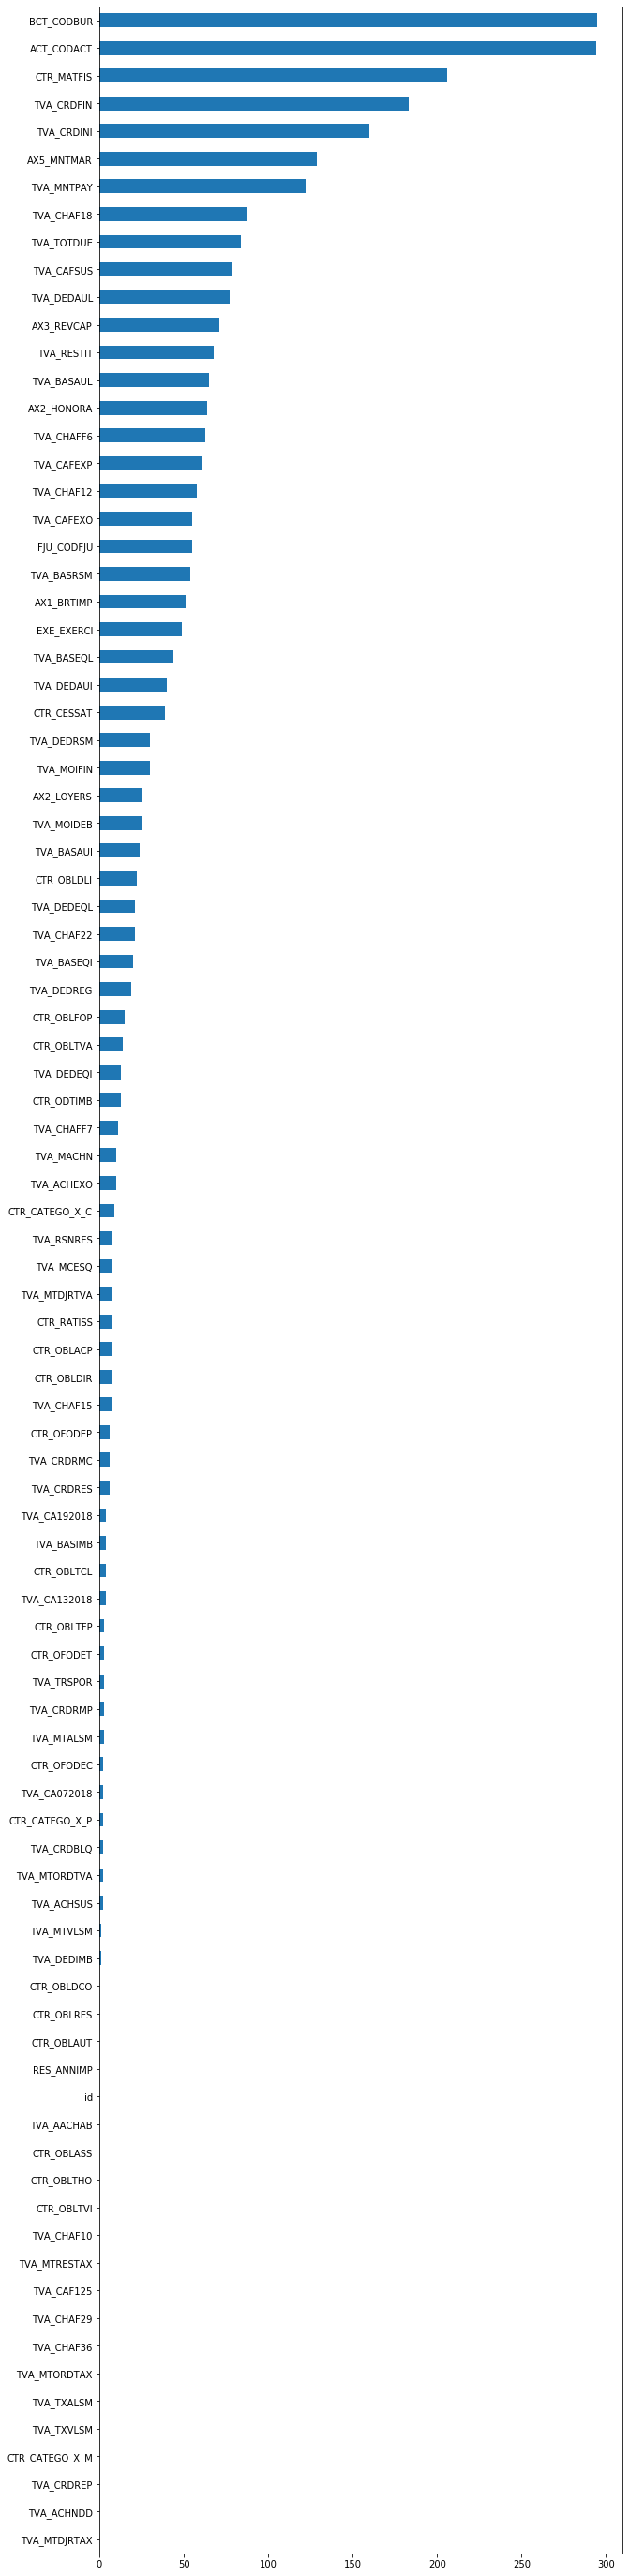

In [41]:
fi = pd.Series(index=features, data= lgb.feature_importances_)
_ = plt.figure(figsize=(10, 50))
_ = fi.sort_values().plot(kind='barh')

## Dropping Columns that doesn't affect the model

In [43]:
fi_df = pd.DataFrame(index=features, data=lgb.feature_importances_)

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [44]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [45]:
fi_df.tail(30)

,cols,imp
65,TVA_CRDRMP,3
74,TVA_MTORDTVA,2
79,TVA_CA072018,2
91,CTR_CATEGO_X_P,2
56,TVA_ACHSUS,2
12,CTR_OFODEC,2
63,TVA_CRDBLQ,2
38,TVA_DEDIMB,1
70,TVA_MTVLSM,1
66,TVA_CRDREP,0


In [47]:
semi_useless = fi_df[fi_df['imp'] < 4]['cols'].to_list()

In [48]:
len(semi_useless)

34

In [49]:
train = train.drop(semi_useless,axis=1)
test = test.drop(semi_useless,axis=1)

In [53]:
X = train.drop(columns='target')
y = train['target']

In [56]:
print(X.shape, test.shape)

(25053, 58) (10738, 58)


## Cross Validation

In [57]:
lgb = LGBMRegressor(num_leaves=200, min_data_in_leaf=3,
                    objective='regression',
                    max_depth=-1,learning_rate=0.05, 
                    boosting_type='gbdt', 
                    feature_fraction=0.60,
                    lambda_l1=1,lambda_l2=1, 
                    metric='rmse', 
                    num_iterations=4000)

xgb = XGBRegressor(n_estimators = 5000, max_depth = 30, 
                     reg_lambda = 80,random_state = 30,
                     learning_rate=0.3, gamma = 1.5)

***Lightgbm CrossVal***

In [58]:
max_iter = 23
kf = KFold(n_splits=max_iter,shuffle=False,random_state=101)

In [59]:
lgb_scores = []
lgb_test_pred = np.zeros(len(test))
lgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    
    lgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    lgb_scores.append(rmse(y_test,lgb.predict(X_test)))
    
    lgb_train_pred += lgb.predict(X)
    lgb_test_pred += lgb.predict(test)

==================================Fold0=============================================
[1]	training's rmse: 6.98571	valid_1's rmse: 7.061
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.89036	valid_1's rmse: 7.00037
[3]	training's rmse: 6.79449	valid_1's rmse: 6.93995
[4]	training's rmse: 6.6999	valid_1's rmse: 6.87325
[5]	training's rmse: 6.62716	valid_1's rmse: 6.81915
[6]	training's rmse: 6.55583	valid_1's rmse: 6.7803
[7]	training's rmse: 6.47226	valid_1's rmse: 6.72981
[8]	training's rmse: 6.39782	valid_1's rmse: 6.68715
[9]	training's rmse: 6.33926	valid_1's rmse: 6.6518
[10]	training's rmse: 6.27424	valid_1's rmse: 6.61456
[11]	training's rmse: 6.21472	valid_1's rmse: 6.57956
[12]	training's rmse: 6.148	valid_1's rmse: 6.53951
[13]	training's rmse: 6.08816	valid_1's rmse: 6.50584
[14]	training's rmse: 6.03114	valid_1's rmse: 6.4736
[15]	training's rmse: 5.98484	valid_1's rmse: 6.45666
[16]	training's rmse: 5.92977	valid_1's rmse: 6.43432
[17]	t

[150]	training's rmse: 3.66227	valid_1's rmse: 5.85117
[151]	training's rmse: 3.65564	valid_1's rmse: 5.84971
[152]	training's rmse: 3.64613	valid_1's rmse: 5.84932
[153]	training's rmse: 3.63724	valid_1's rmse: 5.84614
[154]	training's rmse: 3.6288	valid_1's rmse: 5.84673
[155]	training's rmse: 3.62226	valid_1's rmse: 5.84602
[156]	training's rmse: 3.61392	valid_1's rmse: 5.84573
[157]	training's rmse: 3.60507	valid_1's rmse: 5.84544
[158]	training's rmse: 3.59878	valid_1's rmse: 5.84555
[159]	training's rmse: 3.5912	valid_1's rmse: 5.84585
[160]	training's rmse: 3.58133	valid_1's rmse: 5.84432
[161]	training's rmse: 3.57315	valid_1's rmse: 5.84296
[162]	training's rmse: 3.56438	valid_1's rmse: 5.84056
[163]	training's rmse: 3.55781	valid_1's rmse: 5.84009
[164]	training's rmse: 3.55036	valid_1's rmse: 5.83822
[165]	training's rmse: 3.54079	valid_1's rmse: 5.83412
[166]	training's rmse: 3.53179	valid_1's rmse: 5.83279
[167]	training's rmse: 3.52343	valid_1's rmse: 5.83119
[168]	traini

[303]	training's rmse: 2.71211	valid_1's rmse: 5.7524
[304]	training's rmse: 2.70857	valid_1's rmse: 5.7518
[305]	training's rmse: 2.7036	valid_1's rmse: 5.75168
[306]	training's rmse: 2.70099	valid_1's rmse: 5.75071
[307]	training's rmse: 2.69648	valid_1's rmse: 5.75151
[308]	training's rmse: 2.69316	valid_1's rmse: 5.75066
[309]	training's rmse: 2.6894	valid_1's rmse: 5.75053
[310]	training's rmse: 2.68433	valid_1's rmse: 5.74965
[311]	training's rmse: 2.67985	valid_1's rmse: 5.74945
[312]	training's rmse: 2.67333	valid_1's rmse: 5.74858
[313]	training's rmse: 2.66876	valid_1's rmse: 5.74909
[314]	training's rmse: 2.66424	valid_1's rmse: 5.74974
[315]	training's rmse: 2.65923	valid_1's rmse: 5.75041
[316]	training's rmse: 2.6542	valid_1's rmse: 5.7499
[317]	training's rmse: 2.64974	valid_1's rmse: 5.75032
[318]	training's rmse: 2.64715	valid_1's rmse: 5.74874
[319]	training's rmse: 2.64253	valid_1's rmse: 5.74805
[320]	training's rmse: 2.63828	valid_1's rmse: 5.74723
[321]	training's

[460]	training's rmse: 2.08566	valid_1's rmse: 5.7034
[461]	training's rmse: 2.0826	valid_1's rmse: 5.70343
[462]	training's rmse: 2.07616	valid_1's rmse: 5.70306
[463]	training's rmse: 2.07421	valid_1's rmse: 5.70299
[464]	training's rmse: 2.0715	valid_1's rmse: 5.70364
[465]	training's rmse: 2.06837	valid_1's rmse: 5.70275
[466]	training's rmse: 2.06626	valid_1's rmse: 5.70341
[467]	training's rmse: 2.06228	valid_1's rmse: 5.70291
[468]	training's rmse: 2.05799	valid_1's rmse: 5.70347
[469]	training's rmse: 2.05279	valid_1's rmse: 5.70318
[470]	training's rmse: 2.05103	valid_1's rmse: 5.70228
[471]	training's rmse: 2.04913	valid_1's rmse: 5.70205
[472]	training's rmse: 2.045	valid_1's rmse: 5.7012
[473]	training's rmse: 2.04126	valid_1's rmse: 5.70102
[474]	training's rmse: 2.03733	valid_1's rmse: 5.70146
[475]	training's rmse: 2.03555	valid_1's rmse: 5.70145
[476]	training's rmse: 2.03164	valid_1's rmse: 5.70092
[477]	training's rmse: 2.0296	valid_1's rmse: 5.70087
[478]	training's 

[615]	training's rmse: 1.67083	valid_1's rmse: 5.6756
[616]	training's rmse: 1.66827	valid_1's rmse: 5.67489
[617]	training's rmse: 1.66697	valid_1's rmse: 5.6755
[618]	training's rmse: 1.66474	valid_1's rmse: 5.6756
[619]	training's rmse: 1.66316	valid_1's rmse: 5.67539
[620]	training's rmse: 1.65843	valid_1's rmse: 5.67621
[621]	training's rmse: 1.65548	valid_1's rmse: 5.67634
[622]	training's rmse: 1.65414	valid_1's rmse: 5.67658
[623]	training's rmse: 1.65238	valid_1's rmse: 5.67727
[624]	training's rmse: 1.6504	valid_1's rmse: 5.67711
[625]	training's rmse: 1.6468	valid_1's rmse: 5.67672
[626]	training's rmse: 1.6454	valid_1's rmse: 5.67666
[627]	training's rmse: 1.64418	valid_1's rmse: 5.67674
[628]	training's rmse: 1.6432	valid_1's rmse: 5.67704
[629]	training's rmse: 1.64125	valid_1's rmse: 5.67637
[630]	training's rmse: 1.63805	valid_1's rmse: 5.67593
[631]	training's rmse: 1.63535	valid_1's rmse: 5.67488
[632]	training's rmse: 1.63268	valid_1's rmse: 5.67468
[633]	training's 

[765]	training's rmse: 1.38501	valid_1's rmse: 5.65284
[766]	training's rmse: 1.38345	valid_1's rmse: 5.65283
[767]	training's rmse: 1.38132	valid_1's rmse: 5.65335
[768]	training's rmse: 1.3786	valid_1's rmse: 5.65311
[769]	training's rmse: 1.37773	valid_1's rmse: 5.65273
[770]	training's rmse: 1.37517	valid_1's rmse: 5.65245
[771]	training's rmse: 1.37354	valid_1's rmse: 5.6524
[772]	training's rmse: 1.37198	valid_1's rmse: 5.6525
[773]	training's rmse: 1.3711	valid_1's rmse: 5.65266
[774]	training's rmse: 1.36902	valid_1's rmse: 5.65276
[775]	training's rmse: 1.36744	valid_1's rmse: 5.65289
[776]	training's rmse: 1.36468	valid_1's rmse: 5.65311
[777]	training's rmse: 1.36256	valid_1's rmse: 5.65281
[778]	training's rmse: 1.36078	valid_1's rmse: 5.65295
[779]	training's rmse: 1.35898	valid_1's rmse: 5.65253
[780]	training's rmse: 1.35816	valid_1's rmse: 5.65287
[781]	training's rmse: 1.35691	valid_1's rmse: 5.65304
[782]	training's rmse: 1.356	valid_1's rmse: 5.65328
[783]	training's

[915]	training's rmse: 1.18038	valid_1's rmse: 5.64185
[916]	training's rmse: 1.17919	valid_1's rmse: 5.64141
[917]	training's rmse: 1.17792	valid_1's rmse: 5.64138
[918]	training's rmse: 1.17627	valid_1's rmse: 5.64106
[919]	training's rmse: 1.17538	valid_1's rmse: 5.64105
[920]	training's rmse: 1.17438	valid_1's rmse: 5.64115
[921]	training's rmse: 1.1738	valid_1's rmse: 5.64061
[922]	training's rmse: 1.17197	valid_1's rmse: 5.64083
[923]	training's rmse: 1.17081	valid_1's rmse: 5.64099
[924]	training's rmse: 1.16918	valid_1's rmse: 5.64131
[925]	training's rmse: 1.16854	valid_1's rmse: 5.64167
[926]	training's rmse: 1.16796	valid_1's rmse: 5.64172
[927]	training's rmse: 1.1662	valid_1's rmse: 5.64162
[928]	training's rmse: 1.16417	valid_1's rmse: 5.64113
[929]	training's rmse: 1.1636	valid_1's rmse: 5.64111
[930]	training's rmse: 1.15991	valid_1's rmse: 5.64123
[931]	training's rmse: 1.15675	valid_1's rmse: 5.64056
[932]	training's rmse: 1.15498	valid_1's rmse: 5.6401
[933]	training

[1069]	training's rmse: 0.981618	valid_1's rmse: 5.63145
[1070]	training's rmse: 0.981131	valid_1's rmse: 5.63136
[1071]	training's rmse: 0.980609	valid_1's rmse: 5.63127
[1072]	training's rmse: 0.979825	valid_1's rmse: 5.63102
[1073]	training's rmse: 0.978752	valid_1's rmse: 5.63101
[1074]	training's rmse: 0.975963	valid_1's rmse: 5.63092
[1075]	training's rmse: 0.973507	valid_1's rmse: 5.63106
[1076]	training's rmse: 0.97226	valid_1's rmse: 5.63084
[1077]	training's rmse: 0.971758	valid_1's rmse: 5.63092
[1078]	training's rmse: 0.970829	valid_1's rmse: 5.63087
[1079]	training's rmse: 0.969334	valid_1's rmse: 5.63085
[1080]	training's rmse: 0.967414	valid_1's rmse: 5.63099
[1081]	training's rmse: 0.966368	valid_1's rmse: 5.63111
[1082]	training's rmse: 0.965456	valid_1's rmse: 5.63111
[1083]	training's rmse: 0.964491	valid_1's rmse: 5.63085
[1084]	training's rmse: 0.963506	valid_1's rmse: 5.63071
[1085]	training's rmse: 0.962394	valid_1's rmse: 5.63086
[1086]	training's rmse: 0.961682

[1215]	training's rmse: 0.843569	valid_1's rmse: 5.62823
[1216]	training's rmse: 0.842862	valid_1's rmse: 5.62803
[1217]	training's rmse: 0.841648	valid_1's rmse: 5.62762
[1218]	training's rmse: 0.838764	valid_1's rmse: 5.62738
[1219]	training's rmse: 0.836928	valid_1's rmse: 5.6273
[1220]	training's rmse: 0.83505	valid_1's rmse: 5.62735
[1221]	training's rmse: 0.832277	valid_1's rmse: 5.62757
[1222]	training's rmse: 0.831229	valid_1's rmse: 5.62765
[1223]	training's rmse: 0.828342	valid_1's rmse: 5.62725
[1224]	training's rmse: 0.826503	valid_1's rmse: 5.62742
[1225]	training's rmse: 0.825325	valid_1's rmse: 5.62724
[1226]	training's rmse: 0.822723	valid_1's rmse: 5.62731
[1227]	training's rmse: 0.821176	valid_1's rmse: 5.62735
[1228]	training's rmse: 0.818923	valid_1's rmse: 5.62739
[1229]	training's rmse: 0.817409	valid_1's rmse: 5.62746
[1230]	training's rmse: 0.815495	valid_1's rmse: 5.62787
[1231]	training's rmse: 0.814016	valid_1's rmse: 5.62804
[1232]	training's rmse: 0.812103	

[1367]	training's rmse: 0.697036	valid_1's rmse: 5.62544
[1368]	training's rmse: 0.696102	valid_1's rmse: 5.62549
[1369]	training's rmse: 0.694665	valid_1's rmse: 5.62544
[1370]	training's rmse: 0.693952	valid_1's rmse: 5.62515
[1371]	training's rmse: 0.693638	valid_1's rmse: 5.62511
[1372]	training's rmse: 0.693222	valid_1's rmse: 5.62496
[1373]	training's rmse: 0.692249	valid_1's rmse: 5.62489
[1374]	training's rmse: 0.691528	valid_1's rmse: 5.62475
[1375]	training's rmse: 0.690428	valid_1's rmse: 5.6246
[1376]	training's rmse: 0.689501	valid_1's rmse: 5.62437
[1377]	training's rmse: 0.688925	valid_1's rmse: 5.62445
[1378]	training's rmse: 0.688576	valid_1's rmse: 5.62443
[1379]	training's rmse: 0.687755	valid_1's rmse: 5.62445
[1380]	training's rmse: 0.687387	valid_1's rmse: 5.62441
[1381]	training's rmse: 0.686982	valid_1's rmse: 5.62421
[1382]	training's rmse: 0.686644	valid_1's rmse: 5.6244
[1383]	training's rmse: 0.685987	valid_1's rmse: 5.62437
[1384]	training's rmse: 0.685613	

[1518]	training's rmse: 0.607854	valid_1's rmse: 5.62315
[1519]	training's rmse: 0.607285	valid_1's rmse: 5.62344
[1520]	training's rmse: 0.606763	valid_1's rmse: 5.62342
[1521]	training's rmse: 0.60617	valid_1's rmse: 5.62365
[1522]	training's rmse: 0.605678	valid_1's rmse: 5.62357
[1523]	training's rmse: 0.604955	valid_1's rmse: 5.62348
[1524]	training's rmse: 0.60429	valid_1's rmse: 5.62355
[1525]	training's rmse: 0.603807	valid_1's rmse: 5.62354
[1526]	training's rmse: 0.603224	valid_1's rmse: 5.62364
[1527]	training's rmse: 0.602782	valid_1's rmse: 5.62363
[1528]	training's rmse: 0.602309	valid_1's rmse: 5.62374
[1529]	training's rmse: 0.601922	valid_1's rmse: 5.62364
[1530]	training's rmse: 0.601509	valid_1's rmse: 5.62388
[1531]	training's rmse: 0.600809	valid_1's rmse: 5.62395
[1532]	training's rmse: 0.600485	valid_1's rmse: 5.62398
[1533]	training's rmse: 0.600084	valid_1's rmse: 5.62408
[1534]	training's rmse: 0.599404	valid_1's rmse: 5.62372
[1535]	training's rmse: 0.598758	

[1663]	training's rmse: 0.532672	valid_1's rmse: 5.62044
[1664]	training's rmse: 0.532177	valid_1's rmse: 5.62039
[1665]	training's rmse: 0.531603	valid_1's rmse: 5.62053
[1666]	training's rmse: 0.531233	valid_1's rmse: 5.62063
[1667]	training's rmse: 0.530553	valid_1's rmse: 5.62085
[1668]	training's rmse: 0.530357	valid_1's rmse: 5.62092
[1669]	training's rmse: 0.530091	valid_1's rmse: 5.62083
[1670]	training's rmse: 0.5295	valid_1's rmse: 5.6209
[1671]	training's rmse: 0.528302	valid_1's rmse: 5.62088
[1672]	training's rmse: 0.527528	valid_1's rmse: 5.62083
[1673]	training's rmse: 0.527006	valid_1's rmse: 5.62088
[1674]	training's rmse: 0.526787	valid_1's rmse: 5.6209
[1675]	training's rmse: 0.526355	valid_1's rmse: 5.62084
[1676]	training's rmse: 0.525723	valid_1's rmse: 5.62122
[1677]	training's rmse: 0.525336	valid_1's rmse: 5.62121
[1678]	training's rmse: 0.524956	valid_1's rmse: 5.6214
[1679]	training's rmse: 0.52422	valid_1's rmse: 5.6214
[1680]	training's rmse: 0.523528	valid

[1813]	training's rmse: 0.472927	valid_1's rmse: 5.62015
[1814]	training's rmse: 0.472243	valid_1's rmse: 5.62004
[1815]	training's rmse: 0.471884	valid_1's rmse: 5.62002
[1816]	training's rmse: 0.471398	valid_1's rmse: 5.61996
[1817]	training's rmse: 0.471156	valid_1's rmse: 5.62003
[1818]	training's rmse: 0.470749	valid_1's rmse: 5.61996
[1819]	training's rmse: 0.470551	valid_1's rmse: 5.61992
[1820]	training's rmse: 0.470391	valid_1's rmse: 5.61999
[1821]	training's rmse: 0.470121	valid_1's rmse: 5.62011
[1822]	training's rmse: 0.469908	valid_1's rmse: 5.62013
[1823]	training's rmse: 0.469345	valid_1's rmse: 5.62032
[1824]	training's rmse: 0.46914	valid_1's rmse: 5.6204
[1825]	training's rmse: 0.468921	valid_1's rmse: 5.62038
[1826]	training's rmse: 0.468461	valid_1's rmse: 5.62045
[1827]	training's rmse: 0.46795	valid_1's rmse: 5.62039
[1828]	training's rmse: 0.467385	valid_1's rmse: 5.62033
[1829]	training's rmse: 0.466657	valid_1's rmse: 5.62054
[1830]	training's rmse: 0.46638	va

[1962]	training's rmse: 0.43001	valid_1's rmse: 5.6211
[1963]	training's rmse: 0.429705	valid_1's rmse: 5.62109
[1964]	training's rmse: 0.429453	valid_1's rmse: 5.62103
[1965]	training's rmse: 0.429151	valid_1's rmse: 5.62107
[1966]	training's rmse: 0.428635	valid_1's rmse: 5.62108
[1967]	training's rmse: 0.428246	valid_1's rmse: 5.62103
[1968]	training's rmse: 0.428041	valid_1's rmse: 5.62088
[1969]	training's rmse: 0.427885	valid_1's rmse: 5.6209
[1970]	training's rmse: 0.427737	valid_1's rmse: 5.62083
[1971]	training's rmse: 0.427602	valid_1's rmse: 5.62078
[1972]	training's rmse: 0.427172	valid_1's rmse: 5.62075
[1973]	training's rmse: 0.426716	valid_1's rmse: 5.62079
[1974]	training's rmse: 0.426568	valid_1's rmse: 5.62078
[1975]	training's rmse: 0.426202	valid_1's rmse: 5.62071
[1976]	training's rmse: 0.426011	valid_1's rmse: 5.62071
[1977]	training's rmse: 0.425445	valid_1's rmse: 5.62068
[1978]	training's rmse: 0.425128	valid_1's rmse: 5.62073
[1979]	training's rmse: 0.424694	v

[2112]	training's rmse: 0.380855	valid_1's rmse: 5.61998
[2113]	training's rmse: 0.380593	valid_1's rmse: 5.61996
[2114]	training's rmse: 0.380294	valid_1's rmse: 5.61985
[2115]	training's rmse: 0.380174	valid_1's rmse: 5.61982
[2116]	training's rmse: 0.379975	valid_1's rmse: 5.61976
[2117]	training's rmse: 0.379893	valid_1's rmse: 5.61977
[2118]	training's rmse: 0.379749	valid_1's rmse: 5.61981
[2119]	training's rmse: 0.37964	valid_1's rmse: 5.61981
[2120]	training's rmse: 0.379402	valid_1's rmse: 5.61992
[2121]	training's rmse: 0.379322	valid_1's rmse: 5.61987
[2122]	training's rmse: 0.37882	valid_1's rmse: 5.61994
[2123]	training's rmse: 0.378077	valid_1's rmse: 5.61996
[2124]	training's rmse: 0.377944	valid_1's rmse: 5.61996
[2125]	training's rmse: 0.37783	valid_1's rmse: 5.61992
[2126]	training's rmse: 0.377715	valid_1's rmse: 5.61994
[2127]	training's rmse: 0.377325	valid_1's rmse: 5.61984
[2128]	training's rmse: 0.377083	valid_1's rmse: 5.61974
[2129]	training's rmse: 0.376719	v

[2259]	training's rmse: 0.345083	valid_1's rmse: 5.61924
[2260]	training's rmse: 0.344996	valid_1's rmse: 5.61923
[2261]	training's rmse: 0.344769	valid_1's rmse: 5.61922
[2262]	training's rmse: 0.344691	valid_1's rmse: 5.61918
[2263]	training's rmse: 0.344357	valid_1's rmse: 5.61911
[2264]	training's rmse: 0.344289	valid_1's rmse: 5.61915
[2265]	training's rmse: 0.34417	valid_1's rmse: 5.61918
[2266]	training's rmse: 0.344046	valid_1's rmse: 5.61922
[2267]	training's rmse: 0.343641	valid_1's rmse: 5.61935
[2268]	training's rmse: 0.343529	valid_1's rmse: 5.61934
[2269]	training's rmse: 0.343164	valid_1's rmse: 5.6193
[2270]	training's rmse: 0.342513	valid_1's rmse: 5.61944
[2271]	training's rmse: 0.342223	valid_1's rmse: 5.61953
[2272]	training's rmse: 0.341588	valid_1's rmse: 5.61948
[2273]	training's rmse: 0.34145	valid_1's rmse: 5.61949
[2274]	training's rmse: 0.341291	valid_1's rmse: 5.61949
[2275]	training's rmse: 0.340801	valid_1's rmse: 5.61946
[2276]	training's rmse: 0.340675	v

[2406]	training's rmse: 0.309864	valid_1's rmse: 5.61972
[2407]	training's rmse: 0.30973	valid_1's rmse: 5.6197
[2408]	training's rmse: 0.309026	valid_1's rmse: 5.61979
[2409]	training's rmse: 0.308782	valid_1's rmse: 5.61975
[2410]	training's rmse: 0.308679	valid_1's rmse: 5.61973
[2411]	training's rmse: 0.308545	valid_1's rmse: 5.61978
[2412]	training's rmse: 0.308429	valid_1's rmse: 5.6198
[2413]	training's rmse: 0.308316	valid_1's rmse: 5.61982
[2414]	training's rmse: 0.308244	valid_1's rmse: 5.61985
[2415]	training's rmse: 0.308168	valid_1's rmse: 5.6199
[2416]	training's rmse: 0.308102	valid_1's rmse: 5.61989
[2417]	training's rmse: 0.307897	valid_1's rmse: 5.61985
[2418]	training's rmse: 0.307828	valid_1's rmse: 5.6199
[2419]	training's rmse: 0.307744	valid_1's rmse: 5.6199
[2420]	training's rmse: 0.307639	valid_1's rmse: 5.61997
[2421]	training's rmse: 0.307555	valid_1's rmse: 5.62001
[2422]	training's rmse: 0.307219	valid_1's rmse: 5.61996
[2423]	training's rmse: 0.307115	vali

[2554]	training's rmse: 0.283689	valid_1's rmse: 5.62003
[2555]	training's rmse: 0.28354	valid_1's rmse: 5.61998
[2556]	training's rmse: 0.283481	valid_1's rmse: 5.61996
[2557]	training's rmse: 0.282989	valid_1's rmse: 5.61997
[2558]	training's rmse: 0.282542	valid_1's rmse: 5.61996
[2559]	training's rmse: 0.282446	valid_1's rmse: 5.61993
[2560]	training's rmse: 0.282357	valid_1's rmse: 5.61996
[2561]	training's rmse: 0.282307	valid_1's rmse: 5.6199
[2562]	training's rmse: 0.282258	valid_1's rmse: 5.61989
[2563]	training's rmse: 0.282172	valid_1's rmse: 5.61989
[2564]	training's rmse: 0.281607	valid_1's rmse: 5.6199
[2565]	training's rmse: 0.281543	valid_1's rmse: 5.61991
[2566]	training's rmse: 0.281473	valid_1's rmse: 5.61991
[2567]	training's rmse: 0.280972	valid_1's rmse: 5.61991
[2568]	training's rmse: 0.280799	valid_1's rmse: 5.61991
[2569]	training's rmse: 0.280257	valid_1's rmse: 5.61977
[2570]	training's rmse: 0.280119	valid_1's rmse: 5.61982
[2571]	training's rmse: 0.279949	v

[2703]	training's rmse: 0.255423	valid_1's rmse: 5.61973
[2704]	training's rmse: 0.255075	valid_1's rmse: 5.61978
[2705]	training's rmse: 0.254711	valid_1's rmse: 5.61973
[2706]	training's rmse: 0.254398	valid_1's rmse: 5.61971
[2707]	training's rmse: 0.254238	valid_1's rmse: 5.61972
[2708]	training's rmse: 0.254094	valid_1's rmse: 5.61967
[2709]	training's rmse: 0.254026	valid_1's rmse: 5.61969
[2710]	training's rmse: 0.253963	valid_1's rmse: 5.61972
[2711]	training's rmse: 0.253822	valid_1's rmse: 5.61971
[2712]	training's rmse: 0.253641	valid_1's rmse: 5.61965
[2713]	training's rmse: 0.253477	valid_1's rmse: 5.61964
[2714]	training's rmse: 0.253403	valid_1's rmse: 5.61963
[2715]	training's rmse: 0.253336	valid_1's rmse: 5.61963
[2716]	training's rmse: 0.253007	valid_1's rmse: 5.6196
[2717]	training's rmse: 0.252911	valid_1's rmse: 5.6196
[2718]	training's rmse: 0.25255	valid_1's rmse: 5.61955
[2719]	training's rmse: 0.252495	valid_1's rmse: 5.61955
[2720]	training's rmse: 0.252403	v

[247]	training's rmse: 2.9921	valid_1's rmse: 5.51633
[248]	training's rmse: 2.9882	valid_1's rmse: 5.51551
[249]	training's rmse: 2.98246	valid_1's rmse: 5.51587
[250]	training's rmse: 2.9755	valid_1's rmse: 5.5158
[251]	training's rmse: 2.96871	valid_1's rmse: 5.51484
[252]	training's rmse: 2.96295	valid_1's rmse: 5.51421
[253]	training's rmse: 2.95961	valid_1's rmse: 5.51411
[254]	training's rmse: 2.9538	valid_1's rmse: 5.51303
[255]	training's rmse: 2.94759	valid_1's rmse: 5.51185
[256]	training's rmse: 2.94352	valid_1's rmse: 5.51084
[257]	training's rmse: 2.93893	valid_1's rmse: 5.51126
[258]	training's rmse: 2.93439	valid_1's rmse: 5.51086
[259]	training's rmse: 2.92953	valid_1's rmse: 5.51082
[260]	training's rmse: 2.92199	valid_1's rmse: 5.51011
[261]	training's rmse: 2.91678	valid_1's rmse: 5.50964
[262]	training's rmse: 2.91164	valid_1's rmse: 5.50947
[263]	training's rmse: 2.9064	valid_1's rmse: 5.50863
[264]	training's rmse: 2.90167	valid_1's rmse: 5.50702
[265]	training's

[401]	training's rmse: 2.31184	valid_1's rmse: 5.47414
[402]	training's rmse: 2.30825	valid_1's rmse: 5.47512
[403]	training's rmse: 2.30626	valid_1's rmse: 5.47465
[404]	training's rmse: 2.30409	valid_1's rmse: 5.47458
[405]	training's rmse: 2.29777	valid_1's rmse: 5.47404
[406]	training's rmse: 2.29403	valid_1's rmse: 5.47432
[407]	training's rmse: 2.29174	valid_1's rmse: 5.47395
[408]	training's rmse: 2.2891	valid_1's rmse: 5.47524
[409]	training's rmse: 2.28676	valid_1's rmse: 5.47604
[410]	training's rmse: 2.28383	valid_1's rmse: 5.47558
[411]	training's rmse: 2.28165	valid_1's rmse: 5.47453
[412]	training's rmse: 2.27924	valid_1's rmse: 5.47447
[413]	training's rmse: 2.27722	valid_1's rmse: 5.4749
[414]	training's rmse: 2.27422	valid_1's rmse: 5.47563
[415]	training's rmse: 2.26959	valid_1's rmse: 5.47597
[416]	training's rmse: 2.26749	valid_1's rmse: 5.47531
[417]	training's rmse: 2.2656	valid_1's rmse: 5.47448
[418]	training's rmse: 2.2611	valid_1's rmse: 5.47505
[419]	training

[554]	training's rmse: 1.82962	valid_1's rmse: 5.45584
[555]	training's rmse: 1.82726	valid_1's rmse: 5.45701
[556]	training's rmse: 1.8249	valid_1's rmse: 5.45629
[557]	training's rmse: 1.82104	valid_1's rmse: 5.45566
[558]	training's rmse: 1.81859	valid_1's rmse: 5.45573
[559]	training's rmse: 1.81587	valid_1's rmse: 5.45615
[560]	training's rmse: 1.81236	valid_1's rmse: 5.4564
[561]	training's rmse: 1.80976	valid_1's rmse: 5.45627
[562]	training's rmse: 1.80626	valid_1's rmse: 5.45647
[563]	training's rmse: 1.80387	valid_1's rmse: 5.4565
[564]	training's rmse: 1.80179	valid_1's rmse: 5.45684
[565]	training's rmse: 1.80016	valid_1's rmse: 5.45742
[566]	training's rmse: 1.79758	valid_1's rmse: 5.45842
[567]	training's rmse: 1.79574	valid_1's rmse: 5.45877
[568]	training's rmse: 1.79352	valid_1's rmse: 5.45847
[569]	training's rmse: 1.79114	valid_1's rmse: 5.45824
[570]	training's rmse: 1.78805	valid_1's rmse: 5.4584
[571]	training's rmse: 1.78494	valid_1's rmse: 5.45881
[572]	training

[709]	training's rmse: 1.47176	valid_1's rmse: 5.45301
[710]	training's rmse: 1.46937	valid_1's rmse: 5.45337
[711]	training's rmse: 1.46718	valid_1's rmse: 5.45339
[712]	training's rmse: 1.46536	valid_1's rmse: 5.4534
[713]	training's rmse: 1.46396	valid_1's rmse: 5.45349
[714]	training's rmse: 1.46103	valid_1's rmse: 5.4535
[715]	training's rmse: 1.45999	valid_1's rmse: 5.45317
[716]	training's rmse: 1.45669	valid_1's rmse: 5.4533
[717]	training's rmse: 1.45492	valid_1's rmse: 5.45326
[718]	training's rmse: 1.45322	valid_1's rmse: 5.45289
[719]	training's rmse: 1.45169	valid_1's rmse: 5.45345
[720]	training's rmse: 1.45014	valid_1's rmse: 5.45342
[721]	training's rmse: 1.44847	valid_1's rmse: 5.45337
[722]	training's rmse: 1.44619	valid_1's rmse: 5.45322
[723]	training's rmse: 1.4448	valid_1's rmse: 5.45318
[724]	training's rmse: 1.44341	valid_1's rmse: 5.45277
[725]	training's rmse: 1.44101	valid_1's rmse: 5.45332
[726]	training's rmse: 1.43885	valid_1's rmse: 5.45249
[727]	training

[860]	training's rmse: 1.206	valid_1's rmse: 5.45633
[861]	training's rmse: 1.20487	valid_1's rmse: 5.45639
[862]	training's rmse: 1.20314	valid_1's rmse: 5.4568
[863]	training's rmse: 1.20244	valid_1's rmse: 5.45679
[864]	training's rmse: 1.20137	valid_1's rmse: 5.45682
[865]	training's rmse: 1.1996	valid_1's rmse: 5.45677
[866]	training's rmse: 1.19831	valid_1's rmse: 5.45656
[867]	training's rmse: 1.19656	valid_1's rmse: 5.456
[868]	training's rmse: 1.19502	valid_1's rmse: 5.45527
[869]	training's rmse: 1.19357	valid_1's rmse: 5.45526
[870]	training's rmse: 1.19294	valid_1's rmse: 5.45529
[871]	training's rmse: 1.19149	valid_1's rmse: 5.4555
[872]	training's rmse: 1.19013	valid_1's rmse: 5.45513
[873]	training's rmse: 1.18894	valid_1's rmse: 5.45512
[874]	training's rmse: 1.18751	valid_1's rmse: 5.45506
[875]	training's rmse: 1.18603	valid_1's rmse: 5.45492
[876]	training's rmse: 1.18487	valid_1's rmse: 5.45504
[877]	training's rmse: 1.18399	valid_1's rmse: 5.45486
[878]	training's 

[1017]	training's rmse: 0.992916	valid_1's rmse: 5.45015
[1018]	training's rmse: 0.992026	valid_1's rmse: 5.45049
[1019]	training's rmse: 0.989981	valid_1's rmse: 5.45
[1020]	training's rmse: 0.988965	valid_1's rmse: 5.44998
[1021]	training's rmse: 0.987215	valid_1's rmse: 5.45014
[1022]	training's rmse: 0.986486	valid_1's rmse: 5.45024
[1023]	training's rmse: 0.985479	valid_1's rmse: 5.45015
[1024]	training's rmse: 0.984146	valid_1's rmse: 5.4502
[1025]	training's rmse: 0.983229	valid_1's rmse: 5.45017
[1026]	training's rmse: 0.981858	valid_1's rmse: 5.45019
[1027]	training's rmse: 0.980838	valid_1's rmse: 5.45012
[1028]	training's rmse: 0.979897	valid_1's rmse: 5.45035
[1029]	training's rmse: 0.978864	valid_1's rmse: 5.45046
[1030]	training's rmse: 0.978007	valid_1's rmse: 5.45024
[1031]	training's rmse: 0.977385	valid_1's rmse: 5.45009
[1032]	training's rmse: 0.976431	valid_1's rmse: 5.45018
[1033]	training's rmse: 0.975378	valid_1's rmse: 5.45014
[1034]	training's rmse: 0.974279	va

[1162]	training's rmse: 0.84988	valid_1's rmse: 5.44874
[1163]	training's rmse: 0.849246	valid_1's rmse: 5.44855
[1164]	training's rmse: 0.848456	valid_1's rmse: 5.44849
[1165]	training's rmse: 0.847656	valid_1's rmse: 5.44832
[1166]	training's rmse: 0.847104	valid_1's rmse: 5.44813
[1167]	training's rmse: 0.846182	valid_1's rmse: 5.44807
[1168]	training's rmse: 0.844979	valid_1's rmse: 5.44796
[1169]	training's rmse: 0.843588	valid_1's rmse: 5.44768
[1170]	training's rmse: 0.842312	valid_1's rmse: 5.44775
[1171]	training's rmse: 0.841602	valid_1's rmse: 5.44781
[1172]	training's rmse: 0.840861	valid_1's rmse: 5.44768
[1173]	training's rmse: 0.840093	valid_1's rmse: 5.44788
[1174]	training's rmse: 0.839125	valid_1's rmse: 5.44826
[1175]	training's rmse: 0.838278	valid_1's rmse: 5.44817
[1176]	training's rmse: 0.83786	valid_1's rmse: 5.44833
[1177]	training's rmse: 0.837399	valid_1's rmse: 5.44853
[1178]	training's rmse: 0.836396	valid_1's rmse: 5.44863
[1179]	training's rmse: 0.835962	

[1309]	training's rmse: 0.732799	valid_1's rmse: 5.44763
[1310]	training's rmse: 0.732194	valid_1's rmse: 5.44762
[1311]	training's rmse: 0.731474	valid_1's rmse: 5.44789
[1312]	training's rmse: 0.730922	valid_1's rmse: 5.4481
[1313]	training's rmse: 0.730386	valid_1's rmse: 5.44798
[1314]	training's rmse: 0.729771	valid_1's rmse: 5.44796
[1315]	training's rmse: 0.729398	valid_1's rmse: 5.44799
[1316]	training's rmse: 0.728985	valid_1's rmse: 5.44807
[1317]	training's rmse: 0.728213	valid_1's rmse: 5.44805
[1318]	training's rmse: 0.727565	valid_1's rmse: 5.44817
[1319]	training's rmse: 0.727139	valid_1's rmse: 5.44812
[1320]	training's rmse: 0.726569	valid_1's rmse: 5.44808
[1321]	training's rmse: 0.725913	valid_1's rmse: 5.44806
[1322]	training's rmse: 0.725377	valid_1's rmse: 5.44816
[1323]	training's rmse: 0.724029	valid_1's rmse: 5.44816
[1324]	training's rmse: 0.723561	valid_1's rmse: 5.44822
[1325]	training's rmse: 0.723292	valid_1's rmse: 5.44822
[1326]	training's rmse: 0.722766

[1457]	training's rmse: 0.636894	valid_1's rmse: 5.44968
[1458]	training's rmse: 0.636126	valid_1's rmse: 5.44938
[1459]	training's rmse: 0.635631	valid_1's rmse: 5.44943
[1460]	training's rmse: 0.635401	valid_1's rmse: 5.44939
[1461]	training's rmse: 0.635148	valid_1's rmse: 5.44931
[1462]	training's rmse: 0.634433	valid_1's rmse: 5.44957
[1463]	training's rmse: 0.634164	valid_1's rmse: 5.4499
[1464]	training's rmse: 0.633715	valid_1's rmse: 5.4498
[1465]	training's rmse: 0.633278	valid_1's rmse: 5.44965
[1466]	training's rmse: 0.632776	valid_1's rmse: 5.44965
[1467]	training's rmse: 0.632337	valid_1's rmse: 5.44964
[1468]	training's rmse: 0.631828	valid_1's rmse: 5.44955
[1469]	training's rmse: 0.631338	valid_1's rmse: 5.4494
[1470]	training's rmse: 0.630907	valid_1's rmse: 5.44951
[1471]	training's rmse: 0.630366	valid_1's rmse: 5.44946
[1472]	training's rmse: 0.630091	valid_1's rmse: 5.44946
[1473]	training's rmse: 0.629759	valid_1's rmse: 5.44937
[1474]	training's rmse: 0.62945	va

[1603]	training's rmse: 0.560457	valid_1's rmse: 5.45114
[1604]	training's rmse: 0.55995	valid_1's rmse: 5.4512
[1605]	training's rmse: 0.559585	valid_1's rmse: 5.45115
[1606]	training's rmse: 0.55903	valid_1's rmse: 5.45121
[1607]	training's rmse: 0.558349	valid_1's rmse: 5.45144
[1608]	training's rmse: 0.557952	valid_1's rmse: 5.4515
[1609]	training's rmse: 0.557429	valid_1's rmse: 5.45138
[1610]	training's rmse: 0.557223	valid_1's rmse: 5.45131
[1611]	training's rmse: 0.556812	valid_1's rmse: 5.45154
[1612]	training's rmse: 0.555729	valid_1's rmse: 5.45141
[1613]	training's rmse: 0.55512	valid_1's rmse: 5.45162
[1614]	training's rmse: 0.554387	valid_1's rmse: 5.45172
[1615]	training's rmse: 0.553741	valid_1's rmse: 5.45172
[1616]	training's rmse: 0.553498	valid_1's rmse: 5.45179
[1617]	training's rmse: 0.55271	valid_1's rmse: 5.45184
[1618]	training's rmse: 0.552543	valid_1's rmse: 5.45184
[1619]	training's rmse: 0.552218	valid_1's rmse: 5.4516
[1620]	training's rmse: 0.551886	valid

[32]	training's rmse: 5.32684	valid_1's rmse: 6.16776
[33]	training's rmse: 5.30125	valid_1's rmse: 6.1583
[34]	training's rmse: 5.27398	valid_1's rmse: 6.15122
[35]	training's rmse: 5.24852	valid_1's rmse: 6.14627
[36]	training's rmse: 5.22242	valid_1's rmse: 6.13404
[37]	training's rmse: 5.19532	valid_1's rmse: 6.11728
[38]	training's rmse: 5.17411	valid_1's rmse: 6.11103
[39]	training's rmse: 5.14742	valid_1's rmse: 6.10041
[40]	training's rmse: 5.1217	valid_1's rmse: 6.09545
[41]	training's rmse: 5.09785	valid_1's rmse: 6.08806
[42]	training's rmse: 5.07341	valid_1's rmse: 6.0825
[43]	training's rmse: 5.05011	valid_1's rmse: 6.07353
[44]	training's rmse: 5.02691	valid_1's rmse: 6.0657
[45]	training's rmse: 5.00496	valid_1's rmse: 6.05892
[46]	training's rmse: 4.98268	valid_1's rmse: 6.05082
[47]	training's rmse: 4.9626	valid_1's rmse: 6.04727
[48]	training's rmse: 4.94031	valid_1's rmse: 6.04015
[49]	training's rmse: 4.92086	valid_1's rmse: 6.0367
[50]	training's rmse: 4.90363	vali

[184]	training's rmse: 3.38826	valid_1's rmse: 5.85314
[185]	training's rmse: 3.38227	valid_1's rmse: 5.85251
[186]	training's rmse: 3.37654	valid_1's rmse: 5.85189
[187]	training's rmse: 3.36767	valid_1's rmse: 5.85291
[188]	training's rmse: 3.36206	valid_1's rmse: 5.85348
[189]	training's rmse: 3.35624	valid_1's rmse: 5.85446
[190]	training's rmse: 3.35005	valid_1's rmse: 5.85428
[191]	training's rmse: 3.34394	valid_1's rmse: 5.85327
[192]	training's rmse: 3.33376	valid_1's rmse: 5.85343
[193]	training's rmse: 3.32811	valid_1's rmse: 5.85311
[194]	training's rmse: 3.32155	valid_1's rmse: 5.85367
[195]	training's rmse: 3.31503	valid_1's rmse: 5.85336
[196]	training's rmse: 3.3073	valid_1's rmse: 5.85055
[197]	training's rmse: 3.30149	valid_1's rmse: 5.85012
[198]	training's rmse: 3.2966	valid_1's rmse: 5.85091
[199]	training's rmse: 3.29068	valid_1's rmse: 5.85041
[200]	training's rmse: 3.28598	valid_1's rmse: 5.85168
[201]	training's rmse: 3.27938	valid_1's rmse: 5.85009
[202]	traini

[338]	training's rmse: 2.56688	valid_1's rmse: 5.76908
[339]	training's rmse: 2.56328	valid_1's rmse: 5.7693
[340]	training's rmse: 2.55913	valid_1's rmse: 5.77016
[341]	training's rmse: 2.55647	valid_1's rmse: 5.76967
[342]	training's rmse: 2.55317	valid_1's rmse: 5.76914
[343]	training's rmse: 2.54822	valid_1's rmse: 5.768
[344]	training's rmse: 2.54591	valid_1's rmse: 5.76784
[345]	training's rmse: 2.54348	valid_1's rmse: 5.76718
[346]	training's rmse: 2.5396	valid_1's rmse: 5.76732
[347]	training's rmse: 2.53678	valid_1's rmse: 5.76699
[348]	training's rmse: 2.53332	valid_1's rmse: 5.76738
[349]	training's rmse: 2.52748	valid_1's rmse: 5.76524
[350]	training's rmse: 2.52473	valid_1's rmse: 5.76595
[351]	training's rmse: 2.52175	valid_1's rmse: 5.76523
[352]	training's rmse: 2.51728	valid_1's rmse: 5.76564
[353]	training's rmse: 2.51207	valid_1's rmse: 5.76547
[354]	training's rmse: 2.50624	valid_1's rmse: 5.76398
[355]	training's rmse: 2.50262	valid_1's rmse: 5.764
[356]	training's

[491]	training's rmse: 2.03053	valid_1's rmse: 5.73154
[492]	training's rmse: 2.02827	valid_1's rmse: 5.7321
[493]	training's rmse: 2.02534	valid_1's rmse: 5.73062
[494]	training's rmse: 2.02183	valid_1's rmse: 5.73036
[495]	training's rmse: 2.0171	valid_1's rmse: 5.73114
[496]	training's rmse: 2.01499	valid_1's rmse: 5.73169
[497]	training's rmse: 2.01351	valid_1's rmse: 5.73156
[498]	training's rmse: 2.01084	valid_1's rmse: 5.73207
[499]	training's rmse: 2.00665	valid_1's rmse: 5.73157
[500]	training's rmse: 2.00317	valid_1's rmse: 5.7322
[501]	training's rmse: 2.0013	valid_1's rmse: 5.73195
[502]	training's rmse: 1.9988	valid_1's rmse: 5.73228
[503]	training's rmse: 1.99519	valid_1's rmse: 5.73312
[504]	training's rmse: 1.99177	valid_1's rmse: 5.73286
[505]	training's rmse: 1.98887	valid_1's rmse: 5.73245
[506]	training's rmse: 1.98706	valid_1's rmse: 5.73215
[507]	training's rmse: 1.98292	valid_1's rmse: 5.73161
[508]	training's rmse: 1.9787	valid_1's rmse: 5.73216
[509]	training's

[644]	training's rmse: 1.60832	valid_1's rmse: 5.71504
[645]	training's rmse: 1.60678	valid_1's rmse: 5.71487
[646]	training's rmse: 1.60413	valid_1's rmse: 5.71434
[647]	training's rmse: 1.602	valid_1's rmse: 5.71459
[648]	training's rmse: 1.59955	valid_1's rmse: 5.71456
[649]	training's rmse: 1.59819	valid_1's rmse: 5.71425
[650]	training's rmse: 1.59598	valid_1's rmse: 5.71405
[651]	training's rmse: 1.59369	valid_1's rmse: 5.7132
[652]	training's rmse: 1.59196	valid_1's rmse: 5.71383
[653]	training's rmse: 1.59	valid_1's rmse: 5.71287
[654]	training's rmse: 1.58818	valid_1's rmse: 5.71272
[655]	training's rmse: 1.58587	valid_1's rmse: 5.71266
[656]	training's rmse: 1.58281	valid_1's rmse: 5.71241
[657]	training's rmse: 1.58034	valid_1's rmse: 5.71316
[658]	training's rmse: 1.57834	valid_1's rmse: 5.71244
[659]	training's rmse: 1.57702	valid_1's rmse: 5.71247
[660]	training's rmse: 1.57428	valid_1's rmse: 5.71257
[661]	training's rmse: 1.57221	valid_1's rmse: 5.71265
[662]	training's

[945]	training's rmse: 1.10376	valid_1's rmse: 5.71232
[946]	training's rmse: 1.10329	valid_1's rmse: 5.71229
[947]	training's rmse: 1.10114	valid_1's rmse: 5.71223
[948]	training's rmse: 1.10009	valid_1's rmse: 5.712
[949]	training's rmse: 1.09836	valid_1's rmse: 5.71209
[950]	training's rmse: 1.09729	valid_1's rmse: 5.71163
[951]	training's rmse: 1.09653	valid_1's rmse: 5.71171
[952]	training's rmse: 1.0952	valid_1's rmse: 5.71207
[953]	training's rmse: 1.09425	valid_1's rmse: 5.71236
[954]	training's rmse: 1.09362	valid_1's rmse: 5.71214
[955]	training's rmse: 1.09301	valid_1's rmse: 5.71223
[956]	training's rmse: 1.091	valid_1's rmse: 5.71214
[957]	training's rmse: 1.08852	valid_1's rmse: 5.71214
[958]	training's rmse: 1.08766	valid_1's rmse: 5.71246
[959]	training's rmse: 1.08552	valid_1's rmse: 5.71236
[960]	training's rmse: 1.08495	valid_1's rmse: 5.71239
[961]	training's rmse: 1.08261	valid_1's rmse: 5.71268
[962]	training's rmse: 1.08164	valid_1's rmse: 5.71286
[963]	training'

[1096]	training's rmse: 0.934846	valid_1's rmse: 5.71293
[1097]	training's rmse: 0.934079	valid_1's rmse: 5.71283
[1098]	training's rmse: 0.933131	valid_1's rmse: 5.71298
[1099]	training's rmse: 0.93137	valid_1's rmse: 5.71278
[1100]	training's rmse: 0.930514	valid_1's rmse: 5.7129
[1101]	training's rmse: 0.930186	valid_1's rmse: 5.71303
[1102]	training's rmse: 0.928684	valid_1's rmse: 5.71309
[1103]	training's rmse: 0.927414	valid_1's rmse: 5.71327
[1104]	training's rmse: 0.92688	valid_1's rmse: 5.71303
[1105]	training's rmse: 0.926221	valid_1's rmse: 5.71319
[1106]	training's rmse: 0.924926	valid_1's rmse: 5.71296
[1107]	training's rmse: 0.923978	valid_1's rmse: 5.71275
[1108]	training's rmse: 0.92325	valid_1's rmse: 5.71248
[1109]	training's rmse: 0.922531	valid_1's rmse: 5.71239
[1110]	training's rmse: 0.921519	valid_1's rmse: 5.71244
[1111]	training's rmse: 0.920836	valid_1's rmse: 5.71246
[1112]	training's rmse: 0.919816	valid_1's rmse: 5.71221
[1113]	training's rmse: 0.918698	va

[1241]	training's rmse: 0.799642	valid_1's rmse: 5.71112
[1242]	training's rmse: 0.799115	valid_1's rmse: 5.71112
[1243]	training's rmse: 0.798579	valid_1's rmse: 5.7111
[1244]	training's rmse: 0.797877	valid_1's rmse: 5.71116
[1245]	training's rmse: 0.797222	valid_1's rmse: 5.71105
[1246]	training's rmse: 0.795977	valid_1's rmse: 5.71114
[1247]	training's rmse: 0.795425	valid_1's rmse: 5.71102
[1248]	training's rmse: 0.795025	valid_1's rmse: 5.71112
[1249]	training's rmse: 0.794449	valid_1's rmse: 5.71119
[1250]	training's rmse: 0.79307	valid_1's rmse: 5.71118
[1251]	training's rmse: 0.792682	valid_1's rmse: 5.71128
[1252]	training's rmse: 0.792224	valid_1's rmse: 5.71089
[1253]	training's rmse: 0.791432	valid_1's rmse: 5.7108
[1254]	training's rmse: 0.791062	valid_1's rmse: 5.71064
[1255]	training's rmse: 0.790099	valid_1's rmse: 5.71072
[1256]	training's rmse: 0.789245	valid_1's rmse: 5.71074
[1257]	training's rmse: 0.788768	valid_1's rmse: 5.71071
[1258]	training's rmse: 0.788145	v

[1390]	training's rmse: 0.705843	valid_1's rmse: 5.71344
[1391]	training's rmse: 0.705484	valid_1's rmse: 5.71352
[1392]	training's rmse: 0.704943	valid_1's rmse: 5.7135
[1393]	training's rmse: 0.704071	valid_1's rmse: 5.7136
[1394]	training's rmse: 0.702868	valid_1's rmse: 5.71374
[1395]	training's rmse: 0.702232	valid_1's rmse: 5.71363
[1396]	training's rmse: 0.700188	valid_1's rmse: 5.71408
[1397]	training's rmse: 0.699706	valid_1's rmse: 5.71378
[1398]	training's rmse: 0.699139	valid_1's rmse: 5.71375
[1399]	training's rmse: 0.698603	valid_1's rmse: 5.71372
[1400]	training's rmse: 0.698132	valid_1's rmse: 5.71374
[1401]	training's rmse: 0.697772	valid_1's rmse: 5.71373
[1402]	training's rmse: 0.697307	valid_1's rmse: 5.71381
[1403]	training's rmse: 0.696492	valid_1's rmse: 5.71394
[1404]	training's rmse: 0.695935	valid_1's rmse: 5.71382
[1405]	training's rmse: 0.695426	valid_1's rmse: 5.71389
[1406]	training's rmse: 0.693434	valid_1's rmse: 5.71373
[1407]	training's rmse: 0.692851	

[1538]	training's rmse: 0.584605	valid_1's rmse: 5.71533
[1539]	training's rmse: 0.584144	valid_1's rmse: 5.71528
[1540]	training's rmse: 0.583515	valid_1's rmse: 5.7153
[1541]	training's rmse: 0.58318	valid_1's rmse: 5.71534
[1542]	training's rmse: 0.58241	valid_1's rmse: 5.71534
[1543]	training's rmse: 0.581958	valid_1's rmse: 5.71526
[1544]	training's rmse: 0.581399	valid_1's rmse: 5.71526
[1545]	training's rmse: 0.581062	valid_1's rmse: 5.71534
[1546]	training's rmse: 0.580839	valid_1's rmse: 5.71526
[1547]	training's rmse: 0.580109	valid_1's rmse: 5.71527
[1548]	training's rmse: 0.579406	valid_1's rmse: 5.7152
[1549]	training's rmse: 0.578716	valid_1's rmse: 5.71514
[1550]	training's rmse: 0.578076	valid_1's rmse: 5.71505
[1551]	training's rmse: 0.577387	valid_1's rmse: 5.71529
[1552]	training's rmse: 0.576383	valid_1's rmse: 5.71543
[1553]	training's rmse: 0.575737	valid_1's rmse: 5.71535
[1554]	training's rmse: 0.575296	valid_1's rmse: 5.71539
[1555]	training's rmse: 0.57472	val

[1690]	training's rmse: 0.508056	valid_1's rmse: 5.71357
[1691]	training's rmse: 0.507398	valid_1's rmse: 5.71369
[1692]	training's rmse: 0.507185	valid_1's rmse: 5.7136
[1693]	training's rmse: 0.506145	valid_1's rmse: 5.71364
[1694]	training's rmse: 0.505218	valid_1's rmse: 5.71364
[1695]	training's rmse: 0.504669	valid_1's rmse: 5.71354
[1696]	training's rmse: 0.504252	valid_1's rmse: 5.71359
[1697]	training's rmse: 0.503079	valid_1's rmse: 5.71351
[1698]	training's rmse: 0.502537	valid_1's rmse: 5.71354
[1699]	training's rmse: 0.501828	valid_1's rmse: 5.71353
[1700]	training's rmse: 0.501157	valid_1's rmse: 5.71346
[1701]	training's rmse: 0.500691	valid_1's rmse: 5.71342
[1702]	training's rmse: 0.500236	valid_1's rmse: 5.71339
[1703]	training's rmse: 0.499651	valid_1's rmse: 5.71336
[1704]	training's rmse: 0.499291	valid_1's rmse: 5.7135
[1705]	training's rmse: 0.498443	valid_1's rmse: 5.71352
[1706]	training's rmse: 0.49784	valid_1's rmse: 5.71372
[1707]	training's rmse: 0.497607	v

[59]	training's rmse: 4.73852	valid_1's rmse: 6.03911
[60]	training's rmse: 4.71986	valid_1's rmse: 6.03226
[61]	training's rmse: 4.70048	valid_1's rmse: 6.02439
[62]	training's rmse: 4.68501	valid_1's rmse: 6.02173
[63]	training's rmse: 4.66815	valid_1's rmse: 6.01536
[64]	training's rmse: 4.65085	valid_1's rmse: 6.01292
[65]	training's rmse: 4.63479	valid_1's rmse: 6.011
[66]	training's rmse: 4.61707	valid_1's rmse: 6.00575
[67]	training's rmse: 4.6009	valid_1's rmse: 6.0034
[68]	training's rmse: 4.58639	valid_1's rmse: 6.00058
[69]	training's rmse: 4.56934	valid_1's rmse: 5.99849
[70]	training's rmse: 4.55268	valid_1's rmse: 5.99541
[71]	training's rmse: 4.53815	valid_1's rmse: 5.99426
[72]	training's rmse: 4.52332	valid_1's rmse: 5.99372
[73]	training's rmse: 4.50527	valid_1's rmse: 5.9887
[74]	training's rmse: 4.48973	valid_1's rmse: 5.98738
[75]	training's rmse: 4.47653	valid_1's rmse: 5.98792
[76]	training's rmse: 4.46387	valid_1's rmse: 5.98469
[77]	training's rmse: 4.44915	val

[210]	training's rmse: 3.2323	valid_1's rmse: 5.85846
[211]	training's rmse: 3.22414	valid_1's rmse: 5.85611
[212]	training's rmse: 3.21669	valid_1's rmse: 5.85539
[213]	training's rmse: 3.20859	valid_1's rmse: 5.85325
[214]	training's rmse: 3.20114	valid_1's rmse: 5.85172
[215]	training's rmse: 3.19265	valid_1's rmse: 5.85195
[216]	training's rmse: 3.18712	valid_1's rmse: 5.8505
[217]	training's rmse: 3.18094	valid_1's rmse: 5.85084
[218]	training's rmse: 3.1731	valid_1's rmse: 5.84849
[219]	training's rmse: 3.16541	valid_1's rmse: 5.84655
[220]	training's rmse: 3.16076	valid_1's rmse: 5.84562
[221]	training's rmse: 3.15391	valid_1's rmse: 5.84649
[222]	training's rmse: 3.14767	valid_1's rmse: 5.84434
[223]	training's rmse: 3.14219	valid_1's rmse: 5.84398
[224]	training's rmse: 3.1347	valid_1's rmse: 5.84373
[225]	training's rmse: 3.12836	valid_1's rmse: 5.84148
[226]	training's rmse: 3.12204	valid_1's rmse: 5.84194
[227]	training's rmse: 3.11612	valid_1's rmse: 5.84058
[228]	training

[361]	training's rmse: 2.46288	valid_1's rmse: 5.79354
[362]	training's rmse: 2.45961	valid_1's rmse: 5.79297
[363]	training's rmse: 2.45543	valid_1's rmse: 5.7929
[364]	training's rmse: 2.44879	valid_1's rmse: 5.79394
[365]	training's rmse: 2.44678	valid_1's rmse: 5.79413
[366]	training's rmse: 2.44349	valid_1's rmse: 5.79457
[367]	training's rmse: 2.44043	valid_1's rmse: 5.79406
[368]	training's rmse: 2.43764	valid_1's rmse: 5.79349
[369]	training's rmse: 2.43312	valid_1's rmse: 5.79226
[370]	training's rmse: 2.42881	valid_1's rmse: 5.79219
[371]	training's rmse: 2.42524	valid_1's rmse: 5.79273
[372]	training's rmse: 2.42112	valid_1's rmse: 5.79333
[373]	training's rmse: 2.41806	valid_1's rmse: 5.79319
[374]	training's rmse: 2.4142	valid_1's rmse: 5.79222
[375]	training's rmse: 2.40871	valid_1's rmse: 5.7924
[376]	training's rmse: 2.40444	valid_1's rmse: 5.79216
[377]	training's rmse: 2.40214	valid_1's rmse: 5.79234
[378]	training's rmse: 2.39832	valid_1's rmse: 5.7926
[379]	training

[514]	training's rmse: 1.95306	valid_1's rmse: 5.75807
[515]	training's rmse: 1.94849	valid_1's rmse: 5.75764
[516]	training's rmse: 1.94637	valid_1's rmse: 5.7571
[517]	training's rmse: 1.94394	valid_1's rmse: 5.75737
[518]	training's rmse: 1.94115	valid_1's rmse: 5.75677
[519]	training's rmse: 1.93711	valid_1's rmse: 5.7565
[520]	training's rmse: 1.93419	valid_1's rmse: 5.75681
[521]	training's rmse: 1.93005	valid_1's rmse: 5.75672
[522]	training's rmse: 1.92603	valid_1's rmse: 5.75694
[523]	training's rmse: 1.92345	valid_1's rmse: 5.7566
[524]	training's rmse: 1.91908	valid_1's rmse: 5.75615
[525]	training's rmse: 1.91769	valid_1's rmse: 5.75567
[526]	training's rmse: 1.91477	valid_1's rmse: 5.75564
[527]	training's rmse: 1.91186	valid_1's rmse: 5.75574
[528]	training's rmse: 1.90883	valid_1's rmse: 5.75557
[529]	training's rmse: 1.90743	valid_1's rmse: 5.75632
[530]	training's rmse: 1.90494	valid_1's rmse: 5.75613
[531]	training's rmse: 1.90003	valid_1's rmse: 5.75637
[532]	trainin

[667]	training's rmse: 1.57979	valid_1's rmse: 5.7427
[668]	training's rmse: 1.57795	valid_1's rmse: 5.74291
[669]	training's rmse: 1.57552	valid_1's rmse: 5.74267
[670]	training's rmse: 1.57375	valid_1's rmse: 5.74182
[671]	training's rmse: 1.57157	valid_1's rmse: 5.74146
[672]	training's rmse: 1.56788	valid_1's rmse: 5.74226
[673]	training's rmse: 1.56334	valid_1's rmse: 5.74313
[674]	training's rmse: 1.55987	valid_1's rmse: 5.74293
[675]	training's rmse: 1.55814	valid_1's rmse: 5.74285
[676]	training's rmse: 1.55565	valid_1's rmse: 5.74331
[677]	training's rmse: 1.5543	valid_1's rmse: 5.74372
[678]	training's rmse: 1.55284	valid_1's rmse: 5.74387
[679]	training's rmse: 1.54986	valid_1's rmse: 5.74355
[680]	training's rmse: 1.5468	valid_1's rmse: 5.7444
[681]	training's rmse: 1.54572	valid_1's rmse: 5.74458
[682]	training's rmse: 1.54455	valid_1's rmse: 5.74476
[683]	training's rmse: 1.54351	valid_1's rmse: 5.74525
[684]	training's rmse: 1.54129	valid_1's rmse: 5.74466
[685]	training

[819]	training's rmse: 1.29844	valid_1's rmse: 5.73438
[820]	training's rmse: 1.29708	valid_1's rmse: 5.73439
[821]	training's rmse: 1.29625	valid_1's rmse: 5.73445
[822]	training's rmse: 1.29532	valid_1's rmse: 5.73451
[823]	training's rmse: 1.29224	valid_1's rmse: 5.73457
[824]	training's rmse: 1.29164	valid_1's rmse: 5.73433
[825]	training's rmse: 1.29034	valid_1's rmse: 5.73436
[826]	training's rmse: 1.28925	valid_1's rmse: 5.73429
[827]	training's rmse: 1.28824	valid_1's rmse: 5.73411
[828]	training's rmse: 1.2866	valid_1's rmse: 5.73355
[829]	training's rmse: 1.28571	valid_1's rmse: 5.73354
[830]	training's rmse: 1.28216	valid_1's rmse: 5.73419
[831]	training's rmse: 1.28053	valid_1's rmse: 5.73402
[832]	training's rmse: 1.27869	valid_1's rmse: 5.73404
[833]	training's rmse: 1.27618	valid_1's rmse: 5.73391
[834]	training's rmse: 1.27461	valid_1's rmse: 5.73384
[835]	training's rmse: 1.27312	valid_1's rmse: 5.73396
[836]	training's rmse: 1.27234	valid_1's rmse: 5.73399
[837]	train

[974]	training's rmse: 1.07911	valid_1's rmse: 5.73418
[975]	training's rmse: 1.07754	valid_1's rmse: 5.73431
[976]	training's rmse: 1.07633	valid_1's rmse: 5.734
[977]	training's rmse: 1.07502	valid_1's rmse: 5.73412
[978]	training's rmse: 1.07334	valid_1's rmse: 5.73424
[979]	training's rmse: 1.07208	valid_1's rmse: 5.73399
[980]	training's rmse: 1.0713	valid_1's rmse: 5.73416
[981]	training's rmse: 1.07079	valid_1's rmse: 5.73385
[982]	training's rmse: 1.06984	valid_1's rmse: 5.73328
[983]	training's rmse: 1.06927	valid_1's rmse: 5.73353
[984]	training's rmse: 1.06868	valid_1's rmse: 5.73337
[985]	training's rmse: 1.06803	valid_1's rmse: 5.73304
[986]	training's rmse: 1.0676	valid_1's rmse: 5.7329
[987]	training's rmse: 1.06661	valid_1's rmse: 5.73287
[988]	training's rmse: 1.06528	valid_1's rmse: 5.73299
[989]	training's rmse: 1.06371	valid_1's rmse: 5.73336
[990]	training's rmse: 1.06275	valid_1's rmse: 5.73315
[991]	training's rmse: 1.06213	valid_1's rmse: 5.73339
[992]	training'

[1124]	training's rmse: 0.924927	valid_1's rmse: 5.73198
[1125]	training's rmse: 0.924349	valid_1's rmse: 5.73174
[1126]	training's rmse: 0.923076	valid_1's rmse: 5.7319
[1127]	training's rmse: 0.922286	valid_1's rmse: 5.7317
[1128]	training's rmse: 0.92156	valid_1's rmse: 5.73164
[1129]	training's rmse: 0.920997	valid_1's rmse: 5.73168
[1130]	training's rmse: 0.919784	valid_1's rmse: 5.73112
[1131]	training's rmse: 0.918608	valid_1's rmse: 5.73091
[1132]	training's rmse: 0.917969	valid_1's rmse: 5.73088
[1133]	training's rmse: 0.917258	valid_1's rmse: 5.73086
[1134]	training's rmse: 0.916494	valid_1's rmse: 5.73056
[1135]	training's rmse: 0.916151	valid_1's rmse: 5.73044
[1136]	training's rmse: 0.915577	valid_1's rmse: 5.73048
[1137]	training's rmse: 0.914869	valid_1's rmse: 5.7306
[1138]	training's rmse: 0.914157	valid_1's rmse: 5.73057
[1139]	training's rmse: 0.913656	valid_1's rmse: 5.73052
[1140]	training's rmse: 0.913133	valid_1's rmse: 5.7309
[1141]	training's rmse: 0.911522	val

[1274]	training's rmse: 0.799684	valid_1's rmse: 5.72875
[1275]	training's rmse: 0.799059	valid_1's rmse: 5.72871
[1276]	training's rmse: 0.79798	valid_1's rmse: 5.7286
[1277]	training's rmse: 0.797449	valid_1's rmse: 5.72856
[1278]	training's rmse: 0.796346	valid_1's rmse: 5.72894
[1279]	training's rmse: 0.795958	valid_1's rmse: 5.72879
[1280]	training's rmse: 0.79469	valid_1's rmse: 5.72898
[1281]	training's rmse: 0.793938	valid_1's rmse: 5.72872
[1282]	training's rmse: 0.793487	valid_1's rmse: 5.72834
[1283]	training's rmse: 0.793055	valid_1's rmse: 5.72823
[1284]	training's rmse: 0.792078	valid_1's rmse: 5.72823
[1285]	training's rmse: 0.790678	valid_1's rmse: 5.72802
[1286]	training's rmse: 0.790194	valid_1's rmse: 5.72809
[1287]	training's rmse: 0.789724	valid_1's rmse: 5.72824
[1288]	training's rmse: 0.788768	valid_1's rmse: 5.72808
[1289]	training's rmse: 0.788071	valid_1's rmse: 5.72813
[1290]	training's rmse: 0.78766	valid_1's rmse: 5.72825
[1291]	training's rmse: 0.787263	va

[1421]	training's rmse: 0.693413	valid_1's rmse: 5.72534
[1422]	training's rmse: 0.692392	valid_1's rmse: 5.72549
[1423]	training's rmse: 0.691939	valid_1's rmse: 5.72536
[1424]	training's rmse: 0.691506	valid_1's rmse: 5.72544
[1425]	training's rmse: 0.691037	valid_1's rmse: 5.72531
[1426]	training's rmse: 0.690685	valid_1's rmse: 5.72511
[1427]	training's rmse: 0.689523	valid_1's rmse: 5.72537
[1428]	training's rmse: 0.688991	valid_1's rmse: 5.7253
[1429]	training's rmse: 0.688457	valid_1's rmse: 5.7252
[1430]	training's rmse: 0.687982	valid_1's rmse: 5.72525
[1431]	training's rmse: 0.687481	valid_1's rmse: 5.72518
[1432]	training's rmse: 0.686296	valid_1's rmse: 5.72526
[1433]	training's rmse: 0.685453	valid_1's rmse: 5.72546
[1434]	training's rmse: 0.684667	valid_1's rmse: 5.72573
[1435]	training's rmse: 0.684344	valid_1's rmse: 5.72579
[1436]	training's rmse: 0.68369	valid_1's rmse: 5.72587
[1437]	training's rmse: 0.683179	valid_1's rmse: 5.72584
[1438]	training's rmse: 0.6827	val

[1573]	training's rmse: 0.582586	valid_1's rmse: 5.7266
[1574]	training's rmse: 0.581804	valid_1's rmse: 5.7263
[1575]	training's rmse: 0.581453	valid_1's rmse: 5.72639
[1576]	training's rmse: 0.581042	valid_1's rmse: 5.72634
[1577]	training's rmse: 0.580561	valid_1's rmse: 5.72642
[1578]	training's rmse: 0.579118	valid_1's rmse: 5.72632
[1579]	training's rmse: 0.578879	valid_1's rmse: 5.72622
[1580]	training's rmse: 0.578523	valid_1's rmse: 5.72612
[1581]	training's rmse: 0.578175	valid_1's rmse: 5.7261
[1582]	training's rmse: 0.577601	valid_1's rmse: 5.72597
[1583]	training's rmse: 0.576814	valid_1's rmse: 5.72585
[1584]	training's rmse: 0.576389	valid_1's rmse: 5.72582
[1585]	training's rmse: 0.575598	valid_1's rmse: 5.72587
[1586]	training's rmse: 0.574655	valid_1's rmse: 5.72604
[1587]	training's rmse: 0.5735	valid_1's rmse: 5.72617
[1588]	training's rmse: 0.572888	valid_1's rmse: 5.72652
[1589]	training's rmse: 0.572652	valid_1's rmse: 5.72647
[1590]	training's rmse: 0.571873	val

[1721]	training's rmse: 0.502818	valid_1's rmse: 5.72501
[1722]	training's rmse: 0.502159	valid_1's rmse: 5.72503
[1723]	training's rmse: 0.501853	valid_1's rmse: 5.72502
[1724]	training's rmse: 0.50139	valid_1's rmse: 5.72509
[1725]	training's rmse: 0.500969	valid_1's rmse: 5.72499
[1726]	training's rmse: 0.50062	valid_1's rmse: 5.72487
[1727]	training's rmse: 0.50022	valid_1's rmse: 5.72484
[1728]	training's rmse: 0.499878	valid_1's rmse: 5.72472
[1729]	training's rmse: 0.499551	valid_1's rmse: 5.72485
[1730]	training's rmse: 0.499071	valid_1's rmse: 5.72483
[1731]	training's rmse: 0.498653	valid_1's rmse: 5.72511
[1732]	training's rmse: 0.498091	valid_1's rmse: 5.72497
[1733]	training's rmse: 0.497664	valid_1's rmse: 5.72496
[1734]	training's rmse: 0.497218	valid_1's rmse: 5.72496
[1735]	training's rmse: 0.496918	valid_1's rmse: 5.72496
[1736]	training's rmse: 0.496485	valid_1's rmse: 5.72506
[1737]	training's rmse: 0.495828	valid_1's rmse: 5.72496
[1738]	training's rmse: 0.495585	v

[1866]	training's rmse: 0.451266	valid_1's rmse: 5.72557
[1867]	training's rmse: 0.451136	valid_1's rmse: 5.72558
[1868]	training's rmse: 0.450888	valid_1's rmse: 5.72557
[1869]	training's rmse: 0.450707	valid_1's rmse: 5.72557
[1870]	training's rmse: 0.450507	valid_1's rmse: 5.72553
[1871]	training's rmse: 0.449912	valid_1's rmse: 5.72556
[1872]	training's rmse: 0.449708	valid_1's rmse: 5.72553
[1873]	training's rmse: 0.449324	valid_1's rmse: 5.72559
[1874]	training's rmse: 0.449098	valid_1's rmse: 5.7255
[1875]	training's rmse: 0.448779	valid_1's rmse: 5.72558
[1876]	training's rmse: 0.448528	valid_1's rmse: 5.72554
[1877]	training's rmse: 0.44825	valid_1's rmse: 5.72548
[1878]	training's rmse: 0.44784	valid_1's rmse: 5.72536
[1879]	training's rmse: 0.447598	valid_1's rmse: 5.72536
[1880]	training's rmse: 0.447176	valid_1's rmse: 5.72542
[1881]	training's rmse: 0.447027	valid_1's rmse: 5.72541
[1882]	training's rmse: 0.446765	valid_1's rmse: 5.72545
[1883]	training's rmse: 0.44647	va

[2019]	training's rmse: 0.400823	valid_1's rmse: 5.72644
[2020]	training's rmse: 0.400639	valid_1's rmse: 5.72646
[2021]	training's rmse: 0.400047	valid_1's rmse: 5.72649
[2022]	training's rmse: 0.399918	valid_1's rmse: 5.7265
[2023]	training's rmse: 0.399059	valid_1's rmse: 5.72673
[2024]	training's rmse: 0.398632	valid_1's rmse: 5.72675
[2025]	training's rmse: 0.39844	valid_1's rmse: 5.72674
[2026]	training's rmse: 0.398181	valid_1's rmse: 5.72668
[2027]	training's rmse: 0.397355	valid_1's rmse: 5.72658
[2028]	training's rmse: 0.397141	valid_1's rmse: 5.72661
[2029]	training's rmse: 0.39616	valid_1's rmse: 5.72646
[2030]	training's rmse: 0.395879	valid_1's rmse: 5.72634
[2031]	training's rmse: 0.395695	valid_1's rmse: 5.72638
[2032]	training's rmse: 0.395554	valid_1's rmse: 5.72635
[2033]	training's rmse: 0.395362	valid_1's rmse: 5.72641
[2034]	training's rmse: 0.395223	valid_1's rmse: 5.72628
[2035]	training's rmse: 0.395037	valid_1's rmse: 5.72628
[2036]	training's rmse: 0.394809	v

[2171]	training's rmse: 0.356062	valid_1's rmse: 5.72557
[2172]	training's rmse: 0.355911	valid_1's rmse: 5.72553
[2173]	training's rmse: 0.355681	valid_1's rmse: 5.72548
[2174]	training's rmse: 0.355477	valid_1's rmse: 5.72542
[2175]	training's rmse: 0.355194	valid_1's rmse: 5.72554
[2176]	training's rmse: 0.354965	valid_1's rmse: 5.7256
[2177]	training's rmse: 0.354852	valid_1's rmse: 5.72557
[2178]	training's rmse: 0.354467	valid_1's rmse: 5.72552
[2179]	training's rmse: 0.354299	valid_1's rmse: 5.72553
[2180]	training's rmse: 0.354085	valid_1's rmse: 5.72554
[2181]	training's rmse: 0.353785	valid_1's rmse: 5.72554
[2182]	training's rmse: 0.353601	valid_1's rmse: 5.72555
[2183]	training's rmse: 0.353497	valid_1's rmse: 5.72559
[2184]	training's rmse: 0.353383	valid_1's rmse: 5.72559
[2185]	training's rmse: 0.353134	valid_1's rmse: 5.72563
[2186]	training's rmse: 0.353041	valid_1's rmse: 5.72562
[2187]	training's rmse: 0.352853	valid_1's rmse: 5.72554
[2188]	training's rmse: 0.352762

[12]	training's rmse: 6.15267	valid_1's rmse: 6.47995
[13]	training's rmse: 6.09208	valid_1's rmse: 6.45037
[14]	training's rmse: 6.03558	valid_1's rmse: 6.412
[15]	training's rmse: 5.98928	valid_1's rmse: 6.3902
[16]	training's rmse: 5.93534	valid_1's rmse: 6.36349
[17]	training's rmse: 5.88589	valid_1's rmse: 6.33686
[18]	training's rmse: 5.83889	valid_1's rmse: 6.31355
[19]	training's rmse: 5.79363	valid_1's rmse: 6.28911
[20]	training's rmse: 5.7505	valid_1's rmse: 6.26656
[21]	training's rmse: 5.70625	valid_1's rmse: 6.2449
[22]	training's rmse: 5.6637	valid_1's rmse: 6.21877
[23]	training's rmse: 5.62166	valid_1's rmse: 6.2001
[24]	training's rmse: 5.58311	valid_1's rmse: 6.18327
[25]	training's rmse: 5.55507	valid_1's rmse: 6.17357
[26]	training's rmse: 5.51967	valid_1's rmse: 6.15822
[27]	training's rmse: 5.48217	valid_1's rmse: 6.14347
[28]	training's rmse: 5.44949	valid_1's rmse: 6.13297
[29]	training's rmse: 5.41505	valid_1's rmse: 6.11779
[30]	training's rmse: 5.38538	valid

[168]	training's rmse: 3.52144	valid_1's rmse: 5.74631
[169]	training's rmse: 3.51544	valid_1's rmse: 5.74747
[170]	training's rmse: 3.50797	valid_1's rmse: 5.74801
[171]	training's rmse: 3.49926	valid_1's rmse: 5.74526
[172]	training's rmse: 3.49258	valid_1's rmse: 5.7445
[173]	training's rmse: 3.48585	valid_1's rmse: 5.74481
[174]	training's rmse: 3.47824	valid_1's rmse: 5.74378
[175]	training's rmse: 3.46911	valid_1's rmse: 5.7414
[176]	training's rmse: 3.46258	valid_1's rmse: 5.74034
[177]	training's rmse: 3.45331	valid_1's rmse: 5.73789
[178]	training's rmse: 3.44698	valid_1's rmse: 5.73706
[179]	training's rmse: 3.43882	valid_1's rmse: 5.73728
[180]	training's rmse: 3.43321	valid_1's rmse: 5.73545
[181]	training's rmse: 3.42528	valid_1's rmse: 5.73355
[182]	training's rmse: 3.41791	valid_1's rmse: 5.73142
[183]	training's rmse: 3.40968	valid_1's rmse: 5.73152
[184]	training's rmse: 3.40423	valid_1's rmse: 5.73131
[185]	training's rmse: 3.39701	valid_1's rmse: 5.72953
[186]	traini

[324]	training's rmse: 2.61407	valid_1's rmse: 5.65321
[325]	training's rmse: 2.60779	valid_1's rmse: 5.65345
[326]	training's rmse: 2.60296	valid_1's rmse: 5.65389
[327]	training's rmse: 2.59948	valid_1's rmse: 5.65415
[328]	training's rmse: 2.5966	valid_1's rmse: 5.65463
[329]	training's rmse: 2.59323	valid_1's rmse: 5.6548
[330]	training's rmse: 2.59011	valid_1's rmse: 5.65486
[331]	training's rmse: 2.58532	valid_1's rmse: 5.65404
[332]	training's rmse: 2.57913	valid_1's rmse: 5.65457
[333]	training's rmse: 2.57157	valid_1's rmse: 5.65505
[334]	training's rmse: 2.56708	valid_1's rmse: 5.65524
[335]	training's rmse: 2.56381	valid_1's rmse: 5.65457
[336]	training's rmse: 2.55953	valid_1's rmse: 5.65417
[337]	training's rmse: 2.55695	valid_1's rmse: 5.65464
[338]	training's rmse: 2.55294	valid_1's rmse: 5.65504
[339]	training's rmse: 2.54819	valid_1's rmse: 5.6542
[340]	training's rmse: 2.54382	valid_1's rmse: 5.65374
[341]	training's rmse: 2.53615	valid_1's rmse: 5.6523
[342]	training

[475]	training's rmse: 2.04864	valid_1's rmse: 5.61632
[476]	training's rmse: 2.04724	valid_1's rmse: 5.61627
[477]	training's rmse: 2.04473	valid_1's rmse: 5.61531
[478]	training's rmse: 2.04162	valid_1's rmse: 5.61494
[479]	training's rmse: 2.03872	valid_1's rmse: 5.61661
[480]	training's rmse: 2.03661	valid_1's rmse: 5.61678
[481]	training's rmse: 2.03479	valid_1's rmse: 5.61628
[482]	training's rmse: 2.03261	valid_1's rmse: 5.61625
[483]	training's rmse: 2.03085	valid_1's rmse: 5.61605
[484]	training's rmse: 2.02873	valid_1's rmse: 5.61657
[485]	training's rmse: 2.02597	valid_1's rmse: 5.61597
[486]	training's rmse: 2.02302	valid_1's rmse: 5.61589
[487]	training's rmse: 2.01974	valid_1's rmse: 5.61641
[488]	training's rmse: 2.01731	valid_1's rmse: 5.61455
[489]	training's rmse: 2.01562	valid_1's rmse: 5.61436
[490]	training's rmse: 2.01264	valid_1's rmse: 5.61502
[491]	training's rmse: 2.01031	valid_1's rmse: 5.61433
[492]	training's rmse: 2.00738	valid_1's rmse: 5.61316
[493]	trai

[628]	training's rmse: 1.67762	valid_1's rmse: 5.60346
[629]	training's rmse: 1.6755	valid_1's rmse: 5.60341
[630]	training's rmse: 1.67231	valid_1's rmse: 5.60363
[631]	training's rmse: 1.67045	valid_1's rmse: 5.60378
[632]	training's rmse: 1.66925	valid_1's rmse: 5.60372
[633]	training's rmse: 1.66666	valid_1's rmse: 5.60389
[634]	training's rmse: 1.66546	valid_1's rmse: 5.6034
[635]	training's rmse: 1.66412	valid_1's rmse: 5.60367
[636]	training's rmse: 1.66241	valid_1's rmse: 5.60323
[637]	training's rmse: 1.66121	valid_1's rmse: 5.60283
[638]	training's rmse: 1.65935	valid_1's rmse: 5.60218
[639]	training's rmse: 1.65785	valid_1's rmse: 5.602
[640]	training's rmse: 1.65699	valid_1's rmse: 5.60273
[641]	training's rmse: 1.65569	valid_1's rmse: 5.60307
[642]	training's rmse: 1.65454	valid_1's rmse: 5.60308
[643]	training's rmse: 1.6535	valid_1's rmse: 5.60321
[644]	training's rmse: 1.6524	valid_1's rmse: 5.60307
[645]	training's rmse: 1.64936	valid_1's rmse: 5.60293
[646]	training's

[781]	training's rmse: 1.38719	valid_1's rmse: 5.59186
[782]	training's rmse: 1.38537	valid_1's rmse: 5.59195
[783]	training's rmse: 1.38469	valid_1's rmse: 5.59149
[784]	training's rmse: 1.38205	valid_1's rmse: 5.5917
[785]	training's rmse: 1.38064	valid_1's rmse: 5.59135
[786]	training's rmse: 1.37903	valid_1's rmse: 5.59103
[787]	training's rmse: 1.37801	valid_1's rmse: 5.59107
[788]	training's rmse: 1.37698	valid_1's rmse: 5.59134
[789]	training's rmse: 1.37516	valid_1's rmse: 5.59106
[790]	training's rmse: 1.3741	valid_1's rmse: 5.59088
[791]	training's rmse: 1.37315	valid_1's rmse: 5.59082
[792]	training's rmse: 1.37237	valid_1's rmse: 5.5909
[793]	training's rmse: 1.37027	valid_1's rmse: 5.59041
[794]	training's rmse: 1.36917	valid_1's rmse: 5.59037
[795]	training's rmse: 1.36786	valid_1's rmse: 5.59017
[796]	training's rmse: 1.3659	valid_1's rmse: 5.58971
[797]	training's rmse: 1.36492	valid_1's rmse: 5.58966
[798]	training's rmse: 1.36295	valid_1's rmse: 5.59005
[799]	training

[934]	training's rmse: 1.16362	valid_1's rmse: 5.58042
[935]	training's rmse: 1.16254	valid_1's rmse: 5.58053
[936]	training's rmse: 1.16092	valid_1's rmse: 5.58034
[937]	training's rmse: 1.16028	valid_1's rmse: 5.58014
[938]	training's rmse: 1.15885	valid_1's rmse: 5.57994
[939]	training's rmse: 1.15744	valid_1's rmse: 5.57967
[940]	training's rmse: 1.15431	valid_1's rmse: 5.57963
[941]	training's rmse: 1.15331	valid_1's rmse: 5.57978
[942]	training's rmse: 1.15081	valid_1's rmse: 5.57934
[943]	training's rmse: 1.14868	valid_1's rmse: 5.57997
[944]	training's rmse: 1.14543	valid_1's rmse: 5.57979
[945]	training's rmse: 1.1446	valid_1's rmse: 5.57983
[946]	training's rmse: 1.14329	valid_1's rmse: 5.5799
[947]	training's rmse: 1.14266	valid_1's rmse: 5.57998
[948]	training's rmse: 1.14208	valid_1's rmse: 5.58024
[949]	training's rmse: 1.13946	valid_1's rmse: 5.57989
[950]	training's rmse: 1.13773	valid_1's rmse: 5.57968
[951]	training's rmse: 1.13712	valid_1's rmse: 5.57976
[952]	traini

[1088]	training's rmse: 0.976123	valid_1's rmse: 5.57432
[1089]	training's rmse: 0.975194	valid_1's rmse: 5.57414
[1090]	training's rmse: 0.974302	valid_1's rmse: 5.57405
[1091]	training's rmse: 0.973392	valid_1's rmse: 5.57375
[1092]	training's rmse: 0.972871	valid_1's rmse: 5.57377
[1093]	training's rmse: 0.972455	valid_1's rmse: 5.5735
[1094]	training's rmse: 0.971851	valid_1's rmse: 5.57338
[1095]	training's rmse: 0.970599	valid_1's rmse: 5.57356
[1096]	training's rmse: 0.969641	valid_1's rmse: 5.57338
[1097]	training's rmse: 0.96868	valid_1's rmse: 5.57346
[1098]	training's rmse: 0.967363	valid_1's rmse: 5.57389
[1099]	training's rmse: 0.966236	valid_1's rmse: 5.57371
[1100]	training's rmse: 0.964208	valid_1's rmse: 5.57323
[1101]	training's rmse: 0.963318	valid_1's rmse: 5.57325
[1102]	training's rmse: 0.960944	valid_1's rmse: 5.57318
[1103]	training's rmse: 0.960554	valid_1's rmse: 5.57313
[1104]	training's rmse: 0.959648	valid_1's rmse: 5.57342
[1105]	training's rmse: 0.957026	

[1238]	training's rmse: 0.837709	valid_1's rmse: 5.565
[1239]	training's rmse: 0.837387	valid_1's rmse: 5.56525
[1240]	training's rmse: 0.836538	valid_1's rmse: 5.56515
[1241]	training's rmse: 0.836167	valid_1's rmse: 5.56514
[1242]	training's rmse: 0.835588	valid_1's rmse: 5.56503
[1243]	training's rmse: 0.835265	valid_1's rmse: 5.56498
[1244]	training's rmse: 0.834971	valid_1's rmse: 5.56497
[1245]	training's rmse: 0.834383	valid_1's rmse: 5.56495
[1246]	training's rmse: 0.834019	valid_1's rmse: 5.56497
[1247]	training's rmse: 0.833303	valid_1's rmse: 5.56491
[1248]	training's rmse: 0.832932	valid_1's rmse: 5.56491
[1249]	training's rmse: 0.832267	valid_1's rmse: 5.565
[1250]	training's rmse: 0.831503	valid_1's rmse: 5.56531
[1251]	training's rmse: 0.830545	valid_1's rmse: 5.56532
[1252]	training's rmse: 0.829749	valid_1's rmse: 5.5651
[1253]	training's rmse: 0.829118	valid_1's rmse: 5.56539
[1254]	training's rmse: 0.828731	valid_1's rmse: 5.56539
[1255]	training's rmse: 0.828372	val

[1384]	training's rmse: 0.719756	valid_1's rmse: 5.56134
[1385]	training's rmse: 0.719294	valid_1's rmse: 5.56143
[1386]	training's rmse: 0.718949	valid_1's rmse: 5.56151
[1387]	training's rmse: 0.718453	valid_1's rmse: 5.56151
[1388]	training's rmse: 0.717005	valid_1's rmse: 5.56163
[1389]	training's rmse: 0.716061	valid_1's rmse: 5.56164
[1390]	training's rmse: 0.714612	valid_1's rmse: 5.56175
[1391]	training's rmse: 0.713945	valid_1's rmse: 5.56175
[1392]	training's rmse: 0.713278	valid_1's rmse: 5.56165
[1393]	training's rmse: 0.712759	valid_1's rmse: 5.56151
[1394]	training's rmse: 0.71237	valid_1's rmse: 5.56139
[1395]	training's rmse: 0.711079	valid_1's rmse: 5.56129
[1396]	training's rmse: 0.709176	valid_1's rmse: 5.56113
[1397]	training's rmse: 0.708398	valid_1's rmse: 5.5613
[1398]	training's rmse: 0.708072	valid_1's rmse: 5.56136
[1399]	training's rmse: 0.707809	valid_1's rmse: 5.56134
[1400]	training's rmse: 0.706883	valid_1's rmse: 5.56091
[1401]	training's rmse: 0.706442	

[1531]	training's rmse: 0.624463	valid_1's rmse: 5.55718
[1532]	training's rmse: 0.623956	valid_1's rmse: 5.55715
[1533]	training's rmse: 0.623642	valid_1's rmse: 5.55704
[1534]	training's rmse: 0.623398	valid_1's rmse: 5.55698
[1535]	training's rmse: 0.622339	valid_1's rmse: 5.55697
[1536]	training's rmse: 0.621107	valid_1's rmse: 5.55696
[1537]	training's rmse: 0.620453	valid_1's rmse: 5.55673
[1538]	training's rmse: 0.619355	valid_1's rmse: 5.5571
[1539]	training's rmse: 0.619147	valid_1's rmse: 5.55703
[1540]	training's rmse: 0.617484	valid_1's rmse: 5.5569
[1541]	training's rmse: 0.616705	valid_1's rmse: 5.55683
[1542]	training's rmse: 0.615841	valid_1's rmse: 5.55649
[1543]	training's rmse: 0.615525	valid_1's rmse: 5.55656
[1544]	training's rmse: 0.61482	valid_1's rmse: 5.55637
[1545]	training's rmse: 0.61446	valid_1's rmse: 5.55635
[1546]	training's rmse: 0.613828	valid_1's rmse: 5.55637
[1547]	training's rmse: 0.611639	valid_1's rmse: 5.55636
[1548]	training's rmse: 0.610184	va

[1684]	training's rmse: 0.549161	valid_1's rmse: 5.55479
[1685]	training's rmse: 0.548784	valid_1's rmse: 5.5548
[1686]	training's rmse: 0.548454	valid_1's rmse: 5.55493
[1687]	training's rmse: 0.54818	valid_1's rmse: 5.55494
[1688]	training's rmse: 0.547904	valid_1's rmse: 5.55493
[1689]	training's rmse: 0.547756	valid_1's rmse: 5.55491
[1690]	training's rmse: 0.547606	valid_1's rmse: 5.55503
[1691]	training's rmse: 0.547274	valid_1's rmse: 5.55498
[1692]	training's rmse: 0.547111	valid_1's rmse: 5.55507
[1693]	training's rmse: 0.546818	valid_1's rmse: 5.55504
[1694]	training's rmse: 0.54663	valid_1's rmse: 5.55509
[1695]	training's rmse: 0.546416	valid_1's rmse: 5.55503
[1696]	training's rmse: 0.545779	valid_1's rmse: 5.55505
[1697]	training's rmse: 0.545451	valid_1's rmse: 5.55511
[1698]	training's rmse: 0.544731	valid_1's rmse: 5.55502
[1699]	training's rmse: 0.54415	valid_1's rmse: 5.55497
[1700]	training's rmse: 0.543655	valid_1's rmse: 5.55503
[1701]	training's rmse: 0.543459	va

[1831]	training's rmse: 0.48411	valid_1's rmse: 5.55327
[1832]	training's rmse: 0.483783	valid_1's rmse: 5.55333
[1833]	training's rmse: 0.483583	valid_1's rmse: 5.55327
[1834]	training's rmse: 0.483351	valid_1's rmse: 5.55332
[1835]	training's rmse: 0.48304	valid_1's rmse: 5.55323
[1836]	training's rmse: 0.482738	valid_1's rmse: 5.5533
[1837]	training's rmse: 0.482586	valid_1's rmse: 5.55327
[1838]	training's rmse: 0.481935	valid_1's rmse: 5.5532
[1839]	training's rmse: 0.48132	valid_1's rmse: 5.55329
[1840]	training's rmse: 0.480848	valid_1's rmse: 5.55334
[1841]	training's rmse: 0.480589	valid_1's rmse: 5.55329
[1842]	training's rmse: 0.480113	valid_1's rmse: 5.55317
[1843]	training's rmse: 0.479916	valid_1's rmse: 5.55321
[1844]	training's rmse: 0.479671	valid_1's rmse: 5.55319
[1845]	training's rmse: 0.479373	valid_1's rmse: 5.55331
[1846]	training's rmse: 0.479129	valid_1's rmse: 5.55323
[1847]	training's rmse: 0.478731	valid_1's rmse: 5.55322
[1848]	training's rmse: 0.478535	val

[1984]	training's rmse: 0.434448	valid_1's rmse: 5.5525
[1985]	training's rmse: 0.434239	valid_1's rmse: 5.55248
[1986]	training's rmse: 0.433656	valid_1's rmse: 5.55249
[1987]	training's rmse: 0.433465	valid_1's rmse: 5.55244
[1988]	training's rmse: 0.433267	valid_1's rmse: 5.55242
[1989]	training's rmse: 0.432865	valid_1's rmse: 5.55248
[1990]	training's rmse: 0.432709	valid_1's rmse: 5.55246
[1991]	training's rmse: 0.432596	valid_1's rmse: 5.55244
[1992]	training's rmse: 0.432455	valid_1's rmse: 5.55248
[1993]	training's rmse: 0.432244	valid_1's rmse: 5.55246
[1994]	training's rmse: 0.432066	valid_1's rmse: 5.55251
[1995]	training's rmse: 0.431952	valid_1's rmse: 5.55252
[1996]	training's rmse: 0.431755	valid_1's rmse: 5.55254
[1997]	training's rmse: 0.431645	valid_1's rmse: 5.55253
[1998]	training's rmse: 0.431149	valid_1's rmse: 5.55251
[1999]	training's rmse: 0.431061	valid_1's rmse: 5.55249
[2000]	training's rmse: 0.430895	valid_1's rmse: 5.55242
[2001]	training's rmse: 0.430712

[2137]	training's rmse: 0.372074	valid_1's rmse: 5.55075
[2138]	training's rmse: 0.37195	valid_1's rmse: 5.55077
[2139]	training's rmse: 0.371638	valid_1's rmse: 5.55087
[2140]	training's rmse: 0.371512	valid_1's rmse: 5.55086
[2141]	training's rmse: 0.371417	valid_1's rmse: 5.5508
[2142]	training's rmse: 0.371293	valid_1's rmse: 5.55083
[2143]	training's rmse: 0.371175	valid_1's rmse: 5.5508
[2144]	training's rmse: 0.371067	valid_1's rmse: 5.55078
[2145]	training's rmse: 0.370949	valid_1's rmse: 5.55069
[2146]	training's rmse: 0.370837	valid_1's rmse: 5.55069
[2147]	training's rmse: 0.370573	valid_1's rmse: 5.55085
[2148]	training's rmse: 0.370384	valid_1's rmse: 5.55085
[2149]	training's rmse: 0.370122	valid_1's rmse: 5.55085
[2150]	training's rmse: 0.370018	valid_1's rmse: 5.55085
[2151]	training's rmse: 0.369906	valid_1's rmse: 5.55087
[2152]	training's rmse: 0.369664	valid_1's rmse: 5.55088
[2153]	training's rmse: 0.369322	valid_1's rmse: 5.55088
[2154]	training's rmse: 0.369206	v

[2287]	training's rmse: 0.336384	valid_1's rmse: 5.54977
[2288]	training's rmse: 0.33628	valid_1's rmse: 5.54975
[2289]	training's rmse: 0.336097	valid_1's rmse: 5.54975
[2290]	training's rmse: 0.335993	valid_1's rmse: 5.54974
[2291]	training's rmse: 0.335788	valid_1's rmse: 5.54969
[2292]	training's rmse: 0.335109	valid_1's rmse: 5.54964
[2293]	training's rmse: 0.335002	valid_1's rmse: 5.54965
[2294]	training's rmse: 0.334874	valid_1's rmse: 5.54965
[2295]	training's rmse: 0.334348	valid_1's rmse: 5.54972
[2296]	training's rmse: 0.33419	valid_1's rmse: 5.54965
[2297]	training's rmse: 0.334083	valid_1's rmse: 5.54965
[2298]	training's rmse: 0.3338	valid_1's rmse: 5.54966
[2299]	training's rmse: 0.333674	valid_1's rmse: 5.54966
[2300]	training's rmse: 0.333537	valid_1's rmse: 5.54966
[2301]	training's rmse: 0.333402	valid_1's rmse: 5.54964
[2302]	training's rmse: 0.33322	valid_1's rmse: 5.54962
[2303]	training's rmse: 0.33299	valid_1's rmse: 5.54962
[2304]	training's rmse: 0.332581	vali

[2437]	training's rmse: 0.306791	valid_1's rmse: 5.54925
[2438]	training's rmse: 0.306682	valid_1's rmse: 5.54927
[2439]	training's rmse: 0.306426	valid_1's rmse: 5.5493
[2440]	training's rmse: 0.306296	valid_1's rmse: 5.54933
[2441]	training's rmse: 0.306072	valid_1's rmse: 5.5494
[2442]	training's rmse: 0.305996	valid_1's rmse: 5.54941
[2443]	training's rmse: 0.305336	valid_1's rmse: 5.54922
[2444]	training's rmse: 0.305068	valid_1's rmse: 5.5492
[2445]	training's rmse: 0.304463	valid_1's rmse: 5.54925
[2446]	training's rmse: 0.304342	valid_1's rmse: 5.54928
[2447]	training's rmse: 0.303967	valid_1's rmse: 5.54911
[2448]	training's rmse: 0.303896	valid_1's rmse: 5.54909
[2449]	training's rmse: 0.303511	valid_1's rmse: 5.54907
[2450]	training's rmse: 0.303354	valid_1's rmse: 5.54906
[2451]	training's rmse: 0.303213	valid_1's rmse: 5.54908
[2452]	training's rmse: 0.303036	valid_1's rmse: 5.54909
[2453]	training's rmse: 0.302961	valid_1's rmse: 5.54911
[2454]	training's rmse: 0.302874	v

[2583]	training's rmse: 0.277144	valid_1's rmse: 5.54811
[2584]	training's rmse: 0.277008	valid_1's rmse: 5.54811
[2585]	training's rmse: 0.276383	valid_1's rmse: 5.54803
[2586]	training's rmse: 0.275865	valid_1's rmse: 5.5481
[2587]	training's rmse: 0.275786	valid_1's rmse: 5.54809
[2588]	training's rmse: 0.275673	valid_1's rmse: 5.54812
[2589]	training's rmse: 0.275484	valid_1's rmse: 5.54808
[2590]	training's rmse: 0.275408	valid_1's rmse: 5.54809
[2591]	training's rmse: 0.274873	valid_1's rmse: 5.5479
[2592]	training's rmse: 0.27449	valid_1's rmse: 5.54788
[2593]	training's rmse: 0.274328	valid_1's rmse: 5.54789
[2594]	training's rmse: 0.274171	valid_1's rmse: 5.54789
[2595]	training's rmse: 0.274079	valid_1's rmse: 5.5479
[2596]	training's rmse: 0.273992	valid_1's rmse: 5.54789
[2597]	training's rmse: 0.273869	valid_1's rmse: 5.54789
[2598]	training's rmse: 0.273518	valid_1's rmse: 5.54785
[2599]	training's rmse: 0.273391	valid_1's rmse: 5.54784
[2600]	training's rmse: 0.273134	va

[2731]	training's rmse: 0.248517	valid_1's rmse: 5.54705
[2732]	training's rmse: 0.248459	valid_1's rmse: 5.54703
[2733]	training's rmse: 0.248383	valid_1's rmse: 5.54698
[2734]	training's rmse: 0.248102	valid_1's rmse: 5.54694
[2735]	training's rmse: 0.247866	valid_1's rmse: 5.54687
[2736]	training's rmse: 0.247768	valid_1's rmse: 5.54695
[2737]	training's rmse: 0.247592	valid_1's rmse: 5.54701
[2738]	training's rmse: 0.247467	valid_1's rmse: 5.54699
[2739]	training's rmse: 0.247349	valid_1's rmse: 5.54695
[2740]	training's rmse: 0.247257	valid_1's rmse: 5.54698
[2741]	training's rmse: 0.247204	valid_1's rmse: 5.54695
[2742]	training's rmse: 0.247129	valid_1's rmse: 5.54695
[2743]	training's rmse: 0.2469	valid_1's rmse: 5.5469
[2744]	training's rmse: 0.246732	valid_1's rmse: 5.54687
[2745]	training's rmse: 0.246652	valid_1's rmse: 5.54686
[2746]	training's rmse: 0.246605	valid_1's rmse: 5.54685
[2747]	training's rmse: 0.246367	valid_1's rmse: 5.54682
[2748]	training's rmse: 0.246323	v

[2883]	training's rmse: 0.228973	valid_1's rmse: 5.54639
[2884]	training's rmse: 0.228914	valid_1's rmse: 5.54641
[2885]	training's rmse: 0.228873	valid_1's rmse: 5.54644
[2886]	training's rmse: 0.228726	valid_1's rmse: 5.5464
[2887]	training's rmse: 0.22863	valid_1's rmse: 5.54639
[2888]	training's rmse: 0.228591	valid_1's rmse: 5.54636
[2889]	training's rmse: 0.228532	valid_1's rmse: 5.54639
[2890]	training's rmse: 0.228412	valid_1's rmse: 5.54638
[2891]	training's rmse: 0.228371	valid_1's rmse: 5.54639
[2892]	training's rmse: 0.228322	valid_1's rmse: 5.54638
[2893]	training's rmse: 0.228221	valid_1's rmse: 5.54638
[2894]	training's rmse: 0.228173	valid_1's rmse: 5.5464
[2895]	training's rmse: 0.228069	valid_1's rmse: 5.5464
[2896]	training's rmse: 0.228003	valid_1's rmse: 5.54638
[2897]	training's rmse: 0.227914	valid_1's rmse: 5.54638
[2898]	training's rmse: 0.227873	valid_1's rmse: 5.54636
[2899]	training's rmse: 0.227729	valid_1's rmse: 5.54638
[2900]	training's rmse: 0.227685	va

[3030]	training's rmse: 0.212933	valid_1's rmse: 5.54706
[3031]	training's rmse: 0.212814	valid_1's rmse: 5.54701
[3032]	training's rmse: 0.212508	valid_1's rmse: 5.54707
[3033]	training's rmse: 0.212456	valid_1's rmse: 5.54706
[3034]	training's rmse: 0.212414	valid_1's rmse: 5.54708
[3035]	training's rmse: 0.212368	valid_1's rmse: 5.5471
[3036]	training's rmse: 0.212311	valid_1's rmse: 5.54712
[3037]	training's rmse: 0.212218	valid_1's rmse: 5.54715
[3038]	training's rmse: 0.212142	valid_1's rmse: 5.54717
[3039]	training's rmse: 0.212087	valid_1's rmse: 5.54719
[3040]	training's rmse: 0.212045	valid_1's rmse: 5.54719
[3041]	training's rmse: 0.211998	valid_1's rmse: 5.54722
[3042]	training's rmse: 0.211958	valid_1's rmse: 5.54721
[3043]	training's rmse: 0.211905	valid_1's rmse: 5.54721
[3044]	training's rmse: 0.211857	valid_1's rmse: 5.5472
[3045]	training's rmse: 0.211817	valid_1's rmse: 5.5472
[3046]	training's rmse: 0.211756	valid_1's rmse: 5.54722
[3047]	training's rmse: 0.211674	v

[3177]	training's rmse: 0.2003	valid_1's rmse: 5.54737
[3178]	training's rmse: 0.200273	valid_1's rmse: 5.54736
[3179]	training's rmse: 0.200213	valid_1's rmse: 5.54735
[3180]	training's rmse: 0.200149	valid_1's rmse: 5.54735
[3181]	training's rmse: 0.200119	valid_1's rmse: 5.54733
[3182]	training's rmse: 0.199986	valid_1's rmse: 5.54727
[3183]	training's rmse: 0.199923	valid_1's rmse: 5.54729
[3184]	training's rmse: 0.199863	valid_1's rmse: 5.5473
[3185]	training's rmse: 0.199756	valid_1's rmse: 5.54724
[3186]	training's rmse: 0.199681	valid_1's rmse: 5.54724
[3187]	training's rmse: 0.199578	valid_1's rmse: 5.5472
[3188]	training's rmse: 0.199408	valid_1's rmse: 5.54722
[3189]	training's rmse: 0.199341	valid_1's rmse: 5.54721
[3190]	training's rmse: 0.199267	valid_1's rmse: 5.54719
[3191]	training's rmse: 0.199207	valid_1's rmse: 5.54718
[3192]	training's rmse: 0.199155	valid_1's rmse: 5.54719
[3193]	training's rmse: 0.199118	valid_1's rmse: 5.54721
[3194]	training's rmse: 0.199062	va

[3328]	training's rmse: 0.184508	valid_1's rmse: 5.54708
[3329]	training's rmse: 0.18441	valid_1's rmse: 5.54709
[3330]	training's rmse: 0.184355	valid_1's rmse: 5.5471
[3331]	training's rmse: 0.184246	valid_1's rmse: 5.54711
[3332]	training's rmse: 0.1842	valid_1's rmse: 5.5471
[3333]	training's rmse: 0.184022	valid_1's rmse: 5.5471
[3334]	training's rmse: 0.183986	valid_1's rmse: 5.5471
[3335]	training's rmse: 0.183924	valid_1's rmse: 5.54709
[3336]	training's rmse: 0.183843	valid_1's rmse: 5.54707
[3337]	training's rmse: 0.183821	valid_1's rmse: 5.54708
[3338]	training's rmse: 0.183767	valid_1's rmse: 5.54706
[3339]	training's rmse: 0.183712	valid_1's rmse: 5.54708
[3340]	training's rmse: 0.183677	valid_1's rmse: 5.54707
[3341]	training's rmse: 0.183638	valid_1's rmse: 5.54705
[3342]	training's rmse: 0.1836	valid_1's rmse: 5.54707
[3343]	training's rmse: 0.183522	valid_1's rmse: 5.54705
[3344]	training's rmse: 0.183424	valid_1's rmse: 5.54706
[3345]	training's rmse: 0.183341	valid_1

[69]	training's rmse: 4.58632	valid_1's rmse: 5.63798
[70]	training's rmse: 4.57056	valid_1's rmse: 5.63552
[71]	training's rmse: 4.5563	valid_1's rmse: 5.63437
[72]	training's rmse: 4.54072	valid_1's rmse: 5.63098
[73]	training's rmse: 4.52388	valid_1's rmse: 5.62365
[74]	training's rmse: 4.50803	valid_1's rmse: 5.62198
[75]	training's rmse: 4.4938	valid_1's rmse: 5.61733
[76]	training's rmse: 4.48048	valid_1's rmse: 5.6169
[77]	training's rmse: 4.46514	valid_1's rmse: 5.6147
[78]	training's rmse: 4.45149	valid_1's rmse: 5.61296
[79]	training's rmse: 4.43678	valid_1's rmse: 5.61251
[80]	training's rmse: 4.42212	valid_1's rmse: 5.61231
[81]	training's rmse: 4.40769	valid_1's rmse: 5.60805
[82]	training's rmse: 4.39349	valid_1's rmse: 5.60382
[83]	training's rmse: 4.38042	valid_1's rmse: 5.6006
[84]	training's rmse: 4.36519	valid_1's rmse: 5.59865
[85]	training's rmse: 4.35031	valid_1's rmse: 5.59482
[86]	training's rmse: 4.33506	valid_1's rmse: 5.59017
[87]	training's rmse: 4.32338	val

[224]	training's rmse: 3.14876	valid_1's rmse: 5.42423
[225]	training's rmse: 3.14098	valid_1's rmse: 5.42224
[226]	training's rmse: 3.13553	valid_1's rmse: 5.42366
[227]	training's rmse: 3.13051	valid_1's rmse: 5.42324
[228]	training's rmse: 3.12526	valid_1's rmse: 5.4238
[229]	training's rmse: 3.11686	valid_1's rmse: 5.42092
[230]	training's rmse: 3.11064	valid_1's rmse: 5.41996
[231]	training's rmse: 3.10555	valid_1's rmse: 5.41945
[232]	training's rmse: 3.09944	valid_1's rmse: 5.41835
[233]	training's rmse: 3.09147	valid_1's rmse: 5.41753
[234]	training's rmse: 3.08743	valid_1's rmse: 5.41533
[235]	training's rmse: 3.08167	valid_1's rmse: 5.41468
[236]	training's rmse: 3.07666	valid_1's rmse: 5.4157
[237]	training's rmse: 3.07174	valid_1's rmse: 5.41541
[238]	training's rmse: 3.06621	valid_1's rmse: 5.41611
[239]	training's rmse: 3.06088	valid_1's rmse: 5.41635
[240]	training's rmse: 3.0553	valid_1's rmse: 5.41728
[241]	training's rmse: 3.0488	valid_1's rmse: 5.41663
[242]	training

[527]	training's rmse: 1.91683	valid_1's rmse: 5.28374
[528]	training's rmse: 1.91409	valid_1's rmse: 5.28427
[529]	training's rmse: 1.91209	valid_1's rmse: 5.28425
[530]	training's rmse: 1.91032	valid_1's rmse: 5.28406
[531]	training's rmse: 1.90832	valid_1's rmse: 5.28452
[532]	training's rmse: 1.90641	valid_1's rmse: 5.28479
[533]	training's rmse: 1.90484	valid_1's rmse: 5.28423
[534]	training's rmse: 1.90331	valid_1's rmse: 5.28409
[535]	training's rmse: 1.90114	valid_1's rmse: 5.28375
[536]	training's rmse: 1.89838	valid_1's rmse: 5.2829
[537]	training's rmse: 1.89716	valid_1's rmse: 5.2824
[538]	training's rmse: 1.89335	valid_1's rmse: 5.28196
[539]	training's rmse: 1.89004	valid_1's rmse: 5.28217
[540]	training's rmse: 1.88748	valid_1's rmse: 5.28215
[541]	training's rmse: 1.88493	valid_1's rmse: 5.28215
[542]	training's rmse: 1.88326	valid_1's rmse: 5.28207
[543]	training's rmse: 1.88172	valid_1's rmse: 5.28238
[544]	training's rmse: 1.87876	valid_1's rmse: 5.28333
[545]	traini

[680]	training's rmse: 1.57318	valid_1's rmse: 5.26221
[681]	training's rmse: 1.57103	valid_1's rmse: 5.26243
[682]	training's rmse: 1.56708	valid_1's rmse: 5.26195
[683]	training's rmse: 1.56481	valid_1's rmse: 5.26244
[684]	training's rmse: 1.56265	valid_1's rmse: 5.26188
[685]	training's rmse: 1.56068	valid_1's rmse: 5.26124
[686]	training's rmse: 1.55873	valid_1's rmse: 5.26115
[687]	training's rmse: 1.55702	valid_1's rmse: 5.26111
[688]	training's rmse: 1.55489	valid_1's rmse: 5.26124
[689]	training's rmse: 1.55382	valid_1's rmse: 5.26105
[690]	training's rmse: 1.55164	valid_1's rmse: 5.26055
[691]	training's rmse: 1.55033	valid_1's rmse: 5.26076
[692]	training's rmse: 1.54894	valid_1's rmse: 5.26079
[693]	training's rmse: 1.54662	valid_1's rmse: 5.2609
[694]	training's rmse: 1.54448	valid_1's rmse: 5.26072
[695]	training's rmse: 1.54349	valid_1's rmse: 5.26087
[696]	training's rmse: 1.54179	valid_1's rmse: 5.26008
[697]	training's rmse: 1.54032	valid_1's rmse: 5.26031
[698]	train

[834]	training's rmse: 1.31952	valid_1's rmse: 5.24774
[835]	training's rmse: 1.31721	valid_1's rmse: 5.24746
[836]	training's rmse: 1.31485	valid_1's rmse: 5.24729
[837]	training's rmse: 1.31425	valid_1's rmse: 5.24714
[838]	training's rmse: 1.31342	valid_1's rmse: 5.24689
[839]	training's rmse: 1.31264	valid_1's rmse: 5.24683
[840]	training's rmse: 1.31191	valid_1's rmse: 5.24677
[841]	training's rmse: 1.31094	valid_1's rmse: 5.247
[842]	training's rmse: 1.31023	valid_1's rmse: 5.24675
[843]	training's rmse: 1.30838	valid_1's rmse: 5.24677
[844]	training's rmse: 1.30607	valid_1's rmse: 5.24656
[845]	training's rmse: 1.30449	valid_1's rmse: 5.24677
[846]	training's rmse: 1.30323	valid_1's rmse: 5.24752
[847]	training's rmse: 1.3014	valid_1's rmse: 5.24736
[848]	training's rmse: 1.30057	valid_1's rmse: 5.24726
[849]	training's rmse: 1.29979	valid_1's rmse: 5.24742
[850]	training's rmse: 1.29799	valid_1's rmse: 5.24711
[851]	training's rmse: 1.29621	valid_1's rmse: 5.24659
[852]	trainin

[989]	training's rmse: 1.09835	valid_1's rmse: 5.23862
[990]	training's rmse: 1.09716	valid_1's rmse: 5.23867
[991]	training's rmse: 1.09642	valid_1's rmse: 5.23852
[992]	training's rmse: 1.0945	valid_1's rmse: 5.23852
[993]	training's rmse: 1.09343	valid_1's rmse: 5.23882
[994]	training's rmse: 1.09247	valid_1's rmse: 5.23893
[995]	training's rmse: 1.09114	valid_1's rmse: 5.23916
[996]	training's rmse: 1.08964	valid_1's rmse: 5.23937
[997]	training's rmse: 1.08893	valid_1's rmse: 5.23927
[998]	training's rmse: 1.08794	valid_1's rmse: 5.2394
[999]	training's rmse: 1.08695	valid_1's rmse: 5.23941
[1000]	training's rmse: 1.08619	valid_1's rmse: 5.23919
[1001]	training's rmse: 1.08529	valid_1's rmse: 5.23929
[1002]	training's rmse: 1.08452	valid_1's rmse: 5.23924
[1003]	training's rmse: 1.08332	valid_1's rmse: 5.23927
[1004]	training's rmse: 1.08142	valid_1's rmse: 5.23892
[1005]	training's rmse: 1.08041	valid_1's rmse: 5.2387
[1006]	training's rmse: 1.07947	valid_1's rmse: 5.23872
[1007]

[1138]	training's rmse: 0.930505	valid_1's rmse: 5.23172
[1139]	training's rmse: 0.929784	valid_1's rmse: 5.23176
[1140]	training's rmse: 0.929214	valid_1's rmse: 5.23182
[1141]	training's rmse: 0.928777	valid_1's rmse: 5.23193
[1142]	training's rmse: 0.9279	valid_1's rmse: 5.23207
[1143]	training's rmse: 0.927019	valid_1's rmse: 5.23208
[1144]	training's rmse: 0.926332	valid_1's rmse: 5.23218
[1145]	training's rmse: 0.92548	valid_1's rmse: 5.23204
[1146]	training's rmse: 0.92384	valid_1's rmse: 5.23198
[1147]	training's rmse: 0.922899	valid_1's rmse: 5.23165
[1148]	training's rmse: 0.920755	valid_1's rmse: 5.23172
[1149]	training's rmse: 0.920371	valid_1's rmse: 5.23175
[1150]	training's rmse: 0.919216	valid_1's rmse: 5.23118
[1151]	training's rmse: 0.917392	valid_1's rmse: 5.23108
[1152]	training's rmse: 0.916726	valid_1's rmse: 5.23095
[1153]	training's rmse: 0.915474	valid_1's rmse: 5.23086
[1154]	training's rmse: 0.914568	valid_1's rmse: 5.23091
[1155]	training's rmse: 0.913693	va

[1285]	training's rmse: 0.798502	valid_1's rmse: 5.2273
[1286]	training's rmse: 0.797864	valid_1's rmse: 5.22753
[1287]	training's rmse: 0.796977	valid_1's rmse: 5.22733
[1288]	training's rmse: 0.795711	valid_1's rmse: 5.22725
[1289]	training's rmse: 0.793563	valid_1's rmse: 5.22702
[1290]	training's rmse: 0.792255	valid_1's rmse: 5.22673
[1291]	training's rmse: 0.791755	valid_1's rmse: 5.22653
[1292]	training's rmse: 0.7908	valid_1's rmse: 5.22643
[1293]	training's rmse: 0.79024	valid_1's rmse: 5.22633
[1294]	training's rmse: 0.789568	valid_1's rmse: 5.22619
[1295]	training's rmse: 0.789146	valid_1's rmse: 5.22608
[1296]	training's rmse: 0.788789	valid_1's rmse: 5.226
[1297]	training's rmse: 0.787147	valid_1's rmse: 5.22582
[1298]	training's rmse: 0.785597	valid_1's rmse: 5.22566
[1299]	training's rmse: 0.783614	valid_1's rmse: 5.22528
[1300]	training's rmse: 0.783243	valid_1's rmse: 5.22525
[1301]	training's rmse: 0.781722	valid_1's rmse: 5.22513
[1302]	training's rmse: 0.781348	vali

[1431]	training's rmse: 0.694693	valid_1's rmse: 5.22563
[1432]	training's rmse: 0.694111	valid_1's rmse: 5.22583
[1433]	training's rmse: 0.693615	valid_1's rmse: 5.2258
[1434]	training's rmse: 0.693047	valid_1's rmse: 5.22573
[1435]	training's rmse: 0.69279	valid_1's rmse: 5.22568
[1436]	training's rmse: 0.69232	valid_1's rmse: 5.22563
[1437]	training's rmse: 0.692077	valid_1's rmse: 5.22563
[1438]	training's rmse: 0.691668	valid_1's rmse: 5.2257
[1439]	training's rmse: 0.690978	valid_1's rmse: 5.22578
[1440]	training's rmse: 0.690563	valid_1's rmse: 5.22594
[1441]	training's rmse: 0.690101	valid_1's rmse: 5.22612
[1442]	training's rmse: 0.689478	valid_1's rmse: 5.22614
[1443]	training's rmse: 0.689157	valid_1's rmse: 5.22631
[1444]	training's rmse: 0.688671	valid_1's rmse: 5.22632
[1445]	training's rmse: 0.688256	valid_1's rmse: 5.2264
[1446]	training's rmse: 0.687825	valid_1's rmse: 5.22639
[1447]	training's rmse: 0.686946	valid_1's rmse: 5.22619
[1448]	training's rmse: 0.685849	val

[1576]	training's rmse: 0.613349	valid_1's rmse: 5.22727
[1577]	training's rmse: 0.612086	valid_1's rmse: 5.22713
[1578]	training's rmse: 0.611662	valid_1's rmse: 5.2272
[1579]	training's rmse: 0.611357	valid_1's rmse: 5.22721
[1580]	training's rmse: 0.611076	valid_1's rmse: 5.2272
[1581]	training's rmse: 0.610805	valid_1's rmse: 5.2273
[1582]	training's rmse: 0.61017	valid_1's rmse: 5.2273
[1583]	training's rmse: 0.60886	valid_1's rmse: 5.22707
[1584]	training's rmse: 0.60823	valid_1's rmse: 5.22703
[1585]	training's rmse: 0.607999	valid_1's rmse: 5.227
[1586]	training's rmse: 0.607793	valid_1's rmse: 5.22696
[1587]	training's rmse: 0.607442	valid_1's rmse: 5.22693
[1588]	training's rmse: 0.607064	valid_1's rmse: 5.22692
[1589]	training's rmse: 0.606735	valid_1's rmse: 5.22694
[1590]	training's rmse: 0.606529	valid_1's rmse: 5.22702
[1591]	training's rmse: 0.606201	valid_1's rmse: 5.22697
[1592]	training's rmse: 0.605852	valid_1's rmse: 5.22691
[1593]	training's rmse: 0.605654	valid_1

[1733]	training's rmse: 0.521271	valid_1's rmse: 5.22578
[1734]	training's rmse: 0.520277	valid_1's rmse: 5.22599
[1735]	training's rmse: 0.519925	valid_1's rmse: 5.22578
[1736]	training's rmse: 0.519378	valid_1's rmse: 5.22581
[1737]	training's rmse: 0.518651	valid_1's rmse: 5.22576
[1738]	training's rmse: 0.517699	valid_1's rmse: 5.2259
[1739]	training's rmse: 0.517142	valid_1's rmse: 5.22574
[1740]	training's rmse: 0.516806	valid_1's rmse: 5.22581
[1741]	training's rmse: 0.516049	valid_1's rmse: 5.22559
[1742]	training's rmse: 0.515432	valid_1's rmse: 5.22535
[1743]	training's rmse: 0.51498	valid_1's rmse: 5.22546
[1744]	training's rmse: 0.514553	valid_1's rmse: 5.2254
[1745]	training's rmse: 0.514011	valid_1's rmse: 5.2255
[1746]	training's rmse: 0.512996	valid_1's rmse: 5.22547
[1747]	training's rmse: 0.511923	valid_1's rmse: 5.22529
[1748]	training's rmse: 0.511216	valid_1's rmse: 5.2251
[1749]	training's rmse: 0.510761	valid_1's rmse: 5.22502
[1750]	training's rmse: 0.510304	val

[1881]	training's rmse: 0.458286	valid_1's rmse: 5.22282
[1882]	training's rmse: 0.457951	valid_1's rmse: 5.22266
[1883]	training's rmse: 0.457564	valid_1's rmse: 5.22266
[1884]	training's rmse: 0.457174	valid_1's rmse: 5.22273
[1885]	training's rmse: 0.456752	valid_1's rmse: 5.22277
[1886]	training's rmse: 0.456474	valid_1's rmse: 5.22268
[1887]	training's rmse: 0.456133	valid_1's rmse: 5.22267
[1888]	training's rmse: 0.455909	valid_1's rmse: 5.22274
[1889]	training's rmse: 0.455653	valid_1's rmse: 5.22275
[1890]	training's rmse: 0.455295	valid_1's rmse: 5.22271
[1891]	training's rmse: 0.455156	valid_1's rmse: 5.22268
[1892]	training's rmse: 0.45448	valid_1's rmse: 5.22258
[1893]	training's rmse: 0.453794	valid_1's rmse: 5.22254
[1894]	training's rmse: 0.45311	valid_1's rmse: 5.22242
[1895]	training's rmse: 0.452463	valid_1's rmse: 5.2225
[1896]	training's rmse: 0.452197	valid_1's rmse: 5.22245
[1897]	training's rmse: 0.452041	valid_1's rmse: 5.22244
[1898]	training's rmse: 0.451845	v

[2033]	training's rmse: 0.418004	valid_1's rmse: 5.22229
[2034]	training's rmse: 0.417376	valid_1's rmse: 5.22221
[2035]	training's rmse: 0.416858	valid_1's rmse: 5.22216
[2036]	training's rmse: 0.416656	valid_1's rmse: 5.22215
[2037]	training's rmse: 0.416433	valid_1's rmse: 5.22214
[2038]	training's rmse: 0.41624	valid_1's rmse: 5.22207
[2039]	training's rmse: 0.416042	valid_1's rmse: 5.22208
[2040]	training's rmse: 0.415721	valid_1's rmse: 5.22218
[2041]	training's rmse: 0.415561	valid_1's rmse: 5.22221
[2042]	training's rmse: 0.414083	valid_1's rmse: 5.22236
[2043]	training's rmse: 0.413936	valid_1's rmse: 5.22229
[2044]	training's rmse: 0.413693	valid_1's rmse: 5.22231
[2045]	training's rmse: 0.413503	valid_1's rmse: 5.22228
[2046]	training's rmse: 0.413329	valid_1's rmse: 5.22235
[2047]	training's rmse: 0.413058	valid_1's rmse: 5.22228
[2048]	training's rmse: 0.412662	valid_1's rmse: 5.22234
[2049]	training's rmse: 0.412428	valid_1's rmse: 5.22249
[2050]	training's rmse: 0.412319

[2180]	training's rmse: 0.363581	valid_1's rmse: 5.22244
[2181]	training's rmse: 0.363398	valid_1's rmse: 5.22241
[2182]	training's rmse: 0.36248	valid_1's rmse: 5.22239
[2183]	training's rmse: 0.362213	valid_1's rmse: 5.22244
[2184]	training's rmse: 0.361487	valid_1's rmse: 5.22254
[2185]	training's rmse: 0.360585	valid_1's rmse: 5.22271
[2186]	training's rmse: 0.359963	valid_1's rmse: 5.22278
[2187]	training's rmse: 0.359585	valid_1's rmse: 5.22266
[2188]	training's rmse: 0.359463	valid_1's rmse: 5.22275
[2189]	training's rmse: 0.359286	valid_1's rmse: 5.22265
[2190]	training's rmse: 0.358667	valid_1's rmse: 5.22289
[2191]	training's rmse: 0.358409	valid_1's rmse: 5.22299
[2192]	training's rmse: 0.358262	valid_1's rmse: 5.22296
[2193]	training's rmse: 0.357551	valid_1's rmse: 5.22298
[2194]	training's rmse: 0.356927	valid_1's rmse: 5.22304
[2195]	training's rmse: 0.356389	valid_1's rmse: 5.22309
[2196]	training's rmse: 0.356283	valid_1's rmse: 5.22308
[2197]	training's rmse: 0.356064

[2327]	training's rmse: 0.321441	valid_1's rmse: 5.22305
[2328]	training's rmse: 0.321355	valid_1's rmse: 5.22302
[2329]	training's rmse: 0.32091	valid_1's rmse: 5.22304
[2330]	training's rmse: 0.3206	valid_1's rmse: 5.22315
[2331]	training's rmse: 0.319886	valid_1's rmse: 5.22313
[2332]	training's rmse: 0.319649	valid_1's rmse: 5.22309
[2333]	training's rmse: 0.319229	valid_1's rmse: 5.22307
[2334]	training's rmse: 0.318919	valid_1's rmse: 5.22304
[2335]	training's rmse: 0.318458	valid_1's rmse: 5.22307
[2336]	training's rmse: 0.318351	valid_1's rmse: 5.22311
[2337]	training's rmse: 0.317887	valid_1's rmse: 5.22322
[2338]	training's rmse: 0.317794	valid_1's rmse: 5.22323
[2339]	training's rmse: 0.31726	valid_1's rmse: 5.22318
[2340]	training's rmse: 0.3171	valid_1's rmse: 5.22316
[2341]	training's rmse: 0.316646	valid_1's rmse: 5.22312
[2342]	training's rmse: 0.316379	valid_1's rmse: 5.22309
[2343]	training's rmse: 0.315527	valid_1's rmse: 5.22316
[2344]	training's rmse: 0.31531	valid

[30]	training's rmse: 5.38691	valid_1's rmse: 6.22527
[31]	training's rmse: 5.36035	valid_1's rmse: 6.22072
[32]	training's rmse: 5.3298	valid_1's rmse: 6.21098
[33]	training's rmse: 5.3041	valid_1's rmse: 6.20456
[34]	training's rmse: 5.27789	valid_1's rmse: 6.19867
[35]	training's rmse: 5.25241	valid_1's rmse: 6.18982
[36]	training's rmse: 5.22675	valid_1's rmse: 6.1782
[37]	training's rmse: 5.19946	valid_1's rmse: 6.16434
[38]	training's rmse: 5.17761	valid_1's rmse: 6.16249
[39]	training's rmse: 5.15081	valid_1's rmse: 6.16262
[40]	training's rmse: 5.12556	valid_1's rmse: 6.15462
[41]	training's rmse: 5.10195	valid_1's rmse: 6.15302
[42]	training's rmse: 5.07979	valid_1's rmse: 6.14764
[43]	training's rmse: 5.05509	valid_1's rmse: 6.14268
[44]	training's rmse: 5.03147	valid_1's rmse: 6.13578
[45]	training's rmse: 5.00992	valid_1's rmse: 6.13228
[46]	training's rmse: 4.98733	valid_1's rmse: 6.12965
[47]	training's rmse: 4.96654	valid_1's rmse: 6.12891
[48]	training's rmse: 4.94408	v

[184]	training's rmse: 3.41623	valid_1's rmse: 5.83886
[185]	training's rmse: 3.40811	valid_1's rmse: 5.83598
[186]	training's rmse: 3.40138	valid_1's rmse: 5.83327
[187]	training's rmse: 3.39477	valid_1's rmse: 5.83102
[188]	training's rmse: 3.38631	valid_1's rmse: 5.8289
[189]	training's rmse: 3.3795	valid_1's rmse: 5.82718
[190]	training's rmse: 3.37191	valid_1's rmse: 5.82711
[191]	training's rmse: 3.36358	valid_1's rmse: 5.82303
[192]	training's rmse: 3.35647	valid_1's rmse: 5.82167
[193]	training's rmse: 3.35022	valid_1's rmse: 5.82437
[194]	training's rmse: 3.34454	valid_1's rmse: 5.82399
[195]	training's rmse: 3.33785	valid_1's rmse: 5.82075
[196]	training's rmse: 3.33043	valid_1's rmse: 5.82023
[197]	training's rmse: 3.32557	valid_1's rmse: 5.82024
[198]	training's rmse: 3.32093	valid_1's rmse: 5.82165
[199]	training's rmse: 3.31201	valid_1's rmse: 5.82081
[200]	training's rmse: 3.30544	valid_1's rmse: 5.82071
[201]	training's rmse: 3.2989	valid_1's rmse: 5.82169
[202]	trainin

[488]	training's rmse: 1.99568	valid_1's rmse: 5.67721
[489]	training's rmse: 1.99288	valid_1's rmse: 5.67745
[490]	training's rmse: 1.99066	valid_1's rmse: 5.67717
[491]	training's rmse: 1.98833	valid_1's rmse: 5.67652
[492]	training's rmse: 1.98517	valid_1's rmse: 5.6766
[493]	training's rmse: 1.98247	valid_1's rmse: 5.67588
[494]	training's rmse: 1.97926	valid_1's rmse: 5.67573
[495]	training's rmse: 1.97666	valid_1's rmse: 5.67623
[496]	training's rmse: 1.9731	valid_1's rmse: 5.67531
[497]	training's rmse: 1.96999	valid_1's rmse: 5.67442
[498]	training's rmse: 1.96699	valid_1's rmse: 5.67445
[499]	training's rmse: 1.9648	valid_1's rmse: 5.67508
[500]	training's rmse: 1.96245	valid_1's rmse: 5.67477
[501]	training's rmse: 1.95726	valid_1's rmse: 5.6747
[502]	training's rmse: 1.95472	valid_1's rmse: 5.67492
[503]	training's rmse: 1.9528	valid_1's rmse: 5.67383
[504]	training's rmse: 1.94812	valid_1's rmse: 5.67244
[505]	training's rmse: 1.94542	valid_1's rmse: 5.67248
[506]	training'

[645]	training's rmse: 1.61574	valid_1's rmse: 5.65809
[646]	training's rmse: 1.61178	valid_1's rmse: 5.65818
[647]	training's rmse: 1.61038	valid_1's rmse: 5.65721
[648]	training's rmse: 1.60731	valid_1's rmse: 5.65674
[649]	training's rmse: 1.60598	valid_1's rmse: 5.65702
[650]	training's rmse: 1.60425	valid_1's rmse: 5.65609
[651]	training's rmse: 1.60206	valid_1's rmse: 5.65579
[652]	training's rmse: 1.59997	valid_1's rmse: 5.65516
[653]	training's rmse: 1.59799	valid_1's rmse: 5.65482
[654]	training's rmse: 1.59527	valid_1's rmse: 5.6545
[655]	training's rmse: 1.59394	valid_1's rmse: 5.65453
[656]	training's rmse: 1.5907	valid_1's rmse: 5.65368
[657]	training's rmse: 1.58823	valid_1's rmse: 5.6534
[658]	training's rmse: 1.58621	valid_1's rmse: 5.65243
[659]	training's rmse: 1.5847	valid_1's rmse: 5.65238
[660]	training's rmse: 1.58283	valid_1's rmse: 5.65242
[661]	training's rmse: 1.58142	valid_1's rmse: 5.65206
[662]	training's rmse: 1.57933	valid_1's rmse: 5.65203
[663]	training

[802]	training's rmse: 1.34453	valid_1's rmse: 5.64288
[803]	training's rmse: 1.34362	valid_1's rmse: 5.64327
[804]	training's rmse: 1.34224	valid_1's rmse: 5.64321
[805]	training's rmse: 1.33837	valid_1's rmse: 5.64233
[806]	training's rmse: 1.33706	valid_1's rmse: 5.64196
[807]	training's rmse: 1.33616	valid_1's rmse: 5.6421
[808]	training's rmse: 1.33542	valid_1's rmse: 5.64184
[809]	training's rmse: 1.33362	valid_1's rmse: 5.64195
[810]	training's rmse: 1.33241	valid_1's rmse: 5.6419
[811]	training's rmse: 1.33165	valid_1's rmse: 5.64178
[812]	training's rmse: 1.33029	valid_1's rmse: 5.64157
[813]	training's rmse: 1.329	valid_1's rmse: 5.64128
[814]	training's rmse: 1.32764	valid_1's rmse: 5.64141
[815]	training's rmse: 1.32381	valid_1's rmse: 5.64035
[816]	training's rmse: 1.32272	valid_1's rmse: 5.64049
[817]	training's rmse: 1.32145	valid_1's rmse: 5.64059
[818]	training's rmse: 1.3197	valid_1's rmse: 5.6402
[819]	training's rmse: 1.31891	valid_1's rmse: 5.64021
[820]	training's

[955]	training's rmse: 1.1119	valid_1's rmse: 5.62506
[956]	training's rmse: 1.11108	valid_1's rmse: 5.62523
[957]	training's rmse: 1.10943	valid_1's rmse: 5.62512
[958]	training's rmse: 1.1086	valid_1's rmse: 5.62496
[959]	training's rmse: 1.10727	valid_1's rmse: 5.62483
[960]	training's rmse: 1.10652	valid_1's rmse: 5.62483
[961]	training's rmse: 1.10514	valid_1's rmse: 5.62448
[962]	training's rmse: 1.10313	valid_1's rmse: 5.62438
[963]	training's rmse: 1.10262	valid_1's rmse: 5.62458
[964]	training's rmse: 1.1019	valid_1's rmse: 5.62477
[965]	training's rmse: 1.10122	valid_1's rmse: 5.62471
[966]	training's rmse: 1.1	valid_1's rmse: 5.62445
[967]	training's rmse: 1.09901	valid_1's rmse: 5.62419
[968]	training's rmse: 1.09698	valid_1's rmse: 5.62386
[969]	training's rmse: 1.09566	valid_1's rmse: 5.62379
[970]	training's rmse: 1.09495	valid_1's rmse: 5.62355
[971]	training's rmse: 1.09291	valid_1's rmse: 5.62349
[972]	training's rmse: 1.09165	valid_1's rmse: 5.62372
[973]	training's 

[1107]	training's rmse: 0.935123	valid_1's rmse: 5.61865
[1108]	training's rmse: 0.93411	valid_1's rmse: 5.61813
[1109]	training's rmse: 0.932905	valid_1's rmse: 5.61835
[1110]	training's rmse: 0.932342	valid_1's rmse: 5.6183
[1111]	training's rmse: 0.931048	valid_1's rmse: 5.61809
[1112]	training's rmse: 0.93029	valid_1's rmse: 5.61808
[1113]	training's rmse: 0.929142	valid_1's rmse: 5.61775
[1114]	training's rmse: 0.928097	valid_1's rmse: 5.61754
[1115]	training's rmse: 0.927598	valid_1's rmse: 5.61754
[1116]	training's rmse: 0.926801	valid_1's rmse: 5.61779
[1117]	training's rmse: 0.926039	valid_1's rmse: 5.61749
[1118]	training's rmse: 0.925658	valid_1's rmse: 5.61726
[1119]	training's rmse: 0.92423	valid_1's rmse: 5.61743
[1120]	training's rmse: 0.923181	valid_1's rmse: 5.6176
[1121]	training's rmse: 0.921917	valid_1's rmse: 5.61783
[1122]	training's rmse: 0.919939	valid_1's rmse: 5.61782
[1123]	training's rmse: 0.919479	valid_1's rmse: 5.61772
[1124]	training's rmse: 0.917512	val

[1255]	training's rmse: 0.793201	valid_1's rmse: 5.61086
[1256]	training's rmse: 0.792622	valid_1's rmse: 5.61077
[1257]	training's rmse: 0.791788	valid_1's rmse: 5.61074
[1258]	training's rmse: 0.791463	valid_1's rmse: 5.61076
[1259]	training's rmse: 0.791177	valid_1's rmse: 5.61071
[1260]	training's rmse: 0.790869	valid_1's rmse: 5.61067
[1261]	training's rmse: 0.789807	valid_1's rmse: 5.6107
[1262]	training's rmse: 0.788978	valid_1's rmse: 5.61038
[1263]	training's rmse: 0.787902	valid_1's rmse: 5.61068
[1264]	training's rmse: 0.78726	valid_1's rmse: 5.61053
[1265]	training's rmse: 0.786538	valid_1's rmse: 5.61054
[1266]	training's rmse: 0.78618	valid_1's rmse: 5.61069
[1267]	training's rmse: 0.785365	valid_1's rmse: 5.61064
[1268]	training's rmse: 0.784488	valid_1's rmse: 5.61058
[1269]	training's rmse: 0.783641	valid_1's rmse: 5.61052
[1270]	training's rmse: 0.782793	valid_1's rmse: 5.61051
[1271]	training's rmse: 0.782373	valid_1's rmse: 5.61041
[1272]	training's rmse: 0.781973	v

[1401]	training's rmse: 0.676861	valid_1's rmse: 5.607
[1402]	training's rmse: 0.675952	valid_1's rmse: 5.60728
[1403]	training's rmse: 0.675388	valid_1's rmse: 5.60703
[1404]	training's rmse: 0.674456	valid_1's rmse: 5.60695
[1405]	training's rmse: 0.673048	valid_1's rmse: 5.60642
[1406]	training's rmse: 0.671827	valid_1's rmse: 5.60604
[1407]	training's rmse: 0.670169	valid_1's rmse: 5.60579
[1408]	training's rmse: 0.668946	valid_1's rmse: 5.60544
[1409]	training's rmse: 0.667986	valid_1's rmse: 5.60541
[1410]	training's rmse: 0.666311	valid_1's rmse: 5.60528
[1411]	training's rmse: 0.665601	valid_1's rmse: 5.60518
[1412]	training's rmse: 0.664308	valid_1's rmse: 5.60534
[1413]	training's rmse: 0.663638	valid_1's rmse: 5.60506
[1414]	training's rmse: 0.662392	valid_1's rmse: 5.60493
[1415]	training's rmse: 0.661562	valid_1's rmse: 5.60472
[1416]	training's rmse: 0.659905	valid_1's rmse: 5.60452
[1417]	training's rmse: 0.65857	valid_1's rmse: 5.60414
[1418]	training's rmse: 0.657364	v

[1546]	training's rmse: 0.581984	valid_1's rmse: 5.60413
[1547]	training's rmse: 0.580659	valid_1's rmse: 5.60414
[1548]	training's rmse: 0.580459	valid_1's rmse: 5.60413
[1549]	training's rmse: 0.580253	valid_1's rmse: 5.60411
[1550]	training's rmse: 0.579972	valid_1's rmse: 5.60436
[1551]	training's rmse: 0.579458	valid_1's rmse: 5.6044
[1552]	training's rmse: 0.579035	valid_1's rmse: 5.60447
[1553]	training's rmse: 0.578636	valid_1's rmse: 5.60441
[1554]	training's rmse: 0.578336	valid_1's rmse: 5.60429
[1555]	training's rmse: 0.578126	valid_1's rmse: 5.60427
[1556]	training's rmse: 0.577666	valid_1's rmse: 5.6042
[1557]	training's rmse: 0.57749	valid_1's rmse: 5.60418
[1558]	training's rmse: 0.576986	valid_1's rmse: 5.60418
[1559]	training's rmse: 0.576741	valid_1's rmse: 5.60406
[1560]	training's rmse: 0.576473	valid_1's rmse: 5.60413
[1561]	training's rmse: 0.5762	valid_1's rmse: 5.6042
[1562]	training's rmse: 0.575948	valid_1's rmse: 5.60422
[1563]	training's rmse: 0.575406	vali

[1691]	training's rmse: 0.513057	valid_1's rmse: 5.6039
[1692]	training's rmse: 0.512923	valid_1's rmse: 5.60389
[1693]	training's rmse: 0.512199	valid_1's rmse: 5.60394
[1694]	training's rmse: 0.511132	valid_1's rmse: 5.6041
[1695]	training's rmse: 0.510472	valid_1's rmse: 5.60441
[1696]	training's rmse: 0.510142	valid_1's rmse: 5.60434
[1697]	training's rmse: 0.509725	valid_1's rmse: 5.60429
[1698]	training's rmse: 0.509418	valid_1's rmse: 5.60419
[1699]	training's rmse: 0.508874	valid_1's rmse: 5.6041
[1700]	training's rmse: 0.508413	valid_1's rmse: 5.60404
[1701]	training's rmse: 0.507961	valid_1's rmse: 5.60405
[1702]	training's rmse: 0.507259	valid_1's rmse: 5.60417
[1703]	training's rmse: 0.506957	valid_1's rmse: 5.60412
[1704]	training's rmse: 0.506612	valid_1's rmse: 5.60412
[1705]	training's rmse: 0.506014	valid_1's rmse: 5.6038
[1706]	training's rmse: 0.505459	valid_1's rmse: 5.60373
[1707]	training's rmse: 0.505157	valid_1's rmse: 5.60368
[1708]	training's rmse: 0.505008	va

[1843]	training's rmse: 0.452276	valid_1's rmse: 5.60308
[1844]	training's rmse: 0.451957	valid_1's rmse: 5.60304
[1845]	training's rmse: 0.451591	valid_1's rmse: 5.60315
[1846]	training's rmse: 0.451311	valid_1's rmse: 5.6032
[1847]	training's rmse: 0.451078	valid_1's rmse: 5.60318
[1848]	training's rmse: 0.450797	valid_1's rmse: 5.60314
[1849]	training's rmse: 0.449487	valid_1's rmse: 5.60282
[1850]	training's rmse: 0.449208	valid_1's rmse: 5.60272
[1851]	training's rmse: 0.448988	valid_1's rmse: 5.60266
[1852]	training's rmse: 0.448683	valid_1's rmse: 5.60261
[1853]	training's rmse: 0.448434	valid_1's rmse: 5.60262
[1854]	training's rmse: 0.448108	valid_1's rmse: 5.60258
[1855]	training's rmse: 0.447837	valid_1's rmse: 5.60263
[1856]	training's rmse: 0.447017	valid_1's rmse: 5.60243
[1857]	training's rmse: 0.446882	valid_1's rmse: 5.60251
[1858]	training's rmse: 0.446542	valid_1's rmse: 5.60255
[1859]	training's rmse: 0.445947	valid_1's rmse: 5.60259
[1860]	training's rmse: 0.445704

[1992]	training's rmse: 0.391227	valid_1's rmse: 5.59994
[1993]	training's rmse: 0.390533	valid_1's rmse: 5.5999
[1994]	training's rmse: 0.389874	valid_1's rmse: 5.59981
[1995]	training's rmse: 0.389404	valid_1's rmse: 5.59979
[1996]	training's rmse: 0.389183	valid_1's rmse: 5.59978
[1997]	training's rmse: 0.389025	valid_1's rmse: 5.59987
[1998]	training's rmse: 0.388785	valid_1's rmse: 5.59988
[1999]	training's rmse: 0.388607	valid_1's rmse: 5.59991
[2000]	training's rmse: 0.388342	valid_1's rmse: 5.59989
[2001]	training's rmse: 0.387842	valid_1's rmse: 5.59986
[2002]	training's rmse: 0.387265	valid_1's rmse: 5.59994
[2003]	training's rmse: 0.387123	valid_1's rmse: 5.59997
[2004]	training's rmse: 0.386902	valid_1's rmse: 5.59995
[2005]	training's rmse: 0.386317	valid_1's rmse: 5.59992
[2006]	training's rmse: 0.386127	valid_1's rmse: 5.59993
[2007]	training's rmse: 0.385979	valid_1's rmse: 5.59995
[2008]	training's rmse: 0.385656	valid_1's rmse: 5.59999
[2009]	training's rmse: 0.385263

[2137]	training's rmse: 0.349733	valid_1's rmse: 5.59936
[2138]	training's rmse: 0.349299	valid_1's rmse: 5.59938
[2139]	training's rmse: 0.349055	valid_1's rmse: 5.5993
[2140]	training's rmse: 0.348833	valid_1's rmse: 5.59927
[2141]	training's rmse: 0.348622	valid_1's rmse: 5.59926
[2142]	training's rmse: 0.348467	valid_1's rmse: 5.5992
[2143]	training's rmse: 0.348387	valid_1's rmse: 5.59919
[2144]	training's rmse: 0.348066	valid_1's rmse: 5.59931
[2145]	training's rmse: 0.347934	valid_1's rmse: 5.59927
[2146]	training's rmse: 0.347632	valid_1's rmse: 5.59929
[2147]	training's rmse: 0.347459	valid_1's rmse: 5.59929
[2148]	training's rmse: 0.347247	valid_1's rmse: 5.59934
[2149]	training's rmse: 0.34673	valid_1's rmse: 5.59925
[2150]	training's rmse: 0.346571	valid_1's rmse: 5.59923
[2151]	training's rmse: 0.346275	valid_1's rmse: 5.59915
[2152]	training's rmse: 0.345993	valid_1's rmse: 5.59916
[2153]	training's rmse: 0.345761	valid_1's rmse: 5.59914
[2154]	training's rmse: 0.345624	v

[2284]	training's rmse: 0.313509	valid_1's rmse: 5.60009
[2285]	training's rmse: 0.31328	valid_1's rmse: 5.60014
[2286]	training's rmse: 0.313066	valid_1's rmse: 5.60012
[2287]	training's rmse: 0.312591	valid_1's rmse: 5.60039
[2288]	training's rmse: 0.31233	valid_1's rmse: 5.60044
[2289]	training's rmse: 0.311855	valid_1's rmse: 5.60048
[2290]	training's rmse: 0.311616	valid_1's rmse: 5.60056
[2291]	training's rmse: 0.311448	valid_1's rmse: 5.60058
[2292]	training's rmse: 0.311089	valid_1's rmse: 5.60056
[2293]	training's rmse: 0.310952	valid_1's rmse: 5.60052
[2294]	training's rmse: 0.310735	valid_1's rmse: 5.60047
[2295]	training's rmse: 0.310588	valid_1's rmse: 5.60043
[2296]	training's rmse: 0.310488	valid_1's rmse: 5.60039
[2297]	training's rmse: 0.310332	valid_1's rmse: 5.6004
[2298]	training's rmse: 0.310245	valid_1's rmse: 5.60037
[2299]	training's rmse: 0.309856	valid_1's rmse: 5.60027
[2300]	training's rmse: 0.309431	valid_1's rmse: 5.60044
[2301]	training's rmse: 0.309262	v

[2436]	training's rmse: 0.283527	valid_1's rmse: 5.59996
[2437]	training's rmse: 0.283446	valid_1's rmse: 5.59993
[2438]	training's rmse: 0.283323	valid_1's rmse: 5.59991
[2439]	training's rmse: 0.283159	valid_1's rmse: 5.5999
[2440]	training's rmse: 0.283081	valid_1's rmse: 5.59992
[2441]	training's rmse: 0.282919	valid_1's rmse: 5.59988
[2442]	training's rmse: 0.282727	valid_1's rmse: 5.59974
[2443]	training's rmse: 0.282535	valid_1's rmse: 5.59976
[2444]	training's rmse: 0.282382	valid_1's rmse: 5.59975
[2445]	training's rmse: 0.282173	valid_1's rmse: 5.59971
[2446]	training's rmse: 0.281986	valid_1's rmse: 5.59973
[2447]	training's rmse: 0.281761	valid_1's rmse: 5.59971
[2448]	training's rmse: 0.281319	valid_1's rmse: 5.59972
[2449]	training's rmse: 0.281231	valid_1's rmse: 5.59971
[2450]	training's rmse: 0.281127	valid_1's rmse: 5.5997
[2451]	training's rmse: 0.280979	valid_1's rmse: 5.59971
[2452]	training's rmse: 0.280832	valid_1's rmse: 5.59973
[2453]	training's rmse: 0.280679	

[2583]	training's rmse: 0.260925	valid_1's rmse: 5.60027
[2584]	training's rmse: 0.26084	valid_1's rmse: 5.60025
[2585]	training's rmse: 0.260483	valid_1's rmse: 5.60028
[2586]	training's rmse: 0.260318	valid_1's rmse: 5.60033
[2587]	training's rmse: 0.260247	valid_1's rmse: 5.60033
[2588]	training's rmse: 0.260095	valid_1's rmse: 5.60037
[2589]	training's rmse: 0.259938	valid_1's rmse: 5.60054
[2590]	training's rmse: 0.259855	valid_1's rmse: 5.60055
[2591]	training's rmse: 0.259692	valid_1's rmse: 5.60056
[2592]	training's rmse: 0.259605	valid_1's rmse: 5.60053
[2593]	training's rmse: 0.259546	valid_1's rmse: 5.60054
[2594]	training's rmse: 0.259462	valid_1's rmse: 5.60053
[2595]	training's rmse: 0.259402	valid_1's rmse: 5.60049
[2596]	training's rmse: 0.259328	valid_1's rmse: 5.60045
[2597]	training's rmse: 0.259217	valid_1's rmse: 5.60048
[2598]	training's rmse: 0.259064	valid_1's rmse: 5.60046
[2599]	training's rmse: 0.258944	valid_1's rmse: 5.60047
[2600]	training's rmse: 0.258683

[116]	training's rmse: 3.98941	valid_1's rmse: 5.53407
[117]	training's rmse: 3.97944	valid_1's rmse: 5.53265
[118]	training's rmse: 3.97012	valid_1's rmse: 5.5299
[119]	training's rmse: 3.96093	valid_1's rmse: 5.5279
[120]	training's rmse: 3.94725	valid_1's rmse: 5.52467
[121]	training's rmse: 3.93493	valid_1's rmse: 5.52197
[122]	training's rmse: 3.92559	valid_1's rmse: 5.51986
[123]	training's rmse: 3.91477	valid_1's rmse: 5.52029
[124]	training's rmse: 3.90641	valid_1's rmse: 5.52016
[125]	training's rmse: 3.89878	valid_1's rmse: 5.51575
[126]	training's rmse: 3.88787	valid_1's rmse: 5.51309
[127]	training's rmse: 3.88025	valid_1's rmse: 5.51342
[128]	training's rmse: 3.87079	valid_1's rmse: 5.51119
[129]	training's rmse: 3.86162	valid_1's rmse: 5.51044
[130]	training's rmse: 3.85303	valid_1's rmse: 5.51093
[131]	training's rmse: 3.84352	valid_1's rmse: 5.50957
[132]	training's rmse: 3.83411	valid_1's rmse: 5.50945
[133]	training's rmse: 3.8238	valid_1's rmse: 5.50911
[134]	trainin

[266]	training's rmse: 2.91119	valid_1's rmse: 5.42687
[267]	training's rmse: 2.90546	valid_1's rmse: 5.42662
[268]	training's rmse: 2.8978	valid_1's rmse: 5.4245
[269]	training's rmse: 2.89293	valid_1's rmse: 5.42415
[270]	training's rmse: 2.88715	valid_1's rmse: 5.42451
[271]	training's rmse: 2.88209	valid_1's rmse: 5.42664
[272]	training's rmse: 2.87781	valid_1's rmse: 5.42599
[273]	training's rmse: 2.87302	valid_1's rmse: 5.42494
[274]	training's rmse: 2.86745	valid_1's rmse: 5.42427
[275]	training's rmse: 2.86211	valid_1's rmse: 5.42445
[276]	training's rmse: 2.85607	valid_1's rmse: 5.42425
[277]	training's rmse: 2.84785	valid_1's rmse: 5.42658
[278]	training's rmse: 2.84312	valid_1's rmse: 5.42508
[279]	training's rmse: 2.83833	valid_1's rmse: 5.42537
[280]	training's rmse: 2.83395	valid_1's rmse: 5.42471
[281]	training's rmse: 2.82832	valid_1's rmse: 5.42299
[282]	training's rmse: 2.82465	valid_1's rmse: 5.42186
[283]	training's rmse: 2.81868	valid_1's rmse: 5.41889
[284]	traini

[420]	training's rmse: 2.22737	valid_1's rmse: 5.37919
[421]	training's rmse: 2.22193	valid_1's rmse: 5.378
[422]	training's rmse: 2.21781	valid_1's rmse: 5.37723
[423]	training's rmse: 2.21404	valid_1's rmse: 5.37805
[424]	training's rmse: 2.21066	valid_1's rmse: 5.3782
[425]	training's rmse: 2.20588	valid_1's rmse: 5.37865
[426]	training's rmse: 2.2007	valid_1's rmse: 5.37855
[427]	training's rmse: 2.19763	valid_1's rmse: 5.37795
[428]	training's rmse: 2.19428	valid_1's rmse: 5.37821
[429]	training's rmse: 2.19002	valid_1's rmse: 5.37868
[430]	training's rmse: 2.1854	valid_1's rmse: 5.37788
[431]	training's rmse: 2.18072	valid_1's rmse: 5.37795
[432]	training's rmse: 2.17666	valid_1's rmse: 5.37675
[433]	training's rmse: 2.17202	valid_1's rmse: 5.37642
[434]	training's rmse: 2.16835	valid_1's rmse: 5.37513
[435]	training's rmse: 2.16485	valid_1's rmse: 5.37599
[436]	training's rmse: 2.16021	valid_1's rmse: 5.37584
[437]	training's rmse: 2.15777	valid_1's rmse: 5.37504
[438]	training'

[573]	training's rmse: 1.76964	valid_1's rmse: 5.35609
[574]	training's rmse: 1.76666	valid_1's rmse: 5.35712
[575]	training's rmse: 1.76317	valid_1's rmse: 5.35722
[576]	training's rmse: 1.76068	valid_1's rmse: 5.35722
[577]	training's rmse: 1.75896	valid_1's rmse: 5.35698
[578]	training's rmse: 1.75731	valid_1's rmse: 5.35702
[579]	training's rmse: 1.75572	valid_1's rmse: 5.35675
[580]	training's rmse: 1.75254	valid_1's rmse: 5.35744
[581]	training's rmse: 1.75042	valid_1's rmse: 5.35845
[582]	training's rmse: 1.74719	valid_1's rmse: 5.35836
[583]	training's rmse: 1.74505	valid_1's rmse: 5.35884
[584]	training's rmse: 1.74169	valid_1's rmse: 5.35774
[585]	training's rmse: 1.73975	valid_1's rmse: 5.35747
[586]	training's rmse: 1.73814	valid_1's rmse: 5.35711
[587]	training's rmse: 1.73696	valid_1's rmse: 5.3563
[588]	training's rmse: 1.73563	valid_1's rmse: 5.35624
[589]	training's rmse: 1.73228	valid_1's rmse: 5.35593
[590]	training's rmse: 1.7302	valid_1's rmse: 5.35612
[591]	traini

[725]	training's rmse: 1.44442	valid_1's rmse: 5.34889
[726]	training's rmse: 1.44265	valid_1's rmse: 5.34894
[727]	training's rmse: 1.44154	valid_1's rmse: 5.34884
[728]	training's rmse: 1.43984	valid_1's rmse: 5.34869
[729]	training's rmse: 1.43753	valid_1's rmse: 5.34927
[730]	training's rmse: 1.43584	valid_1's rmse: 5.34896
[731]	training's rmse: 1.43412	valid_1's rmse: 5.34881
[732]	training's rmse: 1.43291	valid_1's rmse: 5.34892
[733]	training's rmse: 1.43081	valid_1's rmse: 5.34879
[734]	training's rmse: 1.42877	valid_1's rmse: 5.34915
[735]	training's rmse: 1.42721	valid_1's rmse: 5.34915
[736]	training's rmse: 1.42543	valid_1's rmse: 5.34947
[737]	training's rmse: 1.42361	valid_1's rmse: 5.34896
[738]	training's rmse: 1.42198	valid_1's rmse: 5.34866
[739]	training's rmse: 1.42069	valid_1's rmse: 5.34823
[740]	training's rmse: 1.41808	valid_1's rmse: 5.348
[741]	training's rmse: 1.41667	valid_1's rmse: 5.3476
[742]	training's rmse: 1.41423	valid_1's rmse: 5.34754
[743]	trainin

[876]	training's rmse: 1.20944	valid_1's rmse: 5.34101
[877]	training's rmse: 1.20826	valid_1's rmse: 5.34125
[878]	training's rmse: 1.20722	valid_1's rmse: 5.34109
[879]	training's rmse: 1.20655	valid_1's rmse: 5.34095
[880]	training's rmse: 1.20565	valid_1's rmse: 5.34108
[881]	training's rmse: 1.20395	valid_1's rmse: 5.34079
[882]	training's rmse: 1.20242	valid_1's rmse: 5.3404
[883]	training's rmse: 1.20125	valid_1's rmse: 5.33992
[884]	training's rmse: 1.20022	valid_1's rmse: 5.33982
[885]	training's rmse: 1.19929	valid_1's rmse: 5.33956
[886]	training's rmse: 1.19735	valid_1's rmse: 5.33917
[887]	training's rmse: 1.19576	valid_1's rmse: 5.33898
[888]	training's rmse: 1.19338	valid_1's rmse: 5.33856
[889]	training's rmse: 1.19255	valid_1's rmse: 5.33822
[890]	training's rmse: 1.19121	valid_1's rmse: 5.33839
[891]	training's rmse: 1.19016	valid_1's rmse: 5.3383
[892]	training's rmse: 1.18946	valid_1's rmse: 5.33805
[893]	training's rmse: 1.18646	valid_1's rmse: 5.33761
[894]	traini

[1027]	training's rmse: 1.0156	valid_1's rmse: 5.32919
[1028]	training's rmse: 1.01481	valid_1's rmse: 5.32912
[1029]	training's rmse: 1.01413	valid_1's rmse: 5.32872
[1030]	training's rmse: 1.01365	valid_1's rmse: 5.32887
[1031]	training's rmse: 1.01278	valid_1's rmse: 5.3285
[1032]	training's rmse: 1.0116	valid_1's rmse: 5.32877
[1033]	training's rmse: 1.01062	valid_1's rmse: 5.3288
[1034]	training's rmse: 1.0097	valid_1's rmse: 5.32864
[1035]	training's rmse: 1.00822	valid_1's rmse: 5.32851
[1036]	training's rmse: 1.00662	valid_1's rmse: 5.32829
[1037]	training's rmse: 1.00595	valid_1's rmse: 5.32828
[1038]	training's rmse: 1.00427	valid_1's rmse: 5.32777
[1039]	training's rmse: 1.00359	valid_1's rmse: 5.3279
[1040]	training's rmse: 1.00189	valid_1's rmse: 5.32755
[1041]	training's rmse: 1.00077	valid_1's rmse: 5.32745
[1042]	training's rmse: 0.999469	valid_1's rmse: 5.32707
[1043]	training's rmse: 0.99749	valid_1's rmse: 5.32616
[1044]	training's rmse: 0.996791	valid_1's rmse: 5.32

[1174]	training's rmse: 0.864715	valid_1's rmse: 5.32079
[1175]	training's rmse: 0.864098	valid_1's rmse: 5.3209
[1176]	training's rmse: 0.863713	valid_1's rmse: 5.32081
[1177]	training's rmse: 0.863179	valid_1's rmse: 5.32086
[1178]	training's rmse: 0.862435	valid_1's rmse: 5.32077
[1179]	training's rmse: 0.861565	valid_1's rmse: 5.32076
[1180]	training's rmse: 0.860388	valid_1's rmse: 5.32091
[1181]	training's rmse: 0.859271	valid_1's rmse: 5.32079
[1182]	training's rmse: 0.858397	valid_1's rmse: 5.32067
[1183]	training's rmse: 0.857564	valid_1's rmse: 5.32032
[1184]	training's rmse: 0.856775	valid_1's rmse: 5.32021
[1185]	training's rmse: 0.856307	valid_1's rmse: 5.32024
[1186]	training's rmse: 0.855643	valid_1's rmse: 5.32015
[1187]	training's rmse: 0.855069	valid_1's rmse: 5.32003
[1188]	training's rmse: 0.853912	valid_1's rmse: 5.31954
[1189]	training's rmse: 0.851908	valid_1's rmse: 5.31938
[1190]	training's rmse: 0.850634	valid_1's rmse: 5.31892
[1191]	training's rmse: 0.850041

[1319]	training's rmse: 0.747011	valid_1's rmse: 5.31378
[1320]	training's rmse: 0.7465	valid_1's rmse: 5.31382
[1321]	training's rmse: 0.745602	valid_1's rmse: 5.31363
[1322]	training's rmse: 0.745045	valid_1's rmse: 5.3137
[1323]	training's rmse: 0.744775	valid_1's rmse: 5.3137
[1324]	training's rmse: 0.74373	valid_1's rmse: 5.3137
[1325]	training's rmse: 0.743146	valid_1's rmse: 5.31355
[1326]	training's rmse: 0.74261	valid_1's rmse: 5.31351
[1327]	training's rmse: 0.742188	valid_1's rmse: 5.31356
[1328]	training's rmse: 0.74149	valid_1's rmse: 5.3136
[1329]	training's rmse: 0.740713	valid_1's rmse: 5.31365
[1330]	training's rmse: 0.740102	valid_1's rmse: 5.31349
[1331]	training's rmse: 0.738524	valid_1's rmse: 5.31399
[1332]	training's rmse: 0.738105	valid_1's rmse: 5.31408
[1333]	training's rmse: 0.737653	valid_1's rmse: 5.31393
[1334]	training's rmse: 0.736923	valid_1's rmse: 5.31402
[1335]	training's rmse: 0.736039	valid_1's rmse: 5.31425
[1336]	training's rmse: 0.734894	valid_1

[1465]	training's rmse: 0.653384	valid_1's rmse: 5.31333
[1466]	training's rmse: 0.65279	valid_1's rmse: 5.31337
[1467]	training's rmse: 0.652259	valid_1's rmse: 5.31351
[1468]	training's rmse: 0.651796	valid_1's rmse: 5.31341
[1469]	training's rmse: 0.651069	valid_1's rmse: 5.31329
[1470]	training's rmse: 0.650431	valid_1's rmse: 5.31338
[1471]	training's rmse: 0.650041	valid_1's rmse: 5.31346
[1472]	training's rmse: 0.649669	valid_1's rmse: 5.31356
[1473]	training's rmse: 0.649454	valid_1's rmse: 5.31356
[1474]	training's rmse: 0.648692	valid_1's rmse: 5.31362
[1475]	training's rmse: 0.648113	valid_1's rmse: 5.31349
[1476]	training's rmse: 0.647802	valid_1's rmse: 5.31332
[1477]	training's rmse: 0.647488	valid_1's rmse: 5.3134
[1478]	training's rmse: 0.646772	valid_1's rmse: 5.31371
[1479]	training's rmse: 0.645855	valid_1's rmse: 5.31375
[1480]	training's rmse: 0.645343	valid_1's rmse: 5.31364
[1481]	training's rmse: 0.645003	valid_1's rmse: 5.31386
[1482]	training's rmse: 0.644636	

[1612]	training's rmse: 0.582145	valid_1's rmse: 5.31272
[1613]	training's rmse: 0.581651	valid_1's rmse: 5.3126
[1614]	training's rmse: 0.58106	valid_1's rmse: 5.3128
[1615]	training's rmse: 0.580228	valid_1's rmse: 5.31286
[1616]	training's rmse: 0.579633	valid_1's rmse: 5.3128
[1617]	training's rmse: 0.578915	valid_1's rmse: 5.31275
[1618]	training's rmse: 0.578452	valid_1's rmse: 5.31281
[1619]	training's rmse: 0.577915	valid_1's rmse: 5.3128
[1620]	training's rmse: 0.577573	valid_1's rmse: 5.31259
[1621]	training's rmse: 0.577308	valid_1's rmse: 5.31258
[1622]	training's rmse: 0.576988	valid_1's rmse: 5.31266
[1623]	training's rmse: 0.576685	valid_1's rmse: 5.31269
[1624]	training's rmse: 0.576213	valid_1's rmse: 5.31262
[1625]	training's rmse: 0.575665	valid_1's rmse: 5.31252
[1626]	training's rmse: 0.575028	valid_1's rmse: 5.31239
[1627]	training's rmse: 0.574405	valid_1's rmse: 5.31209
[1628]	training's rmse: 0.574114	valid_1's rmse: 5.31204
[1629]	training's rmse: 0.573649	val

[1763]	training's rmse: 0.502677	valid_1's rmse: 5.31178
[1764]	training's rmse: 0.501763	valid_1's rmse: 5.31199
[1765]	training's rmse: 0.501463	valid_1's rmse: 5.31206
[1766]	training's rmse: 0.501172	valid_1's rmse: 5.31214
[1767]	training's rmse: 0.500955	valid_1's rmse: 5.31226
[1768]	training's rmse: 0.50083	valid_1's rmse: 5.31215
[1769]	training's rmse: 0.500403	valid_1's rmse: 5.31216
[1770]	training's rmse: 0.500209	valid_1's rmse: 5.31223
[1771]	training's rmse: 0.499766	valid_1's rmse: 5.31215
[1772]	training's rmse: 0.499367	valid_1's rmse: 5.3121
[1773]	training's rmse: 0.498475	valid_1's rmse: 5.31205
[1774]	training's rmse: 0.498125	valid_1's rmse: 5.31207
[1775]	training's rmse: 0.497718	valid_1's rmse: 5.31198
[1776]	training's rmse: 0.497212	valid_1's rmse: 5.31203
[1777]	training's rmse: 0.496969	valid_1's rmse: 5.312
[1778]	training's rmse: 0.496239	valid_1's rmse: 5.31192
[1779]	training's rmse: 0.495673	valid_1's rmse: 5.31192
[1780]	training's rmse: 0.495158	va

[1909]	training's rmse: 0.442971	valid_1's rmse: 5.31021
[1910]	training's rmse: 0.442527	valid_1's rmse: 5.3102
[1911]	training's rmse: 0.442169	valid_1's rmse: 5.31013
[1912]	training's rmse: 0.442012	valid_1's rmse: 5.31014
[1913]	training's rmse: 0.441324	valid_1's rmse: 5.31015
[1914]	training's rmse: 0.440626	valid_1's rmse: 5.31008
[1915]	training's rmse: 0.440287	valid_1's rmse: 5.3101
[1916]	training's rmse: 0.44002	valid_1's rmse: 5.31001
[1917]	training's rmse: 0.439685	valid_1's rmse: 5.31007
[1918]	training's rmse: 0.438251	valid_1's rmse: 5.31008
[1919]	training's rmse: 0.437771	valid_1's rmse: 5.30997
[1920]	training's rmse: 0.437468	valid_1's rmse: 5.31003
[1921]	training's rmse: 0.437012	valid_1's rmse: 5.31016
[1922]	training's rmse: 0.436787	valid_1's rmse: 5.31018
[1923]	training's rmse: 0.43623	valid_1's rmse: 5.31003
[1924]	training's rmse: 0.435749	valid_1's rmse: 5.31014
[1925]	training's rmse: 0.435102	valid_1's rmse: 5.31016
[1926]	training's rmse: 0.434764	va

[2057]	training's rmse: 0.378817	valid_1's rmse: 5.30987
[2058]	training's rmse: 0.378585	valid_1's rmse: 5.30982
[2059]	training's rmse: 0.378295	valid_1's rmse: 5.30987
[2060]	training's rmse: 0.377928	valid_1's rmse: 5.30988
[2061]	training's rmse: 0.377759	valid_1's rmse: 5.30987
[2062]	training's rmse: 0.377161	valid_1's rmse: 5.30983
[2063]	training's rmse: 0.376922	valid_1's rmse: 5.30982
[2064]	training's rmse: 0.376616	valid_1's rmse: 5.30983
[2065]	training's rmse: 0.376305	valid_1's rmse: 5.30982
[2066]	training's rmse: 0.376116	valid_1's rmse: 5.30986
[2067]	training's rmse: 0.375921	valid_1's rmse: 5.30984
[2068]	training's rmse: 0.375667	valid_1's rmse: 5.3099
[2069]	training's rmse: 0.375435	valid_1's rmse: 5.30988
[2070]	training's rmse: 0.375045	valid_1's rmse: 5.3099
[2071]	training's rmse: 0.374899	valid_1's rmse: 5.30987
[2072]	training's rmse: 0.374741	valid_1's rmse: 5.30991
[2073]	training's rmse: 0.374457	valid_1's rmse: 5.30972
[2074]	training's rmse: 0.374244	

[2209]	training's rmse: 0.338096	valid_1's rmse: 5.31067
[2210]	training's rmse: 0.337938	valid_1's rmse: 5.31061
[2211]	training's rmse: 0.337749	valid_1's rmse: 5.31058
[2212]	training's rmse: 0.337352	valid_1's rmse: 5.31062
[2213]	training's rmse: 0.337223	valid_1's rmse: 5.31072
[2214]	training's rmse: 0.336842	valid_1's rmse: 5.31071
[2215]	training's rmse: 0.336177	valid_1's rmse: 5.3106
[2216]	training's rmse: 0.335851	valid_1's rmse: 5.31058
[2217]	training's rmse: 0.335147	valid_1's rmse: 5.31064
[2218]	training's rmse: 0.334922	valid_1's rmse: 5.31064
[2219]	training's rmse: 0.334827	valid_1's rmse: 5.31059
[2220]	training's rmse: 0.334324	valid_1's rmse: 5.31044
[2221]	training's rmse: 0.33406	valid_1's rmse: 5.31039
[2222]	training's rmse: 0.333815	valid_1's rmse: 5.31039
[2223]	training's rmse: 0.333698	valid_1's rmse: 5.31041
[2224]	training's rmse: 0.333536	valid_1's rmse: 5.31043
[2225]	training's rmse: 0.33343	valid_1's rmse: 5.31043
[2226]	training's rmse: 0.333232	v

[2358]	training's rmse: 0.304807	valid_1's rmse: 5.30984
[2359]	training's rmse: 0.304615	valid_1's rmse: 5.30992
[2360]	training's rmse: 0.304358	valid_1's rmse: 5.30994
[2361]	training's rmse: 0.303975	valid_1's rmse: 5.30996
[2362]	training's rmse: 0.303771	valid_1's rmse: 5.30988
[2363]	training's rmse: 0.303675	valid_1's rmse: 5.30989
[2364]	training's rmse: 0.303237	valid_1's rmse: 5.30985
[2365]	training's rmse: 0.303155	valid_1's rmse: 5.30983
[2366]	training's rmse: 0.303022	valid_1's rmse: 5.3098
[2367]	training's rmse: 0.302947	valid_1's rmse: 5.30985
[2368]	training's rmse: 0.302771	valid_1's rmse: 5.30989
[2369]	training's rmse: 0.302661	valid_1's rmse: 5.30988
[2370]	training's rmse: 0.302508	valid_1's rmse: 5.30984
[2371]	training's rmse: 0.302318	valid_1's rmse: 5.30981
[2372]	training's rmse: 0.302089	valid_1's rmse: 5.30983
[2373]	training's rmse: 0.301816	valid_1's rmse: 5.30986
[2374]	training's rmse: 0.301566	valid_1's rmse: 5.30983
[2375]	training's rmse: 0.301318

[2504]	training's rmse: 0.276481	valid_1's rmse: 5.30941
[2505]	training's rmse: 0.276274	valid_1's rmse: 5.3094
[2506]	training's rmse: 0.276155	valid_1's rmse: 5.3094
[2507]	training's rmse: 0.276002	valid_1's rmse: 5.30936
[2508]	training's rmse: 0.275856	valid_1's rmse: 5.30939
[2509]	training's rmse: 0.275727	valid_1's rmse: 5.30937
[2510]	training's rmse: 0.275631	valid_1's rmse: 5.30935
[2511]	training's rmse: 0.275432	valid_1's rmse: 5.30929
[2512]	training's rmse: 0.275267	valid_1's rmse: 5.30929
[2513]	training's rmse: 0.275158	valid_1's rmse: 5.30928
[2514]	training's rmse: 0.275066	valid_1's rmse: 5.30931
[2515]	training's rmse: 0.274918	valid_1's rmse: 5.30938
[2516]	training's rmse: 0.274829	valid_1's rmse: 5.30936
[2517]	training's rmse: 0.274737	valid_1's rmse: 5.30937
[2518]	training's rmse: 0.274513	valid_1's rmse: 5.30939
[2519]	training's rmse: 0.27441	valid_1's rmse: 5.30936
[2520]	training's rmse: 0.274302	valid_1's rmse: 5.30934
[2521]	training's rmse: 0.274194	v

[2651]	training's rmse: 0.253777	valid_1's rmse: 5.30931
[2652]	training's rmse: 0.253573	valid_1's rmse: 5.30931
[2653]	training's rmse: 0.25317	valid_1's rmse: 5.30936
[2654]	training's rmse: 0.25285	valid_1's rmse: 5.30935
[2655]	training's rmse: 0.252637	valid_1's rmse: 5.30936
[2656]	training's rmse: 0.252447	valid_1's rmse: 5.30939
[2657]	training's rmse: 0.252186	valid_1's rmse: 5.30943
[2658]	training's rmse: 0.25204	valid_1's rmse: 5.30942
[2659]	training's rmse: 0.251943	valid_1's rmse: 5.30943
[2660]	training's rmse: 0.251852	valid_1's rmse: 5.30944
[2661]	training's rmse: 0.251772	valid_1's rmse: 5.30945
[2662]	training's rmse: 0.251721	valid_1's rmse: 5.30944
[2663]	training's rmse: 0.251474	valid_1's rmse: 5.30942
[2664]	training's rmse: 0.25134	valid_1's rmse: 5.30941
[2665]	training's rmse: 0.251297	valid_1's rmse: 5.30943
[2666]	training's rmse: 0.25112	valid_1's rmse: 5.3094
[2667]	training's rmse: 0.250865	valid_1's rmse: 5.3094
[2668]	training's rmse: 0.250813	valid

[2799]	training's rmse: 0.23482	valid_1's rmse: 5.30931
[2800]	training's rmse: 0.234708	valid_1's rmse: 5.30928
[2801]	training's rmse: 0.234656	valid_1's rmse: 5.30927
[2802]	training's rmse: 0.234378	valid_1's rmse: 5.30926
[2803]	training's rmse: 0.234264	valid_1's rmse: 5.30923
[2804]	training's rmse: 0.234089	valid_1's rmse: 5.3092
[2805]	training's rmse: 0.233908	valid_1's rmse: 5.30913
[2806]	training's rmse: 0.233798	valid_1's rmse: 5.30912
[2807]	training's rmse: 0.233742	valid_1's rmse: 5.30912
[2808]	training's rmse: 0.233675	valid_1's rmse: 5.30912
[2809]	training's rmse: 0.233441	valid_1's rmse: 5.30917
[2810]	training's rmse: 0.233128	valid_1's rmse: 5.30919
[2811]	training's rmse: 0.232776	valid_1's rmse: 5.30914
[2812]	training's rmse: 0.232677	valid_1's rmse: 5.30915
[2813]	training's rmse: 0.232607	valid_1's rmse: 5.30912
[2814]	training's rmse: 0.232523	valid_1's rmse: 5.30911
[2815]	training's rmse: 0.232098	valid_1's rmse: 5.30897
[2816]	training's rmse: 0.231809	

[2950]	training's rmse: 0.217858	valid_1's rmse: 5.30941
[2951]	training's rmse: 0.217787	valid_1's rmse: 5.30941
[2952]	training's rmse: 0.217744	valid_1's rmse: 5.30937
[2953]	training's rmse: 0.21769	valid_1's rmse: 5.30937
[2954]	training's rmse: 0.21759	valid_1's rmse: 5.30927
[2955]	training's rmse: 0.217447	valid_1's rmse: 5.30929
[2956]	training's rmse: 0.217373	valid_1's rmse: 5.3093
[2957]	training's rmse: 0.21732	valid_1's rmse: 5.30932
[2958]	training's rmse: 0.217187	valid_1's rmse: 5.30932
[2959]	training's rmse: 0.216766	valid_1's rmse: 5.30931
[2960]	training's rmse: 0.21668	valid_1's rmse: 5.30929
[2961]	training's rmse: 0.216601	valid_1's rmse: 5.3093
[2962]	training's rmse: 0.216446	valid_1's rmse: 5.30931
[2963]	training's rmse: 0.216308	valid_1's rmse: 5.30929
[2964]	training's rmse: 0.216156	valid_1's rmse: 5.30925
[2965]	training's rmse: 0.216053	valid_1's rmse: 5.30924
[2966]	training's rmse: 0.215953	valid_1's rmse: 5.30925
[2967]	training's rmse: 0.215826	vali

[3104]	training's rmse: 0.201814	valid_1's rmse: 5.30866
[3105]	training's rmse: 0.201703	valid_1's rmse: 5.3087
[3106]	training's rmse: 0.201659	valid_1's rmse: 5.30868
[3107]	training's rmse: 0.201563	valid_1's rmse: 5.30864
[3108]	training's rmse: 0.201486	valid_1's rmse: 5.3086
[3109]	training's rmse: 0.201204	valid_1's rmse: 5.3086
[3110]	training's rmse: 0.20111	valid_1's rmse: 5.30863
[3111]	training's rmse: 0.201067	valid_1's rmse: 5.30864
[3112]	training's rmse: 0.200951	valid_1's rmse: 5.30864
[3113]	training's rmse: 0.200898	valid_1's rmse: 5.30864
[3114]	training's rmse: 0.200558	valid_1's rmse: 5.30864
[3115]	training's rmse: 0.200471	valid_1's rmse: 5.30863
[3116]	training's rmse: 0.200176	valid_1's rmse: 5.30866
[3117]	training's rmse: 0.199886	valid_1's rmse: 5.30862
[3118]	training's rmse: 0.199646	valid_1's rmse: 5.30861
[3119]	training's rmse: 0.199243	valid_1's rmse: 5.30853
[3120]	training's rmse: 0.199049	valid_1's rmse: 5.30854
[3121]	training's rmse: 0.198816	va

[3252]	training's rmse: 0.186405	valid_1's rmse: 5.30844
[3253]	training's rmse: 0.186358	valid_1's rmse: 5.30844
[3254]	training's rmse: 0.186317	valid_1's rmse: 5.30845
[3255]	training's rmse: 0.186262	valid_1's rmse: 5.30844
[3256]	training's rmse: 0.186206	valid_1's rmse: 5.30843
[3257]	training's rmse: 0.186161	valid_1's rmse: 5.30842
[3258]	training's rmse: 0.186117	valid_1's rmse: 5.30841
[3259]	training's rmse: 0.186076	valid_1's rmse: 5.3084
[3260]	training's rmse: 0.186028	valid_1's rmse: 5.30839
[3261]	training's rmse: 0.185976	valid_1's rmse: 5.30842
[3262]	training's rmse: 0.185863	valid_1's rmse: 5.30842
[3263]	training's rmse: 0.185831	valid_1's rmse: 5.30843
[3264]	training's rmse: 0.18578	valid_1's rmse: 5.30846
[3265]	training's rmse: 0.185736	valid_1's rmse: 5.30848
[3266]	training's rmse: 0.185676	valid_1's rmse: 5.30848
[3267]	training's rmse: 0.185644	valid_1's rmse: 5.30847
[3268]	training's rmse: 0.185604	valid_1's rmse: 5.30847
[3269]	training's rmse: 0.185572	

[3399]	training's rmse: 0.17763	valid_1's rmse: 5.30839
[3400]	training's rmse: 0.177538	valid_1's rmse: 5.30837
[3401]	training's rmse: 0.177307	valid_1's rmse: 5.30836
[3402]	training's rmse: 0.177255	valid_1's rmse: 5.30838
[3403]	training's rmse: 0.17711	valid_1's rmse: 5.30839
[3404]	training's rmse: 0.176824	valid_1's rmse: 5.30836
[3405]	training's rmse: 0.176714	valid_1's rmse: 5.30836
[3406]	training's rmse: 0.176578	valid_1's rmse: 5.30835
[3407]	training's rmse: 0.176492	valid_1's rmse: 5.30836
[3408]	training's rmse: 0.176461	valid_1's rmse: 5.30838
[3409]	training's rmse: 0.176382	valid_1's rmse: 5.30832
[3410]	training's rmse: 0.17621	valid_1's rmse: 5.3083
[3411]	training's rmse: 0.176149	valid_1's rmse: 5.30829
[3412]	training's rmse: 0.176014	valid_1's rmse: 5.30829
[3413]	training's rmse: 0.175868	valid_1's rmse: 5.30828
[3414]	training's rmse: 0.175514	valid_1's rmse: 5.30834
[3415]	training's rmse: 0.175487	valid_1's rmse: 5.30834
[3416]	training's rmse: 0.175457	va

[3550]	training's rmse: 0.164883	valid_1's rmse: 5.30856
[3551]	training's rmse: 0.16485	valid_1's rmse: 5.30858
[3552]	training's rmse: 0.164774	valid_1's rmse: 5.3086
[3553]	training's rmse: 0.164749	valid_1's rmse: 5.30858
[3554]	training's rmse: 0.1647	valid_1's rmse: 5.30858
[3555]	training's rmse: 0.16467	valid_1's rmse: 5.30857
[3556]	training's rmse: 0.164636	valid_1's rmse: 5.30855
[3557]	training's rmse: 0.164593	valid_1's rmse: 5.30857
[3558]	training's rmse: 0.16457	valid_1's rmse: 5.30855
[3559]	training's rmse: 0.164538	valid_1's rmse: 5.30853
[3560]	training's rmse: 0.164486	valid_1's rmse: 5.30852
[3561]	training's rmse: 0.164326	valid_1's rmse: 5.30854
[3562]	training's rmse: 0.164229	valid_1's rmse: 5.30851
[3563]	training's rmse: 0.164202	valid_1's rmse: 5.30851
[3564]	training's rmse: 0.164174	valid_1's rmse: 5.3085
[3565]	training's rmse: 0.164147	valid_1's rmse: 5.30849
[3566]	training's rmse: 0.164108	valid_1's rmse: 5.30851
[3567]	training's rmse: 0.16407	valid_

[3699]	training's rmse: 0.158124	valid_1's rmse: 5.30857
[3700]	training's rmse: 0.158095	valid_1's rmse: 5.30858
[3701]	training's rmse: 0.158072	valid_1's rmse: 5.30858
[3702]	training's rmse: 0.158051	valid_1's rmse: 5.30858
[3703]	training's rmse: 0.158015	valid_1's rmse: 5.30856
[3704]	training's rmse: 0.157989	valid_1's rmse: 5.30857
[3705]	training's rmse: 0.157966	valid_1's rmse: 5.30857
[3706]	training's rmse: 0.157944	valid_1's rmse: 5.30857
[3707]	training's rmse: 0.157925	valid_1's rmse: 5.30858
[3708]	training's rmse: 0.157916	valid_1's rmse: 5.30858
[3709]	training's rmse: 0.157899	valid_1's rmse: 5.30858
[3710]	training's rmse: 0.157881	valid_1's rmse: 5.30856
[3711]	training's rmse: 0.157858	valid_1's rmse: 5.30856
[3712]	training's rmse: 0.157838	valid_1's rmse: 5.30855
[3713]	training's rmse: 0.157819	valid_1's rmse: 5.30856
[3714]	training's rmse: 0.157801	valid_1's rmse: 5.30856
[3715]	training's rmse: 0.157778	valid_1's rmse: 5.30855
[3716]	training's rmse: 0.15775

[3852]	training's rmse: 0.151424	valid_1's rmse: 5.30857
[3853]	training's rmse: 0.151398	valid_1's rmse: 5.30855
[3854]	training's rmse: 0.151377	valid_1's rmse: 5.30855
[3855]	training's rmse: 0.151359	valid_1's rmse: 5.30856
[3856]	training's rmse: 0.151341	valid_1's rmse: 5.30856
[3857]	training's rmse: 0.151306	valid_1's rmse: 5.30857
[3858]	training's rmse: 0.151203	valid_1's rmse: 5.30857
[3859]	training's rmse: 0.151179	valid_1's rmse: 5.30857
[3860]	training's rmse: 0.151144	valid_1's rmse: 5.30857
Early stopping, best iteration is:
[3360]	training's rmse: 0.179894	valid_1's rmse: 5.30827
==================================Fold8=============================================
[1]	training's rmse: 6.98281	valid_1's rmse: 7.10604
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.88647	valid_1's rmse: 7.0364
[3]	training's rmse: 6.79078	valid_1's rmse: 6.97778
[4]	training's rmse: 6.6966	valid_1's rmse: 6.90926
[5]	training's rmse: 6.62508	valid_1's

[294]	training's rmse: 2.79981	valid_1's rmse: 5.9221
[295]	training's rmse: 2.7966	valid_1's rmse: 5.92265
[296]	training's rmse: 2.79121	valid_1's rmse: 5.9231
[297]	training's rmse: 2.78653	valid_1's rmse: 5.92409
[298]	training's rmse: 2.78151	valid_1's rmse: 5.9232
[299]	training's rmse: 2.77212	valid_1's rmse: 5.92273
[300]	training's rmse: 2.7677	valid_1's rmse: 5.92305
[301]	training's rmse: 2.76246	valid_1's rmse: 5.92095
[302]	training's rmse: 2.75842	valid_1's rmse: 5.92095
[303]	training's rmse: 2.75482	valid_1's rmse: 5.92046
[304]	training's rmse: 2.74916	valid_1's rmse: 5.92027
[305]	training's rmse: 2.74368	valid_1's rmse: 5.9213
[306]	training's rmse: 2.73944	valid_1's rmse: 5.92159
[307]	training's rmse: 2.73583	valid_1's rmse: 5.92055
[308]	training's rmse: 2.73277	valid_1's rmse: 5.92057
[309]	training's rmse: 2.72886	valid_1's rmse: 5.92092
[310]	training's rmse: 2.723	valid_1's rmse: 5.91958
[311]	training's rmse: 2.72018	valid_1's rmse: 5.9213
[312]	training's rm

[449]	training's rmse: 2.15037	valid_1's rmse: 5.89729
[450]	training's rmse: 2.14813	valid_1's rmse: 5.89695
[451]	training's rmse: 2.14531	valid_1's rmse: 5.89735
[452]	training's rmse: 2.14254	valid_1's rmse: 5.89622
[453]	training's rmse: 2.13968	valid_1's rmse: 5.89582
[454]	training's rmse: 2.13601	valid_1's rmse: 5.89562
[455]	training's rmse: 2.13292	valid_1's rmse: 5.89571
[456]	training's rmse: 2.12937	valid_1's rmse: 5.89559
[457]	training's rmse: 2.12499	valid_1's rmse: 5.8958
[458]	training's rmse: 2.12312	valid_1's rmse: 5.89573
[459]	training's rmse: 2.1202	valid_1's rmse: 5.89552
[460]	training's rmse: 2.1163	valid_1's rmse: 5.89536
[461]	training's rmse: 2.11379	valid_1's rmse: 5.89596
[462]	training's rmse: 2.11101	valid_1's rmse: 5.89573
[463]	training's rmse: 2.10874	valid_1's rmse: 5.89548
[464]	training's rmse: 2.10646	valid_1's rmse: 5.8951
[465]	training's rmse: 2.10413	valid_1's rmse: 5.89448
[466]	training's rmse: 2.10023	valid_1's rmse: 5.89505
[467]	training

[602]	training's rmse: 1.7362	valid_1's rmse: 5.88109
[603]	training's rmse: 1.73489	valid_1's rmse: 5.88106
[604]	training's rmse: 1.7323	valid_1's rmse: 5.88038
[605]	training's rmse: 1.73015	valid_1's rmse: 5.88004
[606]	training's rmse: 1.72812	valid_1's rmse: 5.88038
[607]	training's rmse: 1.72325	valid_1's rmse: 5.87965
[608]	training's rmse: 1.72173	valid_1's rmse: 5.87959
[609]	training's rmse: 1.71716	valid_1's rmse: 5.87981
[610]	training's rmse: 1.71419	valid_1's rmse: 5.8798
[611]	training's rmse: 1.71118	valid_1's rmse: 5.8801
[612]	training's rmse: 1.70957	valid_1's rmse: 5.8805
[613]	training's rmse: 1.70835	valid_1's rmse: 5.88037
[614]	training's rmse: 1.70588	valid_1's rmse: 5.87964
[615]	training's rmse: 1.70326	valid_1's rmse: 5.8805
[616]	training's rmse: 1.6984	valid_1's rmse: 5.8798
[617]	training's rmse: 1.69669	valid_1's rmse: 5.8797
[618]	training's rmse: 1.69338	valid_1's rmse: 5.87921
[619]	training's rmse: 1.68995	valid_1's rmse: 5.8794
[620]	training's rms

[753]	training's rmse: 1.41698	valid_1's rmse: 5.8761
[754]	training's rmse: 1.41494	valid_1's rmse: 5.87589
[755]	training's rmse: 1.41155	valid_1's rmse: 5.87504
[756]	training's rmse: 1.41014	valid_1's rmse: 5.87527
[757]	training's rmse: 1.40807	valid_1's rmse: 5.87523
[758]	training's rmse: 1.40691	valid_1's rmse: 5.87516
[759]	training's rmse: 1.40477	valid_1's rmse: 5.87488
[760]	training's rmse: 1.40131	valid_1's rmse: 5.87448
[761]	training's rmse: 1.39981	valid_1's rmse: 5.87463
[762]	training's rmse: 1.39811	valid_1's rmse: 5.87441
[763]	training's rmse: 1.39678	valid_1's rmse: 5.87448
[764]	training's rmse: 1.39523	valid_1's rmse: 5.87438
[765]	training's rmse: 1.39296	valid_1's rmse: 5.87435
[766]	training's rmse: 1.3902	valid_1's rmse: 5.87454
[767]	training's rmse: 1.38771	valid_1's rmse: 5.87452
[768]	training's rmse: 1.38472	valid_1's rmse: 5.87511
[769]	training's rmse: 1.38348	valid_1's rmse: 5.87517
[770]	training's rmse: 1.38105	valid_1's rmse: 5.87593
[771]	traini

[908]	training's rmse: 1.17354	valid_1's rmse: 5.87544
[909]	training's rmse: 1.17209	valid_1's rmse: 5.8752
[910]	training's rmse: 1.16921	valid_1's rmse: 5.87521
[911]	training's rmse: 1.16714	valid_1's rmse: 5.87478
[912]	training's rmse: 1.16466	valid_1's rmse: 5.87478
[913]	training's rmse: 1.16373	valid_1's rmse: 5.87477
[914]	training's rmse: 1.16073	valid_1's rmse: 5.87477
[915]	training's rmse: 1.15937	valid_1's rmse: 5.87459
[916]	training's rmse: 1.15807	valid_1's rmse: 5.87456
[917]	training's rmse: 1.15692	valid_1's rmse: 5.87471
[918]	training's rmse: 1.1556	valid_1's rmse: 5.87479
[919]	training's rmse: 1.15393	valid_1's rmse: 5.87526
[920]	training's rmse: 1.15116	valid_1's rmse: 5.87516
[921]	training's rmse: 1.14959	valid_1's rmse: 5.87507
[922]	training's rmse: 1.14804	valid_1's rmse: 5.87535
[923]	training's rmse: 1.14737	valid_1's rmse: 5.87578
[924]	training's rmse: 1.14674	valid_1's rmse: 5.87586
[925]	training's rmse: 1.14489	valid_1's rmse: 5.87613
[926]	traini

[1058]	training's rmse: 0.991063	valid_1's rmse: 5.87013
[1059]	training's rmse: 0.989298	valid_1's rmse: 5.87029
[1060]	training's rmse: 0.988599	valid_1's rmse: 5.8703
[1061]	training's rmse: 0.986996	valid_1's rmse: 5.87014
[1062]	training's rmse: 0.985582	valid_1's rmse: 5.87052
[1063]	training's rmse: 0.984387	valid_1's rmse: 5.87002
[1064]	training's rmse: 0.983079	valid_1's rmse: 5.86983
[1065]	training's rmse: 0.982495	valid_1's rmse: 5.86974
[1066]	training's rmse: 0.980999	valid_1's rmse: 5.86963
[1067]	training's rmse: 0.980437	valid_1's rmse: 5.86948
[1068]	training's rmse: 0.979405	valid_1's rmse: 5.86934
[1069]	training's rmse: 0.978704	valid_1's rmse: 5.86938
[1070]	training's rmse: 0.978083	valid_1's rmse: 5.8694
[1071]	training's rmse: 0.977483	valid_1's rmse: 5.86936
[1072]	training's rmse: 0.9754	valid_1's rmse: 5.86942
[1073]	training's rmse: 0.974437	valid_1's rmse: 5.86964
[1074]	training's rmse: 0.973889	valid_1's rmse: 5.86948
[1075]	training's rmse: 0.972204	va

[1203]	training's rmse: 0.851169	valid_1's rmse: 5.86791
[1204]	training's rmse: 0.850015	valid_1's rmse: 5.8683
[1205]	training's rmse: 0.849383	valid_1's rmse: 5.86843
[1206]	training's rmse: 0.848982	valid_1's rmse: 5.86842
[1207]	training's rmse: 0.848547	valid_1's rmse: 5.86848
[1208]	training's rmse: 0.847173	valid_1's rmse: 5.86863
[1209]	training's rmse: 0.846636	valid_1's rmse: 5.86854
[1210]	training's rmse: 0.846242	valid_1's rmse: 5.86863
[1211]	training's rmse: 0.844908	valid_1's rmse: 5.86878
[1212]	training's rmse: 0.843722	valid_1's rmse: 5.86892
[1213]	training's rmse: 0.84331	valid_1's rmse: 5.86885
[1214]	training's rmse: 0.842301	valid_1's rmse: 5.869
[1215]	training's rmse: 0.84184	valid_1's rmse: 5.86902
[1216]	training's rmse: 0.840616	valid_1's rmse: 5.86883
[1217]	training's rmse: 0.839636	valid_1's rmse: 5.86895
[1218]	training's rmse: 0.839202	valid_1's rmse: 5.86895
[1219]	training's rmse: 0.8386	valid_1's rmse: 5.86887
[1220]	training's rmse: 0.837855	valid

[1355]	training's rmse: 0.740784	valid_1's rmse: 5.8681
[1356]	training's rmse: 0.740349	valid_1's rmse: 5.86803
[1357]	training's rmse: 0.739482	valid_1's rmse: 5.86792
[1358]	training's rmse: 0.73899	valid_1's rmse: 5.86791
[1359]	training's rmse: 0.738674	valid_1's rmse: 5.86786
[1360]	training's rmse: 0.737973	valid_1's rmse: 5.86782
[1361]	training's rmse: 0.737484	valid_1's rmse: 5.86797
[1362]	training's rmse: 0.737121	valid_1's rmse: 5.86803
[1363]	training's rmse: 0.736631	valid_1's rmse: 5.86794
[1364]	training's rmse: 0.73609	valid_1's rmse: 5.86798
[1365]	training's rmse: 0.735586	valid_1's rmse: 5.86763
[1366]	training's rmse: 0.734964	valid_1's rmse: 5.86762
[1367]	training's rmse: 0.7339	valid_1's rmse: 5.86798
[1368]	training's rmse: 0.733279	valid_1's rmse: 5.86793
[1369]	training's rmse: 0.732626	valid_1's rmse: 5.86792
[1370]	training's rmse: 0.732069	valid_1's rmse: 5.86789
[1371]	training's rmse: 0.731535	valid_1's rmse: 5.86778
[1372]	training's rmse: 0.731104	val

[1503]	training's rmse: 0.646066	valid_1's rmse: 5.86799
[1504]	training's rmse: 0.645083	valid_1's rmse: 5.86805
[1505]	training's rmse: 0.644634	valid_1's rmse: 5.86817
[1506]	training's rmse: 0.643947	valid_1's rmse: 5.86829
[1507]	training's rmse: 0.643463	valid_1's rmse: 5.86825
[1508]	training's rmse: 0.642981	valid_1's rmse: 5.8682
[1509]	training's rmse: 0.64197	valid_1's rmse: 5.86808
[1510]	training's rmse: 0.641483	valid_1's rmse: 5.86792
[1511]	training's rmse: 0.641048	valid_1's rmse: 5.86798
[1512]	training's rmse: 0.640557	valid_1's rmse: 5.86805
[1513]	training's rmse: 0.640099	valid_1's rmse: 5.86827
[1514]	training's rmse: 0.63955	valid_1's rmse: 5.86809
[1515]	training's rmse: 0.638948	valid_1's rmse: 5.868
[1516]	training's rmse: 0.637956	valid_1's rmse: 5.86803
[1517]	training's rmse: 0.637589	valid_1's rmse: 5.86805
[1518]	training's rmse: 0.637032	valid_1's rmse: 5.86797
[1519]	training's rmse: 0.636323	valid_1's rmse: 5.86761
[1520]	training's rmse: 0.635801	val

[1652]	training's rmse: 0.569884	valid_1's rmse: 5.86728
[1653]	training's rmse: 0.56935	valid_1's rmse: 5.86729
[1654]	training's rmse: 0.568747	valid_1's rmse: 5.86734
[1655]	training's rmse: 0.568462	valid_1's rmse: 5.86738
[1656]	training's rmse: 0.568226	valid_1's rmse: 5.86741
[1657]	training's rmse: 0.567243	valid_1's rmse: 5.86746
[1658]	training's rmse: 0.566653	valid_1's rmse: 5.86743
[1659]	training's rmse: 0.566165	valid_1's rmse: 5.86748
[1660]	training's rmse: 0.565589	valid_1's rmse: 5.8675
[1661]	training's rmse: 0.564846	valid_1's rmse: 5.86772
[1662]	training's rmse: 0.56461	valid_1's rmse: 5.86764
[1663]	training's rmse: 0.564274	valid_1's rmse: 5.86773
[1664]	training's rmse: 0.56394	valid_1's rmse: 5.86775
[1665]	training's rmse: 0.563447	valid_1's rmse: 5.86788
Early stopping, best iteration is:
[1165]	training's rmse: 0.887379	valid_1's rmse: 5.86692
==================================Fold9=============================================
[1]	training's rmse: 6.98588	

[138]	training's rmse: 3.77351	valid_1's rmse: 5.63654
[139]	training's rmse: 3.7667	valid_1's rmse: 5.63494
[140]	training's rmse: 3.75934	valid_1's rmse: 5.63357
[141]	training's rmse: 3.75054	valid_1's rmse: 5.63524
[142]	training's rmse: 3.74347	valid_1's rmse: 5.63404
[143]	training's rmse: 3.73591	valid_1's rmse: 5.63488
[144]	training's rmse: 3.72766	valid_1's rmse: 5.63681
[145]	training's rmse: 3.71998	valid_1's rmse: 5.63677
[146]	training's rmse: 3.71106	valid_1's rmse: 5.63687
[147]	training's rmse: 3.7006	valid_1's rmse: 5.63359
[148]	training's rmse: 3.69058	valid_1's rmse: 5.63367
[149]	training's rmse: 3.68215	valid_1's rmse: 5.63295
[150]	training's rmse: 3.67388	valid_1's rmse: 5.63144
[151]	training's rmse: 3.6661	valid_1's rmse: 5.63011
[152]	training's rmse: 3.6594	valid_1's rmse: 5.63131
[153]	training's rmse: 3.65089	valid_1's rmse: 5.62718
[154]	training's rmse: 3.64251	valid_1's rmse: 5.62746
[155]	training's rmse: 3.63562	valid_1's rmse: 5.62978
[156]	training

[290]	training's rmse: 2.77832	valid_1's rmse: 5.57786
[291]	training's rmse: 2.774	valid_1's rmse: 5.57744
[292]	training's rmse: 2.7707	valid_1's rmse: 5.57702
[293]	training's rmse: 2.76472	valid_1's rmse: 5.57607
[294]	training's rmse: 2.76142	valid_1's rmse: 5.57544
[295]	training's rmse: 2.7558	valid_1's rmse: 5.57515
[296]	training's rmse: 2.75114	valid_1's rmse: 5.57443
[297]	training's rmse: 2.74675	valid_1's rmse: 5.57362
[298]	training's rmse: 2.74122	valid_1's rmse: 5.57318
[299]	training's rmse: 2.73478	valid_1's rmse: 5.57315
[300]	training's rmse: 2.72965	valid_1's rmse: 5.57334
[301]	training's rmse: 2.7253	valid_1's rmse: 5.57322
[302]	training's rmse: 2.72021	valid_1's rmse: 5.57252
[303]	training's rmse: 2.71502	valid_1's rmse: 5.57227
[304]	training's rmse: 2.71148	valid_1's rmse: 5.57146
[305]	training's rmse: 2.70589	valid_1's rmse: 5.57156
[306]	training's rmse: 2.7022	valid_1's rmse: 5.57099
[307]	training's rmse: 2.69725	valid_1's rmse: 5.57009
[308]	training's

[445]	training's rmse: 2.14588	valid_1's rmse: 5.53203
[446]	training's rmse: 2.14225	valid_1's rmse: 5.53201
[447]	training's rmse: 2.13988	valid_1's rmse: 5.53215
[448]	training's rmse: 2.13621	valid_1's rmse: 5.53225
[449]	training's rmse: 2.13353	valid_1's rmse: 5.53302
[450]	training's rmse: 2.13033	valid_1's rmse: 5.5334
[451]	training's rmse: 2.12747	valid_1's rmse: 5.53246
[452]	training's rmse: 2.12521	valid_1's rmse: 5.53262
[453]	training's rmse: 2.12301	valid_1's rmse: 5.53252
[454]	training's rmse: 2.1182	valid_1's rmse: 5.5334
[455]	training's rmse: 2.11599	valid_1's rmse: 5.53306
[456]	training's rmse: 2.11311	valid_1's rmse: 5.53357
[457]	training's rmse: 2.11136	valid_1's rmse: 5.5329
[458]	training's rmse: 2.11011	valid_1's rmse: 5.53348
[459]	training's rmse: 2.10678	valid_1's rmse: 5.53358
[460]	training's rmse: 2.10359	valid_1's rmse: 5.53369
[461]	training's rmse: 2.09973	valid_1's rmse: 5.53342
[462]	training's rmse: 2.09734	valid_1's rmse: 5.53249
[463]	training

[597]	training's rmse: 1.74515	valid_1's rmse: 5.53536
[598]	training's rmse: 1.74232	valid_1's rmse: 5.53623
[599]	training's rmse: 1.73958	valid_1's rmse: 5.53589
[600]	training's rmse: 1.73715	valid_1's rmse: 5.53647
[601]	training's rmse: 1.73412	valid_1's rmse: 5.53571
[602]	training's rmse: 1.73269	valid_1's rmse: 5.5358
[603]	training's rmse: 1.73145	valid_1's rmse: 5.53599
[604]	training's rmse: 1.72893	valid_1's rmse: 5.53565
[605]	training's rmse: 1.72728	valid_1's rmse: 5.53571
[606]	training's rmse: 1.72473	valid_1's rmse: 5.53639
[607]	training's rmse: 1.72187	valid_1's rmse: 5.53671
[608]	training's rmse: 1.71912	valid_1's rmse: 5.53657
[609]	training's rmse: 1.71641	valid_1's rmse: 5.53623
[610]	training's rmse: 1.71433	valid_1's rmse: 5.53634
[611]	training's rmse: 1.71198	valid_1's rmse: 5.5359
[612]	training's rmse: 1.70906	valid_1's rmse: 5.53592
[613]	training's rmse: 1.70701	valid_1's rmse: 5.53555
[614]	training's rmse: 1.70549	valid_1's rmse: 5.5351
[615]	trainin

[748]	training's rmse: 1.41589	valid_1's rmse: 5.51493
[749]	training's rmse: 1.41473	valid_1's rmse: 5.51498
[750]	training's rmse: 1.413	valid_1's rmse: 5.51459
[751]	training's rmse: 1.41086	valid_1's rmse: 5.51439
[752]	training's rmse: 1.40939	valid_1's rmse: 5.51428
[753]	training's rmse: 1.40615	valid_1's rmse: 5.51353
[754]	training's rmse: 1.40476	valid_1's rmse: 5.51351
[755]	training's rmse: 1.40372	valid_1's rmse: 5.51346
[756]	training's rmse: 1.40215	valid_1's rmse: 5.51393
[757]	training's rmse: 1.39899	valid_1's rmse: 5.51345
[758]	training's rmse: 1.3979	valid_1's rmse: 5.5136
[759]	training's rmse: 1.39599	valid_1's rmse: 5.51387
[760]	training's rmse: 1.39442	valid_1's rmse: 5.51415
[761]	training's rmse: 1.3933	valid_1's rmse: 5.51478
[762]	training's rmse: 1.39209	valid_1's rmse: 5.51475
[763]	training's rmse: 1.39044	valid_1's rmse: 5.51392
[764]	training's rmse: 1.38937	valid_1's rmse: 5.51371
[765]	training's rmse: 1.38773	valid_1's rmse: 5.5138
[766]	training's

[904]	training's rmse: 1.18205	valid_1's rmse: 5.51113
[905]	training's rmse: 1.18155	valid_1's rmse: 5.51128
[906]	training's rmse: 1.18059	valid_1's rmse: 5.51156
[907]	training's rmse: 1.17891	valid_1's rmse: 5.51119
[908]	training's rmse: 1.17818	valid_1's rmse: 5.51163
[909]	training's rmse: 1.17617	valid_1's rmse: 5.51162
[910]	training's rmse: 1.17508	valid_1's rmse: 5.51183
[911]	training's rmse: 1.1744	valid_1's rmse: 5.51202
[912]	training's rmse: 1.17301	valid_1's rmse: 5.51199
[913]	training's rmse: 1.17196	valid_1's rmse: 5.51239
[914]	training's rmse: 1.17059	valid_1's rmse: 5.51246
[915]	training's rmse: 1.16897	valid_1's rmse: 5.51313
[916]	training's rmse: 1.16787	valid_1's rmse: 5.51315
[917]	training's rmse: 1.16669	valid_1's rmse: 5.51294
[918]	training's rmse: 1.16524	valid_1's rmse: 5.51255
[919]	training's rmse: 1.16277	valid_1's rmse: 5.51224
[920]	training's rmse: 1.15996	valid_1's rmse: 5.51243
[921]	training's rmse: 1.15776	valid_1's rmse: 5.51277
[922]	train

[1053]	training's rmse: 0.989023	valid_1's rmse: 5.51425
[1054]	training's rmse: 0.988298	valid_1's rmse: 5.51436
[1055]	training's rmse: 0.987562	valid_1's rmse: 5.51428
[1056]	training's rmse: 0.986114	valid_1's rmse: 5.51433
[1057]	training's rmse: 0.984005	valid_1's rmse: 5.514
[1058]	training's rmse: 0.982064	valid_1's rmse: 5.5144
[1059]	training's rmse: 0.980568	valid_1's rmse: 5.51406
[1060]	training's rmse: 0.977805	valid_1's rmse: 5.51405
[1061]	training's rmse: 0.976296	valid_1's rmse: 5.51388
[1062]	training's rmse: 0.974944	valid_1's rmse: 5.51407
[1063]	training's rmse: 0.973421	valid_1's rmse: 5.51418
[1064]	training's rmse: 0.97181	valid_1's rmse: 5.5144
[1065]	training's rmse: 0.970991	valid_1's rmse: 5.51448
[1066]	training's rmse: 0.970177	valid_1's rmse: 5.51448
[1067]	training's rmse: 0.968996	valid_1's rmse: 5.51455
[1068]	training's rmse: 0.9673	valid_1's rmse: 5.51463
[1069]	training's rmse: 0.966404	valid_1's rmse: 5.51466
[1070]	training's rmse: 0.965109	valid

[1343]	training's rmse: 0.742123	valid_1's rmse: 5.51456
[1344]	training's rmse: 0.741805	valid_1's rmse: 5.51466
[1345]	training's rmse: 0.741322	valid_1's rmse: 5.51461
[1346]	training's rmse: 0.740697	valid_1's rmse: 5.51464
[1347]	training's rmse: 0.7402	valid_1's rmse: 5.51483
[1348]	training's rmse: 0.739721	valid_1's rmse: 5.51485
[1349]	training's rmse: 0.738511	valid_1's rmse: 5.51467
[1350]	training's rmse: 0.738162	valid_1's rmse: 5.51466
[1351]	training's rmse: 0.73781	valid_1's rmse: 5.51456
[1352]	training's rmse: 0.73744	valid_1's rmse: 5.51464
[1353]	training's rmse: 0.736931	valid_1's rmse: 5.51476
[1354]	training's rmse: 0.736452	valid_1's rmse: 5.51469
[1355]	training's rmse: 0.73586	valid_1's rmse: 5.5148
[1356]	training's rmse: 0.735284	valid_1's rmse: 5.51489
[1357]	training's rmse: 0.734892	valid_1's rmse: 5.51483
[1358]	training's rmse: 0.734354	valid_1's rmse: 5.51486
[1359]	training's rmse: 0.733226	valid_1's rmse: 5.51451
[1360]	training's rmse: 0.732872	vali

[113]	training's rmse: 4.01077	valid_1's rmse: 5.68134
[114]	training's rmse: 4.00018	valid_1's rmse: 5.68023
[115]	training's rmse: 3.98895	valid_1's rmse: 5.67737
[116]	training's rmse: 3.97966	valid_1's rmse: 5.67549
[117]	training's rmse: 3.97122	valid_1's rmse: 5.6761
[118]	training's rmse: 3.96324	valid_1's rmse: 5.67583
[119]	training's rmse: 3.95148	valid_1's rmse: 5.67242
[120]	training's rmse: 3.94112	valid_1's rmse: 5.67204
[121]	training's rmse: 3.92932	valid_1's rmse: 5.66847
[122]	training's rmse: 3.91949	valid_1's rmse: 5.66663
[123]	training's rmse: 3.91026	valid_1's rmse: 5.66773
[124]	training's rmse: 3.90131	valid_1's rmse: 5.66678
[125]	training's rmse: 3.89161	valid_1's rmse: 5.66852
[126]	training's rmse: 3.88118	valid_1's rmse: 5.66497
[127]	training's rmse: 3.87346	valid_1's rmse: 5.66393
[128]	training's rmse: 3.86354	valid_1's rmse: 5.6631
[129]	training's rmse: 3.852	valid_1's rmse: 5.66
[130]	training's rmse: 3.84257	valid_1's rmse: 5.65582
[131]	training's 

[266]	training's rmse: 2.92423	valid_1's rmse: 5.55123
[267]	training's rmse: 2.92065	valid_1's rmse: 5.55107
[268]	training's rmse: 2.91198	valid_1's rmse: 5.5509
[269]	training's rmse: 2.90874	valid_1's rmse: 5.55082
[270]	training's rmse: 2.90544	valid_1's rmse: 5.54949
[271]	training's rmse: 2.90084	valid_1's rmse: 5.54842
[272]	training's rmse: 2.89557	valid_1's rmse: 5.54747
[273]	training's rmse: 2.88976	valid_1's rmse: 5.54755
[274]	training's rmse: 2.88505	valid_1's rmse: 5.54681
[275]	training's rmse: 2.8795	valid_1's rmse: 5.54651
[276]	training's rmse: 2.87404	valid_1's rmse: 5.54763
[277]	training's rmse: 2.87112	valid_1's rmse: 5.5468
[278]	training's rmse: 2.86462	valid_1's rmse: 5.54556
[279]	training's rmse: 2.86137	valid_1's rmse: 5.54409
[280]	training's rmse: 2.8575	valid_1's rmse: 5.54363
[281]	training's rmse: 2.85167	valid_1's rmse: 5.54207
[282]	training's rmse: 2.84673	valid_1's rmse: 5.54236
[283]	training's rmse: 2.84058	valid_1's rmse: 5.54266
[284]	training

[417]	training's rmse: 2.2738	valid_1's rmse: 5.50753
[418]	training's rmse: 2.26808	valid_1's rmse: 5.50831
[419]	training's rmse: 2.26354	valid_1's rmse: 5.50804
[420]	training's rmse: 2.25925	valid_1's rmse: 5.50674
[421]	training's rmse: 2.25379	valid_1's rmse: 5.50719
[422]	training's rmse: 2.25079	valid_1's rmse: 5.5072
[423]	training's rmse: 2.24783	valid_1's rmse: 5.5076
[424]	training's rmse: 2.24385	valid_1's rmse: 5.50734
[425]	training's rmse: 2.23896	valid_1's rmse: 5.50808
[426]	training's rmse: 2.23627	valid_1's rmse: 5.50789
[427]	training's rmse: 2.23331	valid_1's rmse: 5.50801
[428]	training's rmse: 2.23015	valid_1's rmse: 5.50768
[429]	training's rmse: 2.22819	valid_1's rmse: 5.50626
[430]	training's rmse: 2.22504	valid_1's rmse: 5.50627
[431]	training's rmse: 2.22258	valid_1's rmse: 5.50694
[432]	training's rmse: 2.21825	valid_1's rmse: 5.50516
[433]	training's rmse: 2.21325	valid_1's rmse: 5.50523
[434]	training's rmse: 2.21074	valid_1's rmse: 5.50456
[435]	trainin

[567]	training's rmse: 1.8379	valid_1's rmse: 5.49357
[568]	training's rmse: 1.83266	valid_1's rmse: 5.49542
[569]	training's rmse: 1.83088	valid_1's rmse: 5.49451
[570]	training's rmse: 1.82832	valid_1's rmse: 5.49391
[571]	training's rmse: 1.82651	valid_1's rmse: 5.49373
[572]	training's rmse: 1.82287	valid_1's rmse: 5.4935
[573]	training's rmse: 1.8212	valid_1's rmse: 5.49373
[574]	training's rmse: 1.81756	valid_1's rmse: 5.49388
[575]	training's rmse: 1.81474	valid_1's rmse: 5.49412
[576]	training's rmse: 1.8122	valid_1's rmse: 5.49363
[577]	training's rmse: 1.80995	valid_1's rmse: 5.49332
[578]	training's rmse: 1.80735	valid_1's rmse: 5.49307
[579]	training's rmse: 1.80441	valid_1's rmse: 5.49266
[580]	training's rmse: 1.80163	valid_1's rmse: 5.49217
[581]	training's rmse: 1.79744	valid_1's rmse: 5.49216
[582]	training's rmse: 1.79398	valid_1's rmse: 5.49185
[583]	training's rmse: 1.79007	valid_1's rmse: 5.49158
[584]	training's rmse: 1.78836	valid_1's rmse: 5.4914
[585]	training'

[718]	training's rmse: 1.50657	valid_1's rmse: 5.48321
[719]	training's rmse: 1.5056	valid_1's rmse: 5.48296
[720]	training's rmse: 1.50415	valid_1's rmse: 5.48375
[721]	training's rmse: 1.50107	valid_1's rmse: 5.48394
[722]	training's rmse: 1.49884	valid_1's rmse: 5.48371
[723]	training's rmse: 1.49491	valid_1's rmse: 5.48331
[724]	training's rmse: 1.49237	valid_1's rmse: 5.483
[725]	training's rmse: 1.49026	valid_1's rmse: 5.48287
[726]	training's rmse: 1.48765	valid_1's rmse: 5.48387
[727]	training's rmse: 1.48613	valid_1's rmse: 5.48414
[728]	training's rmse: 1.48523	valid_1's rmse: 5.48412
[729]	training's rmse: 1.48101	valid_1's rmse: 5.48478
[730]	training's rmse: 1.47856	valid_1's rmse: 5.48483
[731]	training's rmse: 1.47582	valid_1's rmse: 5.4844
[732]	training's rmse: 1.47428	valid_1's rmse: 5.4847
[733]	training's rmse: 1.4717	valid_1's rmse: 5.48463
[734]	training's rmse: 1.4698	valid_1's rmse: 5.48471
[735]	training's rmse: 1.46902	valid_1's rmse: 5.48476
[736]	training's 

[874]	training's rmse: 1.24473	valid_1's rmse: 5.47814
[875]	training's rmse: 1.24336	valid_1's rmse: 5.47781
[876]	training's rmse: 1.24228	valid_1's rmse: 5.47758
[877]	training's rmse: 1.24164	valid_1's rmse: 5.47742
[878]	training's rmse: 1.24098	valid_1's rmse: 5.47767
[879]	training's rmse: 1.2404	valid_1's rmse: 5.47821
[880]	training's rmse: 1.23955	valid_1's rmse: 5.47798
[881]	training's rmse: 1.23891	valid_1's rmse: 5.47804
[882]	training's rmse: 1.2381	valid_1's rmse: 5.478
[883]	training's rmse: 1.23707	valid_1's rmse: 5.47829
[884]	training's rmse: 1.23639	valid_1's rmse: 5.47832
[885]	training's rmse: 1.23573	valid_1's rmse: 5.47844
[886]	training's rmse: 1.23448	valid_1's rmse: 5.47864
[887]	training's rmse: 1.23343	valid_1's rmse: 5.47887
[888]	training's rmse: 1.23274	valid_1's rmse: 5.47869
[889]	training's rmse: 1.23199	valid_1's rmse: 5.4784
[890]	training's rmse: 1.23079	valid_1's rmse: 5.47846
[891]	training's rmse: 1.22985	valid_1's rmse: 5.4785
[892]	training's

[1026]	training's rmse: 1.05168	valid_1's rmse: 5.48158
[1027]	training's rmse: 1.05121	valid_1's rmse: 5.48121
[1028]	training's rmse: 1.05072	valid_1's rmse: 5.48098
[1029]	training's rmse: 1.04987	valid_1's rmse: 5.48096
[1030]	training's rmse: 1.04857	valid_1's rmse: 5.48086
[1031]	training's rmse: 1.04665	valid_1's rmse: 5.48091
[1032]	training's rmse: 1.04549	valid_1's rmse: 5.48101
[1033]	training's rmse: 1.04398	valid_1's rmse: 5.4814
[1034]	training's rmse: 1.04349	valid_1's rmse: 5.4815
[1035]	training's rmse: 1.04247	valid_1's rmse: 5.48161
[1036]	training's rmse: 1.04067	valid_1's rmse: 5.48167
[1037]	training's rmse: 1.03814	valid_1's rmse: 5.48243
[1038]	training's rmse: 1.03597	valid_1's rmse: 5.48253
[1039]	training's rmse: 1.03419	valid_1's rmse: 5.48269
[1040]	training's rmse: 1.03264	valid_1's rmse: 5.48231
[1041]	training's rmse: 1.031	valid_1's rmse: 5.48222
[1042]	training's rmse: 1.03019	valid_1's rmse: 5.48231
[1043]	training's rmse: 1.02881	valid_1's rmse: 5.48

[1175]	training's rmse: 0.89581	valid_1's rmse: 5.48058
[1176]	training's rmse: 0.895225	valid_1's rmse: 5.48038
[1177]	training's rmse: 0.894636	valid_1's rmse: 5.48024
[1178]	training's rmse: 0.892216	valid_1's rmse: 5.47996
[1179]	training's rmse: 0.891384	valid_1's rmse: 5.48002
[1180]	training's rmse: 0.890217	valid_1's rmse: 5.47948
[1181]	training's rmse: 0.889635	valid_1's rmse: 5.47918
[1182]	training's rmse: 0.888458	valid_1's rmse: 5.47875
[1183]	training's rmse: 0.887245	valid_1's rmse: 5.47837
[1184]	training's rmse: 0.886569	valid_1's rmse: 5.47821
[1185]	training's rmse: 0.885825	valid_1's rmse: 5.47823
[1186]	training's rmse: 0.884776	valid_1's rmse: 5.47801
[1187]	training's rmse: 0.88396	valid_1's rmse: 5.47788
[1188]	training's rmse: 0.882885	valid_1's rmse: 5.47819
[1189]	training's rmse: 0.881941	valid_1's rmse: 5.47823
[1190]	training's rmse: 0.880814	valid_1's rmse: 5.47833
[1191]	training's rmse: 0.8798	valid_1's rmse: 5.47842
[1192]	training's rmse: 0.878726	va

[1324]	training's rmse: 0.780118	valid_1's rmse: 5.48013
[1325]	training's rmse: 0.779553	valid_1's rmse: 5.47984
[1326]	training's rmse: 0.778877	valid_1's rmse: 5.47999
[1327]	training's rmse: 0.778314	valid_1's rmse: 5.4799
[1328]	training's rmse: 0.777565	valid_1's rmse: 5.48002
[1329]	training's rmse: 0.776336	valid_1's rmse: 5.48008
[1330]	training's rmse: 0.77603	valid_1's rmse: 5.48007
[1331]	training's rmse: 0.775449	valid_1's rmse: 5.48
[1332]	training's rmse: 0.774831	valid_1's rmse: 5.47984
[1333]	training's rmse: 0.773991	valid_1's rmse: 5.48031
[1334]	training's rmse: 0.773097	valid_1's rmse: 5.48004
[1335]	training's rmse: 0.771334	valid_1's rmse: 5.47953
[1336]	training's rmse: 0.770754	valid_1's rmse: 5.47947
[1337]	training's rmse: 0.770174	valid_1's rmse: 5.47935
[1338]	training's rmse: 0.7699	valid_1's rmse: 5.47935
[1339]	training's rmse: 0.769046	valid_1's rmse: 5.47937
[1340]	training's rmse: 0.768764	valid_1's rmse: 5.47933
[1341]	training's rmse: 0.768034	valid

[13]	training's rmse: 6.10178	valid_1's rmse: 6.27987
[14]	training's rmse: 6.04341	valid_1's rmse: 6.24032
[15]	training's rmse: 5.99712	valid_1's rmse: 6.21908
[16]	training's rmse: 5.94233	valid_1's rmse: 6.18781
[17]	training's rmse: 5.89325	valid_1's rmse: 6.16516
[18]	training's rmse: 5.8466	valid_1's rmse: 6.14255
[19]	training's rmse: 5.80206	valid_1's rmse: 6.12564
[20]	training's rmse: 5.75988	valid_1's rmse: 6.10332
[21]	training's rmse: 5.71546	valid_1's rmse: 6.08393
[22]	training's rmse: 5.67357	valid_1's rmse: 6.06381
[23]	training's rmse: 5.63134	valid_1's rmse: 6.04931
[24]	training's rmse: 5.59244	valid_1's rmse: 6.03051
[25]	training's rmse: 5.56452	valid_1's rmse: 6.02049
[26]	training's rmse: 5.52994	valid_1's rmse: 6.00667
[27]	training's rmse: 5.49262	valid_1's rmse: 5.99198
[28]	training's rmse: 5.46055	valid_1's rmse: 5.97776
[29]	training's rmse: 5.42657	valid_1's rmse: 5.96872
[30]	training's rmse: 5.3961	valid_1's rmse: 5.9539
[31]	training's rmse: 5.36877	v

[165]	training's rmse: 3.54994	valid_1's rmse: 5.67353
[166]	training's rmse: 3.54381	valid_1's rmse: 5.67383
[167]	training's rmse: 3.53394	valid_1's rmse: 5.67254
[168]	training's rmse: 3.52568	valid_1's rmse: 5.67369
[169]	training's rmse: 3.5182	valid_1's rmse: 5.6758
[170]	training's rmse: 3.50917	valid_1's rmse: 5.67573
[171]	training's rmse: 3.50141	valid_1's rmse: 5.67341
[172]	training's rmse: 3.49162	valid_1's rmse: 5.67429
[173]	training's rmse: 3.48161	valid_1's rmse: 5.67121
[174]	training's rmse: 3.4738	valid_1's rmse: 5.66964
[175]	training's rmse: 3.46554	valid_1's rmse: 5.66889
[176]	training's rmse: 3.45823	valid_1's rmse: 5.66918
[177]	training's rmse: 3.45186	valid_1's rmse: 5.66872
[178]	training's rmse: 3.44363	valid_1's rmse: 5.66888
[179]	training's rmse: 3.43555	valid_1's rmse: 5.66851
[180]	training's rmse: 3.42762	valid_1's rmse: 5.66709
[181]	training's rmse: 3.41971	valid_1's rmse: 5.66688
[182]	training's rmse: 3.41256	valid_1's rmse: 5.66808
[183]	trainin

[316]	training's rmse: 2.64836	valid_1's rmse: 5.65319
[317]	training's rmse: 2.64419	valid_1's rmse: 5.65243
[318]	training's rmse: 2.63647	valid_1's rmse: 5.65206
[319]	training's rmse: 2.63364	valid_1's rmse: 5.65331
[320]	training's rmse: 2.62792	valid_1's rmse: 5.65181
[321]	training's rmse: 2.62342	valid_1's rmse: 5.65136
[322]	training's rmse: 2.6197	valid_1's rmse: 5.65128
[323]	training's rmse: 2.61168	valid_1's rmse: 5.65169
[324]	training's rmse: 2.60526	valid_1's rmse: 5.65075
[325]	training's rmse: 2.60117	valid_1's rmse: 5.65077
[326]	training's rmse: 2.59663	valid_1's rmse: 5.64982
[327]	training's rmse: 2.59011	valid_1's rmse: 5.6484
[328]	training's rmse: 2.58718	valid_1's rmse: 5.64843
[329]	training's rmse: 2.58316	valid_1's rmse: 5.6493
[330]	training's rmse: 2.57902	valid_1's rmse: 5.65095
[331]	training's rmse: 2.57619	valid_1's rmse: 5.65008
[332]	training's rmse: 2.57265	valid_1's rmse: 5.65008
[333]	training's rmse: 2.56571	valid_1's rmse: 5.64956
[334]	trainin

[472]	training's rmse: 2.05608	valid_1's rmse: 5.62884
[473]	training's rmse: 2.05094	valid_1's rmse: 5.62885
[474]	training's rmse: 2.04809	valid_1's rmse: 5.62888
[475]	training's rmse: 2.04554	valid_1's rmse: 5.62865
[476]	training's rmse: 2.0414	valid_1's rmse: 5.62774
[477]	training's rmse: 2.03904	valid_1's rmse: 5.62768
[478]	training's rmse: 2.03641	valid_1's rmse: 5.6284
[479]	training's rmse: 2.03404	valid_1's rmse: 5.6274
[480]	training's rmse: 2.03221	valid_1's rmse: 5.62802
[481]	training's rmse: 2.0294	valid_1's rmse: 5.62784
[482]	training's rmse: 2.02692	valid_1's rmse: 5.6274
[483]	training's rmse: 2.02483	valid_1's rmse: 5.62749
[484]	training's rmse: 2.02285	valid_1's rmse: 5.62735
[485]	training's rmse: 2.02129	valid_1's rmse: 5.6271
[486]	training's rmse: 2.01895	valid_1's rmse: 5.62772
[487]	training's rmse: 2.01326	valid_1's rmse: 5.6277
[488]	training's rmse: 2.01191	valid_1's rmse: 5.62787
[489]	training's rmse: 2.01029	valid_1's rmse: 5.62798
[490]	training's 

[622]	training's rmse: 1.64731	valid_1's rmse: 5.62212
[623]	training's rmse: 1.64609	valid_1's rmse: 5.62238
[624]	training's rmse: 1.64362	valid_1's rmse: 5.62311
[625]	training's rmse: 1.64135	valid_1's rmse: 5.62276
[626]	training's rmse: 1.6399	valid_1's rmse: 5.62321
[627]	training's rmse: 1.63863	valid_1's rmse: 5.62324
[628]	training's rmse: 1.6361	valid_1's rmse: 5.62346
[629]	training's rmse: 1.63488	valid_1's rmse: 5.62279
[630]	training's rmse: 1.63146	valid_1's rmse: 5.62319
[631]	training's rmse: 1.63032	valid_1's rmse: 5.62325
[632]	training's rmse: 1.6274	valid_1's rmse: 5.6238
[633]	training's rmse: 1.62646	valid_1's rmse: 5.6241
[634]	training's rmse: 1.6241	valid_1's rmse: 5.62449
[635]	training's rmse: 1.62251	valid_1's rmse: 5.62441
[636]	training's rmse: 1.62025	valid_1's rmse: 5.62418
[637]	training's rmse: 1.61904	valid_1's rmse: 5.62433
[638]	training's rmse: 1.61668	valid_1's rmse: 5.62451
[639]	training's rmse: 1.61538	valid_1's rmse: 5.62457
[640]	training's

[773]	training's rmse: 1.36953	valid_1's rmse: 5.6204
[774]	training's rmse: 1.36832	valid_1's rmse: 5.62063
[775]	training's rmse: 1.36585	valid_1's rmse: 5.62004
[776]	training's rmse: 1.36374	valid_1's rmse: 5.61982
[777]	training's rmse: 1.36306	valid_1's rmse: 5.62011
[778]	training's rmse: 1.36214	valid_1's rmse: 5.62018
[779]	training's rmse: 1.35989	valid_1's rmse: 5.62035
[780]	training's rmse: 1.35572	valid_1's rmse: 5.62044
[781]	training's rmse: 1.35412	valid_1's rmse: 5.62073
[782]	training's rmse: 1.35271	valid_1's rmse: 5.62078
[783]	training's rmse: 1.35148	valid_1's rmse: 5.6204
[784]	training's rmse: 1.34959	valid_1's rmse: 5.61952
[785]	training's rmse: 1.34876	valid_1's rmse: 5.61937
[786]	training's rmse: 1.34795	valid_1's rmse: 5.61939
[787]	training's rmse: 1.347	valid_1's rmse: 5.6192
[788]	training's rmse: 1.34561	valid_1's rmse: 5.61926
[789]	training's rmse: 1.34382	valid_1's rmse: 5.61925
[790]	training's rmse: 1.34322	valid_1's rmse: 5.61951
[791]	training'

[927]	training's rmse: 1.1301	valid_1's rmse: 5.61829
[928]	training's rmse: 1.12957	valid_1's rmse: 5.61827
[929]	training's rmse: 1.12908	valid_1's rmse: 5.61824
[930]	training's rmse: 1.12777	valid_1's rmse: 5.61807
[931]	training's rmse: 1.12719	valid_1's rmse: 5.61866
[932]	training's rmse: 1.12628	valid_1's rmse: 5.6189
[933]	training's rmse: 1.12424	valid_1's rmse: 5.61935
[934]	training's rmse: 1.12353	valid_1's rmse: 5.61937
[935]	training's rmse: 1.12279	valid_1's rmse: 5.61922
[936]	training's rmse: 1.12216	valid_1's rmse: 5.61928
[937]	training's rmse: 1.12076	valid_1's rmse: 5.61945
[938]	training's rmse: 1.12002	valid_1's rmse: 5.61917
[939]	training's rmse: 1.11876	valid_1's rmse: 5.6193
[940]	training's rmse: 1.11816	valid_1's rmse: 5.61929
[941]	training's rmse: 1.11755	valid_1's rmse: 5.62001
[942]	training's rmse: 1.11511	valid_1's rmse: 5.61887
[943]	training's rmse: 1.11288	valid_1's rmse: 5.61924
[944]	training's rmse: 1.11154	valid_1's rmse: 5.61938
[945]	trainin

[1076]	training's rmse: 0.958134	valid_1's rmse: 5.61813
[1077]	training's rmse: 0.957624	valid_1's rmse: 5.61832
[1078]	training's rmse: 0.956925	valid_1's rmse: 5.61816
[1079]	training's rmse: 0.95641	valid_1's rmse: 5.61848
[1080]	training's rmse: 0.955502	valid_1's rmse: 5.61858
[1081]	training's rmse: 0.954398	valid_1's rmse: 5.61836
[1082]	training's rmse: 0.953698	valid_1's rmse: 5.61835
[1083]	training's rmse: 0.953259	valid_1's rmse: 5.61856
[1084]	training's rmse: 0.952764	valid_1's rmse: 5.61894
[1085]	training's rmse: 0.950911	valid_1's rmse: 5.61851
[1086]	training's rmse: 0.950482	valid_1's rmse: 5.61867
[1087]	training's rmse: 0.949737	valid_1's rmse: 5.61846
[1088]	training's rmse: 0.949206	valid_1's rmse: 5.61831
[1089]	training's rmse: 0.948539	valid_1's rmse: 5.61835
[1090]	training's rmse: 0.947981	valid_1's rmse: 5.61833
[1091]	training's rmse: 0.947593	valid_1's rmse: 5.61843
[1092]	training's rmse: 0.946006	valid_1's rmse: 5.61861
[1093]	training's rmse: 0.944931

[1221]	training's rmse: 0.843041	valid_1's rmse: 5.61932
[1222]	training's rmse: 0.842179	valid_1's rmse: 5.61926
[1223]	training's rmse: 0.840637	valid_1's rmse: 5.61896
[1224]	training's rmse: 0.838964	valid_1's rmse: 5.61882
[1225]	training's rmse: 0.838258	valid_1's rmse: 5.6186
[1226]	training's rmse: 0.836595	valid_1's rmse: 5.61904
[1227]	training's rmse: 0.835977	valid_1's rmse: 5.61898
[1228]	training's rmse: 0.835705	valid_1's rmse: 5.61885
[1229]	training's rmse: 0.834946	valid_1's rmse: 5.61902
[1230]	training's rmse: 0.834253	valid_1's rmse: 5.61899
[1231]	training's rmse: 0.833771	valid_1's rmse: 5.61923
[1232]	training's rmse: 0.833139	valid_1's rmse: 5.61919
[1233]	training's rmse: 0.832657	valid_1's rmse: 5.61928
[1234]	training's rmse: 0.831803	valid_1's rmse: 5.61942
[1235]	training's rmse: 0.831457	valid_1's rmse: 5.61941
[1236]	training's rmse: 0.830767	valid_1's rmse: 5.61948
[1237]	training's rmse: 0.830175	valid_1's rmse: 5.61938
[1238]	training's rmse: 0.829568

[33]	training's rmse: 5.31811	valid_1's rmse: 5.84961
[34]	training's rmse: 5.29099	valid_1's rmse: 5.84254
[35]	training's rmse: 5.26457	valid_1's rmse: 5.83616
[36]	training's rmse: 5.23811	valid_1's rmse: 5.82578
[37]	training's rmse: 5.21138	valid_1's rmse: 5.81988
[38]	training's rmse: 5.18941	valid_1's rmse: 5.81163
[39]	training's rmse: 5.16311	valid_1's rmse: 5.80131
[40]	training's rmse: 5.13749	valid_1's rmse: 5.78988
[41]	training's rmse: 5.11387	valid_1's rmse: 5.78229
[42]	training's rmse: 5.09127	valid_1's rmse: 5.77411
[43]	training's rmse: 5.0681	valid_1's rmse: 5.76753
[44]	training's rmse: 5.04586	valid_1's rmse: 5.75922
[45]	training's rmse: 5.02333	valid_1's rmse: 5.75441
[46]	training's rmse: 5.00036	valid_1's rmse: 5.74642
[47]	training's rmse: 4.97994	valid_1's rmse: 5.74195
[48]	training's rmse: 4.95773	valid_1's rmse: 5.73576
[49]	training's rmse: 4.93897	valid_1's rmse: 5.73586
[50]	training's rmse: 4.92111	valid_1's rmse: 5.73453
[51]	training's rmse: 4.89998

[190]	training's rmse: 3.38515	valid_1's rmse: 5.5473
[191]	training's rmse: 3.37591	valid_1's rmse: 5.54565
[192]	training's rmse: 3.36983	valid_1's rmse: 5.54567
[193]	training's rmse: 3.36269	valid_1's rmse: 5.54555
[194]	training's rmse: 3.3564	valid_1's rmse: 5.54597
[195]	training's rmse: 3.35008	valid_1's rmse: 5.54821
[196]	training's rmse: 3.34452	valid_1's rmse: 5.54868
[197]	training's rmse: 3.33836	valid_1's rmse: 5.54757
[198]	training's rmse: 3.33273	valid_1's rmse: 5.54807
[199]	training's rmse: 3.32706	valid_1's rmse: 5.54749
[200]	training's rmse: 3.32161	valid_1's rmse: 5.54658
[201]	training's rmse: 3.31496	valid_1's rmse: 5.54491
[202]	training's rmse: 3.30637	valid_1's rmse: 5.5456
[203]	training's rmse: 3.29997	valid_1's rmse: 5.54506
[204]	training's rmse: 3.2958	valid_1's rmse: 5.54385
[205]	training's rmse: 3.29041	valid_1's rmse: 5.54425
[206]	training's rmse: 3.28311	valid_1's rmse: 5.54388
[207]	training's rmse: 3.27375	valid_1's rmse: 5.54456
[208]	training

[340]	training's rmse: 2.57413	valid_1's rmse: 5.49381
[341]	training's rmse: 2.56635	valid_1's rmse: 5.49186
[342]	training's rmse: 2.56113	valid_1's rmse: 5.49132
[343]	training's rmse: 2.55791	valid_1's rmse: 5.49087
[344]	training's rmse: 2.55221	valid_1's rmse: 5.49112
[345]	training's rmse: 2.54678	valid_1's rmse: 5.49049
[346]	training's rmse: 2.54206	valid_1's rmse: 5.4901
[347]	training's rmse: 2.5377	valid_1's rmse: 5.49041
[348]	training's rmse: 2.53486	valid_1's rmse: 5.49028
[349]	training's rmse: 2.53016	valid_1's rmse: 5.48984
[350]	training's rmse: 2.52692	valid_1's rmse: 5.48928
[351]	training's rmse: 2.5229	valid_1's rmse: 5.48897
[352]	training's rmse: 2.51662	valid_1's rmse: 5.4882
[353]	training's rmse: 2.51383	valid_1's rmse: 5.488
[354]	training's rmse: 2.51128	valid_1's rmse: 5.48816
[355]	training's rmse: 2.50713	valid_1's rmse: 5.48881
[356]	training's rmse: 2.50287	valid_1's rmse: 5.48912
[357]	training's rmse: 2.49932	valid_1's rmse: 5.48922
[358]	training's

[494]	training's rmse: 2.01533	valid_1's rmse: 5.46095
[495]	training's rmse: 2.01251	valid_1's rmse: 5.46099
[496]	training's rmse: 2.00963	valid_1's rmse: 5.46134
[497]	training's rmse: 2.00551	valid_1's rmse: 5.46334
[498]	training's rmse: 2.00227	valid_1's rmse: 5.462
[499]	training's rmse: 1.99875	valid_1's rmse: 5.46227
[500]	training's rmse: 1.99639	valid_1's rmse: 5.46187
[501]	training's rmse: 1.99283	valid_1's rmse: 5.46232
[502]	training's rmse: 1.98956	valid_1's rmse: 5.46158
[503]	training's rmse: 1.98614	valid_1's rmse: 5.46126
[504]	training's rmse: 1.98052	valid_1's rmse: 5.45998
[505]	training's rmse: 1.97609	valid_1's rmse: 5.45995
[506]	training's rmse: 1.97292	valid_1's rmse: 5.46036
[507]	training's rmse: 1.9708	valid_1's rmse: 5.46052
[508]	training's rmse: 1.96778	valid_1's rmse: 5.46064
[509]	training's rmse: 1.96513	valid_1's rmse: 5.4598
[510]	training's rmse: 1.95989	valid_1's rmse: 5.45941
[511]	training's rmse: 1.95731	valid_1's rmse: 5.45876
[512]	training

[650]	training's rmse: 1.62759	valid_1's rmse: 5.42729
[651]	training's rmse: 1.62563	valid_1's rmse: 5.42702
[652]	training's rmse: 1.62377	valid_1's rmse: 5.42752
[653]	training's rmse: 1.62189	valid_1's rmse: 5.42721
[654]	training's rmse: 1.61784	valid_1's rmse: 5.4267
[655]	training's rmse: 1.6159	valid_1's rmse: 5.42723
[656]	training's rmse: 1.61408	valid_1's rmse: 5.42735
[657]	training's rmse: 1.61241	valid_1's rmse: 5.42712
[658]	training's rmse: 1.61069	valid_1's rmse: 5.42756
[659]	training's rmse: 1.60874	valid_1's rmse: 5.42726
[660]	training's rmse: 1.60731	valid_1's rmse: 5.42697
[661]	training's rmse: 1.60559	valid_1's rmse: 5.42729
[662]	training's rmse: 1.60382	valid_1's rmse: 5.42752
[663]	training's rmse: 1.60251	valid_1's rmse: 5.42771
[664]	training's rmse: 1.60102	valid_1's rmse: 5.42771
[665]	training's rmse: 1.59993	valid_1's rmse: 5.42818
[666]	training's rmse: 1.59863	valid_1's rmse: 5.42806
[667]	training's rmse: 1.59658	valid_1's rmse: 5.42764
[668]	traini

[801]	training's rmse: 1.35862	valid_1's rmse: 5.4148
[802]	training's rmse: 1.35768	valid_1's rmse: 5.41476
[803]	training's rmse: 1.35685	valid_1's rmse: 5.41477
[804]	training's rmse: 1.35516	valid_1's rmse: 5.41499
[805]	training's rmse: 1.35351	valid_1's rmse: 5.41533
[806]	training's rmse: 1.3521	valid_1's rmse: 5.41529
[807]	training's rmse: 1.351	valid_1's rmse: 5.415
[808]	training's rmse: 1.3496	valid_1's rmse: 5.41507
[809]	training's rmse: 1.34571	valid_1's rmse: 5.41422
[810]	training's rmse: 1.34483	valid_1's rmse: 5.41416
[811]	training's rmse: 1.3442	valid_1's rmse: 5.41422
[812]	training's rmse: 1.34332	valid_1's rmse: 5.4142
[813]	training's rmse: 1.34202	valid_1's rmse: 5.4141
[814]	training's rmse: 1.34102	valid_1's rmse: 5.41429
[815]	training's rmse: 1.33885	valid_1's rmse: 5.41433
[816]	training's rmse: 1.33795	valid_1's rmse: 5.41439
[817]	training's rmse: 1.33662	valid_1's rmse: 5.41444
[818]	training's rmse: 1.33439	valid_1's rmse: 5.4145
[819]	training's rmse

[1099]	training's rmse: 0.969448	valid_1's rmse: 5.40978
[1100]	training's rmse: 0.968343	valid_1's rmse: 5.41
[1101]	training's rmse: 0.967202	valid_1's rmse: 5.41011
[1102]	training's rmse: 0.965986	valid_1's rmse: 5.41029
[1103]	training's rmse: 0.965067	valid_1's rmse: 5.41031
[1104]	training's rmse: 0.963738	valid_1's rmse: 5.41093
[1105]	training's rmse: 0.962726	valid_1's rmse: 5.41138
[1106]	training's rmse: 0.96175	valid_1's rmse: 5.41147
[1107]	training's rmse: 0.960298	valid_1's rmse: 5.41194
[1108]	training's rmse: 0.95963	valid_1's rmse: 5.41222
[1109]	training's rmse: 0.958915	valid_1's rmse: 5.41216
[1110]	training's rmse: 0.957496	valid_1's rmse: 5.4126
[1111]	training's rmse: 0.956961	valid_1's rmse: 5.41273
[1112]	training's rmse: 0.956544	valid_1's rmse: 5.41269
[1113]	training's rmse: 0.955948	valid_1's rmse: 5.41245
[1114]	training's rmse: 0.954913	valid_1's rmse: 5.41246
[1115]	training's rmse: 0.954054	valid_1's rmse: 5.41216
[1116]	training's rmse: 0.952976	vali

[1244]	training's rmse: 0.836001	valid_1's rmse: 5.40855
[1245]	training's rmse: 0.835265	valid_1's rmse: 5.4087
[1246]	training's rmse: 0.834886	valid_1's rmse: 5.4087
[1247]	training's rmse: 0.834581	valid_1's rmse: 5.40862
[1248]	training's rmse: 0.833254	valid_1's rmse: 5.40912
[1249]	training's rmse: 0.831479	valid_1's rmse: 5.4091
[1250]	training's rmse: 0.829702	valid_1's rmse: 5.40921
[1251]	training's rmse: 0.828802	valid_1's rmse: 5.40948
[1252]	training's rmse: 0.828217	valid_1's rmse: 5.40952
[1253]	training's rmse: 0.827478	valid_1's rmse: 5.40963
[1254]	training's rmse: 0.826484	valid_1's rmse: 5.40948
[1255]	training's rmse: 0.825952	valid_1's rmse: 5.40938
[1256]	training's rmse: 0.825378	valid_1's rmse: 5.40939
[1257]	training's rmse: 0.824693	valid_1's rmse: 5.40906
[1258]	training's rmse: 0.824222	valid_1's rmse: 5.40895
[1259]	training's rmse: 0.82328	valid_1's rmse: 5.40902
[1260]	training's rmse: 0.822143	valid_1's rmse: 5.40879
[1261]	training's rmse: 0.821808	va

[1391]	training's rmse: 0.713891	valid_1's rmse: 5.4088
[1392]	training's rmse: 0.713534	valid_1's rmse: 5.40874
[1393]	training's rmse: 0.712671	valid_1's rmse: 5.40882
[1394]	training's rmse: 0.712205	valid_1's rmse: 5.40885
[1395]	training's rmse: 0.711555	valid_1's rmse: 5.40876
[1396]	training's rmse: 0.711036	valid_1's rmse: 5.40878
[1397]	training's rmse: 0.710674	valid_1's rmse: 5.409
[1398]	training's rmse: 0.709528	valid_1's rmse: 5.40921
[1399]	training's rmse: 0.709197	valid_1's rmse: 5.40931
[1400]	training's rmse: 0.707787	valid_1's rmse: 5.40912
[1401]	training's rmse: 0.707366	valid_1's rmse: 5.40918
[1402]	training's rmse: 0.706819	valid_1's rmse: 5.40933
[1403]	training's rmse: 0.706043	valid_1's rmse: 5.40948
[1404]	training's rmse: 0.705442	valid_1's rmse: 5.40958
[1405]	training's rmse: 0.70451	valid_1's rmse: 5.40948
[1406]	training's rmse: 0.703974	valid_1's rmse: 5.40958
[1407]	training's rmse: 0.703115	valid_1's rmse: 5.40944
[1408]	training's rmse: 0.701981	va

[72]	training's rmse: 4.51569	valid_1's rmse: 5.92423
[73]	training's rmse: 4.49916	valid_1's rmse: 5.92074
[74]	training's rmse: 4.4843	valid_1's rmse: 5.91702
[75]	training's rmse: 4.47012	valid_1's rmse: 5.91727
[76]	training's rmse: 4.45592	valid_1's rmse: 5.91629
[77]	training's rmse: 4.44144	valid_1's rmse: 5.90997
[78]	training's rmse: 4.42792	valid_1's rmse: 5.90909
[79]	training's rmse: 4.41286	valid_1's rmse: 5.91021
[80]	training's rmse: 4.39832	valid_1's rmse: 5.90876
[81]	training's rmse: 4.38196	valid_1's rmse: 5.90426
[82]	training's rmse: 4.36863	valid_1's rmse: 5.90465
[83]	training's rmse: 4.35704	valid_1's rmse: 5.904
[84]	training's rmse: 4.34184	valid_1's rmse: 5.89821
[85]	training's rmse: 4.32812	valid_1's rmse: 5.8959
[86]	training's rmse: 4.31177	valid_1's rmse: 5.89049
[87]	training's rmse: 4.29842	valid_1's rmse: 5.88562
[88]	training's rmse: 4.28466	valid_1's rmse: 5.88215
[89]	training's rmse: 4.27275	valid_1's rmse: 5.87981
[90]	training's rmse: 4.26273	va

[226]	training's rmse: 3.10625	valid_1's rmse: 5.78764
[227]	training's rmse: 3.10105	valid_1's rmse: 5.7856
[228]	training's rmse: 3.0935	valid_1's rmse: 5.78387
[229]	training's rmse: 3.08864	valid_1's rmse: 5.78446
[230]	training's rmse: 3.08297	valid_1's rmse: 5.78224
[231]	training's rmse: 3.07717	valid_1's rmse: 5.7793
[232]	training's rmse: 3.07165	valid_1's rmse: 5.77853
[233]	training's rmse: 3.06531	valid_1's rmse: 5.77474
[234]	training's rmse: 3.06046	valid_1's rmse: 5.77431
[235]	training's rmse: 3.0543	valid_1's rmse: 5.77342
[236]	training's rmse: 3.04988	valid_1's rmse: 5.77251
[237]	training's rmse: 3.04399	valid_1's rmse: 5.77198
[238]	training's rmse: 3.03878	valid_1's rmse: 5.77214
[239]	training's rmse: 3.03413	valid_1's rmse: 5.7729
[240]	training's rmse: 3.03004	valid_1's rmse: 5.77292
[241]	training's rmse: 3.02382	valid_1's rmse: 5.77129
[242]	training's rmse: 3.01689	valid_1's rmse: 5.76991
[243]	training's rmse: 3.01	valid_1's rmse: 5.7692
[244]	training's rm

[380]	training's rmse: 2.40736	valid_1's rmse: 5.70965
[381]	training's rmse: 2.4041	valid_1's rmse: 5.70958
[382]	training's rmse: 2.39938	valid_1's rmse: 5.70951
[383]	training's rmse: 2.39716	valid_1's rmse: 5.70911
[384]	training's rmse: 2.39432	valid_1's rmse: 5.70871
[385]	training's rmse: 2.38909	valid_1's rmse: 5.70791
[386]	training's rmse: 2.38658	valid_1's rmse: 5.70791
[387]	training's rmse: 2.38185	valid_1's rmse: 5.70751
[388]	training's rmse: 2.37823	valid_1's rmse: 5.70603
[389]	training's rmse: 2.37466	valid_1's rmse: 5.70529
[390]	training's rmse: 2.36995	valid_1's rmse: 5.70589
[391]	training's rmse: 2.36729	valid_1's rmse: 5.7063
[392]	training's rmse: 2.36317	valid_1's rmse: 5.70587
[393]	training's rmse: 2.35902	valid_1's rmse: 5.70474
[394]	training's rmse: 2.35647	valid_1's rmse: 5.70375
[395]	training's rmse: 2.35202	valid_1's rmse: 5.70343
[396]	training's rmse: 2.3497	valid_1's rmse: 5.70325
[397]	training's rmse: 2.34591	valid_1's rmse: 5.70358
[398]	trainin

[534]	training's rmse: 1.9011	valid_1's rmse: 5.69412
[535]	training's rmse: 1.89924	valid_1's rmse: 5.69447
[536]	training's rmse: 1.8951	valid_1's rmse: 5.69393
[537]	training's rmse: 1.89396	valid_1's rmse: 5.69402
[538]	training's rmse: 1.89034	valid_1's rmse: 5.69353
[539]	training's rmse: 1.88659	valid_1's rmse: 5.69453
[540]	training's rmse: 1.8822	valid_1's rmse: 5.69489
[541]	training's rmse: 1.87955	valid_1's rmse: 5.69507
[542]	training's rmse: 1.87772	valid_1's rmse: 5.69475
[543]	training's rmse: 1.87424	valid_1's rmse: 5.69404
[544]	training's rmse: 1.87227	valid_1's rmse: 5.69385
[545]	training's rmse: 1.8688	valid_1's rmse: 5.69277
[546]	training's rmse: 1.86735	valid_1's rmse: 5.69224
[547]	training's rmse: 1.86464	valid_1's rmse: 5.69294
[548]	training's rmse: 1.86034	valid_1's rmse: 5.69279
[549]	training's rmse: 1.85698	valid_1's rmse: 5.69331
[550]	training's rmse: 1.85431	valid_1's rmse: 5.69226
[551]	training's rmse: 1.85197	valid_1's rmse: 5.69262
[552]	training

[689]	training's rmse: 1.55613	valid_1's rmse: 5.68991
[690]	training's rmse: 1.55457	valid_1's rmse: 5.68971
[691]	training's rmse: 1.55214	valid_1's rmse: 5.68956
[692]	training's rmse: 1.55121	valid_1's rmse: 5.6895
[693]	training's rmse: 1.54994	valid_1's rmse: 5.68964
[694]	training's rmse: 1.54871	valid_1's rmse: 5.68924
[695]	training's rmse: 1.54764	valid_1's rmse: 5.68841
[696]	training's rmse: 1.54644	valid_1's rmse: 5.68859
[697]	training's rmse: 1.54553	valid_1's rmse: 5.68858
[698]	training's rmse: 1.54321	valid_1's rmse: 5.68764
[699]	training's rmse: 1.54149	valid_1's rmse: 5.68823
[700]	training's rmse: 1.54044	valid_1's rmse: 5.68836
[701]	training's rmse: 1.53825	valid_1's rmse: 5.68845
[702]	training's rmse: 1.53617	valid_1's rmse: 5.68838
[703]	training's rmse: 1.53293	valid_1's rmse: 5.68801
[704]	training's rmse: 1.53208	valid_1's rmse: 5.68727
[705]	training's rmse: 1.52967	valid_1's rmse: 5.68789
[706]	training's rmse: 1.52687	valid_1's rmse: 5.68872
[707]	train

[843]	training's rmse: 1.28333	valid_1's rmse: 5.68672
[844]	training's rmse: 1.28068	valid_1's rmse: 5.68675
[845]	training's rmse: 1.27882	valid_1's rmse: 5.6871
[846]	training's rmse: 1.27775	valid_1's rmse: 5.68715
[847]	training's rmse: 1.27653	valid_1's rmse: 5.68707
[848]	training's rmse: 1.27537	valid_1's rmse: 5.68685
[849]	training's rmse: 1.27291	valid_1's rmse: 5.68661
[850]	training's rmse: 1.26942	valid_1's rmse: 5.68644
[851]	training's rmse: 1.26761	valid_1's rmse: 5.68636
[852]	training's rmse: 1.26621	valid_1's rmse: 5.68674
[853]	training's rmse: 1.26457	valid_1's rmse: 5.6871
[854]	training's rmse: 1.26248	valid_1's rmse: 5.68714
[855]	training's rmse: 1.26171	valid_1's rmse: 5.68691
[856]	training's rmse: 1.26007	valid_1's rmse: 5.68656
[857]	training's rmse: 1.25794	valid_1's rmse: 5.68635
[858]	training's rmse: 1.25725	valid_1's rmse: 5.68614
[859]	training's rmse: 1.25593	valid_1's rmse: 5.68572
[860]	training's rmse: 1.25484	valid_1's rmse: 5.68555
[861]	traini

[998]	training's rmse: 1.05421	valid_1's rmse: 5.68284
[999]	training's rmse: 1.05294	valid_1's rmse: 5.683
[1000]	training's rmse: 1.05181	valid_1's rmse: 5.68292
[1001]	training's rmse: 1.04978	valid_1's rmse: 5.68283
[1002]	training's rmse: 1.04922	valid_1's rmse: 5.683
[1003]	training's rmse: 1.0485	valid_1's rmse: 5.6831
[1004]	training's rmse: 1.04749	valid_1's rmse: 5.68334
[1005]	training's rmse: 1.04623	valid_1's rmse: 5.68303
[1006]	training's rmse: 1.0446	valid_1's rmse: 5.6835
[1007]	training's rmse: 1.04293	valid_1's rmse: 5.68303
[1008]	training's rmse: 1.04142	valid_1's rmse: 5.68301
[1009]	training's rmse: 1.04025	valid_1's rmse: 5.68291
[1010]	training's rmse: 1.03922	valid_1's rmse: 5.68312
[1011]	training's rmse: 1.03874	valid_1's rmse: 5.68283
[1012]	training's rmse: 1.0375	valid_1's rmse: 5.68283
[1013]	training's rmse: 1.03566	valid_1's rmse: 5.68322
[1014]	training's rmse: 1.03431	valid_1's rmse: 5.68266
[1015]	training's rmse: 1.03343	valid_1's rmse: 5.68261
[10

[1149]	training's rmse: 0.89963	valid_1's rmse: 5.68466
[1150]	training's rmse: 0.898769	valid_1's rmse: 5.68459
[1151]	training's rmse: 0.896552	valid_1's rmse: 5.68483
[1152]	training's rmse: 0.896001	valid_1's rmse: 5.68469
[1153]	training's rmse: 0.895318	valid_1's rmse: 5.68493
[1154]	training's rmse: 0.893474	valid_1's rmse: 5.68489
[1155]	training's rmse: 0.892582	valid_1's rmse: 5.685
[1156]	training's rmse: 0.89185	valid_1's rmse: 5.68505
[1157]	training's rmse: 0.891116	valid_1's rmse: 5.68502
[1158]	training's rmse: 0.890556	valid_1's rmse: 5.68512
[1159]	training's rmse: 0.888988	valid_1's rmse: 5.68527
[1160]	training's rmse: 0.888284	valid_1's rmse: 5.68532
[1161]	training's rmse: 0.887889	valid_1's rmse: 5.68523
[1162]	training's rmse: 0.887174	valid_1's rmse: 5.68507
[1163]	training's rmse: 0.886475	valid_1's rmse: 5.68522
[1164]	training's rmse: 0.885173	valid_1's rmse: 5.6852
[1165]	training's rmse: 0.88392	valid_1's rmse: 5.68569
[1166]	training's rmse: 0.883124	vali

[1296]	training's rmse: 0.775742	valid_1's rmse: 5.68636
[1297]	training's rmse: 0.774774	valid_1's rmse: 5.68609
[1298]	training's rmse: 0.774035	valid_1's rmse: 5.68626
[1299]	training's rmse: 0.773437	valid_1's rmse: 5.68602
[1300]	training's rmse: 0.773128	valid_1's rmse: 5.68606
[1301]	training's rmse: 0.772027	valid_1's rmse: 5.6858
[1302]	training's rmse: 0.771276	valid_1's rmse: 5.68548
[1303]	training's rmse: 0.77065	valid_1's rmse: 5.68539
[1304]	training's rmse: 0.770283	valid_1's rmse: 5.6855
[1305]	training's rmse: 0.769234	valid_1's rmse: 5.68519
[1306]	training's rmse: 0.768656	valid_1's rmse: 5.68519
[1307]	training's rmse: 0.768338	valid_1's rmse: 5.6852
[1308]	training's rmse: 0.767504	valid_1's rmse: 5.68522
[1309]	training's rmse: 0.767076	valid_1's rmse: 5.68502
[1310]	training's rmse: 0.76631	valid_1's rmse: 5.68495
[1311]	training's rmse: 0.7656	valid_1's rmse: 5.6852
[1312]	training's rmse: 0.765293	valid_1's rmse: 5.68521
[1313]	training's rmse: 0.764779	valid_

[1441]	training's rmse: 0.677971	valid_1's rmse: 5.68513
[1442]	training's rmse: 0.67729	valid_1's rmse: 5.6848
[1443]	training's rmse: 0.676514	valid_1's rmse: 5.68466
[1444]	training's rmse: 0.676011	valid_1's rmse: 5.6843
[1445]	training's rmse: 0.675466	valid_1's rmse: 5.68429
[1446]	training's rmse: 0.675049	valid_1's rmse: 5.68428
[1447]	training's rmse: 0.674352	valid_1's rmse: 5.68434
[1448]	training's rmse: 0.673831	valid_1's rmse: 5.6843
[1449]	training's rmse: 0.673126	valid_1's rmse: 5.68442
[1450]	training's rmse: 0.672277	valid_1's rmse: 5.68459
[1451]	training's rmse: 0.671579	valid_1's rmse: 5.68478
[1452]	training's rmse: 0.671035	valid_1's rmse: 5.68483
[1453]	training's rmse: 0.670533	valid_1's rmse: 5.68477
[1454]	training's rmse: 0.669836	valid_1's rmse: 5.68442
[1455]	training's rmse: 0.669097	valid_1's rmse: 5.68452
[1456]	training's rmse: 0.668634	valid_1's rmse: 5.68458
[1457]	training's rmse: 0.668205	valid_1's rmse: 5.68454
[1458]	training's rmse: 0.667896	va

[67]	training's rmse: 4.60315	valid_1's rmse: 5.91542
[68]	training's rmse: 4.5889	valid_1's rmse: 5.91162
[69]	training's rmse: 4.57208	valid_1's rmse: 5.90977
[70]	training's rmse: 4.55597	valid_1's rmse: 5.9034
[71]	training's rmse: 4.53957	valid_1's rmse: 5.9005
[72]	training's rmse: 4.52624	valid_1's rmse: 5.89818
[73]	training's rmse: 4.509	valid_1's rmse: 5.8888
[74]	training's rmse: 4.49423	valid_1's rmse: 5.88417
[75]	training's rmse: 4.48137	valid_1's rmse: 5.88186
[76]	training's rmse: 4.4677	valid_1's rmse: 5.88177
[77]	training's rmse: 4.45259	valid_1's rmse: 5.88024
[78]	training's rmse: 4.43855	valid_1's rmse: 5.87763
[79]	training's rmse: 4.4237	valid_1's rmse: 5.87539
[80]	training's rmse: 4.40924	valid_1's rmse: 5.87442
[81]	training's rmse: 4.39255	valid_1's rmse: 5.87001
[82]	training's rmse: 4.37913	valid_1's rmse: 5.86809
[83]	training's rmse: 4.3673	valid_1's rmse: 5.86603
[84]	training's rmse: 4.3521	valid_1's rmse: 5.86409
[85]	training's rmse: 4.33848	valid_1'

[219]	training's rmse: 3.18407	valid_1's rmse: 5.71641
[220]	training's rmse: 3.17896	valid_1's rmse: 5.71589
[221]	training's rmse: 3.17042	valid_1's rmse: 5.71762
[222]	training's rmse: 3.16559	valid_1's rmse: 5.71741
[223]	training's rmse: 3.15959	valid_1's rmse: 5.71759
[224]	training's rmse: 3.15449	valid_1's rmse: 5.71762
[225]	training's rmse: 3.14766	valid_1's rmse: 5.71801
[226]	training's rmse: 3.1406	valid_1's rmse: 5.71522
[227]	training's rmse: 3.1334	valid_1's rmse: 5.71427
[228]	training's rmse: 3.12892	valid_1's rmse: 5.71432
[229]	training's rmse: 3.12216	valid_1's rmse: 5.71351
[230]	training's rmse: 3.116	valid_1's rmse: 5.71223
[231]	training's rmse: 3.10939	valid_1's rmse: 5.71156
[232]	training's rmse: 3.10523	valid_1's rmse: 5.71061
[233]	training's rmse: 3.09751	valid_1's rmse: 5.70855
[234]	training's rmse: 3.09319	valid_1's rmse: 5.70761
[235]	training's rmse: 3.08848	valid_1's rmse: 5.70734
[236]	training's rmse: 3.08109	valid_1's rmse: 5.70687
[237]	training

[371]	training's rmse: 2.42894	valid_1's rmse: 5.66253
[372]	training's rmse: 2.42636	valid_1's rmse: 5.66307
[373]	training's rmse: 2.42126	valid_1's rmse: 5.66303
[374]	training's rmse: 2.41889	valid_1's rmse: 5.66231
[375]	training's rmse: 2.41491	valid_1's rmse: 5.66072
[376]	training's rmse: 2.40942	valid_1's rmse: 5.65963
[377]	training's rmse: 2.40654	valid_1's rmse: 5.65895
[378]	training's rmse: 2.40369	valid_1's rmse: 5.65915
[379]	training's rmse: 2.3972	valid_1's rmse: 5.65907
[380]	training's rmse: 2.39454	valid_1's rmse: 5.65889
[381]	training's rmse: 2.39147	valid_1's rmse: 5.65794
[382]	training's rmse: 2.38929	valid_1's rmse: 5.65785
[383]	training's rmse: 2.38577	valid_1's rmse: 5.65776
[384]	training's rmse: 2.38134	valid_1's rmse: 5.65678
[385]	training's rmse: 2.37786	valid_1's rmse: 5.6567
[386]	training's rmse: 2.37457	valid_1's rmse: 5.65646
[387]	training's rmse: 2.37039	valid_1's rmse: 5.6562
[388]	training's rmse: 2.36813	valid_1's rmse: 5.65626
[389]	trainin

[522]	training's rmse: 1.94111	valid_1's rmse: 5.62705
[523]	training's rmse: 1.9371	valid_1's rmse: 5.62704
[524]	training's rmse: 1.93544	valid_1's rmse: 5.6268
[525]	training's rmse: 1.93371	valid_1's rmse: 5.62693
[526]	training's rmse: 1.9315	valid_1's rmse: 5.62699
[527]	training's rmse: 1.92951	valid_1's rmse: 5.6265
[528]	training's rmse: 1.92774	valid_1's rmse: 5.62555
[529]	training's rmse: 1.92404	valid_1's rmse: 5.62613
[530]	training's rmse: 1.92206	valid_1's rmse: 5.62557
[531]	training's rmse: 1.91727	valid_1's rmse: 5.6248
[532]	training's rmse: 1.91595	valid_1's rmse: 5.62415
[533]	training's rmse: 1.91273	valid_1's rmse: 5.62384
[534]	training's rmse: 1.91086	valid_1's rmse: 5.62403
[535]	training's rmse: 1.90915	valid_1's rmse: 5.62369
[536]	training's rmse: 1.90697	valid_1's rmse: 5.62345
[537]	training's rmse: 1.9053	valid_1's rmse: 5.62338
[538]	training's rmse: 1.9019	valid_1's rmse: 5.62346
[539]	training's rmse: 1.89885	valid_1's rmse: 5.623
[540]	training's rm

[679]	training's rmse: 1.57975	valid_1's rmse: 5.60288
[680]	training's rmse: 1.57882	valid_1's rmse: 5.60257
[681]	training's rmse: 1.57784	valid_1's rmse: 5.60261
[682]	training's rmse: 1.57519	valid_1's rmse: 5.60413
[683]	training's rmse: 1.57357	valid_1's rmse: 5.60465
[684]	training's rmse: 1.57121	valid_1's rmse: 5.60433
[685]	training's rmse: 1.56975	valid_1's rmse: 5.60434
[686]	training's rmse: 1.56782	valid_1's rmse: 5.60487
[687]	training's rmse: 1.56599	valid_1's rmse: 5.60438
[688]	training's rmse: 1.56518	valid_1's rmse: 5.60432
[689]	training's rmse: 1.56192	valid_1's rmse: 5.60474
[690]	training's rmse: 1.55966	valid_1's rmse: 5.60499
[691]	training's rmse: 1.55677	valid_1's rmse: 5.60531
[692]	training's rmse: 1.55485	valid_1's rmse: 5.6054
[693]	training's rmse: 1.55217	valid_1's rmse: 5.60505
[694]	training's rmse: 1.55032	valid_1's rmse: 5.60505
[695]	training's rmse: 1.54849	valid_1's rmse: 5.60476
[696]	training's rmse: 1.54684	valid_1's rmse: 5.60531
[697]	train

[832]	training's rmse: 1.29098	valid_1's rmse: 5.59268
[833]	training's rmse: 1.2889	valid_1's rmse: 5.59254
[834]	training's rmse: 1.2876	valid_1's rmse: 5.59269
[835]	training's rmse: 1.28571	valid_1's rmse: 5.59248
[836]	training's rmse: 1.28494	valid_1's rmse: 5.59258
[837]	training's rmse: 1.28327	valid_1's rmse: 5.59252
[838]	training's rmse: 1.28123	valid_1's rmse: 5.59213
[839]	training's rmse: 1.28035	valid_1's rmse: 5.59207
[840]	training's rmse: 1.27894	valid_1's rmse: 5.59193
[841]	training's rmse: 1.27738	valid_1's rmse: 5.59205
[842]	training's rmse: 1.27556	valid_1's rmse: 5.59156
[843]	training's rmse: 1.27336	valid_1's rmse: 5.59136
[844]	training's rmse: 1.27188	valid_1's rmse: 5.59125
[845]	training's rmse: 1.2704	valid_1's rmse: 5.59103
[846]	training's rmse: 1.26901	valid_1's rmse: 5.59026
[847]	training's rmse: 1.26678	valid_1's rmse: 5.58993
[848]	training's rmse: 1.26538	valid_1's rmse: 5.58979
[849]	training's rmse: 1.26462	valid_1's rmse: 5.58995
[850]	trainin

[990]	training's rmse: 1.0875	valid_1's rmse: 5.5874
[991]	training's rmse: 1.08702	valid_1's rmse: 5.5874
[992]	training's rmse: 1.08567	valid_1's rmse: 5.58776
[993]	training's rmse: 1.08398	valid_1's rmse: 5.58812
[994]	training's rmse: 1.08239	valid_1's rmse: 5.58822
[995]	training's rmse: 1.08066	valid_1's rmse: 5.58828
[996]	training's rmse: 1.07984	valid_1's rmse: 5.58778
[997]	training's rmse: 1.07792	valid_1's rmse: 5.58799
[998]	training's rmse: 1.07708	valid_1's rmse: 5.58797
[999]	training's rmse: 1.07585	valid_1's rmse: 5.58755
[1000]	training's rmse: 1.07509	valid_1's rmse: 5.58758
[1001]	training's rmse: 1.07322	valid_1's rmse: 5.58725
[1002]	training's rmse: 1.07247	valid_1's rmse: 5.58725
[1003]	training's rmse: 1.07128	valid_1's rmse: 5.58729
[1004]	training's rmse: 1.06997	valid_1's rmse: 5.58676
[1005]	training's rmse: 1.06927	valid_1's rmse: 5.58711
[1006]	training's rmse: 1.06853	valid_1's rmse: 5.58725
[1007]	training's rmse: 1.06666	valid_1's rmse: 5.58721
[1008

[1139]	training's rmse: 0.911296	valid_1's rmse: 5.58249
[1140]	training's rmse: 0.910481	valid_1's rmse: 5.58268
[1141]	training's rmse: 0.909377	valid_1's rmse: 5.58272
[1142]	training's rmse: 0.908593	valid_1's rmse: 5.5825
[1143]	training's rmse: 0.907843	valid_1's rmse: 5.58254
[1144]	training's rmse: 0.906983	valid_1's rmse: 5.58277
[1145]	training's rmse: 0.906258	valid_1's rmse: 5.58271
[1146]	training's rmse: 0.905506	valid_1's rmse: 5.58311
[1147]	training's rmse: 0.904646	valid_1's rmse: 5.58296
[1148]	training's rmse: 0.903522	valid_1's rmse: 5.58268
[1149]	training's rmse: 0.902614	valid_1's rmse: 5.58208
[1150]	training's rmse: 0.900844	valid_1's rmse: 5.58173
[1151]	training's rmse: 0.900182	valid_1's rmse: 5.58166
[1152]	training's rmse: 0.899221	valid_1's rmse: 5.58104
[1153]	training's rmse: 0.897721	valid_1's rmse: 5.58089
[1154]	training's rmse: 0.897137	valid_1's rmse: 5.58076
[1155]	training's rmse: 0.896161	valid_1's rmse: 5.58103
[1156]	training's rmse: 0.894728

[1290]	training's rmse: 0.777911	valid_1's rmse: 5.57706
[1291]	training's rmse: 0.776673	valid_1's rmse: 5.57687
[1292]	training's rmse: 0.775907	valid_1's rmse: 5.57685
[1293]	training's rmse: 0.775363	valid_1's rmse: 5.57689
[1294]	training's rmse: 0.774759	valid_1's rmse: 5.57681
[1295]	training's rmse: 0.774139	valid_1's rmse: 5.57677
[1296]	training's rmse: 0.773159	valid_1's rmse: 5.57673
[1297]	training's rmse: 0.772442	valid_1's rmse: 5.5767
[1298]	training's rmse: 0.771166	valid_1's rmse: 5.57669
[1299]	training's rmse: 0.770239	valid_1's rmse: 5.57685
[1300]	training's rmse: 0.769059	valid_1's rmse: 5.57669
[1301]	training's rmse: 0.768212	valid_1's rmse: 5.5767
[1302]	training's rmse: 0.767806	valid_1's rmse: 5.57674
[1303]	training's rmse: 0.767198	valid_1's rmse: 5.577
[1304]	training's rmse: 0.766444	valid_1's rmse: 5.5768
[1305]	training's rmse: 0.766057	valid_1's rmse: 5.57678
[1306]	training's rmse: 0.765511	valid_1's rmse: 5.5768
[1307]	training's rmse: 0.765053	vali

[1443]	training's rmse: 0.651618	valid_1's rmse: 5.57574
[1444]	training's rmse: 0.650877	valid_1's rmse: 5.57592
[1445]	training's rmse: 0.650092	valid_1's rmse: 5.5761
[1446]	training's rmse: 0.64849	valid_1's rmse: 5.57597
[1447]	training's rmse: 0.647226	valid_1's rmse: 5.57646
[1448]	training's rmse: 0.646227	valid_1's rmse: 5.57666
[1449]	training's rmse: 0.645846	valid_1's rmse: 5.57669
[1450]	training's rmse: 0.645277	valid_1's rmse: 5.5765
[1451]	training's rmse: 0.644516	valid_1's rmse: 5.57646
[1452]	training's rmse: 0.644187	valid_1's rmse: 5.57631
[1453]	training's rmse: 0.643639	valid_1's rmse: 5.57625
[1454]	training's rmse: 0.641986	valid_1's rmse: 5.57653
[1455]	training's rmse: 0.640548	valid_1's rmse: 5.57648
[1456]	training's rmse: 0.639552	valid_1's rmse: 5.57652
[1457]	training's rmse: 0.638889	valid_1's rmse: 5.57709
[1458]	training's rmse: 0.638545	valid_1's rmse: 5.57725
[1459]	training's rmse: 0.637973	valid_1's rmse: 5.57713
[1460]	training's rmse: 0.637387	v

[1596]	training's rmse: 0.559194	valid_1's rmse: 5.58075
[1597]	training's rmse: 0.558644	valid_1's rmse: 5.5807
[1598]	training's rmse: 0.558241	valid_1's rmse: 5.58085
[1599]	training's rmse: 0.557729	valid_1's rmse: 5.5811
[1600]	training's rmse: 0.556813	valid_1's rmse: 5.58101
[1601]	training's rmse: 0.556589	valid_1's rmse: 5.58101
[1602]	training's rmse: 0.556305	valid_1's rmse: 5.58098
[1603]	training's rmse: 0.556015	valid_1's rmse: 5.58101
[1604]	training's rmse: 0.555462	valid_1's rmse: 5.58101
[1605]	training's rmse: 0.555208	valid_1's rmse: 5.58106
[1606]	training's rmse: 0.554572	valid_1's rmse: 5.58098
[1607]	training's rmse: 0.554082	valid_1's rmse: 5.58105
[1608]	training's rmse: 0.553635	valid_1's rmse: 5.58101
[1609]	training's rmse: 0.553378	valid_1's rmse: 5.58095
[1610]	training's rmse: 0.55301	valid_1's rmse: 5.5809
[1611]	training's rmse: 0.552644	valid_1's rmse: 5.58097
[1612]	training's rmse: 0.552113	valid_1's rmse: 5.58103
[1613]	training's rmse: 0.551794	va

[1886]	training's rmse: 0.437051	valid_1's rmse: 5.58498
[1887]	training's rmse: 0.436835	valid_1's rmse: 5.58507
[1888]	training's rmse: 0.436664	valid_1's rmse: 5.58512
[1889]	training's rmse: 0.436471	valid_1's rmse: 5.58513
[1890]	training's rmse: 0.435955	valid_1's rmse: 5.58495
[1891]	training's rmse: 0.43548	valid_1's rmse: 5.58496
[1892]	training's rmse: 0.435194	valid_1's rmse: 5.58495
[1893]	training's rmse: 0.434723	valid_1's rmse: 5.58493
[1894]	training's rmse: 0.43428	valid_1's rmse: 5.58499
[1895]	training's rmse: 0.433253	valid_1's rmse: 5.58499
[1896]	training's rmse: 0.433096	valid_1's rmse: 5.58492
[1897]	training's rmse: 0.432879	valid_1's rmse: 5.58483
[1898]	training's rmse: 0.432659	valid_1's rmse: 5.58483
[1899]	training's rmse: 0.432498	valid_1's rmse: 5.58478
[1900]	training's rmse: 0.431901	valid_1's rmse: 5.58474
[1901]	training's rmse: 0.431568	valid_1's rmse: 5.58479
[1902]	training's rmse: 0.43085	valid_1's rmse: 5.5847
[1903]	training's rmse: 0.430712	va

[119]	training's rmse: 3.95671	valid_1's rmse: 5.70866
[120]	training's rmse: 3.94667	valid_1's rmse: 5.709
[121]	training's rmse: 3.9338	valid_1's rmse: 5.70536
[122]	training's rmse: 3.92303	valid_1's rmse: 5.70429
[123]	training's rmse: 3.91338	valid_1's rmse: 5.70168
[124]	training's rmse: 3.90564	valid_1's rmse: 5.70199
[125]	training's rmse: 3.89636	valid_1's rmse: 5.70266
[126]	training's rmse: 3.88619	valid_1's rmse: 5.70106
[127]	training's rmse: 3.87765	valid_1's rmse: 5.70162
[128]	training's rmse: 3.86871	valid_1's rmse: 5.69895
[129]	training's rmse: 3.85607	valid_1's rmse: 5.70069
[130]	training's rmse: 3.84819	valid_1's rmse: 5.70209
[131]	training's rmse: 3.84112	valid_1's rmse: 5.70104
[132]	training's rmse: 3.8313	valid_1's rmse: 5.69943
[133]	training's rmse: 3.82178	valid_1's rmse: 5.69554
[134]	training's rmse: 3.81332	valid_1's rmse: 5.69536
[135]	training's rmse: 3.8041	valid_1's rmse: 5.69334
[136]	training's rmse: 3.79422	valid_1's rmse: 5.69552
[137]	training'

[276]	training's rmse: 2.85242	valid_1's rmse: 5.59029
[277]	training's rmse: 2.84547	valid_1's rmse: 5.59026
[278]	training's rmse: 2.83932	valid_1's rmse: 5.58872
[279]	training's rmse: 2.83456	valid_1's rmse: 5.58687
[280]	training's rmse: 2.82931	valid_1's rmse: 5.58563
[281]	training's rmse: 2.82383	valid_1's rmse: 5.5836
[282]	training's rmse: 2.81894	valid_1's rmse: 5.58269
[283]	training's rmse: 2.81366	valid_1's rmse: 5.58109
[284]	training's rmse: 2.80959	valid_1's rmse: 5.58083
[285]	training's rmse: 2.80629	valid_1's rmse: 5.58104
[286]	training's rmse: 2.80109	valid_1's rmse: 5.58021
[287]	training's rmse: 2.79709	valid_1's rmse: 5.58147
[288]	training's rmse: 2.7905	valid_1's rmse: 5.57983
[289]	training's rmse: 2.78647	valid_1's rmse: 5.57972
[290]	training's rmse: 2.7834	valid_1's rmse: 5.58026
[291]	training's rmse: 2.77962	valid_1's rmse: 5.5811
[292]	training's rmse: 2.77509	valid_1's rmse: 5.58065
[293]	training's rmse: 2.77042	valid_1's rmse: 5.58135
[294]	training

[433]	training's rmse: 2.22254	valid_1's rmse: 5.5554
[434]	training's rmse: 2.21761	valid_1's rmse: 5.55287
[435]	training's rmse: 2.2151	valid_1's rmse: 5.55349
[436]	training's rmse: 2.21286	valid_1's rmse: 5.5531
[437]	training's rmse: 2.2058	valid_1's rmse: 5.55282
[438]	training's rmse: 2.20199	valid_1's rmse: 5.55265
[439]	training's rmse: 2.19794	valid_1's rmse: 5.55261
[440]	training's rmse: 2.19391	valid_1's rmse: 5.55227
[441]	training's rmse: 2.18974	valid_1's rmse: 5.55339
[442]	training's rmse: 2.18616	valid_1's rmse: 5.55475
[443]	training's rmse: 2.18263	valid_1's rmse: 5.55483
[444]	training's rmse: 2.17881	valid_1's rmse: 5.55628
[445]	training's rmse: 2.17584	valid_1's rmse: 5.55664
[446]	training's rmse: 2.17156	valid_1's rmse: 5.55674
[447]	training's rmse: 2.16817	valid_1's rmse: 5.55583
[448]	training's rmse: 2.16286	valid_1's rmse: 5.55425
[449]	training's rmse: 2.15826	valid_1's rmse: 5.55516
[450]	training's rmse: 2.15197	valid_1's rmse: 5.55367
[451]	training

[584]	training's rmse: 1.77095	valid_1's rmse: 5.53204
[585]	training's rmse: 1.76946	valid_1's rmse: 5.5317
[586]	training's rmse: 1.76788	valid_1's rmse: 5.53194
[587]	training's rmse: 1.7649	valid_1's rmse: 5.53266
[588]	training's rmse: 1.76081	valid_1's rmse: 5.53234
[589]	training's rmse: 1.75776	valid_1's rmse: 5.53199
[590]	training's rmse: 1.75414	valid_1's rmse: 5.53257
[591]	training's rmse: 1.751	valid_1's rmse: 5.53216
[592]	training's rmse: 1.74891	valid_1's rmse: 5.53233
[593]	training's rmse: 1.74571	valid_1's rmse: 5.53146
[594]	training's rmse: 1.74301	valid_1's rmse: 5.5309
[595]	training's rmse: 1.74192	valid_1's rmse: 5.53095
[596]	training's rmse: 1.73966	valid_1's rmse: 5.52994
[597]	training's rmse: 1.73628	valid_1's rmse: 5.53031
[598]	training's rmse: 1.73337	valid_1's rmse: 5.53094
[599]	training's rmse: 1.73084	valid_1's rmse: 5.53164
[600]	training's rmse: 1.72921	valid_1's rmse: 5.53177
[601]	training's rmse: 1.72647	valid_1's rmse: 5.53178
[602]	training'

[739]	training's rmse: 1.42026	valid_1's rmse: 5.51699
[740]	training's rmse: 1.41751	valid_1's rmse: 5.5166
[741]	training's rmse: 1.41618	valid_1's rmse: 5.51636
[742]	training's rmse: 1.41403	valid_1's rmse: 5.51602
[743]	training's rmse: 1.41126	valid_1's rmse: 5.51568
[744]	training's rmse: 1.41012	valid_1's rmse: 5.51541
[745]	training's rmse: 1.40807	valid_1's rmse: 5.51605
[746]	training's rmse: 1.40615	valid_1's rmse: 5.51616
[747]	training's rmse: 1.40399	valid_1's rmse: 5.51638
[748]	training's rmse: 1.40256	valid_1's rmse: 5.51594
[749]	training's rmse: 1.40094	valid_1's rmse: 5.51628
[750]	training's rmse: 1.39956	valid_1's rmse: 5.51661
[751]	training's rmse: 1.39708	valid_1's rmse: 5.5169
[752]	training's rmse: 1.39447	valid_1's rmse: 5.51705
[753]	training's rmse: 1.39304	valid_1's rmse: 5.51766
[754]	training's rmse: 1.39178	valid_1's rmse: 5.51768
[755]	training's rmse: 1.38888	valid_1's rmse: 5.51671
[756]	training's rmse: 1.3873	valid_1's rmse: 5.51694
[757]	trainin

[891]	training's rmse: 1.19002	valid_1's rmse: 5.51497
[892]	training's rmse: 1.18871	valid_1's rmse: 5.51495
[893]	training's rmse: 1.18814	valid_1's rmse: 5.51504
[894]	training's rmse: 1.18618	valid_1's rmse: 5.51546
[895]	training's rmse: 1.18436	valid_1's rmse: 5.51496
[896]	training's rmse: 1.18276	valid_1's rmse: 5.51505
[897]	training's rmse: 1.18036	valid_1's rmse: 5.51506
[898]	training's rmse: 1.17948	valid_1's rmse: 5.5151
[899]	training's rmse: 1.17824	valid_1's rmse: 5.51518
[900]	training's rmse: 1.17716	valid_1's rmse: 5.51497
[901]	training's rmse: 1.17609	valid_1's rmse: 5.51531
[902]	training's rmse: 1.17511	valid_1's rmse: 5.51546
[903]	training's rmse: 1.17395	valid_1's rmse: 5.51564
[904]	training's rmse: 1.17253	valid_1's rmse: 5.51515
[905]	training's rmse: 1.17185	valid_1's rmse: 5.51516
[906]	training's rmse: 1.1712	valid_1's rmse: 5.51505
[907]	training's rmse: 1.17064	valid_1's rmse: 5.51499
[908]	training's rmse: 1.17003	valid_1's rmse: 5.51488
[909]	traini

[1041]	training's rmse: 1.01192	valid_1's rmse: 5.50901
[1042]	training's rmse: 1.01127	valid_1's rmse: 5.50928
[1043]	training's rmse: 1.01077	valid_1's rmse: 5.50951
[1044]	training's rmse: 1.00988	valid_1's rmse: 5.50995
[1045]	training's rmse: 1.00907	valid_1's rmse: 5.50947
[1046]	training's rmse: 1.00841	valid_1's rmse: 5.50955
[1047]	training's rmse: 1.00719	valid_1's rmse: 5.50962
[1048]	training's rmse: 1.00636	valid_1's rmse: 5.50963
[1049]	training's rmse: 1.00563	valid_1's rmse: 5.5096
[1050]	training's rmse: 1.00512	valid_1's rmse: 5.50969
[1051]	training's rmse: 1.00435	valid_1's rmse: 5.51015
[1052]	training's rmse: 1.00329	valid_1's rmse: 5.51003
[1053]	training's rmse: 1.00234	valid_1's rmse: 5.5099
[1054]	training's rmse: 1.0016	valid_1's rmse: 5.50984
[1055]	training's rmse: 1.00109	valid_1's rmse: 5.51
[1056]	training's rmse: 0.999356	valid_1's rmse: 5.51004
[1057]	training's rmse: 0.998639	valid_1's rmse: 5.50994
[1058]	training's rmse: 0.997755	valid_1's rmse: 5.5

[1190]	training's rmse: 0.84986	valid_1's rmse: 5.50495
[1191]	training's rmse: 0.849313	valid_1's rmse: 5.50497
[1192]	training's rmse: 0.848121	valid_1's rmse: 5.50502
[1193]	training's rmse: 0.84709	valid_1's rmse: 5.505
[1194]	training's rmse: 0.846139	valid_1's rmse: 5.50504
[1195]	training's rmse: 0.845338	valid_1's rmse: 5.50491
[1196]	training's rmse: 0.844575	valid_1's rmse: 5.50521
[1197]	training's rmse: 0.844148	valid_1's rmse: 5.50508
[1198]	training's rmse: 0.843406	valid_1's rmse: 5.50494
[1199]	training's rmse: 0.842437	valid_1's rmse: 5.50473
[1200]	training's rmse: 0.841908	valid_1's rmse: 5.5047
[1201]	training's rmse: 0.841328	valid_1's rmse: 5.50453
[1202]	training's rmse: 0.840588	valid_1's rmse: 5.50441
[1203]	training's rmse: 0.839737	valid_1's rmse: 5.5044
[1204]	training's rmse: 0.83921	valid_1's rmse: 5.5045
[1205]	training's rmse: 0.83832	valid_1's rmse: 5.5047
[1206]	training's rmse: 0.837609	valid_1's rmse: 5.50477
[1207]	training's rmse: 0.836959	valid_1'

[1335]	training's rmse: 0.737277	valid_1's rmse: 5.50409
[1336]	training's rmse: 0.736027	valid_1's rmse: 5.50459
[1337]	training's rmse: 0.735357	valid_1's rmse: 5.50469
[1338]	training's rmse: 0.734417	valid_1's rmse: 5.5044
[1339]	training's rmse: 0.733943	valid_1's rmse: 5.50425
[1340]	training's rmse: 0.733196	valid_1's rmse: 5.50415
[1341]	training's rmse: 0.732537	valid_1's rmse: 5.50409
[1342]	training's rmse: 0.731831	valid_1's rmse: 5.5041
[1343]	training's rmse: 0.730514	valid_1's rmse: 5.50434
[1344]	training's rmse: 0.729824	valid_1's rmse: 5.50454
[1345]	training's rmse: 0.729433	valid_1's rmse: 5.50438
[1346]	training's rmse: 0.727694	valid_1's rmse: 5.50455
[1347]	training's rmse: 0.727367	valid_1's rmse: 5.5046
[1348]	training's rmse: 0.727022	valid_1's rmse: 5.50448
[1349]	training's rmse: 0.725857	valid_1's rmse: 5.50466
[1350]	training's rmse: 0.725048	valid_1's rmse: 5.50499
[1351]	training's rmse: 0.724682	valid_1's rmse: 5.50508
[1352]	training's rmse: 0.723993	v

[1480]	training's rmse: 0.644611	valid_1's rmse: 5.50424
[1481]	training's rmse: 0.643365	valid_1's rmse: 5.50386
[1482]	training's rmse: 0.642986	valid_1's rmse: 5.50374
[1483]	training's rmse: 0.642405	valid_1's rmse: 5.50365
[1484]	training's rmse: 0.641138	valid_1's rmse: 5.50376
[1485]	training's rmse: 0.640778	valid_1's rmse: 5.50369
[1486]	training's rmse: 0.640265	valid_1's rmse: 5.50345
[1487]	training's rmse: 0.639904	valid_1's rmse: 5.50347
[1488]	training's rmse: 0.639324	valid_1's rmse: 5.50372
[1489]	training's rmse: 0.638745	valid_1's rmse: 5.5038
[1490]	training's rmse: 0.638565	valid_1's rmse: 5.50366
[1491]	training's rmse: 0.638313	valid_1's rmse: 5.50366
[1492]	training's rmse: 0.637023	valid_1's rmse: 5.50393
[1493]	training's rmse: 0.635964	valid_1's rmse: 5.504
[1494]	training's rmse: 0.635541	valid_1's rmse: 5.50422
[1495]	training's rmse: 0.634908	valid_1's rmse: 5.50408
[1496]	training's rmse: 0.634574	valid_1's rmse: 5.50413
[1497]	training's rmse: 0.634308	v

[1628]	training's rmse: 0.567624	valid_1's rmse: 5.50381
[1629]	training's rmse: 0.567213	valid_1's rmse: 5.50397
[1630]	training's rmse: 0.566629	valid_1's rmse: 5.50389
[1631]	training's rmse: 0.564616	valid_1's rmse: 5.504
[1632]	training's rmse: 0.562646	valid_1's rmse: 5.50446
[1633]	training's rmse: 0.561727	valid_1's rmse: 5.50437
[1634]	training's rmse: 0.561206	valid_1's rmse: 5.50447
[1635]	training's rmse: 0.56071	valid_1's rmse: 5.50439
[1636]	training's rmse: 0.560202	valid_1's rmse: 5.50447
[1637]	training's rmse: 0.558876	valid_1's rmse: 5.50474
[1638]	training's rmse: 0.558102	valid_1's rmse: 5.50468
[1639]	training's rmse: 0.557659	valid_1's rmse: 5.50467
[1640]	training's rmse: 0.557132	valid_1's rmse: 5.50483
[1641]	training's rmse: 0.555467	valid_1's rmse: 5.50522
[1642]	training's rmse: 0.554817	valid_1's rmse: 5.50533
[1643]	training's rmse: 0.554374	valid_1's rmse: 5.50552
[1644]	training's rmse: 0.553945	valid_1's rmse: 5.50546
[1645]	training's rmse: 0.553286	v

[1777]	training's rmse: 0.481969	valid_1's rmse: 5.50809
[1778]	training's rmse: 0.481724	valid_1's rmse: 5.50803
[1779]	training's rmse: 0.481069	valid_1's rmse: 5.50798
[1780]	training's rmse: 0.480883	valid_1's rmse: 5.508
[1781]	training's rmse: 0.480427	valid_1's rmse: 5.50798
[1782]	training's rmse: 0.479707	valid_1's rmse: 5.50788
[1783]	training's rmse: 0.479255	valid_1's rmse: 5.50771
[1784]	training's rmse: 0.478862	valid_1's rmse: 5.50776
[1785]	training's rmse: 0.478437	valid_1's rmse: 5.50769
[1786]	training's rmse: 0.478234	valid_1's rmse: 5.50771
[1787]	training's rmse: 0.477699	valid_1's rmse: 5.50772
[1788]	training's rmse: 0.477432	valid_1's rmse: 5.50766
[1789]	training's rmse: 0.477161	valid_1's rmse: 5.50761
[1790]	training's rmse: 0.477006	valid_1's rmse: 5.50767
[1791]	training's rmse: 0.476637	valid_1's rmse: 5.50768
[1792]	training's rmse: 0.476179	valid_1's rmse: 5.50768
[1793]	training's rmse: 0.475825	valid_1's rmse: 5.50775
[1794]	training's rmse: 0.475466	

[1928]	training's rmse: 0.428145	valid_1's rmse: 5.50856
[1929]	training's rmse: 0.427707	valid_1's rmse: 5.50871
[1930]	training's rmse: 0.427079	valid_1's rmse: 5.50889
[1931]	training's rmse: 0.426764	valid_1's rmse: 5.50891
[1932]	training's rmse: 0.426622	valid_1's rmse: 5.50886
[1933]	training's rmse: 0.425699	valid_1's rmse: 5.50885
[1934]	training's rmse: 0.425293	valid_1's rmse: 5.50889
[1935]	training's rmse: 0.423938	valid_1's rmse: 5.50865
[1936]	training's rmse: 0.422929	valid_1's rmse: 5.50831
[1937]	training's rmse: 0.422636	valid_1's rmse: 5.50844
[1938]	training's rmse: 0.421779	valid_1's rmse: 5.5085
[1939]	training's rmse: 0.421385	valid_1's rmse: 5.50839
[1940]	training's rmse: 0.420778	valid_1's rmse: 5.50837
[1941]	training's rmse: 0.420441	valid_1's rmse: 5.50856
[1942]	training's rmse: 0.420085	valid_1's rmse: 5.50852
[1943]	training's rmse: 0.418858	valid_1's rmse: 5.5085
[1944]	training's rmse: 0.418523	valid_1's rmse: 5.50864
[1945]	training's rmse: 0.417499	

[29]	training's rmse: 5.42648	valid_1's rmse: 6.00844
[30]	training's rmse: 5.39713	valid_1's rmse: 6.00081
[31]	training's rmse: 5.37026	valid_1's rmse: 5.99374
[32]	training's rmse: 5.33974	valid_1's rmse: 5.98484
[33]	training's rmse: 5.31282	valid_1's rmse: 5.97324
[34]	training's rmse: 5.28602	valid_1's rmse: 5.96814
[35]	training's rmse: 5.2596	valid_1's rmse: 5.95745
[36]	training's rmse: 5.23298	valid_1's rmse: 5.94384
[37]	training's rmse: 5.20589	valid_1's rmse: 5.93234
[38]	training's rmse: 5.18407	valid_1's rmse: 5.93026
[39]	training's rmse: 5.15799	valid_1's rmse: 5.91793
[40]	training's rmse: 5.13272	valid_1's rmse: 5.90847
[41]	training's rmse: 5.10785	valid_1's rmse: 5.8982
[42]	training's rmse: 5.08484	valid_1's rmse: 5.89194
[43]	training's rmse: 5.06182	valid_1's rmse: 5.88697
[44]	training's rmse: 5.03891	valid_1's rmse: 5.88258
[45]	training's rmse: 5.01658	valid_1's rmse: 5.87693
[46]	training's rmse: 4.99335	valid_1's rmse: 5.87186
[47]	training's rmse: 4.97245	

[182]	training's rmse: 3.43173	valid_1's rmse: 5.6785
[183]	training's rmse: 3.42322	valid_1's rmse: 5.678
[184]	training's rmse: 3.41372	valid_1's rmse: 5.6777
[185]	training's rmse: 3.40575	valid_1's rmse: 5.67512
[186]	training's rmse: 3.39871	valid_1's rmse: 5.67508
[187]	training's rmse: 3.39054	valid_1's rmse: 5.67421
[188]	training's rmse: 3.38178	valid_1's rmse: 5.67391
[189]	training's rmse: 3.37578	valid_1's rmse: 5.67326
[190]	training's rmse: 3.36804	valid_1's rmse: 5.67251
[191]	training's rmse: 3.36171	valid_1's rmse: 5.67328
[192]	training's rmse: 3.35293	valid_1's rmse: 5.67394
[193]	training's rmse: 3.34876	valid_1's rmse: 5.67355
[194]	training's rmse: 3.34351	valid_1's rmse: 5.67149
[195]	training's rmse: 3.33654	valid_1's rmse: 5.67121
[196]	training's rmse: 3.32823	valid_1's rmse: 5.67224
[197]	training's rmse: 3.32289	valid_1's rmse: 5.67092
[198]	training's rmse: 3.31479	valid_1's rmse: 5.66764
[199]	training's rmse: 3.30808	valid_1's rmse: 5.66665
[200]	training

[481]	training's rmse: 2.05146	valid_1's rmse: 5.56759
[482]	training's rmse: 2.04958	valid_1's rmse: 5.56744
[483]	training's rmse: 2.04612	valid_1's rmse: 5.56711
[484]	training's rmse: 2.04363	valid_1's rmse: 5.56794
[485]	training's rmse: 2.04194	valid_1's rmse: 5.56806
[486]	training's rmse: 2.0391	valid_1's rmse: 5.56846
[487]	training's rmse: 2.03728	valid_1's rmse: 5.56854
[488]	training's rmse: 2.03353	valid_1's rmse: 5.56899
[489]	training's rmse: 2.03067	valid_1's rmse: 5.56927
[490]	training's rmse: 2.02665	valid_1's rmse: 5.5699
[491]	training's rmse: 2.0238	valid_1's rmse: 5.56909
[492]	training's rmse: 2.02089	valid_1's rmse: 5.57004
[493]	training's rmse: 2.01882	valid_1's rmse: 5.56923
[494]	training's rmse: 2.01347	valid_1's rmse: 5.56815
[495]	training's rmse: 2.00973	valid_1's rmse: 5.56707
[496]	training's rmse: 2.00813	valid_1's rmse: 5.56715
[497]	training's rmse: 2.00602	valid_1's rmse: 5.5674
[498]	training's rmse: 2.0036	valid_1's rmse: 5.56699
[499]	training'

[632]	training's rmse: 1.67532	valid_1's rmse: 5.55112
[633]	training's rmse: 1.67264	valid_1's rmse: 5.5502
[634]	training's rmse: 1.67081	valid_1's rmse: 5.55072
[635]	training's rmse: 1.66883	valid_1's rmse: 5.55051
[636]	training's rmse: 1.66497	valid_1's rmse: 5.55021
[637]	training's rmse: 1.66177	valid_1's rmse: 5.55059
[638]	training's rmse: 1.65901	valid_1's rmse: 5.55091
[639]	training's rmse: 1.65703	valid_1's rmse: 5.55022
[640]	training's rmse: 1.65593	valid_1's rmse: 5.54965
[641]	training's rmse: 1.65396	valid_1's rmse: 5.54914
[642]	training's rmse: 1.65296	valid_1's rmse: 5.54892
[643]	training's rmse: 1.65157	valid_1's rmse: 5.54874
[644]	training's rmse: 1.64901	valid_1's rmse: 5.54862
[645]	training's rmse: 1.6467	valid_1's rmse: 5.54889
[646]	training's rmse: 1.64528	valid_1's rmse: 5.54901
[647]	training's rmse: 1.64282	valid_1's rmse: 5.54831
[648]	training's rmse: 1.64024	valid_1's rmse: 5.54767
[649]	training's rmse: 1.63911	valid_1's rmse: 5.54719
[650]	traini

[788]	training's rmse: 1.36928	valid_1's rmse: 5.54866
[789]	training's rmse: 1.36666	valid_1's rmse: 5.54843
[790]	training's rmse: 1.36425	valid_1's rmse: 5.54825
[791]	training's rmse: 1.36231	valid_1's rmse: 5.54825
[792]	training's rmse: 1.36047	valid_1's rmse: 5.5487
[793]	training's rmse: 1.35786	valid_1's rmse: 5.54838
[794]	training's rmse: 1.35604	valid_1's rmse: 5.54789
[795]	training's rmse: 1.35492	valid_1's rmse: 5.54797
[796]	training's rmse: 1.35234	valid_1's rmse: 5.54616
[797]	training's rmse: 1.35077	valid_1's rmse: 5.54638
[798]	training's rmse: 1.3493	valid_1's rmse: 5.54626
[799]	training's rmse: 1.34742	valid_1's rmse: 5.5459
[800]	training's rmse: 1.34616	valid_1's rmse: 5.54617
[801]	training's rmse: 1.34538	valid_1's rmse: 5.54605
[802]	training's rmse: 1.34448	valid_1's rmse: 5.54628
[803]	training's rmse: 1.34371	valid_1's rmse: 5.54629
[804]	training's rmse: 1.34274	valid_1's rmse: 5.54623
[805]	training's rmse: 1.34197	valid_1's rmse: 5.54642
[806]	trainin

[942]	training's rmse: 1.13897	valid_1's rmse: 5.5414
[943]	training's rmse: 1.13766	valid_1's rmse: 5.54114
[944]	training's rmse: 1.13602	valid_1's rmse: 5.5416
[945]	training's rmse: 1.13476	valid_1's rmse: 5.54128
[946]	training's rmse: 1.13319	valid_1's rmse: 5.54095
[947]	training's rmse: 1.13151	valid_1's rmse: 5.54064
[948]	training's rmse: 1.13081	valid_1's rmse: 5.54029
[949]	training's rmse: 1.12869	valid_1's rmse: 5.54083
[950]	training's rmse: 1.12762	valid_1's rmse: 5.54072
[951]	training's rmse: 1.12616	valid_1's rmse: 5.54092
[952]	training's rmse: 1.12531	valid_1's rmse: 5.54084
[953]	training's rmse: 1.12247	valid_1's rmse: 5.53965
[954]	training's rmse: 1.12097	valid_1's rmse: 5.53951
[955]	training's rmse: 1.11976	valid_1's rmse: 5.5394
[956]	training's rmse: 1.11833	valid_1's rmse: 5.53975
[957]	training's rmse: 1.11778	valid_1's rmse: 5.53994
[958]	training's rmse: 1.11714	valid_1's rmse: 5.5397
[959]	training's rmse: 1.11551	valid_1's rmse: 5.53938
[960]	training

[1091]	training's rmse: 0.9564	valid_1's rmse: 5.53699
[1092]	training's rmse: 0.955214	valid_1's rmse: 5.537
[1093]	training's rmse: 0.954344	valid_1's rmse: 5.53686
[1094]	training's rmse: 0.953152	valid_1's rmse: 5.53692
[1095]	training's rmse: 0.952662	valid_1's rmse: 5.53685
[1096]	training's rmse: 0.951208	valid_1's rmse: 5.53733
[1097]	training's rmse: 0.950675	valid_1's rmse: 5.53716
[1098]	training's rmse: 0.950192	valid_1's rmse: 5.53713
[1099]	training's rmse: 0.94833	valid_1's rmse: 5.53711
[1100]	training's rmse: 0.947307	valid_1's rmse: 5.5371
[1101]	training's rmse: 0.946396	valid_1's rmse: 5.53688
[1102]	training's rmse: 0.944916	valid_1's rmse: 5.53729
[1103]	training's rmse: 0.943532	valid_1's rmse: 5.53715
[1104]	training's rmse: 0.942435	valid_1's rmse: 5.53701
[1105]	training's rmse: 0.941696	valid_1's rmse: 5.53737
[1106]	training's rmse: 0.940834	valid_1's rmse: 5.53718
[1107]	training's rmse: 0.93977	valid_1's rmse: 5.5373
[1108]	training's rmse: 0.93881	valid_1

[1236]	training's rmse: 0.819414	valid_1's rmse: 5.53963
[1237]	training's rmse: 0.818652	valid_1's rmse: 5.53965
[1238]	training's rmse: 0.817462	valid_1's rmse: 5.53964
[1239]	training's rmse: 0.81596	valid_1's rmse: 5.53969
[1240]	training's rmse: 0.815221	valid_1's rmse: 5.53974
[1241]	training's rmse: 0.814659	valid_1's rmse: 5.5396
[1242]	training's rmse: 0.813818	valid_1's rmse: 5.53964
[1243]	training's rmse: 0.813435	valid_1's rmse: 5.53965
[1244]	training's rmse: 0.8126	valid_1's rmse: 5.53946
[1245]	training's rmse: 0.812009	valid_1's rmse: 5.53945
[1246]	training's rmse: 0.811312	valid_1's rmse: 5.53943
[1247]	training's rmse: 0.810989	valid_1's rmse: 5.53944
[1248]	training's rmse: 0.810288	valid_1's rmse: 5.53952
[1249]	training's rmse: 0.808949	valid_1's rmse: 5.53999
[1250]	training's rmse: 0.807878	valid_1's rmse: 5.54008
[1251]	training's rmse: 0.807555	valid_1's rmse: 5.54013
[1252]	training's rmse: 0.806883	valid_1's rmse: 5.54021
[1253]	training's rmse: 0.805949	va

[1390]	training's rmse: 0.712407	valid_1's rmse: 5.54166
[1391]	training's rmse: 0.711558	valid_1's rmse: 5.54152
[1392]	training's rmse: 0.710343	valid_1's rmse: 5.5419
[1393]	training's rmse: 0.709229	valid_1's rmse: 5.54205
[1394]	training's rmse: 0.70876	valid_1's rmse: 5.54222
[1395]	training's rmse: 0.707644	valid_1's rmse: 5.54231
[1396]	training's rmse: 0.707138	valid_1's rmse: 5.54236
[1397]	training's rmse: 0.706586	valid_1's rmse: 5.54242
[1398]	training's rmse: 0.706064	valid_1's rmse: 5.5427
[1399]	training's rmse: 0.70569	valid_1's rmse: 5.54281
[1400]	training's rmse: 0.70485	valid_1's rmse: 5.54261
[1401]	training's rmse: 0.704332	valid_1's rmse: 5.54252
[1402]	training's rmse: 0.70326	valid_1's rmse: 5.5426
[1403]	training's rmse: 0.702611	valid_1's rmse: 5.54262
[1404]	training's rmse: 0.701736	valid_1's rmse: 5.54287
[1405]	training's rmse: 0.701373	valid_1's rmse: 5.54293
[1406]	training's rmse: 0.700813	valid_1's rmse: 5.54294
[1407]	training's rmse: 0.700186	valid

[1536]	training's rmse: 0.619851	valid_1's rmse: 5.5424
[1537]	training's rmse: 0.618925	valid_1's rmse: 5.54244
[1538]	training's rmse: 0.618535	valid_1's rmse: 5.5425
[1539]	training's rmse: 0.617984	valid_1's rmse: 5.54243
[1540]	training's rmse: 0.617236	valid_1's rmse: 5.54229
[1541]	training's rmse: 0.615613	valid_1's rmse: 5.54241
[1542]	training's rmse: 0.615237	valid_1's rmse: 5.54254
[1543]	training's rmse: 0.614928	valid_1's rmse: 5.5426
[1544]	training's rmse: 0.614694	valid_1's rmse: 5.5427
Early stopping, best iteration is:
[1044]	training's rmse: 1.01542	valid_1's rmse: 5.5357
==================================Fold17=============================================
[1]	training's rmse: 6.97721	valid_1's rmse: 7.2077
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.88163	valid_1's rmse: 7.13049
[3]	training's rmse: 6.78665	valid_1's rmse: 7.05732
[4]	training's rmse: 6.69329	valid_1's rmse: 6.9757
[5]	training's rmse: 6.62179	valid_1's rmse

[143]	training's rmse: 3.73903	valid_1's rmse: 5.76803
[144]	training's rmse: 3.72754	valid_1's rmse: 5.76525
[145]	training's rmse: 3.71824	valid_1's rmse: 5.76304
[146]	training's rmse: 3.70937	valid_1's rmse: 5.76159
[147]	training's rmse: 3.70041	valid_1's rmse: 5.76098
[148]	training's rmse: 3.68878	valid_1's rmse: 5.75733
[149]	training's rmse: 3.68187	valid_1's rmse: 5.75688
[150]	training's rmse: 3.67289	valid_1's rmse: 5.75789
[151]	training's rmse: 3.66339	valid_1's rmse: 5.75655
[152]	training's rmse: 3.65546	valid_1's rmse: 5.75546
[153]	training's rmse: 3.64802	valid_1's rmse: 5.75591
[154]	training's rmse: 3.63809	valid_1's rmse: 5.75661
[155]	training's rmse: 3.62819	valid_1's rmse: 5.75368
[156]	training's rmse: 3.6192	valid_1's rmse: 5.75177
[157]	training's rmse: 3.60997	valid_1's rmse: 5.7536
[158]	training's rmse: 3.60178	valid_1's rmse: 5.75456
[159]	training's rmse: 3.59407	valid_1's rmse: 5.75183
[160]	training's rmse: 3.58602	valid_1's rmse: 5.75305
[161]	traini

[298]	training's rmse: 2.754	valid_1's rmse: 5.69205
[299]	training's rmse: 2.75118	valid_1's rmse: 5.69289
[300]	training's rmse: 2.74748	valid_1's rmse: 5.69404
[301]	training's rmse: 2.74312	valid_1's rmse: 5.69269
[302]	training's rmse: 2.73801	valid_1's rmse: 5.69127
[303]	training's rmse: 2.73279	valid_1's rmse: 5.69107
[304]	training's rmse: 2.72416	valid_1's rmse: 5.69014
[305]	training's rmse: 2.71785	valid_1's rmse: 5.68746
[306]	training's rmse: 2.71464	valid_1's rmse: 5.68676
[307]	training's rmse: 2.71054	valid_1's rmse: 5.68544
[308]	training's rmse: 2.7044	valid_1's rmse: 5.6838
[309]	training's rmse: 2.69959	valid_1's rmse: 5.68253
[310]	training's rmse: 2.69665	valid_1's rmse: 5.68224
[311]	training's rmse: 2.69348	valid_1's rmse: 5.68208
[312]	training's rmse: 2.68763	valid_1's rmse: 5.68219
[313]	training's rmse: 2.68503	valid_1's rmse: 5.68223
[314]	training's rmse: 2.68186	valid_1's rmse: 5.6816
[315]	training's rmse: 2.67777	valid_1's rmse: 5.68141
[316]	training'

[448]	training's rmse: 2.14882	valid_1's rmse: 5.64842
[449]	training's rmse: 2.14622	valid_1's rmse: 5.64871
[450]	training's rmse: 2.14317	valid_1's rmse: 5.64869
[451]	training's rmse: 2.13971	valid_1's rmse: 5.64839
[452]	training's rmse: 2.13804	valid_1's rmse: 5.64855
[453]	training's rmse: 2.13521	valid_1's rmse: 5.64814
[454]	training's rmse: 2.13244	valid_1's rmse: 5.64882
[455]	training's rmse: 2.1298	valid_1's rmse: 5.64792
[456]	training's rmse: 2.12695	valid_1's rmse: 5.64817
[457]	training's rmse: 2.12372	valid_1's rmse: 5.6477
[458]	training's rmse: 2.12162	valid_1's rmse: 5.64807
[459]	training's rmse: 2.11866	valid_1's rmse: 5.64771
[460]	training's rmse: 2.11557	valid_1's rmse: 5.64761
[461]	training's rmse: 2.11137	valid_1's rmse: 5.64712
[462]	training's rmse: 2.10765	valid_1's rmse: 5.64649
[463]	training's rmse: 2.10518	valid_1's rmse: 5.64602
[464]	training's rmse: 2.10008	valid_1's rmse: 5.64633
[465]	training's rmse: 2.09832	valid_1's rmse: 5.64674
[466]	traini

[599]	training's rmse: 1.71354	valid_1's rmse: 5.63543
[600]	training's rmse: 1.71146	valid_1's rmse: 5.63571
[601]	training's rmse: 1.70998	valid_1's rmse: 5.63594
[602]	training's rmse: 1.7081	valid_1's rmse: 5.63598
[603]	training's rmse: 1.70698	valid_1's rmse: 5.63602
[604]	training's rmse: 1.70317	valid_1's rmse: 5.63607
[605]	training's rmse: 1.70081	valid_1's rmse: 5.63614
[606]	training's rmse: 1.69794	valid_1's rmse: 5.63666
[607]	training's rmse: 1.69607	valid_1's rmse: 5.63716
[608]	training's rmse: 1.69115	valid_1's rmse: 5.63688
[609]	training's rmse: 1.69016	valid_1's rmse: 5.63745
[610]	training's rmse: 1.68869	valid_1's rmse: 5.63736
[611]	training's rmse: 1.68504	valid_1's rmse: 5.6368
[612]	training's rmse: 1.68294	valid_1's rmse: 5.63679
[613]	training's rmse: 1.68188	valid_1's rmse: 5.63723
[614]	training's rmse: 1.67969	valid_1's rmse: 5.63681
[615]	training's rmse: 1.67824	valid_1's rmse: 5.63629
[616]	training's rmse: 1.67632	valid_1's rmse: 5.63641
[617]	traini

[749]	training's rmse: 1.40158	valid_1's rmse: 5.63592
[750]	training's rmse: 1.40014	valid_1's rmse: 5.63595
[751]	training's rmse: 1.39917	valid_1's rmse: 5.63598
[752]	training's rmse: 1.39498	valid_1's rmse: 5.63468
[753]	training's rmse: 1.39374	valid_1's rmse: 5.63483
[754]	training's rmse: 1.39129	valid_1's rmse: 5.63494
[755]	training's rmse: 1.39018	valid_1's rmse: 5.63452
[756]	training's rmse: 1.38869	valid_1's rmse: 5.63433
[757]	training's rmse: 1.38768	valid_1's rmse: 5.63426
[758]	training's rmse: 1.3858	valid_1's rmse: 5.63451
[759]	training's rmse: 1.38442	valid_1's rmse: 5.63434
[760]	training's rmse: 1.38224	valid_1's rmse: 5.63455
[761]	training's rmse: 1.37988	valid_1's rmse: 5.63472
[762]	training's rmse: 1.37814	valid_1's rmse: 5.63486
[763]	training's rmse: 1.37667	valid_1's rmse: 5.63474
[764]	training's rmse: 1.37482	valid_1's rmse: 5.6343
[765]	training's rmse: 1.37288	valid_1's rmse: 5.63395
[766]	training's rmse: 1.37174	valid_1's rmse: 5.63367
[767]	traini

[905]	training's rmse: 1.15838	valid_1's rmse: 5.61623
[906]	training's rmse: 1.15743	valid_1's rmse: 5.61621
[907]	training's rmse: 1.15679	valid_1's rmse: 5.61611
[908]	training's rmse: 1.15529	valid_1's rmse: 5.6164
[909]	training's rmse: 1.15447	valid_1's rmse: 5.61612
[910]	training's rmse: 1.15366	valid_1's rmse: 5.61599
[911]	training's rmse: 1.15244	valid_1's rmse: 5.61513
[912]	training's rmse: 1.15108	valid_1's rmse: 5.61443
[913]	training's rmse: 1.15034	valid_1's rmse: 5.61427
[914]	training's rmse: 1.14794	valid_1's rmse: 5.61384
[915]	training's rmse: 1.14647	valid_1's rmse: 5.61374
[916]	training's rmse: 1.14504	valid_1's rmse: 5.61361
[917]	training's rmse: 1.14422	valid_1's rmse: 5.61367
[918]	training's rmse: 1.14322	valid_1's rmse: 5.61361
[919]	training's rmse: 1.14148	valid_1's rmse: 5.61367
[920]	training's rmse: 1.1392	valid_1's rmse: 5.61296
[921]	training's rmse: 1.13747	valid_1's rmse: 5.61306
[922]	training's rmse: 1.13596	valid_1's rmse: 5.61317
[923]	traini

[1058]	training's rmse: 0.969321	valid_1's rmse: 5.60874
[1059]	training's rmse: 0.968183	valid_1's rmse: 5.60846
[1060]	training's rmse: 0.967705	valid_1's rmse: 5.60829
[1061]	training's rmse: 0.967325	valid_1's rmse: 5.60829
[1062]	training's rmse: 0.96685	valid_1's rmse: 5.60842
[1063]	training's rmse: 0.965869	valid_1's rmse: 5.60857
[1064]	training's rmse: 0.964699	valid_1's rmse: 5.60775
[1065]	training's rmse: 0.963389	valid_1's rmse: 5.60728
[1066]	training's rmse: 0.962324	valid_1's rmse: 5.60701
[1067]	training's rmse: 0.961698	valid_1's rmse: 5.60677
[1068]	training's rmse: 0.961258	valid_1's rmse: 5.60676
[1069]	training's rmse: 0.960764	valid_1's rmse: 5.60668
[1070]	training's rmse: 0.959746	valid_1's rmse: 5.60641
[1071]	training's rmse: 0.958567	valid_1's rmse: 5.60616
[1072]	training's rmse: 0.957931	valid_1's rmse: 5.60608
[1073]	training's rmse: 0.956694	valid_1's rmse: 5.60615
[1074]	training's rmse: 0.954938	valid_1's rmse: 5.60606
[1075]	training's rmse: 0.954486

[1204]	training's rmse: 0.840488	valid_1's rmse: 5.60253
[1205]	training's rmse: 0.83996	valid_1's rmse: 5.60252
[1206]	training's rmse: 0.839264	valid_1's rmse: 5.60243
[1207]	training's rmse: 0.838474	valid_1's rmse: 5.60234
[1208]	training's rmse: 0.837822	valid_1's rmse: 5.60238
[1209]	training's rmse: 0.837107	valid_1's rmse: 5.60221
[1210]	training's rmse: 0.836411	valid_1's rmse: 5.60215
[1211]	training's rmse: 0.835337	valid_1's rmse: 5.60185
[1212]	training's rmse: 0.834023	valid_1's rmse: 5.60116
[1213]	training's rmse: 0.833451	valid_1's rmse: 5.60097
[1214]	training's rmse: 0.833014	valid_1's rmse: 5.60096
[1215]	training's rmse: 0.831445	valid_1's rmse: 5.60068
[1216]	training's rmse: 0.830884	valid_1's rmse: 5.60078
[1217]	training's rmse: 0.830007	valid_1's rmse: 5.60067
[1218]	training's rmse: 0.827372	valid_1's rmse: 5.60089
[1219]	training's rmse: 0.826182	valid_1's rmse: 5.60097
[1220]	training's rmse: 0.825337	valid_1's rmse: 5.60067
[1221]	training's rmse: 0.822234

[1351]	training's rmse: 0.728535	valid_1's rmse: 5.59868
[1352]	training's rmse: 0.728196	valid_1's rmse: 5.59874
[1353]	training's rmse: 0.727486	valid_1's rmse: 5.59873
[1354]	training's rmse: 0.727166	valid_1's rmse: 5.59875
[1355]	training's rmse: 0.72665	valid_1's rmse: 5.5987
[1356]	training's rmse: 0.726087	valid_1's rmse: 5.5988
[1357]	training's rmse: 0.725486	valid_1's rmse: 5.59887
[1358]	training's rmse: 0.724979	valid_1's rmse: 5.59896
[1359]	training's rmse: 0.724522	valid_1's rmse: 5.59878
[1360]	training's rmse: 0.724138	valid_1's rmse: 5.59866
[1361]	training's rmse: 0.723643	valid_1's rmse: 5.59869
[1362]	training's rmse: 0.722119	valid_1's rmse: 5.59857
[1363]	training's rmse: 0.721495	valid_1's rmse: 5.59855
[1364]	training's rmse: 0.720101	valid_1's rmse: 5.59835
[1365]	training's rmse: 0.719419	valid_1's rmse: 5.59836
[1366]	training's rmse: 0.718632	valid_1's rmse: 5.59804
[1367]	training's rmse: 0.718038	valid_1's rmse: 5.59816
[1368]	training's rmse: 0.717577	v

[1498]	training's rmse: 0.628926	valid_1's rmse: 5.597
[1499]	training's rmse: 0.628587	valid_1's rmse: 5.59706
[1500]	training's rmse: 0.627967	valid_1's rmse: 5.597
[1501]	training's rmse: 0.627606	valid_1's rmse: 5.597
[1502]	training's rmse: 0.627298	valid_1's rmse: 5.59707
[1503]	training's rmse: 0.626989	valid_1's rmse: 5.59696
[1504]	training's rmse: 0.626335	valid_1's rmse: 5.59688
[1505]	training's rmse: 0.625835	valid_1's rmse: 5.59702
[1506]	training's rmse: 0.625422	valid_1's rmse: 5.59692
[1507]	training's rmse: 0.624992	valid_1's rmse: 5.59692
[1508]	training's rmse: 0.624511	valid_1's rmse: 5.59691
[1509]	training's rmse: 0.624025	valid_1's rmse: 5.59689
[1510]	training's rmse: 0.623705	valid_1's rmse: 5.59684
[1511]	training's rmse: 0.623184	valid_1's rmse: 5.59667
[1512]	training's rmse: 0.622775	valid_1's rmse: 5.59669
[1513]	training's rmse: 0.622058	valid_1's rmse: 5.59658
[1514]	training's rmse: 0.62125	valid_1's rmse: 5.59636
[1515]	training's rmse: 0.620608	valid

[1647]	training's rmse: 0.555637	valid_1's rmse: 5.59469
[1648]	training's rmse: 0.555328	valid_1's rmse: 5.59454
[1649]	training's rmse: 0.555074	valid_1's rmse: 5.59451
[1650]	training's rmse: 0.554781	valid_1's rmse: 5.59451
[1651]	training's rmse: 0.554371	valid_1's rmse: 5.59454
[1652]	training's rmse: 0.553978	valid_1's rmse: 5.5944
[1653]	training's rmse: 0.552458	valid_1's rmse: 5.59416
[1654]	training's rmse: 0.552187	valid_1's rmse: 5.59423
[1655]	training's rmse: 0.551799	valid_1's rmse: 5.59416
[1656]	training's rmse: 0.551444	valid_1's rmse: 5.59414
[1657]	training's rmse: 0.551024	valid_1's rmse: 5.594
[1658]	training's rmse: 0.550773	valid_1's rmse: 5.59393
[1659]	training's rmse: 0.549997	valid_1's rmse: 5.59386
[1660]	training's rmse: 0.549813	valid_1's rmse: 5.59374
[1661]	training's rmse: 0.549239	valid_1's rmse: 5.59378
[1662]	training's rmse: 0.54903	valid_1's rmse: 5.59375
[1663]	training's rmse: 0.548566	valid_1's rmse: 5.59366
[1664]	training's rmse: 0.548085	va

[1794]	training's rmse: 0.490182	valid_1's rmse: 5.59295
[1795]	training's rmse: 0.489684	valid_1's rmse: 5.59307
[1796]	training's rmse: 0.48937	valid_1's rmse: 5.59311
[1797]	training's rmse: 0.489056	valid_1's rmse: 5.59312
[1798]	training's rmse: 0.488908	valid_1's rmse: 5.59311
[1799]	training's rmse: 0.488658	valid_1's rmse: 5.59307
[1800]	training's rmse: 0.488392	valid_1's rmse: 5.59317
[1801]	training's rmse: 0.488061	valid_1's rmse: 5.59319
[1802]	training's rmse: 0.487676	valid_1's rmse: 5.59313
[1803]	training's rmse: 0.487486	valid_1's rmse: 5.59312
[1804]	training's rmse: 0.487331	valid_1's rmse: 5.59313
[1805]	training's rmse: 0.486719	valid_1's rmse: 5.59307
[1806]	training's rmse: 0.485822	valid_1's rmse: 5.59294
[1807]	training's rmse: 0.485078	valid_1's rmse: 5.59301
[1808]	training's rmse: 0.484782	valid_1's rmse: 5.59307
[1809]	training's rmse: 0.484436	valid_1's rmse: 5.59302
[1810]	training's rmse: 0.4841	valid_1's rmse: 5.59302
[1811]	training's rmse: 0.483734	v

[1942]	training's rmse: 0.434685	valid_1's rmse: 5.59145
[1943]	training's rmse: 0.433396	valid_1's rmse: 5.591
[1944]	training's rmse: 0.433035	valid_1's rmse: 5.59088
[1945]	training's rmse: 0.43244	valid_1's rmse: 5.59086
[1946]	training's rmse: 0.431896	valid_1's rmse: 5.5908
[1947]	training's rmse: 0.431521	valid_1's rmse: 5.59061
[1948]	training's rmse: 0.431131	valid_1's rmse: 5.5906
[1949]	training's rmse: 0.430366	valid_1's rmse: 5.59052
[1950]	training's rmse: 0.429317	valid_1's rmse: 5.59056
[1951]	training's rmse: 0.429073	valid_1's rmse: 5.59063
[1952]	training's rmse: 0.428817	valid_1's rmse: 5.59066
[1953]	training's rmse: 0.428217	valid_1's rmse: 5.59066
[1954]	training's rmse: 0.427375	valid_1's rmse: 5.59068
[1955]	training's rmse: 0.427135	valid_1's rmse: 5.59069
[1956]	training's rmse: 0.426937	valid_1's rmse: 5.59068
[1957]	training's rmse: 0.426799	valid_1's rmse: 5.59068
[1958]	training's rmse: 0.426591	valid_1's rmse: 5.59066
[1959]	training's rmse: 0.426258	val

[2093]	training's rmse: 0.375669	valid_1's rmse: 5.58901
[2094]	training's rmse: 0.375492	valid_1's rmse: 5.58899
[2095]	training's rmse: 0.374975	valid_1's rmse: 5.58887
[2096]	training's rmse: 0.374793	valid_1's rmse: 5.5888
[2097]	training's rmse: 0.374581	valid_1's rmse: 5.58879
[2098]	training's rmse: 0.374342	valid_1's rmse: 5.58884
[2099]	training's rmse: 0.373718	valid_1's rmse: 5.58896
[2100]	training's rmse: 0.373604	valid_1's rmse: 5.58896
[2101]	training's rmse: 0.373446	valid_1's rmse: 5.58895
[2102]	training's rmse: 0.373333	valid_1's rmse: 5.58894
[2103]	training's rmse: 0.372974	valid_1's rmse: 5.5889
[2104]	training's rmse: 0.372761	valid_1's rmse: 5.58881
[2105]	training's rmse: 0.372504	valid_1's rmse: 5.58869
[2106]	training's rmse: 0.372	valid_1's rmse: 5.58853
[2107]	training's rmse: 0.371784	valid_1's rmse: 5.58856
[2108]	training's rmse: 0.371571	valid_1's rmse: 5.58852
[2109]	training's rmse: 0.371398	valid_1's rmse: 5.58846
[2110]	training's rmse: 0.371323	val

[2241]	training's rmse: 0.33819	valid_1's rmse: 5.58668
[2242]	training's rmse: 0.337505	valid_1's rmse: 5.58677
[2243]	training's rmse: 0.337332	valid_1's rmse: 5.5868
[2244]	training's rmse: 0.337043	valid_1's rmse: 5.58681
[2245]	training's rmse: 0.336799	valid_1's rmse: 5.58681
[2246]	training's rmse: 0.336654	valid_1's rmse: 5.58684
[2247]	training's rmse: 0.336468	valid_1's rmse: 5.58677
[2248]	training's rmse: 0.335983	valid_1's rmse: 5.5869
[2249]	training's rmse: 0.335693	valid_1's rmse: 5.58684
[2250]	training's rmse: 0.335498	valid_1's rmse: 5.58675
[2251]	training's rmse: 0.335344	valid_1's rmse: 5.58682
[2252]	training's rmse: 0.335223	valid_1's rmse: 5.58691
[2253]	training's rmse: 0.334774	valid_1's rmse: 5.58683
[2254]	training's rmse: 0.334629	valid_1's rmse: 5.58679
[2255]	training's rmse: 0.334442	valid_1's rmse: 5.58679
[2256]	training's rmse: 0.334126	valid_1's rmse: 5.58673
[2257]	training's rmse: 0.333936	valid_1's rmse: 5.58678
[2258]	training's rmse: 0.333776	v

[2388]	training's rmse: 0.30708	valid_1's rmse: 5.58608
[2389]	training's rmse: 0.306657	valid_1's rmse: 5.58607
[2390]	training's rmse: 0.306365	valid_1's rmse: 5.5861
[2391]	training's rmse: 0.305878	valid_1's rmse: 5.58615
[2392]	training's rmse: 0.305748	valid_1's rmse: 5.58614
[2393]	training's rmse: 0.305509	valid_1's rmse: 5.58625
[2394]	training's rmse: 0.305236	valid_1's rmse: 5.58623
[2395]	training's rmse: 0.305078	valid_1's rmse: 5.58626
[2396]	training's rmse: 0.304844	valid_1's rmse: 5.58627
[2397]	training's rmse: 0.304634	valid_1's rmse: 5.58629
[2398]	training's rmse: 0.304417	valid_1's rmse: 5.58629
[2399]	training's rmse: 0.304316	valid_1's rmse: 5.58627
[2400]	training's rmse: 0.304231	valid_1's rmse: 5.58624
[2401]	training's rmse: 0.303863	valid_1's rmse: 5.58618
[2402]	training's rmse: 0.303635	valid_1's rmse: 5.58611
[2403]	training's rmse: 0.303517	valid_1's rmse: 5.5861
[2404]	training's rmse: 0.303321	valid_1's rmse: 5.58608
[2405]	training's rmse: 0.303034	v

[2533]	training's rmse: 0.281042	valid_1's rmse: 5.5853
[2534]	training's rmse: 0.280938	valid_1's rmse: 5.58529
[2535]	training's rmse: 0.28064	valid_1's rmse: 5.58524
[2536]	training's rmse: 0.280525	valid_1's rmse: 5.58522
[2537]	training's rmse: 0.280464	valid_1's rmse: 5.58523
[2538]	training's rmse: 0.280399	valid_1's rmse: 5.58525
[2539]	training's rmse: 0.280181	valid_1's rmse: 5.58526
[2540]	training's rmse: 0.280068	valid_1's rmse: 5.58525
[2541]	training's rmse: 0.279968	valid_1's rmse: 5.58518
[2542]	training's rmse: 0.279714	valid_1's rmse: 5.58521
[2543]	training's rmse: 0.279638	valid_1's rmse: 5.58519
[2544]	training's rmse: 0.279278	valid_1's rmse: 5.58512
[2545]	training's rmse: 0.279225	valid_1's rmse: 5.58514
[2546]	training's rmse: 0.279129	valid_1's rmse: 5.58515
[2547]	training's rmse: 0.279062	valid_1's rmse: 5.58516
[2548]	training's rmse: 0.278956	valid_1's rmse: 5.58509
[2549]	training's rmse: 0.278756	valid_1's rmse: 5.58495
[2550]	training's rmse: 0.278699	

[2825]	training's rmse: 0.228598	valid_1's rmse: 5.58384
[2826]	training's rmse: 0.228513	valid_1's rmse: 5.58382
[2827]	training's rmse: 0.228348	valid_1's rmse: 5.58381
[2828]	training's rmse: 0.228188	valid_1's rmse: 5.58386
[2829]	training's rmse: 0.228027	valid_1's rmse: 5.58389
[2830]	training's rmse: 0.227859	valid_1's rmse: 5.58391
[2831]	training's rmse: 0.227757	valid_1's rmse: 5.58393
[2832]	training's rmse: 0.227691	valid_1's rmse: 5.58394
[2833]	training's rmse: 0.227643	valid_1's rmse: 5.58393
[2834]	training's rmse: 0.227502	valid_1's rmse: 5.58394
[2835]	training's rmse: 0.227388	valid_1's rmse: 5.58397
[2836]	training's rmse: 0.227214	valid_1's rmse: 5.58396
[2837]	training's rmse: 0.227158	valid_1's rmse: 5.584
[2838]	training's rmse: 0.227076	valid_1's rmse: 5.58398
[2839]	training's rmse: 0.227039	valid_1's rmse: 5.58399
[2840]	training's rmse: 0.227	valid_1's rmse: 5.584
[2841]	training's rmse: 0.226912	valid_1's rmse: 5.58401
[2842]	training's rmse: 0.22685	valid_

[3118]	training's rmse: 0.199796	valid_1's rmse: 5.58375
[3119]	training's rmse: 0.199694	valid_1's rmse: 5.58374
[3120]	training's rmse: 0.199657	valid_1's rmse: 5.58376
[3121]	training's rmse: 0.199607	valid_1's rmse: 5.58377
[3122]	training's rmse: 0.199567	valid_1's rmse: 5.58378
[3123]	training's rmse: 0.199467	valid_1's rmse: 5.58378
[3124]	training's rmse: 0.199384	valid_1's rmse: 5.58383
[3125]	training's rmse: 0.199317	valid_1's rmse: 5.58386
[3126]	training's rmse: 0.19928	valid_1's rmse: 5.58386
[3127]	training's rmse: 0.199193	valid_1's rmse: 5.58386
[3128]	training's rmse: 0.199152	valid_1's rmse: 5.58386
[3129]	training's rmse: 0.199112	valid_1's rmse: 5.58386
[3130]	training's rmse: 0.199078	valid_1's rmse: 5.58384
[3131]	training's rmse: 0.199044	valid_1's rmse: 5.58386
[3132]	training's rmse: 0.198994	valid_1's rmse: 5.58391
[3133]	training's rmse: 0.198916	valid_1's rmse: 5.58391
[3134]	training's rmse: 0.198744	valid_1's rmse: 5.58392
[3135]	training's rmse: 0.198709

[3266]	training's rmse: 0.188093	valid_1's rmse: 5.58401
[3267]	training's rmse: 0.188067	valid_1's rmse: 5.58402
[3268]	training's rmse: 0.188012	valid_1's rmse: 5.58402
[3269]	training's rmse: 0.187967	valid_1's rmse: 5.58401
[3270]	training's rmse: 0.187943	valid_1's rmse: 5.58401
[3271]	training's rmse: 0.187897	valid_1's rmse: 5.58402
[3272]	training's rmse: 0.187847	valid_1's rmse: 5.58403
[3273]	training's rmse: 0.187795	valid_1's rmse: 5.58404
[3274]	training's rmse: 0.187748	valid_1's rmse: 5.58404
[3275]	training's rmse: 0.187664	valid_1's rmse: 5.58399
[3276]	training's rmse: 0.187591	valid_1's rmse: 5.58396
[3277]	training's rmse: 0.187544	valid_1's rmse: 5.58398
[3278]	training's rmse: 0.1875	valid_1's rmse: 5.58396
[3279]	training's rmse: 0.187452	valid_1's rmse: 5.58395
[3280]	training's rmse: 0.187396	valid_1's rmse: 5.58394
[3281]	training's rmse: 0.187303	valid_1's rmse: 5.58398
[3282]	training's rmse: 0.187221	valid_1's rmse: 5.58395
[3283]	training's rmse: 0.187068	

[3414]	training's rmse: 0.177663	valid_1's rmse: 5.584
[3415]	training's rmse: 0.177619	valid_1's rmse: 5.584
[3416]	training's rmse: 0.177593	valid_1's rmse: 5.58402
[3417]	training's rmse: 0.177553	valid_1's rmse: 5.58404
[3418]	training's rmse: 0.177498	valid_1's rmse: 5.58403
[3419]	training's rmse: 0.177454	valid_1's rmse: 5.58404
[3420]	training's rmse: 0.177416	valid_1's rmse: 5.58406
[3421]	training's rmse: 0.177389	valid_1's rmse: 5.58405
[3422]	training's rmse: 0.177368	valid_1's rmse: 5.58405
[3423]	training's rmse: 0.177346	valid_1's rmse: 5.58406
[3424]	training's rmse: 0.177296	valid_1's rmse: 5.58405
[3425]	training's rmse: 0.177255	valid_1's rmse: 5.58405
[3426]	training's rmse: 0.177201	valid_1's rmse: 5.58407
[3427]	training's rmse: 0.177174	valid_1's rmse: 5.58406
[3428]	training's rmse: 0.17715	valid_1's rmse: 5.58404
[3429]	training's rmse: 0.177116	valid_1's rmse: 5.58403
[3430]	training's rmse: 0.177006	valid_1's rmse: 5.58404
[3431]	training's rmse: 0.176892	val

[3559]	training's rmse: 0.167449	valid_1's rmse: 5.5841
[3560]	training's rmse: 0.167385	valid_1's rmse: 5.58408
[3561]	training's rmse: 0.16724	valid_1's rmse: 5.58406
[3562]	training's rmse: 0.167179	valid_1's rmse: 5.58406
[3563]	training's rmse: 0.167155	valid_1's rmse: 5.58404
[3564]	training's rmse: 0.167096	valid_1's rmse: 5.58403
[3565]	training's rmse: 0.167072	valid_1's rmse: 5.58402
[3566]	training's rmse: 0.167044	valid_1's rmse: 5.58402
[3567]	training's rmse: 0.167024	valid_1's rmse: 5.58402
[3568]	training's rmse: 0.166949	valid_1's rmse: 5.584
[3569]	training's rmse: 0.166758	valid_1's rmse: 5.58402
[3570]	training's rmse: 0.166597	valid_1's rmse: 5.58403
[3571]	training's rmse: 0.166565	valid_1's rmse: 5.58404
[3572]	training's rmse: 0.166534	valid_1's rmse: 5.58402
[3573]	training's rmse: 0.166502	valid_1's rmse: 5.58403
[3574]	training's rmse: 0.16647	valid_1's rmse: 5.58402
[3575]	training's rmse: 0.166449	valid_1's rmse: 5.58401
[3576]	training's rmse: 0.166358	val

[254]	training's rmse: 2.94416	valid_1's rmse: 5.55124
[255]	training's rmse: 2.93977	valid_1's rmse: 5.54909
[256]	training's rmse: 2.93254	valid_1's rmse: 5.54751
[257]	training's rmse: 2.92783	valid_1's rmse: 5.54702
[258]	training's rmse: 2.92261	valid_1's rmse: 5.54622
[259]	training's rmse: 2.91797	valid_1's rmse: 5.5448
[260]	training's rmse: 2.91287	valid_1's rmse: 5.54325
[261]	training's rmse: 2.9079	valid_1's rmse: 5.54244
[262]	training's rmse: 2.90069	valid_1's rmse: 5.54152
[263]	training's rmse: 2.89634	valid_1's rmse: 5.5417
[264]	training's rmse: 2.89306	valid_1's rmse: 5.54203
[265]	training's rmse: 2.88556	valid_1's rmse: 5.54061
[266]	training's rmse: 2.88127	valid_1's rmse: 5.54008
[267]	training's rmse: 2.87502	valid_1's rmse: 5.53973
[268]	training's rmse: 2.86914	valid_1's rmse: 5.53842
[269]	training's rmse: 2.86337	valid_1's rmse: 5.53795
[270]	training's rmse: 2.85895	valid_1's rmse: 5.5384
[271]	training's rmse: 2.85439	valid_1's rmse: 5.53912
[272]	training

[410]	training's rmse: 2.25307	valid_1's rmse: 5.4957
[411]	training's rmse: 2.24959	valid_1's rmse: 5.49563
[412]	training's rmse: 2.24729	valid_1's rmse: 5.49514
[413]	training's rmse: 2.24292	valid_1's rmse: 5.49529
[414]	training's rmse: 2.23876	valid_1's rmse: 5.49542
[415]	training's rmse: 2.23573	valid_1's rmse: 5.49599
[416]	training's rmse: 2.23111	valid_1's rmse: 5.49584
[417]	training's rmse: 2.22684	valid_1's rmse: 5.49535
[418]	training's rmse: 2.22357	valid_1's rmse: 5.49468
[419]	training's rmse: 2.22085	valid_1's rmse: 5.49423
[420]	training's rmse: 2.21579	valid_1's rmse: 5.49233
[421]	training's rmse: 2.21316	valid_1's rmse: 5.49147
[422]	training's rmse: 2.20949	valid_1's rmse: 5.49252
[423]	training's rmse: 2.20772	valid_1's rmse: 5.49277
[424]	training's rmse: 2.20556	valid_1's rmse: 5.49222
[425]	training's rmse: 2.20173	valid_1's rmse: 5.49266
[426]	training's rmse: 2.19681	valid_1's rmse: 5.49454
[427]	training's rmse: 2.1937	valid_1's rmse: 5.49477
[428]	traini

[563]	training's rmse: 1.81308	valid_1's rmse: 5.47819
[564]	training's rmse: 1.81127	valid_1's rmse: 5.47847
[565]	training's rmse: 1.80854	valid_1's rmse: 5.47895
[566]	training's rmse: 1.80662	valid_1's rmse: 5.47895
[567]	training's rmse: 1.80469	valid_1's rmse: 5.47857
[568]	training's rmse: 1.80219	valid_1's rmse: 5.47842
[569]	training's rmse: 1.79964	valid_1's rmse: 5.47869
[570]	training's rmse: 1.79577	valid_1's rmse: 5.47928
[571]	training's rmse: 1.7946	valid_1's rmse: 5.47911
[572]	training's rmse: 1.79178	valid_1's rmse: 5.47858
[573]	training's rmse: 1.78951	valid_1's rmse: 5.47876
[574]	training's rmse: 1.78724	valid_1's rmse: 5.47866
[575]	training's rmse: 1.78442	valid_1's rmse: 5.47915
[576]	training's rmse: 1.7814	valid_1's rmse: 5.47919
[577]	training's rmse: 1.77929	valid_1's rmse: 5.47882
[578]	training's rmse: 1.77461	valid_1's rmse: 5.47632
[579]	training's rmse: 1.77242	valid_1's rmse: 5.47666
[580]	training's rmse: 1.76904	valid_1's rmse: 5.47594
[581]	traini

[720]	training's rmse: 1.47683	valid_1's rmse: 5.46137
[721]	training's rmse: 1.47252	valid_1's rmse: 5.46186
[722]	training's rmse: 1.4702	valid_1's rmse: 5.46169
[723]	training's rmse: 1.46849	valid_1's rmse: 5.46168
[724]	training's rmse: 1.46584	valid_1's rmse: 5.46205
[725]	training's rmse: 1.46424	valid_1's rmse: 5.46242
[726]	training's rmse: 1.46322	valid_1's rmse: 5.46263
[727]	training's rmse: 1.46208	valid_1's rmse: 5.46293
[728]	training's rmse: 1.46118	valid_1's rmse: 5.46297
[729]	training's rmse: 1.46004	valid_1's rmse: 5.4629
[730]	training's rmse: 1.45915	valid_1's rmse: 5.46274
[731]	training's rmse: 1.45463	valid_1's rmse: 5.46305
[732]	training's rmse: 1.45344	valid_1's rmse: 5.46251
[733]	training's rmse: 1.45261	valid_1's rmse: 5.46247
[734]	training's rmse: 1.45144	valid_1's rmse: 5.46237
[735]	training's rmse: 1.45076	valid_1's rmse: 5.4623
[736]	training's rmse: 1.44976	valid_1's rmse: 5.46268
[737]	training's rmse: 1.44845	valid_1's rmse: 5.46281
[738]	trainin

[872]	training's rmse: 1.22039	valid_1's rmse: 5.45109
[873]	training's rmse: 1.21805	valid_1's rmse: 5.45056
[874]	training's rmse: 1.21734	valid_1's rmse: 5.45048
[875]	training's rmse: 1.21666	valid_1's rmse: 5.45041
[876]	training's rmse: 1.21476	valid_1's rmse: 5.45042
[877]	training's rmse: 1.21316	valid_1's rmse: 5.45039
[878]	training's rmse: 1.21184	valid_1's rmse: 5.45082
[879]	training's rmse: 1.21041	valid_1's rmse: 5.45108
[880]	training's rmse: 1.20902	valid_1's rmse: 5.45107
[881]	training's rmse: 1.20771	valid_1's rmse: 5.45085
[882]	training's rmse: 1.20595	valid_1's rmse: 5.45149
[883]	training's rmse: 1.20485	valid_1's rmse: 5.45141
[884]	training's rmse: 1.20393	valid_1's rmse: 5.45137
[885]	training's rmse: 1.20228	valid_1's rmse: 5.45108
[886]	training's rmse: 1.20041	valid_1's rmse: 5.45092
[887]	training's rmse: 1.19912	valid_1's rmse: 5.451
[888]	training's rmse: 1.19715	valid_1's rmse: 5.45071
[889]	training's rmse: 1.19548	valid_1's rmse: 5.45072
[890]	traini

[1023]	training's rmse: 1.0303	valid_1's rmse: 5.44195
[1024]	training's rmse: 1.02944	valid_1's rmse: 5.44186
[1025]	training's rmse: 1.0289	valid_1's rmse: 5.44217
[1026]	training's rmse: 1.02837	valid_1's rmse: 5.44204
[1027]	training's rmse: 1.0278	valid_1's rmse: 5.4422
[1028]	training's rmse: 1.02734	valid_1's rmse: 5.44226
[1029]	training's rmse: 1.02689	valid_1's rmse: 5.44247
[1030]	training's rmse: 1.02646	valid_1's rmse: 5.4426
[1031]	training's rmse: 1.0255	valid_1's rmse: 5.44267
[1032]	training's rmse: 1.02488	valid_1's rmse: 5.44272
[1033]	training's rmse: 1.02407	valid_1's rmse: 5.44279
[1034]	training's rmse: 1.02263	valid_1's rmse: 5.44245
[1035]	training's rmse: 1.02194	valid_1's rmse: 5.44231
[1036]	training's rmse: 1.02154	valid_1's rmse: 5.44214
[1037]	training's rmse: 1.01977	valid_1's rmse: 5.44247
[1038]	training's rmse: 1.01922	valid_1's rmse: 5.44245
[1039]	training's rmse: 1.01882	valid_1's rmse: 5.44243
[1040]	training's rmse: 1.01734	valid_1's rmse: 5.4426

[1169]	training's rmse: 0.890364	valid_1's rmse: 5.43595
[1170]	training's rmse: 0.889775	valid_1's rmse: 5.43617
[1171]	training's rmse: 0.888744	valid_1's rmse: 5.43653
[1172]	training's rmse: 0.8881	valid_1's rmse: 5.43649
[1173]	training's rmse: 0.887457	valid_1's rmse: 5.43643
[1174]	training's rmse: 0.886616	valid_1's rmse: 5.43644
[1175]	training's rmse: 0.885758	valid_1's rmse: 5.43624
[1176]	training's rmse: 0.885084	valid_1's rmse: 5.43643
[1177]	training's rmse: 0.884454	valid_1's rmse: 5.43643
[1178]	training's rmse: 0.883675	valid_1's rmse: 5.43669
[1179]	training's rmse: 0.883002	valid_1's rmse: 5.43658
[1180]	training's rmse: 0.882383	valid_1's rmse: 5.43639
[1181]	training's rmse: 0.87947	valid_1's rmse: 5.43704
[1182]	training's rmse: 0.879049	valid_1's rmse: 5.43705
[1183]	training's rmse: 0.877775	valid_1's rmse: 5.43675
[1184]	training's rmse: 0.877387	valid_1's rmse: 5.43653
[1185]	training's rmse: 0.876505	valid_1's rmse: 5.4364
[1186]	training's rmse: 0.875171	va

[1321]	training's rmse: 0.762846	valid_1's rmse: 5.43477
[1322]	training's rmse: 0.762069	valid_1's rmse: 5.43493
[1323]	training's rmse: 0.761077	valid_1's rmse: 5.43485
[1324]	training's rmse: 0.760188	valid_1's rmse: 5.43513
[1325]	training's rmse: 0.75932	valid_1's rmse: 5.43513
[1326]	training's rmse: 0.75792	valid_1's rmse: 5.43537
[1327]	training's rmse: 0.756961	valid_1's rmse: 5.4351
[1328]	training's rmse: 0.755327	valid_1's rmse: 5.43503
[1329]	training's rmse: 0.755027	valid_1's rmse: 5.43517
[1330]	training's rmse: 0.754188	valid_1's rmse: 5.43488
[1331]	training's rmse: 0.753231	valid_1's rmse: 5.4348
[1332]	training's rmse: 0.75277	valid_1's rmse: 5.43468
[1333]	training's rmse: 0.75147	valid_1's rmse: 5.43427
[1334]	training's rmse: 0.750938	valid_1's rmse: 5.43419
[1335]	training's rmse: 0.750602	valid_1's rmse: 5.43428
[1336]	training's rmse: 0.749696	valid_1's rmse: 5.43418
[1337]	training's rmse: 0.748558	valid_1's rmse: 5.43429
[1338]	training's rmse: 0.747736	vali

[1467]	training's rmse: 0.662685	valid_1's rmse: 5.43374
[1468]	training's rmse: 0.662303	valid_1's rmse: 5.4337
[1469]	training's rmse: 0.661517	valid_1's rmse: 5.43356
[1470]	training's rmse: 0.660626	valid_1's rmse: 5.43365
[1471]	training's rmse: 0.659787	valid_1's rmse: 5.43368
[1472]	training's rmse: 0.659063	valid_1's rmse: 5.43378
[1473]	training's rmse: 0.658653	valid_1's rmse: 5.43386
[1474]	training's rmse: 0.658196	valid_1's rmse: 5.434
[1475]	training's rmse: 0.657914	valid_1's rmse: 5.43399
[1476]	training's rmse: 0.657152	valid_1's rmse: 5.43354
[1477]	training's rmse: 0.656711	valid_1's rmse: 5.43353
[1478]	training's rmse: 0.655537	valid_1's rmse: 5.43377
[1479]	training's rmse: 0.655056	valid_1's rmse: 5.43386
[1480]	training's rmse: 0.654708	valid_1's rmse: 5.43389
[1481]	training's rmse: 0.653905	valid_1's rmse: 5.43398
[1482]	training's rmse: 0.653596	valid_1's rmse: 5.43411
[1483]	training's rmse: 0.653187	valid_1's rmse: 5.43407
[1484]	training's rmse: 0.652866	v

[1620]	training's rmse: 0.56324	valid_1's rmse: 5.43439
[1621]	training's rmse: 0.562858	valid_1's rmse: 5.43448
[1622]	training's rmse: 0.562436	valid_1's rmse: 5.43429
[1623]	training's rmse: 0.562112	valid_1's rmse: 5.43425
[1624]	training's rmse: 0.561679	valid_1's rmse: 5.43424
[1625]	training's rmse: 0.561097	valid_1's rmse: 5.43417
[1626]	training's rmse: 0.559997	valid_1's rmse: 5.43421
[1627]	training's rmse: 0.558966	valid_1's rmse: 5.43398
[1628]	training's rmse: 0.558425	valid_1's rmse: 5.43389
[1629]	training's rmse: 0.557751	valid_1's rmse: 5.43402
[1630]	training's rmse: 0.557098	valid_1's rmse: 5.43397
[1631]	training's rmse: 0.556857	valid_1's rmse: 5.43396
[1632]	training's rmse: 0.555642	valid_1's rmse: 5.43424
[1633]	training's rmse: 0.555265	valid_1's rmse: 5.43422
[1634]	training's rmse: 0.554411	valid_1's rmse: 5.43409
[1635]	training's rmse: 0.55411	valid_1's rmse: 5.43402
[1636]	training's rmse: 0.553728	valid_1's rmse: 5.43406
[1637]	training's rmse: 0.553395	

[1771]	training's rmse: 0.488105	valid_1's rmse: 5.43333
[1772]	training's rmse: 0.487847	valid_1's rmse: 5.43333
[1773]	training's rmse: 0.4875	valid_1's rmse: 5.43326
[1774]	training's rmse: 0.487137	valid_1's rmse: 5.43328
[1775]	training's rmse: 0.486821	valid_1's rmse: 5.43314
[1776]	training's rmse: 0.486507	valid_1's rmse: 5.43307
[1777]	training's rmse: 0.486051	valid_1's rmse: 5.4331
[1778]	training's rmse: 0.485577	valid_1's rmse: 5.433
[1779]	training's rmse: 0.485087	valid_1's rmse: 5.4331
[1780]	training's rmse: 0.484755	valid_1's rmse: 5.43299
[1781]	training's rmse: 0.484417	valid_1's rmse: 5.4329
[1782]	training's rmse: 0.483892	valid_1's rmse: 5.43296
[1783]	training's rmse: 0.483584	valid_1's rmse: 5.43285
[1784]	training's rmse: 0.483257	valid_1's rmse: 5.43289
[1785]	training's rmse: 0.482772	valid_1's rmse: 5.43293
[1786]	training's rmse: 0.482313	valid_1's rmse: 5.43286
[1787]	training's rmse: 0.481956	valid_1's rmse: 5.43278
[1788]	training's rmse: 0.481544	valid

[1924]	training's rmse: 0.432807	valid_1's rmse: 5.43128
[1925]	training's rmse: 0.43262	valid_1's rmse: 5.43128
[1926]	training's rmse: 0.432476	valid_1's rmse: 5.43134
[1927]	training's rmse: 0.432289	valid_1's rmse: 5.4314
[1928]	training's rmse: 0.43184	valid_1's rmse: 5.43156
[1929]	training's rmse: 0.431615	valid_1's rmse: 5.43148
[1930]	training's rmse: 0.431438	valid_1's rmse: 5.43143
[1931]	training's rmse: 0.431278	valid_1's rmse: 5.43133
[1932]	training's rmse: 0.431148	valid_1's rmse: 5.43138
[1933]	training's rmse: 0.430509	valid_1's rmse: 5.43135
[1934]	training's rmse: 0.430289	valid_1's rmse: 5.43128
[1935]	training's rmse: 0.429735	valid_1's rmse: 5.4312
[1936]	training's rmse: 0.429563	valid_1's rmse: 5.43121
[1937]	training's rmse: 0.429268	valid_1's rmse: 5.43118
[1938]	training's rmse: 0.428828	valid_1's rmse: 5.43122
[1939]	training's rmse: 0.428562	valid_1's rmse: 5.4312
[1940]	training's rmse: 0.428437	valid_1's rmse: 5.43118
[1941]	training's rmse: 0.428271	val

[2074]	training's rmse: 0.388685	valid_1's rmse: 5.43109
[2075]	training's rmse: 0.388459	valid_1's rmse: 5.43124
[2076]	training's rmse: 0.388172	valid_1's rmse: 5.43132
[2077]	training's rmse: 0.388035	valid_1's rmse: 5.43137
[2078]	training's rmse: 0.387803	valid_1's rmse: 5.43156
[2079]	training's rmse: 0.387659	valid_1's rmse: 5.43158
[2080]	training's rmse: 0.387544	valid_1's rmse: 5.43164
[2081]	training's rmse: 0.387455	valid_1's rmse: 5.43165
[2082]	training's rmse: 0.387265	valid_1's rmse: 5.43165
[2083]	training's rmse: 0.387136	valid_1's rmse: 5.4316
[2084]	training's rmse: 0.386656	valid_1's rmse: 5.43172
[2085]	training's rmse: 0.386497	valid_1's rmse: 5.43172
[2086]	training's rmse: 0.386153	valid_1's rmse: 5.43167
[2087]	training's rmse: 0.386042	valid_1's rmse: 5.43167
[2088]	training's rmse: 0.38585	valid_1's rmse: 5.43171
[2089]	training's rmse: 0.38534	valid_1's rmse: 5.43166
[2090]	training's rmse: 0.385106	valid_1's rmse: 5.43169
[2091]	training's rmse: 0.384953	v

[2222]	training's rmse: 0.345705	valid_1's rmse: 5.43126
[2223]	training's rmse: 0.345621	valid_1's rmse: 5.43123
[2224]	training's rmse: 0.345373	valid_1's rmse: 5.43117
[2225]	training's rmse: 0.345183	valid_1's rmse: 5.43117
[2226]	training's rmse: 0.344944	valid_1's rmse: 5.43115
[2227]	training's rmse: 0.344596	valid_1's rmse: 5.43119
[2228]	training's rmse: 0.344383	valid_1's rmse: 5.43121
[2229]	training's rmse: 0.344041	valid_1's rmse: 5.43127
[2230]	training's rmse: 0.343752	valid_1's rmse: 5.43128
[2231]	training's rmse: 0.343466	valid_1's rmse: 5.43132
[2232]	training's rmse: 0.343325	valid_1's rmse: 5.43137
[2233]	training's rmse: 0.342829	valid_1's rmse: 5.43145
[2234]	training's rmse: 0.342351	valid_1's rmse: 5.4315
[2235]	training's rmse: 0.342196	valid_1's rmse: 5.43153
[2236]	training's rmse: 0.341778	valid_1's rmse: 5.43146
[2237]	training's rmse: 0.341528	valid_1's rmse: 5.43147
[2238]	training's rmse: 0.341134	valid_1's rmse: 5.43154
[2239]	training's rmse: 0.340801

[2373]	training's rmse: 0.309592	valid_1's rmse: 5.43134
[2374]	training's rmse: 0.309403	valid_1's rmse: 5.4314
[2375]	training's rmse: 0.309282	valid_1's rmse: 5.43138
[2376]	training's rmse: 0.309151	valid_1's rmse: 5.43141
[2377]	training's rmse: 0.308963	valid_1's rmse: 5.43136
[2378]	training's rmse: 0.308862	valid_1's rmse: 5.43134
[2379]	training's rmse: 0.308714	valid_1's rmse: 5.43128
[2380]	training's rmse: 0.308342	valid_1's rmse: 5.43139
[2381]	training's rmse: 0.308207	valid_1's rmse: 5.43135
[2382]	training's rmse: 0.307957	valid_1's rmse: 5.43129
[2383]	training's rmse: 0.307815	valid_1's rmse: 5.43128
[2384]	training's rmse: 0.30773	valid_1's rmse: 5.43126
[2385]	training's rmse: 0.307632	valid_1's rmse: 5.43131
[2386]	training's rmse: 0.307446	valid_1's rmse: 5.43128
[2387]	training's rmse: 0.307306	valid_1's rmse: 5.43125
[2388]	training's rmse: 0.307215	valid_1's rmse: 5.43122
[2389]	training's rmse: 0.307116	valid_1's rmse: 5.43122
[2390]	training's rmse: 0.306735	

[2524]	training's rmse: 0.28255	valid_1's rmse: 5.43058
[2525]	training's rmse: 0.282475	valid_1's rmse: 5.43059
[2526]	training's rmse: 0.282292	valid_1's rmse: 5.43063
[2527]	training's rmse: 0.282193	valid_1's rmse: 5.43066
[2528]	training's rmse: 0.28213	valid_1's rmse: 5.43069
[2529]	training's rmse: 0.281844	valid_1's rmse: 5.43074
[2530]	training's rmse: 0.281628	valid_1's rmse: 5.43081
[2531]	training's rmse: 0.281523	valid_1's rmse: 5.43079
[2532]	training's rmse: 0.281142	valid_1's rmse: 5.43074
[2533]	training's rmse: 0.28108	valid_1's rmse: 5.43074
[2534]	training's rmse: 0.280945	valid_1's rmse: 5.43073
[2535]	training's rmse: 0.280784	valid_1's rmse: 5.43069
[2536]	training's rmse: 0.280482	valid_1's rmse: 5.43073
[2537]	training's rmse: 0.280394	valid_1's rmse: 5.4308
[2538]	training's rmse: 0.280265	valid_1's rmse: 5.43074
[2539]	training's rmse: 0.280133	valid_1's rmse: 5.43075
[2540]	training's rmse: 0.280035	valid_1's rmse: 5.43075
[2541]	training's rmse: 0.279929	va

[2670]	training's rmse: 0.259504	valid_1's rmse: 5.43125
[2671]	training's rmse: 0.259459	valid_1's rmse: 5.43126
[2672]	training's rmse: 0.259329	valid_1's rmse: 5.43128
[2673]	training's rmse: 0.259237	valid_1's rmse: 5.43128
[2674]	training's rmse: 0.259169	valid_1's rmse: 5.4313
[2675]	training's rmse: 0.259095	valid_1's rmse: 5.43127
[2676]	training's rmse: 0.258997	valid_1's rmse: 5.43129
[2677]	training's rmse: 0.258821	valid_1's rmse: 5.43134
[2678]	training's rmse: 0.258734	valid_1's rmse: 5.43136
[2679]	training's rmse: 0.258653	valid_1's rmse: 5.43135
[2680]	training's rmse: 0.258538	valid_1's rmse: 5.43136
[2681]	training's rmse: 0.258051	valid_1's rmse: 5.43136
[2682]	training's rmse: 0.257925	valid_1's rmse: 5.4314
[2683]	training's rmse: 0.257817	valid_1's rmse: 5.43142
[2684]	training's rmse: 0.257701	valid_1's rmse: 5.43142
[2685]	training's rmse: 0.257083	valid_1's rmse: 5.43153
[2686]	training's rmse: 0.256773	valid_1's rmse: 5.43161
[2687]	training's rmse: 0.256575	

[2816]	training's rmse: 0.237026	valid_1's rmse: 5.43201
[2817]	training's rmse: 0.236881	valid_1's rmse: 5.43203
[2818]	training's rmse: 0.236803	valid_1's rmse: 5.43202
[2819]	training's rmse: 0.236721	valid_1's rmse: 5.43204
[2820]	training's rmse: 0.236621	valid_1's rmse: 5.43202
[2821]	training's rmse: 0.236445	valid_1's rmse: 5.43199
[2822]	training's rmse: 0.23637	valid_1's rmse: 5.43198
[2823]	training's rmse: 0.236282	valid_1's rmse: 5.43196
[2824]	training's rmse: 0.235873	valid_1's rmse: 5.43198
[2825]	training's rmse: 0.235829	valid_1's rmse: 5.43202
[2826]	training's rmse: 0.235756	valid_1's rmse: 5.43201
[2827]	training's rmse: 0.235693	valid_1's rmse: 5.43204
[2828]	training's rmse: 0.235578	valid_1's rmse: 5.43204
[2829]	training's rmse: 0.235438	valid_1's rmse: 5.4321
[2830]	training's rmse: 0.235332	valid_1's rmse: 5.43213
[2831]	training's rmse: 0.235261	valid_1's rmse: 5.43211
[2832]	training's rmse: 0.235215	valid_1's rmse: 5.43213
[2833]	training's rmse: 0.235111	

[2965]	training's rmse: 0.217822	valid_1's rmse: 5.43284
[2966]	training's rmse: 0.217759	valid_1's rmse: 5.43285
[2967]	training's rmse: 0.21771	valid_1's rmse: 5.43284
Early stopping, best iteration is:
[2467]	training's rmse: 0.292645	valid_1's rmse: 5.43042
==================================Fold19=============================================
[1]	training's rmse: 6.99587	valid_1's rmse: 6.81054
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.90062	valid_1's rmse: 6.74131
[3]	training's rmse: 6.80338	valid_1's rmse: 6.67521
[4]	training's rmse: 6.70945	valid_1's rmse: 6.60238
[5]	training's rmse: 6.63682	valid_1's rmse: 6.55678
[6]	training's rmse: 6.56457	valid_1's rmse: 6.52234
[7]	training's rmse: 6.48106	valid_1's rmse: 6.46071
[8]	training's rmse: 6.40677	valid_1's rmse: 6.40635
[9]	training's rmse: 6.34812	valid_1's rmse: 6.3747
[10]	training's rmse: 6.28377	valid_1's rmse: 6.32796
[11]	training's rmse: 6.2239	valid_1's rmse: 6.29733
[12]	tr

[149]	training's rmse: 3.68381	valid_1's rmse: 5.48326
[150]	training's rmse: 3.67526	valid_1's rmse: 5.4825
[151]	training's rmse: 3.66486	valid_1's rmse: 5.48346
[152]	training's rmse: 3.65685	valid_1's rmse: 5.48428
[153]	training's rmse: 3.64857	valid_1's rmse: 5.48367
[154]	training's rmse: 3.64135	valid_1's rmse: 5.48289
[155]	training's rmse: 3.63317	valid_1's rmse: 5.48384
[156]	training's rmse: 3.62478	valid_1's rmse: 5.48246
[157]	training's rmse: 3.61494	valid_1's rmse: 5.48186
[158]	training's rmse: 3.60546	valid_1's rmse: 5.48077
[159]	training's rmse: 3.59869	valid_1's rmse: 5.48111
[160]	training's rmse: 3.58959	valid_1's rmse: 5.4805
[161]	training's rmse: 3.58424	valid_1's rmse: 5.47942
[162]	training's rmse: 3.5757	valid_1's rmse: 5.47856
[163]	training's rmse: 3.56964	valid_1's rmse: 5.47858
[164]	training's rmse: 3.5624	valid_1's rmse: 5.47785
[165]	training's rmse: 3.55331	valid_1's rmse: 5.47739
[166]	training's rmse: 3.54548	valid_1's rmse: 5.47486
[167]	training

[303]	training's rmse: 2.70816	valid_1's rmse: 5.43236
[304]	training's rmse: 2.70419	valid_1's rmse: 5.43186
[305]	training's rmse: 2.70034	valid_1's rmse: 5.43204
[306]	training's rmse: 2.69617	valid_1's rmse: 5.43267
[307]	training's rmse: 2.69182	valid_1's rmse: 5.43242
[308]	training's rmse: 2.68598	valid_1's rmse: 5.43053
[309]	training's rmse: 2.68249	valid_1's rmse: 5.43002
[310]	training's rmse: 2.67875	valid_1's rmse: 5.4299
[311]	training's rmse: 2.67348	valid_1's rmse: 5.42864
[312]	training's rmse: 2.6682	valid_1's rmse: 5.42718
[313]	training's rmse: 2.66394	valid_1's rmse: 5.426
[314]	training's rmse: 2.65637	valid_1's rmse: 5.42519
[315]	training's rmse: 2.65318	valid_1's rmse: 5.42614
[316]	training's rmse: 2.64836	valid_1's rmse: 5.42586
[317]	training's rmse: 2.64141	valid_1's rmse: 5.4258
[318]	training's rmse: 2.63841	valid_1's rmse: 5.42525
[319]	training's rmse: 2.63513	valid_1's rmse: 5.42514
[320]	training's rmse: 2.63115	valid_1's rmse: 5.42407
[321]	training'

[456]	training's rmse: 2.09334	valid_1's rmse: 5.38163
[457]	training's rmse: 2.08794	valid_1's rmse: 5.38206
[458]	training's rmse: 2.08414	valid_1's rmse: 5.38361
[459]	training's rmse: 2.08112	valid_1's rmse: 5.3831
[460]	training's rmse: 2.07768	valid_1's rmse: 5.3833
[461]	training's rmse: 2.07451	valid_1's rmse: 5.38343
[462]	training's rmse: 2.07195	valid_1's rmse: 5.38356
[463]	training's rmse: 2.06956	valid_1's rmse: 5.38337
[464]	training's rmse: 2.06699	valid_1's rmse: 5.38418
[465]	training's rmse: 2.06519	valid_1's rmse: 5.3848
[466]	training's rmse: 2.06264	valid_1's rmse: 5.3852
[467]	training's rmse: 2.05956	valid_1's rmse: 5.38582
[468]	training's rmse: 2.05393	valid_1's rmse: 5.38595
[469]	training's rmse: 2.05154	valid_1's rmse: 5.38621
[470]	training's rmse: 2.04862	valid_1's rmse: 5.38656
[471]	training's rmse: 2.04553	valid_1's rmse: 5.38683
[472]	training's rmse: 2.04173	valid_1's rmse: 5.38671
[473]	training's rmse: 2.03903	valid_1's rmse: 5.38695
[474]	training

[607]	training's rmse: 1.69103	valid_1's rmse: 5.38167
[608]	training's rmse: 1.68925	valid_1's rmse: 5.38175
[609]	training's rmse: 1.68782	valid_1's rmse: 5.3814
[610]	training's rmse: 1.68521	valid_1's rmse: 5.38132
[611]	training's rmse: 1.68342	valid_1's rmse: 5.38087
[612]	training's rmse: 1.68074	valid_1's rmse: 5.38069
[613]	training's rmse: 1.67965	valid_1's rmse: 5.38124
[614]	training's rmse: 1.67681	valid_1's rmse: 5.38059
[615]	training's rmse: 1.67211	valid_1's rmse: 5.38039
[616]	training's rmse: 1.66929	valid_1's rmse: 5.38033
[617]	training's rmse: 1.66801	valid_1's rmse: 5.38038
[618]	training's rmse: 1.6659	valid_1's rmse: 5.38093
[619]	training's rmse: 1.66352	valid_1's rmse: 5.38116
[620]	training's rmse: 1.66139	valid_1's rmse: 5.38195
[621]	training's rmse: 1.65831	valid_1's rmse: 5.38213
[622]	training's rmse: 1.6566	valid_1's rmse: 5.38133
[623]	training's rmse: 1.65532	valid_1's rmse: 5.38173
[624]	training's rmse: 1.65363	valid_1's rmse: 5.38148
[625]	trainin

[760]	training's rmse: 1.39131	valid_1's rmse: 5.37427
[761]	training's rmse: 1.3902	valid_1's rmse: 5.37468
[762]	training's rmse: 1.38861	valid_1's rmse: 5.37459
[763]	training's rmse: 1.38767	valid_1's rmse: 5.37492
[764]	training's rmse: 1.38679	valid_1's rmse: 5.37464
[765]	training's rmse: 1.38572	valid_1's rmse: 5.37369
[766]	training's rmse: 1.38473	valid_1's rmse: 5.37417
[767]	training's rmse: 1.38381	valid_1's rmse: 5.37418
[768]	training's rmse: 1.38045	valid_1's rmse: 5.37435
[769]	training's rmse: 1.37928	valid_1's rmse: 5.37438
[770]	training's rmse: 1.37803	valid_1's rmse: 5.37407
[771]	training's rmse: 1.37662	valid_1's rmse: 5.37383
[772]	training's rmse: 1.37374	valid_1's rmse: 5.37301
[773]	training's rmse: 1.37255	valid_1's rmse: 5.37346
[774]	training's rmse: 1.37047	valid_1's rmse: 5.37368
[775]	training's rmse: 1.36869	valid_1's rmse: 5.3737
[776]	training's rmse: 1.36783	valid_1's rmse: 5.37374
[777]	training's rmse: 1.3668	valid_1's rmse: 5.37393
[778]	trainin

[1060]	training's rmse: 0.983873	valid_1's rmse: 5.36792
[1061]	training's rmse: 0.98278	valid_1's rmse: 5.36779
[1062]	training's rmse: 0.981744	valid_1's rmse: 5.36792
[1063]	training's rmse: 0.980379	valid_1's rmse: 5.36782
[1064]	training's rmse: 0.978967	valid_1's rmse: 5.36764
[1065]	training's rmse: 0.97827	valid_1's rmse: 5.36775
[1066]	training's rmse: 0.977435	valid_1's rmse: 5.36788
[1067]	training's rmse: 0.976673	valid_1's rmse: 5.36748
[1068]	training's rmse: 0.974858	valid_1's rmse: 5.36744
[1069]	training's rmse: 0.974356	valid_1's rmse: 5.36713
[1070]	training's rmse: 0.973857	valid_1's rmse: 5.36713
[1071]	training's rmse: 0.973135	valid_1's rmse: 5.36746
[1072]	training's rmse: 0.972695	valid_1's rmse: 5.36707
[1073]	training's rmse: 0.972121	valid_1's rmse: 5.36718
[1074]	training's rmse: 0.971387	valid_1's rmse: 5.36726
[1075]	training's rmse: 0.970215	valid_1's rmse: 5.36746
[1076]	training's rmse: 0.96919	valid_1's rmse: 5.36741
[1077]	training's rmse: 0.968344	v

[1209]	training's rmse: 0.857391	valid_1's rmse: 5.36925
[1210]	training's rmse: 0.856089	valid_1's rmse: 5.36937
[1211]	training's rmse: 0.854682	valid_1's rmse: 5.36936
[1212]	training's rmse: 0.853111	valid_1's rmse: 5.36934
[1213]	training's rmse: 0.852086	valid_1's rmse: 5.36898
[1214]	training's rmse: 0.851243	valid_1's rmse: 5.36906
[1215]	training's rmse: 0.849671	valid_1's rmse: 5.36917
[1216]	training's rmse: 0.847886	valid_1's rmse: 5.36914
[1217]	training's rmse: 0.847055	valid_1's rmse: 5.36919
[1218]	training's rmse: 0.846206	valid_1's rmse: 5.36917
[1219]	training's rmse: 0.845766	valid_1's rmse: 5.3691
[1220]	training's rmse: 0.8451	valid_1's rmse: 5.36891
[1221]	training's rmse: 0.84444	valid_1's rmse: 5.36881
[1222]	training's rmse: 0.844023	valid_1's rmse: 5.36884
[1223]	training's rmse: 0.84359	valid_1's rmse: 5.36877
[1224]	training's rmse: 0.842977	valid_1's rmse: 5.36879
[1225]	training's rmse: 0.842571	valid_1's rmse: 5.36871
[1226]	training's rmse: 0.841972	val

[1355]	training's rmse: 0.742434	valid_1's rmse: 5.3722
[1356]	training's rmse: 0.741605	valid_1's rmse: 5.37273
[1357]	training's rmse: 0.740339	valid_1's rmse: 5.37256
[1358]	training's rmse: 0.739995	valid_1's rmse: 5.37248
[1359]	training's rmse: 0.739597	valid_1's rmse: 5.37246
[1360]	training's rmse: 0.739188	valid_1's rmse: 5.37245
[1361]	training's rmse: 0.738636	valid_1's rmse: 5.37248
[1362]	training's rmse: 0.73825	valid_1's rmse: 5.37271
[1363]	training's rmse: 0.737522	valid_1's rmse: 5.37246
[1364]	training's rmse: 0.737146	valid_1's rmse: 5.37269
[1365]	training's rmse: 0.736464	valid_1's rmse: 5.37253
[1366]	training's rmse: 0.735957	valid_1's rmse: 5.37266
[1367]	training's rmse: 0.735326	valid_1's rmse: 5.37287
[1368]	training's rmse: 0.734979	valid_1's rmse: 5.37302
[1369]	training's rmse: 0.734059	valid_1's rmse: 5.37335
[1370]	training's rmse: 0.732697	valid_1's rmse: 5.3731
[1371]	training's rmse: 0.731696	valid_1's rmse: 5.37334
[1372]	training's rmse: 0.730953	v

[11]	training's rmse: 6.22012	valid_1's rmse: 6.42097
[12]	training's rmse: 6.15459	valid_1's rmse: 6.36945
[13]	training's rmse: 6.09493	valid_1's rmse: 6.32341
[14]	training's rmse: 6.03885	valid_1's rmse: 6.28122
[15]	training's rmse: 5.99339	valid_1's rmse: 6.25724
[16]	training's rmse: 5.9385	valid_1's rmse: 6.22142
[17]	training's rmse: 5.88911	valid_1's rmse: 6.19094
[18]	training's rmse: 5.84243	valid_1's rmse: 6.16727
[19]	training's rmse: 5.79797	valid_1's rmse: 6.13933
[20]	training's rmse: 5.75515	valid_1's rmse: 6.1159
[21]	training's rmse: 5.71027	valid_1's rmse: 6.09147
[22]	training's rmse: 5.66909	valid_1's rmse: 6.07174
[23]	training's rmse: 5.62706	valid_1's rmse: 6.05075
[24]	training's rmse: 5.59011	valid_1's rmse: 6.02571
[25]	training's rmse: 5.5617	valid_1's rmse: 6.01659
[26]	training's rmse: 5.5272	valid_1's rmse: 5.99696
[27]	training's rmse: 5.48936	valid_1's rmse: 5.97767
[28]	training's rmse: 5.45691	valid_1's rmse: 5.96219
[29]	training's rmse: 5.42339	va

[318]	training's rmse: 2.65887	valid_1's rmse: 5.48529
[319]	training's rmse: 2.65488	valid_1's rmse: 5.48418
[320]	training's rmse: 2.65195	valid_1's rmse: 5.48452
[321]	training's rmse: 2.6467	valid_1's rmse: 5.48403
[322]	training's rmse: 2.64443	valid_1's rmse: 5.4837
[323]	training's rmse: 2.63913	valid_1's rmse: 5.48499
[324]	training's rmse: 2.63676	valid_1's rmse: 5.48512
[325]	training's rmse: 2.63082	valid_1's rmse: 5.48429
[326]	training's rmse: 2.62856	valid_1's rmse: 5.48445
[327]	training's rmse: 2.62446	valid_1's rmse: 5.48431
[328]	training's rmse: 2.61779	valid_1's rmse: 5.48055
[329]	training's rmse: 2.61457	valid_1's rmse: 5.48046
[330]	training's rmse: 2.61195	valid_1's rmse: 5.47958
[331]	training's rmse: 2.60697	valid_1's rmse: 5.47882
[332]	training's rmse: 2.6044	valid_1's rmse: 5.47697
[333]	training's rmse: 2.60108	valid_1's rmse: 5.47716
[334]	training's rmse: 2.59638	valid_1's rmse: 5.47804
[335]	training's rmse: 2.5936	valid_1's rmse: 5.47848
[336]	training

[469]	training's rmse: 2.08815	valid_1's rmse: 5.44544
[470]	training's rmse: 2.08603	valid_1's rmse: 5.44511
[471]	training's rmse: 2.08165	valid_1's rmse: 5.4446
[472]	training's rmse: 2.07964	valid_1's rmse: 5.44466
[473]	training's rmse: 2.07439	valid_1's rmse: 5.445
[474]	training's rmse: 2.07225	valid_1's rmse: 5.44532
[475]	training's rmse: 2.07051	valid_1's rmse: 5.44429
[476]	training's rmse: 2.06686	valid_1's rmse: 5.44379
[477]	training's rmse: 2.06328	valid_1's rmse: 5.44433
[478]	training's rmse: 2.06167	valid_1's rmse: 5.44517
[479]	training's rmse: 2.05937	valid_1's rmse: 5.44446
[480]	training's rmse: 2.05562	valid_1's rmse: 5.44406
[481]	training's rmse: 2.05315	valid_1's rmse: 5.44401
[482]	training's rmse: 2.04988	valid_1's rmse: 5.44247
[483]	training's rmse: 2.04738	valid_1's rmse: 5.44371
[484]	training's rmse: 2.04354	valid_1's rmse: 5.44342
[485]	training's rmse: 2.04005	valid_1's rmse: 5.44378
[486]	training's rmse: 2.0359	valid_1's rmse: 5.44243
[487]	training

[623]	training's rmse: 1.6834	valid_1's rmse: 5.42131
[624]	training's rmse: 1.68195	valid_1's rmse: 5.4211
[625]	training's rmse: 1.6807	valid_1's rmse: 5.42081
[626]	training's rmse: 1.67821	valid_1's rmse: 5.42168
[627]	training's rmse: 1.67634	valid_1's rmse: 5.42229
[628]	training's rmse: 1.67359	valid_1's rmse: 5.42279
[629]	training's rmse: 1.67198	valid_1's rmse: 5.42313
[630]	training's rmse: 1.67002	valid_1's rmse: 5.4234
[631]	training's rmse: 1.66824	valid_1's rmse: 5.42317
[632]	training's rmse: 1.66632	valid_1's rmse: 5.42313
[633]	training's rmse: 1.66212	valid_1's rmse: 5.42233
[634]	training's rmse: 1.66078	valid_1's rmse: 5.4213
[635]	training's rmse: 1.65833	valid_1's rmse: 5.42129
[636]	training's rmse: 1.65682	valid_1's rmse: 5.42097
[637]	training's rmse: 1.65532	valid_1's rmse: 5.42124
[638]	training's rmse: 1.65254	valid_1's rmse: 5.42067
[639]	training's rmse: 1.65024	valid_1's rmse: 5.41968
[640]	training's rmse: 1.64747	valid_1's rmse: 5.41906
[641]	training'

[774]	training's rmse: 1.38293	valid_1's rmse: 5.40338
[775]	training's rmse: 1.38073	valid_1's rmse: 5.40345
[776]	training's rmse: 1.37804	valid_1's rmse: 5.40401
[777]	training's rmse: 1.37646	valid_1's rmse: 5.40419
[778]	training's rmse: 1.37517	valid_1's rmse: 5.40408
[779]	training's rmse: 1.37214	valid_1's rmse: 5.40353
[780]	training's rmse: 1.37014	valid_1's rmse: 5.40373
[781]	training's rmse: 1.36757	valid_1's rmse: 5.40391
[782]	training's rmse: 1.36375	valid_1's rmse: 5.40389
[783]	training's rmse: 1.3623	valid_1's rmse: 5.40408
[784]	training's rmse: 1.36154	valid_1's rmse: 5.40409
[785]	training's rmse: 1.35995	valid_1's rmse: 5.40416
[786]	training's rmse: 1.35878	valid_1's rmse: 5.40464
[787]	training's rmse: 1.35566	valid_1's rmse: 5.40475
[788]	training's rmse: 1.35413	valid_1's rmse: 5.40471
[789]	training's rmse: 1.35238	valid_1's rmse: 5.4043
[790]	training's rmse: 1.34959	valid_1's rmse: 5.40452
[791]	training's rmse: 1.3481	valid_1's rmse: 5.40475
[792]	trainin

[1074]	training's rmse: 0.967789	valid_1's rmse: 5.39095
[1075]	training's rmse: 0.96728	valid_1's rmse: 5.3911
[1076]	training's rmse: 0.966631	valid_1's rmse: 5.39112
[1077]	training's rmse: 0.965999	valid_1's rmse: 5.39107
[1078]	training's rmse: 0.963496	valid_1's rmse: 5.39092
[1079]	training's rmse: 0.962641	valid_1's rmse: 5.39099
[1080]	training's rmse: 0.960918	valid_1's rmse: 5.39081
[1081]	training's rmse: 0.959713	valid_1's rmse: 5.39117
[1082]	training's rmse: 0.958947	valid_1's rmse: 5.39141
[1083]	training's rmse: 0.958204	valid_1's rmse: 5.39116
[1084]	training's rmse: 0.957656	valid_1's rmse: 5.39104
[1085]	training's rmse: 0.956769	valid_1's rmse: 5.39097
[1086]	training's rmse: 0.955983	valid_1's rmse: 5.39112
[1087]	training's rmse: 0.955511	valid_1's rmse: 5.39119
[1088]	training's rmse: 0.955077	valid_1's rmse: 5.39116
[1089]	training's rmse: 0.954004	valid_1's rmse: 5.39119
[1090]	training's rmse: 0.952919	valid_1's rmse: 5.39126
[1091]	training's rmse: 0.952386	

[1221]	training's rmse: 0.82785	valid_1's rmse: 5.3907
[1222]	training's rmse: 0.826424	valid_1's rmse: 5.39083
[1223]	training's rmse: 0.825359	valid_1's rmse: 5.39038
[1224]	training's rmse: 0.824674	valid_1's rmse: 5.39057
[1225]	training's rmse: 0.824187	valid_1's rmse: 5.39046
[1226]	training's rmse: 0.823588	valid_1's rmse: 5.39062
[1227]	training's rmse: 0.822652	valid_1's rmse: 5.39074
[1228]	training's rmse: 0.820677	valid_1's rmse: 5.39087
[1229]	training's rmse: 0.820234	valid_1's rmse: 5.39075
[1230]	training's rmse: 0.819899	valid_1's rmse: 5.3906
[1231]	training's rmse: 0.819167	valid_1's rmse: 5.39064
[1232]	training's rmse: 0.818847	valid_1's rmse: 5.39083
[1233]	training's rmse: 0.818519	valid_1's rmse: 5.39096
[1234]	training's rmse: 0.817734	valid_1's rmse: 5.39091
[1235]	training's rmse: 0.817263	valid_1's rmse: 5.39085
[1236]	training's rmse: 0.816434	valid_1's rmse: 5.39033
[1237]	training's rmse: 0.815335	valid_1's rmse: 5.39026
[1238]	training's rmse: 0.815083	v

[1366]	training's rmse: 0.706632	valid_1's rmse: 5.39068
[1367]	training's rmse: 0.706081	valid_1's rmse: 5.39069
[1368]	training's rmse: 0.705589	valid_1's rmse: 5.39074
[1369]	training's rmse: 0.704716	valid_1's rmse: 5.39066
[1370]	training's rmse: 0.703803	valid_1's rmse: 5.39067
[1371]	training's rmse: 0.702144	valid_1's rmse: 5.39057
[1372]	training's rmse: 0.701558	valid_1's rmse: 5.39037
[1373]	training's rmse: 0.700634	valid_1's rmse: 5.39041
[1374]	training's rmse: 0.699854	valid_1's rmse: 5.39052
[1375]	training's rmse: 0.698633	valid_1's rmse: 5.39052
[1376]	training's rmse: 0.697817	valid_1's rmse: 5.39035
[1377]	training's rmse: 0.697306	valid_1's rmse: 5.39038
[1378]	training's rmse: 0.696673	valid_1's rmse: 5.39047
[1379]	training's rmse: 0.695844	valid_1's rmse: 5.39059
[1380]	training's rmse: 0.695339	valid_1's rmse: 5.39073
[1381]	training's rmse: 0.694834	valid_1's rmse: 5.3906
[1382]	training's rmse: 0.693956	valid_1's rmse: 5.39077
[1383]	training's rmse: 0.69333	

[1511]	training's rmse: 0.612166	valid_1's rmse: 5.39213
[1512]	training's rmse: 0.61198	valid_1's rmse: 5.39218
[1513]	training's rmse: 0.611672	valid_1's rmse: 5.39224
[1514]	training's rmse: 0.610959	valid_1's rmse: 5.3921
[1515]	training's rmse: 0.610048	valid_1's rmse: 5.39226
[1516]	training's rmse: 0.609342	valid_1's rmse: 5.39226
[1517]	training's rmse: 0.608572	valid_1's rmse: 5.39229
[1518]	training's rmse: 0.607924	valid_1's rmse: 5.39223
[1519]	training's rmse: 0.607656	valid_1's rmse: 5.3922
[1520]	training's rmse: 0.607299	valid_1's rmse: 5.39205
[1521]	training's rmse: 0.607106	valid_1's rmse: 5.39201
[1522]	training's rmse: 0.60669	valid_1's rmse: 5.39202
[1523]	training's rmse: 0.606165	valid_1's rmse: 5.39207
[1524]	training's rmse: 0.605966	valid_1's rmse: 5.39198
[1525]	training's rmse: 0.605586	valid_1's rmse: 5.39199
[1526]	training's rmse: 0.605222	valid_1's rmse: 5.39201
[1527]	training's rmse: 0.604817	valid_1's rmse: 5.39198
[1528]	training's rmse: 0.604027	va

[1660]	training's rmse: 0.535057	valid_1's rmse: 5.39429
[1661]	training's rmse: 0.534589	valid_1's rmse: 5.3942
[1662]	training's rmse: 0.534196	valid_1's rmse: 5.3941
[1663]	training's rmse: 0.532752	valid_1's rmse: 5.3942
[1664]	training's rmse: 0.532486	valid_1's rmse: 5.39425
[1665]	training's rmse: 0.531927	valid_1's rmse: 5.39433
[1666]	training's rmse: 0.531446	valid_1's rmse: 5.39435
[1667]	training's rmse: 0.53057	valid_1's rmse: 5.39422
[1668]	training's rmse: 0.530082	valid_1's rmse: 5.39415
[1669]	training's rmse: 0.52935	valid_1's rmse: 5.39403
[1670]	training's rmse: 0.5289	valid_1's rmse: 5.39397
[1671]	training's rmse: 0.528359	valid_1's rmse: 5.39404
[1672]	training's rmse: 0.527963	valid_1's rmse: 5.39397
[1673]	training's rmse: 0.527175	valid_1's rmse: 5.39397
[1674]	training's rmse: 0.52679	valid_1's rmse: 5.39408
[1675]	training's rmse: 0.526535	valid_1's rmse: 5.39409
[1676]	training's rmse: 0.526249	valid_1's rmse: 5.39412
[1677]	training's rmse: 0.525912	valid_

[1805]	training's rmse: 0.472301	valid_1's rmse: 5.39605
[1806]	training's rmse: 0.471937	valid_1's rmse: 5.39602
[1807]	training's rmse: 0.471697	valid_1's rmse: 5.39614
[1808]	training's rmse: 0.470856	valid_1's rmse: 5.39629
[1809]	training's rmse: 0.470544	valid_1's rmse: 5.39625
[1810]	training's rmse: 0.469724	valid_1's rmse: 5.39636
[1811]	training's rmse: 0.469426	valid_1's rmse: 5.39643
[1812]	training's rmse: 0.469151	valid_1's rmse: 5.39658
[1813]	training's rmse: 0.468568	valid_1's rmse: 5.39669
[1814]	training's rmse: 0.467439	valid_1's rmse: 5.3969
[1815]	training's rmse: 0.466676	valid_1's rmse: 5.39692
[1816]	training's rmse: 0.466195	valid_1's rmse: 5.39675
[1817]	training's rmse: 0.465786	valid_1's rmse: 5.39677
[1818]	training's rmse: 0.465114	valid_1's rmse: 5.39682
[1819]	training's rmse: 0.464828	valid_1's rmse: 5.39691
[1820]	training's rmse: 0.464598	valid_1's rmse: 5.397
[1821]	training's rmse: 0.463434	valid_1's rmse: 5.39681
[1822]	training's rmse: 0.462973	v

[112]	training's rmse: 4.01157	valid_1's rmse: 5.88187
[113]	training's rmse: 4.00185	valid_1's rmse: 5.8797
[114]	training's rmse: 3.99008	valid_1's rmse: 5.87619
[115]	training's rmse: 3.97845	valid_1's rmse: 5.87508
[116]	training's rmse: 3.96693	valid_1's rmse: 5.87297
[117]	training's rmse: 3.95749	valid_1's rmse: 5.86946
[118]	training's rmse: 3.94826	valid_1's rmse: 5.8671
[119]	training's rmse: 3.93834	valid_1's rmse: 5.86501
[120]	training's rmse: 3.92724	valid_1's rmse: 5.86417
[121]	training's rmse: 3.91621	valid_1's rmse: 5.86152
[122]	training's rmse: 3.90767	valid_1's rmse: 5.86219
[123]	training's rmse: 3.89813	valid_1's rmse: 5.86088
[124]	training's rmse: 3.8901	valid_1's rmse: 5.85895
[125]	training's rmse: 3.87856	valid_1's rmse: 5.85806
[126]	training's rmse: 3.86712	valid_1's rmse: 5.85869
[127]	training's rmse: 3.85918	valid_1's rmse: 5.85844
[128]	training's rmse: 3.85169	valid_1's rmse: 5.85893
[129]	training's rmse: 3.84131	valid_1's rmse: 5.85588
[130]	trainin

[262]	training's rmse: 2.90764	valid_1's rmse: 5.76801
[263]	training's rmse: 2.90232	valid_1's rmse: 5.76669
[264]	training's rmse: 2.89585	valid_1's rmse: 5.76623
[265]	training's rmse: 2.88966	valid_1's rmse: 5.76558
[266]	training's rmse: 2.88481	valid_1's rmse: 5.76418
[267]	training's rmse: 2.88124	valid_1's rmse: 5.7635
[268]	training's rmse: 2.87483	valid_1's rmse: 5.76292
[269]	training's rmse: 2.86859	valid_1's rmse: 5.76175
[270]	training's rmse: 2.86311	valid_1's rmse: 5.76162
[271]	training's rmse: 2.85823	valid_1's rmse: 5.76147
[272]	training's rmse: 2.85366	valid_1's rmse: 5.76294
[273]	training's rmse: 2.84772	valid_1's rmse: 5.75995
[274]	training's rmse: 2.8427	valid_1's rmse: 5.75891
[275]	training's rmse: 2.83728	valid_1's rmse: 5.75827
[276]	training's rmse: 2.83126	valid_1's rmse: 5.75839
[277]	training's rmse: 2.82506	valid_1's rmse: 5.75711
[278]	training's rmse: 2.82021	valid_1's rmse: 5.75792
[279]	training's rmse: 2.81419	valid_1's rmse: 5.75783
[280]	traini

[415]	training's rmse: 2.24881	valid_1's rmse: 5.70735
[416]	training's rmse: 2.24663	valid_1's rmse: 5.70741
[417]	training's rmse: 2.24466	valid_1's rmse: 5.70768
[418]	training's rmse: 2.24159	valid_1's rmse: 5.7062
[419]	training's rmse: 2.2378	valid_1's rmse: 5.70675
[420]	training's rmse: 2.23485	valid_1's rmse: 5.70664
[421]	training's rmse: 2.22848	valid_1's rmse: 5.70594
[422]	training's rmse: 2.22433	valid_1's rmse: 5.70489
[423]	training's rmse: 2.21945	valid_1's rmse: 5.70427
[424]	training's rmse: 2.21576	valid_1's rmse: 5.70455
[425]	training's rmse: 2.21059	valid_1's rmse: 5.70357
[426]	training's rmse: 2.20736	valid_1's rmse: 5.70353
[427]	training's rmse: 2.20405	valid_1's rmse: 5.70247
[428]	training's rmse: 2.20148	valid_1's rmse: 5.70191
[429]	training's rmse: 2.19643	valid_1's rmse: 5.70282
[430]	training's rmse: 2.19312	valid_1's rmse: 5.70327
[431]	training's rmse: 2.18911	valid_1's rmse: 5.70322
[432]	training's rmse: 2.18469	valid_1's rmse: 5.70257
[433]	traini

[566]	training's rmse: 1.79073	valid_1's rmse: 5.68697
[567]	training's rmse: 1.78832	valid_1's rmse: 5.68651
[568]	training's rmse: 1.78525	valid_1's rmse: 5.68569
[569]	training's rmse: 1.78277	valid_1's rmse: 5.68576
[570]	training's rmse: 1.78018	valid_1's rmse: 5.6855
[571]	training's rmse: 1.77825	valid_1's rmse: 5.68507
[572]	training's rmse: 1.7758	valid_1's rmse: 5.68536
[573]	training's rmse: 1.77332	valid_1's rmse: 5.68444
[574]	training's rmse: 1.77007	valid_1's rmse: 5.68362
[575]	training's rmse: 1.76824	valid_1's rmse: 5.68366
[576]	training's rmse: 1.7659	valid_1's rmse: 5.68402
[577]	training's rmse: 1.7641	valid_1's rmse: 5.68365
[578]	training's rmse: 1.76093	valid_1's rmse: 5.68363
[579]	training's rmse: 1.75956	valid_1's rmse: 5.6841
[580]	training's rmse: 1.75582	valid_1's rmse: 5.68375
[581]	training's rmse: 1.75298	valid_1's rmse: 5.68415
[582]	training's rmse: 1.74924	valid_1's rmse: 5.68395
[583]	training's rmse: 1.74755	valid_1's rmse: 5.68437
[584]	training'

[716]	training's rmse: 1.47548	valid_1's rmse: 5.67346
[717]	training's rmse: 1.47464	valid_1's rmse: 5.67336
[718]	training's rmse: 1.47374	valid_1's rmse: 5.67328
[719]	training's rmse: 1.47213	valid_1's rmse: 5.6735
[720]	training's rmse: 1.46985	valid_1's rmse: 5.67307
[721]	training's rmse: 1.46807	valid_1's rmse: 5.6728
[722]	training's rmse: 1.46719	valid_1's rmse: 5.67229
[723]	training's rmse: 1.46532	valid_1's rmse: 5.6724
[724]	training's rmse: 1.46387	valid_1's rmse: 5.67209
[725]	training's rmse: 1.46263	valid_1's rmse: 5.67209
[726]	training's rmse: 1.46027	valid_1's rmse: 5.67149
[727]	training's rmse: 1.45835	valid_1's rmse: 5.67074
[728]	training's rmse: 1.45673	valid_1's rmse: 5.67063
[729]	training's rmse: 1.4541	valid_1's rmse: 5.67055
[730]	training's rmse: 1.45189	valid_1's rmse: 5.67003
[731]	training's rmse: 1.44973	valid_1's rmse: 5.6703
[732]	training's rmse: 1.44656	valid_1's rmse: 5.66978
[733]	training's rmse: 1.44384	valid_1's rmse: 5.66992
[734]	training'

[872]	training's rmse: 1.22922	valid_1's rmse: 5.65553
[873]	training's rmse: 1.2279	valid_1's rmse: 5.6553
[874]	training's rmse: 1.22633	valid_1's rmse: 5.65531
[875]	training's rmse: 1.22545	valid_1's rmse: 5.65512
[876]	training's rmse: 1.22315	valid_1's rmse: 5.65547
[877]	training's rmse: 1.22189	valid_1's rmse: 5.65571
[878]	training's rmse: 1.22017	valid_1's rmse: 5.65559
[879]	training's rmse: 1.21873	valid_1's rmse: 5.65506
[880]	training's rmse: 1.21752	valid_1's rmse: 5.65505
[881]	training's rmse: 1.21676	valid_1's rmse: 5.65501
[882]	training's rmse: 1.21554	valid_1's rmse: 5.65506
[883]	training's rmse: 1.21422	valid_1's rmse: 5.65529
[884]	training's rmse: 1.21282	valid_1's rmse: 5.65509
[885]	training's rmse: 1.21141	valid_1's rmse: 5.65496
[886]	training's rmse: 1.2094	valid_1's rmse: 5.6552
[887]	training's rmse: 1.20856	valid_1's rmse: 5.65541
[888]	training's rmse: 1.20651	valid_1's rmse: 5.6559
[889]	training's rmse: 1.20484	valid_1's rmse: 5.65592
[890]	training'

[1169]	training's rmse: 0.862184	valid_1's rmse: 5.64979
[1170]	training's rmse: 0.861074	valid_1's rmse: 5.64958
[1171]	training's rmse: 0.860645	valid_1's rmse: 5.64967
[1172]	training's rmse: 0.859408	valid_1's rmse: 5.64984
[1173]	training's rmse: 0.858838	valid_1's rmse: 5.65007
[1174]	training's rmse: 0.858469	valid_1's rmse: 5.65016
[1175]	training's rmse: 0.857706	valid_1's rmse: 5.65016
[1176]	training's rmse: 0.857374	valid_1's rmse: 5.65011
[1177]	training's rmse: 0.856992	valid_1's rmse: 5.65
[1178]	training's rmse: 0.856106	valid_1's rmse: 5.64948
[1179]	training's rmse: 0.855325	valid_1's rmse: 5.64944
[1180]	training's rmse: 0.854449	valid_1's rmse: 5.6496
[1181]	training's rmse: 0.853761	valid_1's rmse: 5.64953
[1182]	training's rmse: 0.852882	valid_1's rmse: 5.64949
[1183]	training's rmse: 0.852085	valid_1's rmse: 5.64945
[1184]	training's rmse: 0.851235	valid_1's rmse: 5.64953
[1185]	training's rmse: 0.850409	valid_1's rmse: 5.64931
[1186]	training's rmse: 0.849506	va

[1315]	training's rmse: 0.755348	valid_1's rmse: 5.64534
[1316]	training's rmse: 0.754314	valid_1's rmse: 5.64541
[1317]	training's rmse: 0.753672	valid_1's rmse: 5.64515
[1318]	training's rmse: 0.753098	valid_1's rmse: 5.64521
[1319]	training's rmse: 0.752644	valid_1's rmse: 5.64537
[1320]	training's rmse: 0.752347	valid_1's rmse: 5.64536
[1321]	training's rmse: 0.751724	valid_1's rmse: 5.64525
[1322]	training's rmse: 0.75122	valid_1's rmse: 5.64538
[1323]	training's rmse: 0.750598	valid_1's rmse: 5.64536
[1324]	training's rmse: 0.749701	valid_1's rmse: 5.64533
[1325]	training's rmse: 0.748865	valid_1's rmse: 5.64515
[1326]	training's rmse: 0.748569	valid_1's rmse: 5.64517
[1327]	training's rmse: 0.747952	valid_1's rmse: 5.64525
[1328]	training's rmse: 0.747659	valid_1's rmse: 5.64519
[1329]	training's rmse: 0.747195	valid_1's rmse: 5.64512
[1330]	training's rmse: 0.74657	valid_1's rmse: 5.64513
[1331]	training's rmse: 0.745534	valid_1's rmse: 5.64465
[1332]	training's rmse: 0.744998	

[1467]	training's rmse: 0.651872	valid_1's rmse: 5.63979
[1468]	training's rmse: 0.651523	valid_1's rmse: 5.63987
[1469]	training's rmse: 0.649864	valid_1's rmse: 5.64012
[1470]	training's rmse: 0.649343	valid_1's rmse: 5.64002
[1471]	training's rmse: 0.648544	valid_1's rmse: 5.64005
[1472]	training's rmse: 0.648046	valid_1's rmse: 5.63996
[1473]	training's rmse: 0.646983	valid_1's rmse: 5.63973
[1474]	training's rmse: 0.64544	valid_1's rmse: 5.63999
[1475]	training's rmse: 0.645023	valid_1's rmse: 5.64007
[1476]	training's rmse: 0.644784	valid_1's rmse: 5.63998
[1477]	training's rmse: 0.644074	valid_1's rmse: 5.63998
[1478]	training's rmse: 0.643662	valid_1's rmse: 5.63988
[1479]	training's rmse: 0.64262	valid_1's rmse: 5.6394
[1480]	training's rmse: 0.642384	valid_1's rmse: 5.63933
[1481]	training's rmse: 0.641877	valid_1's rmse: 5.63944
[1482]	training's rmse: 0.641637	valid_1's rmse: 5.63948
[1483]	training's rmse: 0.640776	valid_1's rmse: 5.63917
[1484]	training's rmse: 0.640056	v

[1614]	training's rmse: 0.549843	valid_1's rmse: 5.63827
[1615]	training's rmse: 0.549206	valid_1's rmse: 5.63828
[1616]	training's rmse: 0.548896	valid_1's rmse: 5.63825
[1617]	training's rmse: 0.548471	valid_1's rmse: 5.6384
[1618]	training's rmse: 0.548111	valid_1's rmse: 5.63839
[1619]	training's rmse: 0.547905	valid_1's rmse: 5.63837
[1620]	training's rmse: 0.547603	valid_1's rmse: 5.63828
[1621]	training's rmse: 0.547347	valid_1's rmse: 5.63834
[1622]	training's rmse: 0.547043	valid_1's rmse: 5.63837
[1623]	training's rmse: 0.546578	valid_1's rmse: 5.63821
[1624]	training's rmse: 0.546299	valid_1's rmse: 5.63821
[1625]	training's rmse: 0.545593	valid_1's rmse: 5.6383
[1626]	training's rmse: 0.545053	valid_1's rmse: 5.63826
[1627]	training's rmse: 0.544741	valid_1's rmse: 5.63819
[1628]	training's rmse: 0.544343	valid_1's rmse: 5.63796
[1629]	training's rmse: 0.544039	valid_1's rmse: 5.63783
[1630]	training's rmse: 0.543799	valid_1's rmse: 5.6377
[1631]	training's rmse: 0.543385	v

[1760]	training's rmse: 0.480364	valid_1's rmse: 5.6363
[1761]	training's rmse: 0.48014	valid_1's rmse: 5.63621
[1762]	training's rmse: 0.479807	valid_1's rmse: 5.6363
[1763]	training's rmse: 0.479578	valid_1's rmse: 5.63639
[1764]	training's rmse: 0.479007	valid_1's rmse: 5.63643
[1765]	training's rmse: 0.478828	valid_1's rmse: 5.63639
[1766]	training's rmse: 0.478598	valid_1's rmse: 5.63636
[1767]	training's rmse: 0.478412	valid_1's rmse: 5.63634
[1768]	training's rmse: 0.478077	valid_1's rmse: 5.63619
[1769]	training's rmse: 0.477929	valid_1's rmse: 5.63614
[1770]	training's rmse: 0.477558	valid_1's rmse: 5.63614
[1771]	training's rmse: 0.477147	valid_1's rmse: 5.63612
[1772]	training's rmse: 0.476814	valid_1's rmse: 5.63609
[1773]	training's rmse: 0.476596	valid_1's rmse: 5.63612
[1774]	training's rmse: 0.475988	valid_1's rmse: 5.63618
[1775]	training's rmse: 0.474971	valid_1's rmse: 5.63628
[1776]	training's rmse: 0.474661	valid_1's rmse: 5.63634
[1777]	training's rmse: 0.474236	v

[1913]	training's rmse: 0.431939	valid_1's rmse: 5.63546
[1914]	training's rmse: 0.431817	valid_1's rmse: 5.63546
[1915]	training's rmse: 0.431636	valid_1's rmse: 5.63546
[1916]	training's rmse: 0.431399	valid_1's rmse: 5.63537
[1917]	training's rmse: 0.431191	valid_1's rmse: 5.63537
[1918]	training's rmse: 0.430757	valid_1's rmse: 5.63545
[1919]	training's rmse: 0.430492	valid_1's rmse: 5.63552
[1920]	training's rmse: 0.430034	valid_1's rmse: 5.63538
[1921]	training's rmse: 0.429809	valid_1's rmse: 5.63532
[1922]	training's rmse: 0.429316	valid_1's rmse: 5.63529
[1923]	training's rmse: 0.429097	valid_1's rmse: 5.63536
[1924]	training's rmse: 0.428837	valid_1's rmse: 5.63543
[1925]	training's rmse: 0.428558	valid_1's rmse: 5.63551
[1926]	training's rmse: 0.428283	valid_1's rmse: 5.63549
[1927]	training's rmse: 0.428035	valid_1's rmse: 5.63549
[1928]	training's rmse: 0.427465	valid_1's rmse: 5.63547
[1929]	training's rmse: 0.426961	valid_1's rmse: 5.63545
[1930]	training's rmse: 0.42649

[2060]	training's rmse: 0.389035	valid_1's rmse: 5.63511
[2061]	training's rmse: 0.388864	valid_1's rmse: 5.63504
[2062]	training's rmse: 0.388758	valid_1's rmse: 5.63503
[2063]	training's rmse: 0.388606	valid_1's rmse: 5.63507
[2064]	training's rmse: 0.388498	valid_1's rmse: 5.6351
[2065]	training's rmse: 0.388251	valid_1's rmse: 5.635
[2066]	training's rmse: 0.388113	valid_1's rmse: 5.63498
[2067]	training's rmse: 0.387938	valid_1's rmse: 5.63495
[2068]	training's rmse: 0.387739	valid_1's rmse: 5.63486
[2069]	training's rmse: 0.387641	valid_1's rmse: 5.63481
[2070]	training's rmse: 0.387491	valid_1's rmse: 5.63483
[2071]	training's rmse: 0.38739	valid_1's rmse: 5.63477
[2072]	training's rmse: 0.387196	valid_1's rmse: 5.63484
[2073]	training's rmse: 0.387059	valid_1's rmse: 5.63486
[2074]	training's rmse: 0.386824	valid_1's rmse: 5.63479
[2075]	training's rmse: 0.386525	valid_1's rmse: 5.63479
[2076]	training's rmse: 0.386196	valid_1's rmse: 5.63482
[2077]	training's rmse: 0.385482	va

[2212]	training's rmse: 0.342037	valid_1's rmse: 5.63565
[2213]	training's rmse: 0.341486	valid_1's rmse: 5.63558
[2214]	training's rmse: 0.341113	valid_1's rmse: 5.63558
[2215]	training's rmse: 0.340684	valid_1's rmse: 5.63571
[2216]	training's rmse: 0.340192	valid_1's rmse: 5.63572
[2217]	training's rmse: 0.33932	valid_1's rmse: 5.6356
[2218]	training's rmse: 0.339091	valid_1's rmse: 5.63551
[2219]	training's rmse: 0.338897	valid_1's rmse: 5.63549
[2220]	training's rmse: 0.338691	valid_1's rmse: 5.63551
[2221]	training's rmse: 0.337777	valid_1's rmse: 5.63566
[2222]	training's rmse: 0.337514	valid_1's rmse: 5.63569
[2223]	training's rmse: 0.337312	valid_1's rmse: 5.63559
[2224]	training's rmse: 0.337024	valid_1's rmse: 5.63553
[2225]	training's rmse: 0.336805	valid_1's rmse: 5.63558
[2226]	training's rmse: 0.336625	valid_1's rmse: 5.6356
[2227]	training's rmse: 0.336391	valid_1's rmse: 5.63559
[2228]	training's rmse: 0.335981	valid_1's rmse: 5.63563
[2229]	training's rmse: 0.335622	v

[2361]	training's rmse: 0.306224	valid_1's rmse: 5.63542
[2362]	training's rmse: 0.30614	valid_1's rmse: 5.63537
[2363]	training's rmse: 0.305757	valid_1's rmse: 5.63535
[2364]	training's rmse: 0.30531	valid_1's rmse: 5.63536
[2365]	training's rmse: 0.304932	valid_1's rmse: 5.63553
[2366]	training's rmse: 0.304849	valid_1's rmse: 5.63557
[2367]	training's rmse: 0.304761	valid_1's rmse: 5.63551
[2368]	training's rmse: 0.30467	valid_1's rmse: 5.63552
[2369]	training's rmse: 0.30427	valid_1's rmse: 5.63548
[2370]	training's rmse: 0.304145	valid_1's rmse: 5.63549
[2371]	training's rmse: 0.304016	valid_1's rmse: 5.63551
[2372]	training's rmse: 0.303686	valid_1's rmse: 5.63544
[2373]	training's rmse: 0.303607	valid_1's rmse: 5.63538
[2374]	training's rmse: 0.303491	valid_1's rmse: 5.63542
[2375]	training's rmse: 0.303424	valid_1's rmse: 5.63543
[2376]	training's rmse: 0.303304	valid_1's rmse: 5.63543
[2377]	training's rmse: 0.303228	valid_1's rmse: 5.63542
[2378]	training's rmse: 0.303165	va

[2509]	training's rmse: 0.278893	valid_1's rmse: 5.63462
[2510]	training's rmse: 0.278826	valid_1's rmse: 5.63462
[2511]	training's rmse: 0.27876	valid_1's rmse: 5.63466
[2512]	training's rmse: 0.278694	valid_1's rmse: 5.63468
[2513]	training's rmse: 0.278241	valid_1's rmse: 5.63473
[2514]	training's rmse: 0.278075	valid_1's rmse: 5.63474
[2515]	training's rmse: 0.277905	valid_1's rmse: 5.63477
[2516]	training's rmse: 0.277739	valid_1's rmse: 5.63477
[2517]	training's rmse: 0.277582	valid_1's rmse: 5.63481
[2518]	training's rmse: 0.277367	valid_1's rmse: 5.63482
[2519]	training's rmse: 0.277271	valid_1's rmse: 5.63473
[2520]	training's rmse: 0.277184	valid_1's rmse: 5.63474
[2521]	training's rmse: 0.276691	valid_1's rmse: 5.63489
[2522]	training's rmse: 0.276625	valid_1's rmse: 5.63487
[2523]	training's rmse: 0.276538	valid_1's rmse: 5.63489
[2524]	training's rmse: 0.276427	valid_1's rmse: 5.63488
[2525]	training's rmse: 0.276327	valid_1's rmse: 5.63494
[2526]	training's rmse: 0.27619	

[2655]	training's rmse: 0.256873	valid_1's rmse: 5.63466
[2656]	training's rmse: 0.256793	valid_1's rmse: 5.63462
[2657]	training's rmse: 0.25671	valid_1's rmse: 5.63463
[2658]	training's rmse: 0.256595	valid_1's rmse: 5.63459
[2659]	training's rmse: 0.256505	valid_1's rmse: 5.63457
[2660]	training's rmse: 0.256443	valid_1's rmse: 5.63457
[2661]	training's rmse: 0.256358	valid_1's rmse: 5.63452
[2662]	training's rmse: 0.25622	valid_1's rmse: 5.63444
[2663]	training's rmse: 0.255919	valid_1's rmse: 5.63445
[2664]	training's rmse: 0.25525	valid_1's rmse: 5.63437
[2665]	training's rmse: 0.255186	valid_1's rmse: 5.63438
[2666]	training's rmse: 0.254822	valid_1's rmse: 5.63438
[2667]	training's rmse: 0.254709	valid_1's rmse: 5.63444
[2668]	training's rmse: 0.254362	valid_1's rmse: 5.63444
[2669]	training's rmse: 0.254297	valid_1's rmse: 5.63442
[2670]	training's rmse: 0.254181	valid_1's rmse: 5.63443
[2671]	training's rmse: 0.254107	valid_1's rmse: 5.63439
[2672]	training's rmse: 0.254008	v

[2802]	training's rmse: 0.237825	valid_1's rmse: 5.6338
[2803]	training's rmse: 0.237668	valid_1's rmse: 5.63382
[2804]	training's rmse: 0.237439	valid_1's rmse: 5.63375
[2805]	training's rmse: 0.237231	valid_1's rmse: 5.63377
[2806]	training's rmse: 0.237106	valid_1's rmse: 5.63374
[2807]	training's rmse: 0.237024	valid_1's rmse: 5.63376
[2808]	training's rmse: 0.236934	valid_1's rmse: 5.63377
[2809]	training's rmse: 0.236845	valid_1's rmse: 5.63381
[2810]	training's rmse: 0.236701	valid_1's rmse: 5.63377
[2811]	training's rmse: 0.236486	valid_1's rmse: 5.63373
[2812]	training's rmse: 0.236409	valid_1's rmse: 5.63373
[2813]	training's rmse: 0.236348	valid_1's rmse: 5.63378
[2814]	training's rmse: 0.23629	valid_1's rmse: 5.63376
[2815]	training's rmse: 0.235713	valid_1's rmse: 5.63372
[2816]	training's rmse: 0.235479	valid_1's rmse: 5.6337
[2817]	training's rmse: 0.235327	valid_1's rmse: 5.63374
[2818]	training's rmse: 0.235108	valid_1's rmse: 5.63378
[2819]	training's rmse: 0.234863	v

[2949]	training's rmse: 0.217503	valid_1's rmse: 5.63419
[2950]	training's rmse: 0.217325	valid_1's rmse: 5.63424
[2951]	training's rmse: 0.217067	valid_1's rmse: 5.63418
[2952]	training's rmse: 0.216927	valid_1's rmse: 5.63416
[2953]	training's rmse: 0.216688	valid_1's rmse: 5.63412
[2954]	training's rmse: 0.216418	valid_1's rmse: 5.63412
[2955]	training's rmse: 0.216066	valid_1's rmse: 5.63408
[2956]	training's rmse: 0.215926	valid_1's rmse: 5.63412
[2957]	training's rmse: 0.215809	valid_1's rmse: 5.63411
[2958]	training's rmse: 0.215608	valid_1's rmse: 5.63417
[2959]	training's rmse: 0.215352	valid_1's rmse: 5.63416
[2960]	training's rmse: 0.215123	valid_1's rmse: 5.63422
[2961]	training's rmse: 0.214959	valid_1's rmse: 5.63421
[2962]	training's rmse: 0.214709	valid_1's rmse: 5.6342
[2963]	training's rmse: 0.214641	valid_1's rmse: 5.63419
[2964]	training's rmse: 0.214598	valid_1's rmse: 5.63421
[2965]	training's rmse: 0.214218	valid_1's rmse: 5.63422
[2966]	training's rmse: 0.213983

[3102]	training's rmse: 0.202289	valid_1's rmse: 5.63363
[3103]	training's rmse: 0.202235	valid_1's rmse: 5.63362
[3104]	training's rmse: 0.202123	valid_1's rmse: 5.63363
[3105]	training's rmse: 0.201679	valid_1's rmse: 5.63354
[3106]	training's rmse: 0.201604	valid_1's rmse: 5.63357
[3107]	training's rmse: 0.201409	valid_1's rmse: 5.6336
[3108]	training's rmse: 0.201321	valid_1's rmse: 5.63359
[3109]	training's rmse: 0.201117	valid_1's rmse: 5.63358
[3110]	training's rmse: 0.200998	valid_1's rmse: 5.6336
[3111]	training's rmse: 0.200942	valid_1's rmse: 5.63355
[3112]	training's rmse: 0.200885	valid_1's rmse: 5.63355
[3113]	training's rmse: 0.200803	valid_1's rmse: 5.63353
[3114]	training's rmse: 0.200692	valid_1's rmse: 5.63355
[3115]	training's rmse: 0.200647	valid_1's rmse: 5.63355
[3116]	training's rmse: 0.200443	valid_1's rmse: 5.63352
[3117]	training's rmse: 0.200323	valid_1's rmse: 5.63352
[3118]	training's rmse: 0.20019	valid_1's rmse: 5.63353
[3119]	training's rmse: 0.199981	v

[3249]	training's rmse: 0.188956	valid_1's rmse: 5.6331
[3250]	training's rmse: 0.188887	valid_1's rmse: 5.63311
[3251]	training's rmse: 0.188835	valid_1's rmse: 5.63308
[3252]	training's rmse: 0.188793	valid_1's rmse: 5.63309
[3253]	training's rmse: 0.188731	valid_1's rmse: 5.63312
[3254]	training's rmse: 0.188695	valid_1's rmse: 5.63314
[3255]	training's rmse: 0.188567	valid_1's rmse: 5.63306
[3256]	training's rmse: 0.188437	valid_1's rmse: 5.63304
[3257]	training's rmse: 0.188307	valid_1's rmse: 5.63305
[3258]	training's rmse: 0.188249	valid_1's rmse: 5.6331
[3259]	training's rmse: 0.18806	valid_1's rmse: 5.63312
[3260]	training's rmse: 0.187797	valid_1's rmse: 5.63315
[3261]	training's rmse: 0.187753	valid_1's rmse: 5.63314
[3262]	training's rmse: 0.187701	valid_1's rmse: 5.63312
[3263]	training's rmse: 0.187627	valid_1's rmse: 5.63311
[3264]	training's rmse: 0.187586	valid_1's rmse: 5.63311
[3265]	training's rmse: 0.187537	valid_1's rmse: 5.63311
[3266]	training's rmse: 0.187485	v

[3394]	training's rmse: 0.177104	valid_1's rmse: 5.63357
[3395]	training's rmse: 0.177074	valid_1's rmse: 5.63357
[3396]	training's rmse: 0.177024	valid_1's rmse: 5.63354
[3397]	training's rmse: 0.176993	valid_1's rmse: 5.63352
[3398]	training's rmse: 0.176959	valid_1's rmse: 5.63352
[3399]	training's rmse: 0.176933	valid_1's rmse: 5.63352
[3400]	training's rmse: 0.176888	valid_1's rmse: 5.63351
[3401]	training's rmse: 0.176828	valid_1's rmse: 5.63351
[3402]	training's rmse: 0.176796	valid_1's rmse: 5.6335
[3403]	training's rmse: 0.176764	valid_1's rmse: 5.63351
[3404]	training's rmse: 0.176701	valid_1's rmse: 5.63351
[3405]	training's rmse: 0.176641	valid_1's rmse: 5.63351
[3406]	training's rmse: 0.17661	valid_1's rmse: 5.6335
[3407]	training's rmse: 0.176566	valid_1's rmse: 5.63352
[3408]	training's rmse: 0.176542	valid_1's rmse: 5.63351
[3409]	training's rmse: 0.176475	valid_1's rmse: 5.63352
[3410]	training's rmse: 0.176438	valid_1's rmse: 5.63352
[3411]	training's rmse: 0.176379	v

[3541]	training's rmse: 0.170101	valid_1's rmse: 5.63311
[3542]	training's rmse: 0.170071	valid_1's rmse: 5.6331
[3543]	training's rmse: 0.17002	valid_1's rmse: 5.6331
[3544]	training's rmse: 0.169993	valid_1's rmse: 5.63312
[3545]	training's rmse: 0.169971	valid_1's rmse: 5.63314
[3546]	training's rmse: 0.169876	valid_1's rmse: 5.63313
[3547]	training's rmse: 0.169843	valid_1's rmse: 5.63314
[3548]	training's rmse: 0.169729	valid_1's rmse: 5.63315
[3549]	training's rmse: 0.169704	valid_1's rmse: 5.63318
[3550]	training's rmse: 0.169678	valid_1's rmse: 5.63319
[3551]	training's rmse: 0.169656	valid_1's rmse: 5.63319
[3552]	training's rmse: 0.169559	valid_1's rmse: 5.63317
[3553]	training's rmse: 0.16952	valid_1's rmse: 5.63315
[3554]	training's rmse: 0.169468	valid_1's rmse: 5.63313
[3555]	training's rmse: 0.169194	valid_1's rmse: 5.63317
[3556]	training's rmse: 0.169108	valid_1's rmse: 5.63315
[3557]	training's rmse: 0.169049	valid_1's rmse: 5.63314
[3558]	training's rmse: 0.169017	va

[3693]	training's rmse: 0.161245	valid_1's rmse: 5.633
[3694]	training's rmse: 0.161221	valid_1's rmse: 5.63299
[3695]	training's rmse: 0.161168	valid_1's rmse: 5.63298
[3696]	training's rmse: 0.161147	valid_1's rmse: 5.63297
[3697]	training's rmse: 0.161102	valid_1's rmse: 5.63297
[3698]	training's rmse: 0.161088	valid_1's rmse: 5.63298
[3699]	training's rmse: 0.161038	valid_1's rmse: 5.63299
[3700]	training's rmse: 0.161013	valid_1's rmse: 5.633
[3701]	training's rmse: 0.160897	valid_1's rmse: 5.633
[3702]	training's rmse: 0.160852	valid_1's rmse: 5.63302
[3703]	training's rmse: 0.160777	valid_1's rmse: 5.63303
[3704]	training's rmse: 0.160727	valid_1's rmse: 5.63304
[3705]	training's rmse: 0.160681	valid_1's rmse: 5.63302
[3706]	training's rmse: 0.160637	valid_1's rmse: 5.63303
[3707]	training's rmse: 0.16061	valid_1's rmse: 5.63304
[3708]	training's rmse: 0.160596	valid_1's rmse: 5.63304
[3709]	training's rmse: 0.160574	valid_1's rmse: 5.63305
[3710]	training's rmse: 0.160553	valid

[3842]	training's rmse: 0.153971	valid_1's rmse: 5.63279
[3843]	training's rmse: 0.153857	valid_1's rmse: 5.63281
[3844]	training's rmse: 0.15383	valid_1's rmse: 5.6328
[3845]	training's rmse: 0.153808	valid_1's rmse: 5.6328
[3846]	training's rmse: 0.153793	valid_1's rmse: 5.6328
[3847]	training's rmse: 0.153737	valid_1's rmse: 5.6328
[3848]	training's rmse: 0.153714	valid_1's rmse: 5.6328
[3849]	training's rmse: 0.153693	valid_1's rmse: 5.6328
[3850]	training's rmse: 0.153648	valid_1's rmse: 5.6328
[3851]	training's rmse: 0.153632	valid_1's rmse: 5.63281
[3852]	training's rmse: 0.153616	valid_1's rmse: 5.63281
[3853]	training's rmse: 0.15352	valid_1's rmse: 5.63283
[3854]	training's rmse: 0.153498	valid_1's rmse: 5.63286
[3855]	training's rmse: 0.153417	valid_1's rmse: 5.63288
[3856]	training's rmse: 0.153399	valid_1's rmse: 5.63289
[3857]	training's rmse: 0.15337	valid_1's rmse: 5.63287
[3858]	training's rmse: 0.153303	valid_1's rmse: 5.63289
[3859]	training's rmse: 0.153287	valid_1'

[3993]	training's rmse: 0.148786	valid_1's rmse: 5.63259
[3994]	training's rmse: 0.148779	valid_1's rmse: 5.63259
[3995]	training's rmse: 0.148768	valid_1's rmse: 5.63259
[3996]	training's rmse: 0.148747	valid_1's rmse: 5.63258
[3997]	training's rmse: 0.148731	valid_1's rmse: 5.63258
[3998]	training's rmse: 0.148726	valid_1's rmse: 5.63258
[3999]	training's rmse: 0.148721	valid_1's rmse: 5.63257
[4000]	training's rmse: 0.148721	valid_1's rmse: 5.63257
Did not meet early stopping. Best iteration is:
[4000]	training's rmse: 0.148721	valid_1's rmse: 5.63257
==================================Fold22=============================================
[1]	training's rmse: 6.98523	valid_1's rmse: 7.04879
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.88808	valid_1's rmse: 6.98874
[3]	training's rmse: 6.79419	valid_1's rmse: 6.92064
[4]	training's rmse: 6.70112	valid_1's rmse: 6.85009
[5]	training's rmse: 6.62864	valid_1's rmse: 6.80641
[6]	training's rmse: 6.557

[144]	training's rmse: 3.73206	valid_1's rmse: 5.88132
[145]	training's rmse: 3.72277	valid_1's rmse: 5.88026
[146]	training's rmse: 3.71421	valid_1's rmse: 5.87741
[147]	training's rmse: 3.70501	valid_1's rmse: 5.87561
[148]	training's rmse: 3.69609	valid_1's rmse: 5.87477
[149]	training's rmse: 3.6878	valid_1's rmse: 5.87604
[150]	training's rmse: 3.67844	valid_1's rmse: 5.87578
[151]	training's rmse: 3.66962	valid_1's rmse: 5.87607
[152]	training's rmse: 3.66136	valid_1's rmse: 5.87461
[153]	training's rmse: 3.65386	valid_1's rmse: 5.87375
[154]	training's rmse: 3.64518	valid_1's rmse: 5.8735
[155]	training's rmse: 3.63668	valid_1's rmse: 5.87413
[156]	training's rmse: 3.62938	valid_1's rmse: 5.87301
[157]	training's rmse: 3.62041	valid_1's rmse: 5.87197
[158]	training's rmse: 3.61124	valid_1's rmse: 5.87196
[159]	training's rmse: 3.60354	valid_1's rmse: 5.86977
[160]	training's rmse: 3.59502	valid_1's rmse: 5.86811
[161]	training's rmse: 3.58608	valid_1's rmse: 5.86527
[162]	traini

[294]	training's rmse: 2.76232	valid_1's rmse: 5.7644
[295]	training's rmse: 2.75837	valid_1's rmse: 5.76496
[296]	training's rmse: 2.75214	valid_1's rmse: 5.76316
[297]	training's rmse: 2.74939	valid_1's rmse: 5.763
[298]	training's rmse: 2.74536	valid_1's rmse: 5.76289
[299]	training's rmse: 2.74188	valid_1's rmse: 5.76314
[300]	training's rmse: 2.73543	valid_1's rmse: 5.76163
[301]	training's rmse: 2.73046	valid_1's rmse: 5.76193
[302]	training's rmse: 2.72757	valid_1's rmse: 5.76214
[303]	training's rmse: 2.72199	valid_1's rmse: 5.76137
[304]	training's rmse: 2.71861	valid_1's rmse: 5.76145
[305]	training's rmse: 2.7112	valid_1's rmse: 5.76038
[306]	training's rmse: 2.70805	valid_1's rmse: 5.75941
[307]	training's rmse: 2.70396	valid_1's rmse: 5.75942
[308]	training's rmse: 2.699	valid_1's rmse: 5.75731
[309]	training's rmse: 2.69483	valid_1's rmse: 5.75653
[310]	training's rmse: 2.69068	valid_1's rmse: 5.75597
[311]	training's rmse: 2.68688	valid_1's rmse: 5.75623
[312]	training's

[448]	training's rmse: 2.12914	valid_1's rmse: 5.71369
[449]	training's rmse: 2.12656	valid_1's rmse: 5.71381
[450]	training's rmse: 2.12104	valid_1's rmse: 5.71173
[451]	training's rmse: 2.11846	valid_1's rmse: 5.71187
[452]	training's rmse: 2.11503	valid_1's rmse: 5.71203
[453]	training's rmse: 2.11266	valid_1's rmse: 5.71109
[454]	training's rmse: 2.10844	valid_1's rmse: 5.7111
[455]	training's rmse: 2.10434	valid_1's rmse: 5.71122
[456]	training's rmse: 2.09908	valid_1's rmse: 5.71127
[457]	training's rmse: 2.09602	valid_1's rmse: 5.71075
[458]	training's rmse: 2.09325	valid_1's rmse: 5.71034
[459]	training's rmse: 2.08802	valid_1's rmse: 5.70735
[460]	training's rmse: 2.08634	valid_1's rmse: 5.70736
[461]	training's rmse: 2.08261	valid_1's rmse: 5.70716
[462]	training's rmse: 2.0777	valid_1's rmse: 5.70626
[463]	training's rmse: 2.07468	valid_1's rmse: 5.70662
[464]	training's rmse: 2.0716	valid_1's rmse: 5.70615
[465]	training's rmse: 2.06838	valid_1's rmse: 5.70586
[466]	trainin

[599]	training's rmse: 1.7048	valid_1's rmse: 5.68034
[600]	training's rmse: 1.70127	valid_1's rmse: 5.68004
[601]	training's rmse: 1.69946	valid_1's rmse: 5.68012
[602]	training's rmse: 1.69705	valid_1's rmse: 5.67955
[603]	training's rmse: 1.69502	valid_1's rmse: 5.67919
[604]	training's rmse: 1.69339	valid_1's rmse: 5.67913
[605]	training's rmse: 1.69138	valid_1's rmse: 5.67955
[606]	training's rmse: 1.6889	valid_1's rmse: 5.67987
[607]	training's rmse: 1.68627	valid_1's rmse: 5.67967
[608]	training's rmse: 1.68322	valid_1's rmse: 5.67939
[609]	training's rmse: 1.68169	valid_1's rmse: 5.6797
[610]	training's rmse: 1.67876	valid_1's rmse: 5.67993
[611]	training's rmse: 1.67669	valid_1's rmse: 5.67971
[612]	training's rmse: 1.67432	valid_1's rmse: 5.68007
[613]	training's rmse: 1.67311	valid_1's rmse: 5.67985
[614]	training's rmse: 1.67119	valid_1's rmse: 5.67958
[615]	training's rmse: 1.66951	valid_1's rmse: 5.67959
[616]	training's rmse: 1.66803	valid_1's rmse: 5.6796
[617]	training

[899]	training's rmse: 1.17783	valid_1's rmse: 5.65505
[900]	training's rmse: 1.17633	valid_1's rmse: 5.65489
[901]	training's rmse: 1.17474	valid_1's rmse: 5.65487
[902]	training's rmse: 1.17321	valid_1's rmse: 5.6549
[903]	training's rmse: 1.17186	valid_1's rmse: 5.65473
[904]	training's rmse: 1.17024	valid_1's rmse: 5.65515
[905]	training's rmse: 1.1678	valid_1's rmse: 5.65465
[906]	training's rmse: 1.16692	valid_1's rmse: 5.65449
[907]	training's rmse: 1.16586	valid_1's rmse: 5.65402
[908]	training's rmse: 1.16535	valid_1's rmse: 5.65397
[909]	training's rmse: 1.16443	valid_1's rmse: 5.6538
[910]	training's rmse: 1.16339	valid_1's rmse: 5.65396
[911]	training's rmse: 1.16196	valid_1's rmse: 5.6538
[912]	training's rmse: 1.16067	valid_1's rmse: 5.65358
[913]	training's rmse: 1.16008	valid_1's rmse: 5.65375
[914]	training's rmse: 1.15903	valid_1's rmse: 5.65409
[915]	training's rmse: 1.1577	valid_1's rmse: 5.65373
[916]	training's rmse: 1.15664	valid_1's rmse: 5.6537
[917]	training's

[1053]	training's rmse: 0.988826	valid_1's rmse: 5.64885
[1054]	training's rmse: 0.98794	valid_1's rmse: 5.64905
[1055]	training's rmse: 0.987382	valid_1's rmse: 5.64877
[1056]	training's rmse: 0.986805	valid_1's rmse: 5.64889
[1057]	training's rmse: 0.984179	valid_1's rmse: 5.64925
[1058]	training's rmse: 0.983547	valid_1's rmse: 5.64929
[1059]	training's rmse: 0.982674	valid_1's rmse: 5.64926
[1060]	training's rmse: 0.982182	valid_1's rmse: 5.64921
[1061]	training's rmse: 0.980956	valid_1's rmse: 5.64871
[1062]	training's rmse: 0.9804	valid_1's rmse: 5.64867
[1063]	training's rmse: 0.979339	valid_1's rmse: 5.64838
[1064]	training's rmse: 0.978695	valid_1's rmse: 5.64832
[1065]	training's rmse: 0.977203	valid_1's rmse: 5.64865
[1066]	training's rmse: 0.976471	valid_1's rmse: 5.64854
[1067]	training's rmse: 0.975985	valid_1's rmse: 5.64854
[1068]	training's rmse: 0.975491	valid_1's rmse: 5.64859
[1069]	training's rmse: 0.974639	valid_1's rmse: 5.64854
[1070]	training's rmse: 0.974235	v

[1199]	training's rmse: 0.848474	valid_1's rmse: 5.64277
[1200]	training's rmse: 0.847892	valid_1's rmse: 5.64289
[1201]	training's rmse: 0.847039	valid_1's rmse: 5.64285
[1202]	training's rmse: 0.846684	valid_1's rmse: 5.64291
[1203]	training's rmse: 0.845665	valid_1's rmse: 5.64302
[1204]	training's rmse: 0.844836	valid_1's rmse: 5.64305
[1205]	training's rmse: 0.844072	valid_1's rmse: 5.64293
[1206]	training's rmse: 0.843663	valid_1's rmse: 5.6428
[1207]	training's rmse: 0.842297	valid_1's rmse: 5.64241
[1208]	training's rmse: 0.841895	valid_1's rmse: 5.64246
[1209]	training's rmse: 0.84126	valid_1's rmse: 5.64241
[1210]	training's rmse: 0.84017	valid_1's rmse: 5.64272
[1211]	training's rmse: 0.838803	valid_1's rmse: 5.64231
[1212]	training's rmse: 0.838274	valid_1's rmse: 5.64211
[1213]	training's rmse: 0.837614	valid_1's rmse: 5.64232
[1214]	training's rmse: 0.836744	valid_1's rmse: 5.6424
[1215]	training's rmse: 0.835923	valid_1's rmse: 5.64256
[1216]	training's rmse: 0.834366	va

[1349]	training's rmse: 0.735936	valid_1's rmse: 5.64198
[1350]	training's rmse: 0.735266	valid_1's rmse: 5.64208
[1351]	training's rmse: 0.733973	valid_1's rmse: 5.64218
[1352]	training's rmse: 0.733267	valid_1's rmse: 5.64236
[1353]	training's rmse: 0.73215	valid_1's rmse: 5.64192
[1354]	training's rmse: 0.731171	valid_1's rmse: 5.64228
[1355]	training's rmse: 0.730322	valid_1's rmse: 5.64218
[1356]	training's rmse: 0.729532	valid_1's rmse: 5.64232
[1357]	training's rmse: 0.729245	valid_1's rmse: 5.64217
[1358]	training's rmse: 0.728656	valid_1's rmse: 5.64203
[1359]	training's rmse: 0.727828	valid_1's rmse: 5.64191
[1360]	training's rmse: 0.727142	valid_1's rmse: 5.64194
[1361]	training's rmse: 0.726633	valid_1's rmse: 5.64189
[1362]	training's rmse: 0.725802	valid_1's rmse: 5.64195
[1363]	training's rmse: 0.724945	valid_1's rmse: 5.64205
[1364]	training's rmse: 0.724364	valid_1's rmse: 5.64206
[1365]	training's rmse: 0.723859	valid_1's rmse: 5.642
[1366]	training's rmse: 0.722936	v

[1494]	training's rmse: 0.642875	valid_1's rmse: 5.64069
[1495]	training's rmse: 0.642414	valid_1's rmse: 5.64069
[1496]	training's rmse: 0.641785	valid_1's rmse: 5.64056
[1497]	training's rmse: 0.641478	valid_1's rmse: 5.64049
[1498]	training's rmse: 0.640919	valid_1's rmse: 5.6405
[1499]	training's rmse: 0.64036	valid_1's rmse: 5.64033
[1500]	training's rmse: 0.639918	valid_1's rmse: 5.64024
[1501]	training's rmse: 0.637954	valid_1's rmse: 5.6406
[1502]	training's rmse: 0.63743	valid_1's rmse: 5.64069
[1503]	training's rmse: 0.637031	valid_1's rmse: 5.64072
[1504]	training's rmse: 0.636601	valid_1's rmse: 5.64065
[1505]	training's rmse: 0.635877	valid_1's rmse: 5.64067
[1506]	training's rmse: 0.63534	valid_1's rmse: 5.64067
[1507]	training's rmse: 0.635108	valid_1's rmse: 5.64064
[1508]	training's rmse: 0.634701	valid_1's rmse: 5.64048
[1509]	training's rmse: 0.63419	valid_1's rmse: 5.6404
[1510]	training's rmse: 0.633634	valid_1's rmse: 5.64047
[1511]	training's rmse: 0.632826	valid

[1639]	training's rmse: 0.564858	valid_1's rmse: 5.64092
[1640]	training's rmse: 0.564692	valid_1's rmse: 5.64099
[1641]	training's rmse: 0.563265	valid_1's rmse: 5.6411
[1642]	training's rmse: 0.562681	valid_1's rmse: 5.64088
[1643]	training's rmse: 0.561521	valid_1's rmse: 5.64098
[1644]	training's rmse: 0.561026	valid_1's rmse: 5.64085
[1645]	training's rmse: 0.560268	valid_1's rmse: 5.64112
[1646]	training's rmse: 0.559846	valid_1's rmse: 5.6411
[1647]	training's rmse: 0.558722	valid_1's rmse: 5.641
[1648]	training's rmse: 0.557839	valid_1's rmse: 5.64113
[1649]	training's rmse: 0.556953	valid_1's rmse: 5.6411
[1650]	training's rmse: 0.55596	valid_1's rmse: 5.64133
[1651]	training's rmse: 0.554874	valid_1's rmse: 5.64166
[1652]	training's rmse: 0.553974	valid_1's rmse: 5.64154
[1653]	training's rmse: 0.55291	valid_1's rmse: 5.64123
[1654]	training's rmse: 0.551288	valid_1's rmse: 5.64126
[1655]	training's rmse: 0.550102	valid_1's rmse: 5.64136
[1656]	training's rmse: 0.549283	valid

[1787]	training's rmse: 0.489533	valid_1's rmse: 5.6401
[1788]	training's rmse: 0.488956	valid_1's rmse: 5.63977
[1789]	training's rmse: 0.488674	valid_1's rmse: 5.63985
[1790]	training's rmse: 0.488198	valid_1's rmse: 5.63986
[1791]	training's rmse: 0.487747	valid_1's rmse: 5.64009
[1792]	training's rmse: 0.48709	valid_1's rmse: 5.64017
[1793]	training's rmse: 0.48654	valid_1's rmse: 5.64
[1794]	training's rmse: 0.485416	valid_1's rmse: 5.63996
[1795]	training's rmse: 0.48487	valid_1's rmse: 5.63998
[1796]	training's rmse: 0.48391	valid_1's rmse: 5.64015
[1797]	training's rmse: 0.483561	valid_1's rmse: 5.64018
[1798]	training's rmse: 0.483026	valid_1's rmse: 5.64015
[1799]	training's rmse: 0.482799	valid_1's rmse: 5.64022
[1800]	training's rmse: 0.482658	valid_1's rmse: 5.64021
[1801]	training's rmse: 0.482374	valid_1's rmse: 5.64031
[1802]	training's rmse: 0.482084	valid_1's rmse: 5.64023
[1803]	training's rmse: 0.481823	valid_1's rmse: 5.64026
[1804]	training's rmse: 0.4816	valid_1'

[1935]	training's rmse: 0.435013	valid_1's rmse: 5.64056
[1936]	training's rmse: 0.434789	valid_1's rmse: 5.64055
[1937]	training's rmse: 0.434523	valid_1's rmse: 5.64065
[1938]	training's rmse: 0.434251	valid_1's rmse: 5.64064
[1939]	training's rmse: 0.433966	valid_1's rmse: 5.64063
[1940]	training's rmse: 0.433702	valid_1's rmse: 5.6406
[1941]	training's rmse: 0.433425	valid_1's rmse: 5.64051
[1942]	training's rmse: 0.433166	valid_1's rmse: 5.64046
[1943]	training's rmse: 0.432889	valid_1's rmse: 5.64039
[1944]	training's rmse: 0.432637	valid_1's rmse: 5.64039
[1945]	training's rmse: 0.432364	valid_1's rmse: 5.64044
[1946]	training's rmse: 0.432058	valid_1's rmse: 5.64043
[1947]	training's rmse: 0.431803	valid_1's rmse: 5.64046
[1948]	training's rmse: 0.431523	valid_1's rmse: 5.64048
[1949]	training's rmse: 0.431322	valid_1's rmse: 5.6405
[1950]	training's rmse: 0.43099	valid_1's rmse: 5.64049
[1951]	training's rmse: 0.43045	valid_1's rmse: 5.6405
[1952]	training's rmse: 0.430084	val

In [60]:
np.mean(lgb_scores)

5.538514227822646

In [61]:
final = lgb_test_pred/23

In [62]:
sub['target'] = final

sub.to_csv('LgbSubmission.csv', index=False)
sub.head()

,id,target
0,test_id0,12.853375
1,test_id1,15.949174
2,test_id2,11.635671
3,test_id3,11.857352
4,test_id4,14.474027


## PC vs LB

***Pc = 5.538514227822646***

***Lb = 5.49453968773077***

***My best model was Lightgbm after I performed cross validation of 23 splits***

Things you can vary to get better results

* num_leaves = [100 - 200],
* min_data_in_leaf = [3, 5, 10, 20, 30, 40],
* learning_rate = [0.05,0.03,0.075], 
* feature_fraction = [0.60, 0.65, 0.50, 0.40, 0.35, 0.30],
* num_iterations = [4000, 3500, 3000, 2500, 2200]

***Xgboost CrossVAl***

In [63]:
max_iter = 5
kf = KFold(n_splits=max_iter,shuffle=False,random_state=101)

In [36]:
xgb_scores = []
xgb_test_pred = np.zeros(len(test))
xgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    
    xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 200)
    
    xgb_scores.append(rmse(y_test,xgb.predict(X_test)))
    
    xgb_train_pred += xgb.predict(X)
    xgb_test_pred += xgb.predict(test)

==================================Fold0=============================================
[0]	validation_0-rmse:10.43393	validation_1-rmse:10.34912
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:8.51300	validation_1-rmse:8.55129
[2]	validation_0-rmse:7.32140	validation_1-rmse:7.50248
[3]	validation_0-rmse:6.56543	validation_1-rmse:6.89851
[4]	validation_0-rmse:6.08839	validation_1-rmse:6.56690
[5]	validation_0-rmse:5.74199	validation_1-rmse:6.37455
[6]	validation_0-rmse:5.47686	validation_1-rmse:6.26497
[7]	validation_0-rmse:5.24980	validation_1-rmse:6.19486
[8]	validation_0-rmse:5.04326	validation_1-rmse:6.13455
[9]	validation_0-rmse:4.85608	validation_1-rmse:6.10193
[10]	validation_0-rmse:4.68938	validation_1-rmse:6.06689
[11]	validation_0-rmse:4.53555	validation_1-rmse:6.04915
[12]	validation_0-rmse:4.39044	validation_1-rmse:6.03349
[13]	validation_0-rmse

[139]	validation_0-rmse:1.10641	validation_1-rmse:5.82027
[140]	validation_0-rmse:1.09723	validation_1-rmse:5.82113
[141]	validation_0-rmse:1.09622	validation_1-rmse:5.82095
[142]	validation_0-rmse:1.09553	validation_1-rmse:5.82098
[143]	validation_0-rmse:1.08711	validation_1-rmse:5.82160
[144]	validation_0-rmse:1.07895	validation_1-rmse:5.82079
[145]	validation_0-rmse:1.07784	validation_1-rmse:5.82087
[146]	validation_0-rmse:1.07583	validation_1-rmse:5.82105
[147]	validation_0-rmse:1.06797	validation_1-rmse:5.81981
[148]	validation_0-rmse:1.06718	validation_1-rmse:5.82000
[149]	validation_0-rmse:1.06106	validation_1-rmse:5.82015
[150]	validation_0-rmse:1.05400	validation_1-rmse:5.82032
[151]	validation_0-rmse:1.05324	validation_1-rmse:5.82039
[152]	validation_0-rmse:1.05324	validation_1-rmse:5.82038
[153]	validation_0-rmse:1.05324	validation_1-rmse:5.82038
[154]	validation_0-rmse:1.05239	validation_1-rmse:5.82033
[155]	validation_0-rmse:1.05175	validation_1-rmse:5.82043
[156]	validati

[281]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[282]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[283]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[284]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[285]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[286]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[287]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[288]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[289]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[290]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[291]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[292]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[293]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[294]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[295]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[296]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[297]	validation_0-rmse:0.96451	validation_1-rmse:5.82280
[298]	validati

[70]	validation_0-rmse:1.52839	validation_1-rmse:5.75969
[71]	validation_0-rmse:1.50429	validation_1-rmse:5.75802
[72]	validation_0-rmse:1.49522	validation_1-rmse:5.75905
[73]	validation_0-rmse:1.48336	validation_1-rmse:5.75905
[74]	validation_0-rmse:1.47274	validation_1-rmse:5.75906
[75]	validation_0-rmse:1.45778	validation_1-rmse:5.75832
[76]	validation_0-rmse:1.44064	validation_1-rmse:5.75794
[77]	validation_0-rmse:1.42618	validation_1-rmse:5.75725
[78]	validation_0-rmse:1.41025	validation_1-rmse:5.75752
[79]	validation_0-rmse:1.39513	validation_1-rmse:5.75880
[80]	validation_0-rmse:1.38206	validation_1-rmse:5.75912
[81]	validation_0-rmse:1.36521	validation_1-rmse:5.75924
[82]	validation_0-rmse:1.35887	validation_1-rmse:5.75923
[83]	validation_0-rmse:1.34135	validation_1-rmse:5.75744
[84]	validation_0-rmse:1.33504	validation_1-rmse:5.75703
[85]	validation_0-rmse:1.32992	validation_1-rmse:5.75633
[86]	validation_0-rmse:1.31490	validation_1-rmse:5.75663
[87]	validation_0-rmse:1.31153	

[212]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[213]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[214]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[215]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[216]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[217]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[218]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[219]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[220]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[221]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[222]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[223]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[224]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[225]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[226]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[227]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[228]	validation_0-rmse:1.02720	validation_1-rmse:5.75336
[229]	validati

[8]	validation_0-rmse:5.09782	validation_1-rmse:6.02508
[9]	validation_0-rmse:4.90937	validation_1-rmse:5.98911
[10]	validation_0-rmse:4.74530	validation_1-rmse:5.96403
[11]	validation_0-rmse:4.60140	validation_1-rmse:5.94855
[12]	validation_0-rmse:4.44630	validation_1-rmse:5.92698
[13]	validation_0-rmse:4.29743	validation_1-rmse:5.90991
[14]	validation_0-rmse:4.17861	validation_1-rmse:5.89368
[15]	validation_0-rmse:4.04375	validation_1-rmse:5.88128
[16]	validation_0-rmse:3.92844	validation_1-rmse:5.87048
[17]	validation_0-rmse:3.83117	validation_1-rmse:5.86831
[18]	validation_0-rmse:3.71302	validation_1-rmse:5.85456
[19]	validation_0-rmse:3.64886	validation_1-rmse:5.85313
[20]	validation_0-rmse:3.54430	validation_1-rmse:5.84778
[21]	validation_0-rmse:3.44900	validation_1-rmse:5.83944
[22]	validation_0-rmse:3.36083	validation_1-rmse:5.83812
[23]	validation_0-rmse:3.28251	validation_1-rmse:5.83778
[24]	validation_0-rmse:3.19320	validation_1-rmse:5.82927
[25]	validation_0-rmse:3.11267	va

[151]	validation_0-rmse:1.04207	validation_1-rmse:5.77915
[152]	validation_0-rmse:1.03298	validation_1-rmse:5.77953
[153]	validation_0-rmse:1.02795	validation_1-rmse:5.77952
[154]	validation_0-rmse:1.02173	validation_1-rmse:5.77922
[155]	validation_0-rmse:1.01645	validation_1-rmse:5.77992
[156]	validation_0-rmse:1.01482	validation_1-rmse:5.77986
[157]	validation_0-rmse:1.00904	validation_1-rmse:5.78016
[158]	validation_0-rmse:1.00318	validation_1-rmse:5.78045
[159]	validation_0-rmse:0.99731	validation_1-rmse:5.78006
[160]	validation_0-rmse:0.99562	validation_1-rmse:5.78042
[161]	validation_0-rmse:0.99185	validation_1-rmse:5.78097
[162]	validation_0-rmse:0.98588	validation_1-rmse:5.78114
[163]	validation_0-rmse:0.98009	validation_1-rmse:5.78094
[164]	validation_0-rmse:0.97864	validation_1-rmse:5.78119
[165]	validation_0-rmse:0.97458	validation_1-rmse:5.78130
[166]	validation_0-rmse:0.97073	validation_1-rmse:5.78132
[167]	validation_0-rmse:0.96810	validation_1-rmse:5.78097
[168]	validati

[293]	validation_0-rmse:0.96067	validation_1-rmse:5.78102
Stopping. Best iteration:
[93]	validation_0-rmse:1.25422	validation_1-rmse:5.77563

==================================Fold3=============================================
[0]	validation_0-rmse:10.41014	validation_1-rmse:10.47270
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:8.51672	validation_1-rmse:8.63849
[2]	validation_0-rmse:7.34686	validation_1-rmse:7.53533
[3]	validation_0-rmse:6.59690	validation_1-rmse:6.89309
[4]	validation_0-rmse:6.10851	validation_1-rmse:6.52602
[5]	validation_0-rmse:5.76067	validation_1-rmse:6.31459
[6]	validation_0-rmse:5.48471	validation_1-rmse:6.19069
[7]	validation_0-rmse:5.25538	validation_1-rmse:6.09967
[8]	validation_0-rmse:5.06305	validation_1-rmse:6.05098
[9]	validation_0-rmse:4.87877	validation_1-rmse:6.00899
[10]	validation_0-rmse:4.70915	validation_1-rmse:5.

[137]	validation_0-rmse:1.06210	validation_1-rmse:5.83233
[138]	validation_0-rmse:1.06152	validation_1-rmse:5.83259
[139]	validation_0-rmse:1.06082	validation_1-rmse:5.83244
[140]	validation_0-rmse:1.05507	validation_1-rmse:5.83159
[141]	validation_0-rmse:1.05230	validation_1-rmse:5.83193
[142]	validation_0-rmse:1.05193	validation_1-rmse:5.83218
[143]	validation_0-rmse:1.05156	validation_1-rmse:5.83213
[144]	validation_0-rmse:1.04603	validation_1-rmse:5.83174
[145]	validation_0-rmse:1.04397	validation_1-rmse:5.83176
[146]	validation_0-rmse:1.03984	validation_1-rmse:5.83117
[147]	validation_0-rmse:1.03934	validation_1-rmse:5.83136
[148]	validation_0-rmse:1.03770	validation_1-rmse:5.83115
[149]	validation_0-rmse:1.03029	validation_1-rmse:5.83116
[150]	validation_0-rmse:1.02395	validation_1-rmse:5.83172
[151]	validation_0-rmse:1.01986	validation_1-rmse:5.83164
[152]	validation_0-rmse:1.01165	validation_1-rmse:5.83261
[153]	validation_0-rmse:1.00568	validation_1-rmse:5.83288
[154]	validati

[3]	validation_0-rmse:6.59751	validation_1-rmse:6.95930
[4]	validation_0-rmse:6.10978	validation_1-rmse:6.57360
[5]	validation_0-rmse:5.77081	validation_1-rmse:6.35201
[6]	validation_0-rmse:5.50416	validation_1-rmse:6.21314
[7]	validation_0-rmse:5.28270	validation_1-rmse:6.13327
[8]	validation_0-rmse:5.07873	validation_1-rmse:6.06974
[9]	validation_0-rmse:4.89172	validation_1-rmse:6.02744
[10]	validation_0-rmse:4.73136	validation_1-rmse:6.00271
[11]	validation_0-rmse:4.57333	validation_1-rmse:5.97649
[12]	validation_0-rmse:4.41726	validation_1-rmse:5.95209
[13]	validation_0-rmse:4.29039	validation_1-rmse:5.94341
[14]	validation_0-rmse:4.17105	validation_1-rmse:5.92427
[15]	validation_0-rmse:4.04779	validation_1-rmse:5.90895
[16]	validation_0-rmse:3.94166	validation_1-rmse:5.90457
[17]	validation_0-rmse:3.84279	validation_1-rmse:5.89904
[18]	validation_0-rmse:3.74580	validation_1-rmse:5.89181
[19]	validation_0-rmse:3.66028	validation_1-rmse:5.89064
[20]	validation_0-rmse:3.55687	validat

[147]	validation_0-rmse:1.01820	validation_1-rmse:5.76558
[148]	validation_0-rmse:1.01099	validation_1-rmse:5.76479
[149]	validation_0-rmse:1.00817	validation_1-rmse:5.76519
[150]	validation_0-rmse:1.00292	validation_1-rmse:5.76540
[151]	validation_0-rmse:0.99661	validation_1-rmse:5.76572
[152]	validation_0-rmse:0.99169	validation_1-rmse:5.76586
[153]	validation_0-rmse:0.99139	validation_1-rmse:5.76609
[154]	validation_0-rmse:0.99056	validation_1-rmse:5.76583
[155]	validation_0-rmse:0.98884	validation_1-rmse:5.76624
[156]	validation_0-rmse:0.98640	validation_1-rmse:5.76623
[157]	validation_0-rmse:0.98571	validation_1-rmse:5.76674
[158]	validation_0-rmse:0.98437	validation_1-rmse:5.76677
[159]	validation_0-rmse:0.98402	validation_1-rmse:5.76675
[160]	validation_0-rmse:0.97936	validation_1-rmse:5.76698
[161]	validation_0-rmse:0.97881	validation_1-rmse:5.76701
[162]	validation_0-rmse:0.97825	validation_1-rmse:5.76711
[163]	validation_0-rmse:0.97771	validation_1-rmse:5.76696
[164]	validati

[289]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[290]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[291]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[292]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[293]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[294]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[295]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[296]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[297]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[298]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[299]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[300]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[301]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[302]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[303]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[304]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[305]	validation_0-rmse:0.94382	validation_1-rmse:5.76882
[306]	validati

In [38]:
np.mean(xgb_scores)

5.786727691697609

In [39]:
final1 = xgb_test_pred/5

In [ ]:
sub['target'] = final1

sub.to_csv('XgbSubmission.csv', index=False)
sub.head()